#  3. Feature extraction and selection on preprocessed_reviewText 

## Import packages

In [1]:
import pandas as pd
import numpy as np

### Import the preprocessed excel file

In [2]:
data = pd.read_excel("preprocessed_reviewText.xlsx")
data.head()

Unnamed: 0  overall  vote  verified   reviewTime      reviewerID  \
0           0        5   9.0     False   11 8, 2001   AH2IFH762VY5U   
1           1        5   9.0     False  10 31, 2001   AOSFI0JEYU4XM   
2           2        3  14.0     False  03 24, 2007  A3JPFWKS83R49V   
3           3        5  13.0     False  11 10, 2006  A19FKU6JZQ2ECJ   
4           4        5   NaN      True  07 14, 2014  A25MDGOMZ2GALN   

         asin        reviewerName  \
0  B00005N7P0        ted sedlmayr   
1  B00005N7P0     Amazon Customer   
2  B00005N7OJ         Bryan Carey   
3  B00005N7OJ  Patricia L. Porada   
4  B00005N7P0               Alvey   

                                          reviewText  \
0  for computer enthusiast, MaxPC is a welcome si...   
1  Thank god this is not a Ziff Davis publication...   
2  Antiques Magazine is a publication made for an...   
3  This beautiful magazine is in itself a work of...   
4                          A great read every issue.   

                                           summary  unixReviewTime  \
0           AVID READER SINCE "boot"  WAS THE NAME      1005177600   
1                               The straight scoop      1004486400   
2  Antiques Magazine is Good, but not for Everyone      1174694400   
3                           THE  DISCERNING READER      1163116800   
4                                       Five Stars      1405296000   

                                processed_reviewText  
0  computer enthusiast, maxpc welcome sight mailb...  
1  thank god ziff davis publication. maxpc actual...  
2  antique publication make antique lover history...  
3  beautiful work art. quality every page bit inf...  
4                                       every issue.

### The column "overall" had the ratings given by the user on a scale of 1-5. A new column "Class" was created for the purpose of analysis where the ratings from the 'overall' column were converted from numerical values to categorical values representing the sentiments viz; 'Positive', 'Negative', 'Neutral'.

In [4]:
data.overall

0       5
1       5
2       3
3       5
4       5
       ..
4995    1
4996    5
4997    5
4998    5
4999    5
Name: overall, Length: 5000, dtype: int64

The column "Class" was created using a function. 

The segregation of the ratings into positive, negative and neutral class were done on the following basis : 

Ratings of 1 and 2 were considered as "Negative".

Ratings of 3 were considered as "Neutral".

Ratings of 4 and 5 were considered as "Positive".

In [5]:
# function for the new column
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

# Applying the function in our new column
data['Class'] = data.apply(f, axis=1)
data.head()

Unnamed: 0  overall  vote  verified   reviewTime      reviewerID  \
0           0        5   9.0     False   11 8, 2001   AH2IFH762VY5U   
1           1        5   9.0     False  10 31, 2001   AOSFI0JEYU4XM   
2           2        3  14.0     False  03 24, 2007  A3JPFWKS83R49V   
3           3        5  13.0     False  11 10, 2006  A19FKU6JZQ2ECJ   
4           4        5   NaN      True  07 14, 2014  A25MDGOMZ2GALN   

         asin        reviewerName  \
0  B00005N7P0        ted sedlmayr   
1  B00005N7P0     Amazon Customer   
2  B00005N7OJ         Bryan Carey   
3  B00005N7OJ  Patricia L. Porada   
4  B00005N7P0               Alvey   

                                          reviewText  \
0  for computer enthusiast, MaxPC is a welcome si...   
1  Thank god this is not a Ziff Davis publication...   
2  Antiques Magazine is a publication made for an...   
3  This beautiful magazine is in itself a work of...   
4                          A great read every issue.   

                                           summary  unixReviewTime  \
0           AVID READER SINCE "boot"  WAS THE NAME      1005177600   
1                               The straight scoop      1004486400   
2  Antiques Magazine is Good, but not for Everyone      1174694400   
3                           THE  DISCERNING READER      1163116800   
4                                       Five Stars      1405296000   

                                processed_reviewText     Class  
0  computer enthusiast, maxpc welcome sight mailb...  Positive  
1  thank god ziff davis publication. maxpc actual...  Positive  
2  antique publication make antique lover history...   Neutral  
3  beautiful work art. quality every page bit inf...  Positive  
4                                       every issue.  Positive

As seen above, the data has a new column called "Class" containing records as "Positive","Negative","Neutral".

# Feature Extraction : 

Generally, the process of processing texts in machine learning is a bit challenging as it is quite difficult to process and analyse the raw texts. Feature extraction is a process where the text data is tranformed into a matrix or vector of features, which makes it easier for various machine learning algorithms to work on the data.

### For our data, we have followed two techniques :    i. TF-IDF              ii. Bag-of-words

## i. TF-IDF: Term Frequency-Inverse Document Frequency

### TF.IDF = (TF).(IDF)
### TF : Term frequency
TF: Term Frequency, measures how frequently a term occurs in a document.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

DF: Document Frequency, measures how frequently a term occurs in all documents.

DF(t) = Number of documents with term t in it / Total number of documents

### IDF: Inverse Document Frequency, measures how important a term is in a corpus

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [6]:
import spacy
import nltk

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# The module TfidfVectorizer helps in the transformation of the text data to feature vectors 

## i.i. TF-IDF for Bigrams

#### Bigrams are two consecutive words in a sentence.

For e.g. This is an apple.

Bigrams for this sentence would be;

"This is", "is an", "an apple"

### Tf-Idf vectorizer : Bigrams

In [8]:
# Bigrams
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

# Applying the tfidf_vectorizer to the 'processed_reviewText' column
x_tfidf_2 = tfidf_vectorizer.fit_transform(data['processed_reviewText'].values.astype('U'))

# Feature matrix from tfidf
x_tfidf_2.shape

(5000, 5000)

In [9]:
feature_names = tfidf_vectorizer.get_feature_names()

# Features and its respective scores
for col in x_tfidf_2.nonzero()[1]:
    print(feature_names[col], ' - ', x_tfidf_2[0, col])

get hooked  -  0.3288210937144893
may get  -  0.30619026856503395
can wait  -  0.27030778652373794
worth subscription  -  0.30619026856503395
web sites  -  0.3288210937144893
cd rom  -  0.3288210937144893
come cd  -  0.30619026856503395
every issue  -  0.2033625897474502
and still  -  0.3288210937144893
every page  -  0.26373553185145693
remember year  -  0.3197971833783443
technical know  -  0.0
ziff davis  -  0.0
thank god  -  0.0
make worth  -  0.0
alone make  -  0.0
interest read  -  0.0
even little  -  0.0
articles picture  -  0.0
read material  -  0.0
try find  -  0.0
find little  -  0.0
many reader  -  0.0
decide get  -  0.0
year ago  -  0.0
many year  -  0.0
bit information  -  0.0
every page  -  0.26373553185145693
every issue  -  0.2033625897474502
small kindle  -  0.0
young old  -  0.0
tech world  -  0.0
take place  -  0.0
late news  -  0.0
get late  -  0.0
also get  -  0.0
give advice  -  0.0
hardware software  -  0.0
computer hardware  -  0.0
there also  -  0.0
pc user  - 

last month  -  0.0
month issue  -  0.0
month old  -  0.0
month month  -  0.0
the thing  -  0.0
really get  -  0.0
pc website  -  0.0
find free  -  0.0
think way  -  0.0
disappointed content  -  0.0
say disappointed  -  0.0
mostly advertisements  -  0.0
interesting articles  -  0.0
sandy bridge  -  0.0
information find  -  0.0
even though  -  0.0
articles mostly  -  0.0
best thing  -  0.0
maximum pc  -  0.0
without go  -  0.0
hardware software  -  0.0
fair amount  -  0.0
high end  -  0.0
computer user  -  0.0
computer magazine  -  0.0
maximum pc  -  0.0
useful information  -  0.0
lot useful  -  0.0
say lot  -  0.0
buy son  -  0.0
information it  -  0.0
build computer  -  0.0
without cd  -  0.0
come without  -  0.0
first copy  -  0.0
receive first  -  0.0
pc magazine  -  0.0
magazine receive  -  0.0
maximum pc  -  0.0
come close  -  0.0
ve try  -  0.0
they re  -  0.0
ve reading  -  0.0
computer technology  -  0.0
magazine nothing  -  0.0
product price  -  0.0
enjoy see  -  0.0
spend mone

to guide  -  0.0
go to  -  0.0
guy stuff  -  0.0
nice see  -  0.0
would nice  -  0.0
six months  -  0.0
movie star  -  0.0
huge disappointment  -  0.0
would think  -  0.0
think would  -  0.0
family handyman  -  0.0
cannot find  -  0.0
kindle edition  -  0.0
use it  -  0.0
subscribe many  -  0.0
year use  -  0.0
many year  -  0.0
advertisements would  -  0.0
much advertisement  -  0.0
pretty much  -  0.0
auto renewal  -  0.0
idea price  -  0.0
also review  -  0.0
easy understand  -  0.0
helpful hint  -  0.0
lot helpful  -  0.0
enjoy lot  -  0.0
product reviews  -  0.0
make easy  -  0.0
husband favorite  -  0.0
type person  -  0.0
idea it  -  0.0
husband enjoy  -  0.0
new tool  -  0.0
show new  -  0.0
issue back  -  0.0
magazine still  -  0.0
pack full  -  0.0
still issue  -  0.0
power tool  -  0.0
want buy  -  0.0
home project  -  0.0
lot home  -  0.0
informative useful  -  0.0
late great  -  0.0
subscription come  -  0.0
interested in  -  0.0
new products  -  0.0
come without  -  0.0
r

would find  -  0.0
reader would  -  0.0
ask question  -  0.0
know always  -  0.0
reader see  -  0.0
anthropology page  -  0.0
part could  -  0.0
tell is  -  0.0
problem tell  -  0.0
know reader  -  0.0
find several  -  0.0
bottom line  -  0.0
quickly discover  -  0.0
intellectual read  -  0.0
bad mom  -  0.0
wife bad  -  0.0
issue front  -  0.0
recent issue  -  0.0
example article  -  0.0
fail keep  -  0.0
problem many  -  0.0
new every  -  0.0
nothing new  -  0.0
common find  -  0.0
find problem  -  0.0
middle age  -  0.0
young men  -  0.0
well young  -  0.0
men well  -  0.0
death penalty  -  0.0
broad range  -  0.0
cover broad  -  0.0
interest men  -  0.0
thing interest  -  0.0
focus thing  -  0.0
offer deal  -  0.0
detail offer  -  0.0
as far  -  0.0
would otherwise  -  0.0
help make  -  0.0
month next  -  0.0
content the  -  0.0
set apart  -  0.0
middle upper  -  0.0
many different  -  0.0
men many  -  0.0
appeal men  -  0.0
old male  -  0.0
toward men  -  0.0
little substance  -  

late outlook  -  0.0
get back  -  0.0
every penny  -  0.0
worth every  -  0.0
ten year  -  0.0
even get  -  0.0
max pc  -  0.0
know of  -  0.0
and informative  -  0.0
spent time  -  0.0
review insightful  -  0.0
average reader  -  0.0
often the  -  0.0
find well  -  0.0
best computer  -  0.0
computer know  -  0.0
excellent magazine  -  0.0
alot good  -  0.0
high end  -  0.0
cant find  -  0.0
price range  -  0.0
cut edge  -  0.0
maximun pc  -  0.0
product review  -  0.0
worth read  -  0.0
person build  -  0.0
ever think  -  0.0
start turn  -  0.0
keep make  -  0.0
computer system  -  0.0
stand behind  -  0.0
kind person  -  0.0
your face  -  0.0
in your  -  0.0
well know  -  0.0
game well  -  0.0
lot money  -  0.0
people lot  -  0.0
product good  -  0.0
kick award  -  0.0
simply reveal  -  0.0
but take  -  0.0
issue how  -  0.0
favorite how  -  0.0
my favorite  -  0.0
many others  -  0.0
ask doctor  -  0.0
keep reader  -  0.0
column keep  -  0.0
watchdog column  -  0.0
pc review  -  0.0

much more  -  0.0
fill ton  -  0.0
fast computer  -  0.0
world pc  -  0.0
magazine dedicate  -  0.0
best there  -  0.0
pc magazine  -  0.0
wonderful magazine  -  0.0
pc world  -  0.0
every issue  -  0.2033625897474502
we re  -  0.0
ll see  -  0.0
issue ll  -  0.0
look for  -  0.0
impress first  -  0.0
first issue  -  0.0
next one  -  0.0
issue much  -  0.0
enjoy issue  -  0.0
always look  -  0.0
forward next  -  0.0
look forward  -  0.0
interesting articles  -  0.0
product review  -  0.0
current information  -  0.0
current trend  -  0.0
beauty products  -  0.0
makeup hair  -  0.0
fun informative  -  0.0
wish subscribe  -  0.0
idea project  -  0.0
time price  -  0.0
always deliver  -  0.0
renewal notice  -  0.0
first month  -  0.0
spend money  -  0.0
something interest  -  0.0
interest learn  -  0.0
something new  -  0.0
new every  -  0.0
find something  -  0.0
learn something  -  0.0
still get  -  0.0
look forward  -  0.0
every issue  -  0.2033625897474502
new edition  -  0.0
every new

first issue  -  0.0
review it  -  0.0
always get  -  0.0
lot idea  -  0.0
get lot  -  0.0
really enjoy  -  0.0
lot interest  -  0.0
build storage  -  0.0
come time  -  0.0
repair things  -  0.0
idea hints  -  0.0
full idea  -  0.0
find interesting  -  0.0
it give  -  0.0
give gift  -  0.0
easy follow  -  0.0
enjoy it  -  0.0
future issues  -  0.0
well write  -  0.0
common sense  -  0.0
people give  -  0.0
idea every  -  0.0
issue next  -  0.0
dollar issue  -  0.0
can complain  -  0.0
always get  -  0.0
new idea  -  0.0
step step  -  0.0
step instruction  -  0.0
get new  -  0.0
lot ad  -  0.0
give star  -  0.0
every issue  -  0.2033625897474502
helpful tip  -  0.0
average person  -  0.0
every issue  -  0.2033625897474502
best ever  -  0.0
ve receive  -  0.0
new thing  -  0.0
thing build  -  0.0
old house  -  0.0
save money  -  0.0
fire hd  -  0.0
articles can  -  0.0
beat price  -  0.0
husband love  -  0.0
can beat  -  0.0
home project  -  0.0
lot tip  -  0.0
diy ers  -  0.0
around hous

since junior  -  0.0
science since  -  0.0
popular science  -  0.0
read popular  -  0.0
child well  -  0.0
worth child  -  0.0
money worth  -  0.0
say money  -  0.0
imformative say  -  0.0
article imformative  -  0.0
speed article  -  0.0
light speed  -  0.0
progress light  -  0.0
nasa progress  -  0.0
subject nasa  -  0.0
lot subject  -  0.0
invention it  -  0.0
new invention  -  0.0
fun see  -  0.0
alot fun  -  0.0
is alot  -  0.0
gadget is  -  0.0
new gadget  -  0.0
it also  -  0.0
also lot  -  0.0
idea project  -  0.0
learn new  -  0.0
see new  -  0.0
use information  -  0.0
well ve  -  0.0
ve also  -  0.0
ve read  -  0.0
doubt disappointed  -  0.0
out doubt  -  0.0
try out  -  0.0
around years  -  0.0
reason around  -  0.0
there reason  -  0.0
stuff there  -  0.0
overall stuff  -  0.0
bias overall  -  0.0
liberal bias  -  0.0
story liberal  -  0.0
occasionally story  -  0.0
complaint occasionally  -  0.0
concept complaint  -  0.0
behind concept  -  0.0
idea behind  -  0.0
basic id

source information  -  0.0
thought would  -  0.0
even old  -  0.0
well presented  -  0.0
information well  -  0.0
always information  -  0.0
mean subscribe  -  0.0
put issue  -  0.0
see late  -  0.0
subscribe again  -  0.0
check issue  -  0.0
might interested  -  0.0
liked much  -  0.0
aspect science  -  0.0
seem focus  -  0.0
also seem  -  0.0
year also  -  0.0
issue year  -  0.0
go issue  -  0.0
issue past  -  0.0
see new  -  0.0
reader see  -  0.0
late issue  -  0.0
issue come  -  0.0
new product  -  0.0
free cancel  -  0.0
point view  -  0.0
stop give  -  0.0
need stop  -  0.0
political agenda  -  0.0
read political  -  0.0
content worth  -  0.0
worth read  -  0.0
science content  -  0.0
enough said  -  0.0
science enough  -  0.0
subscription always  -  0.0
interesting read  -  0.0
always interesting  -  0.0
popular mechanic  -  0.0
science go  -  0.0
technology science  -  0.0
new come  -  0.0
magazine informative  -  0.0
lot adds  -  0.0
light content  -  0.0
bh always  -  0.0
la

decorate ideas  -  0.0
read information  -  0.0
wife enjoy  -  0.0
enjoy read  -  0.0
excellent condition  -  0.0
many ad  -  0.0
issue even  -  0.0
there always  -  0.0
still there  -  0.0
magazine many  -  0.0
always find  -  0.0
men health  -  0.0
find information  -  0.0
receive magazine  -  0.0
always advice  -  0.0
year receive  -  0.0
many year  -  0.0
really like  -  0.0
husband really  -  0.0
deal print  -  0.0
range interest  -  0.0
another page  -  0.0
magazine keep  -  0.0
health kindle  -  0.0
men health  -  0.0
husband love  -  0.0
start page  -  0.0
article start  -  0.0
page page  -  0.0
health fitness  -  0.0
men health  -  0.0
find last  -  0.0
research find  -  0.0
visually appealing  -  0.0
seem much  -  0.0
always full  -  0.0
fill celebrity  -  0.0
health see  -  0.0
issue always  -  0.0
full tip  -  0.0
men health  -  0.0
since late  -  0.0
product every  -  0.0
early day  -  0.0
every issue  -  0.2033625897474502
depth coverage  -  0.0
variety topic  -  0.0
in d

page ad  -  0.0
love it  -  0.0
credit card  -  0.0
give star  -  0.0
news stand  -  0.0
every issue  -  0.2033625897474502
year magazine  -  0.0
change last  -  0.0
new way  -  0.0
almost always  -  0.0
new trend  -  0.0
don ts  -  0.0
always something  -  0.0
interested in  -  0.0
show new  -  0.0
also enjoy  -  0.0
last year  -  0.0
women magazines  -  0.0
lot women  -  0.0
glamour le  -  0.0
always renew  -  0.0
subscription every  -  0.0
renew glamour  -  0.0
magazines lot  -  0.0
years always  -  0.0
marie claire  -  0.0
beauty tips  -  0.0
lot fashion  -  0.0
fashion beauty  -  0.0
past years  -  0.0
magazine lot  -  0.0
recommend it  -  0.0
how to  -  0.0
highly recommend  -  0.0
every issue  -  0.2033625897474502
world issues  -  0.0
woman struggle  -  0.0
really magazine  -  0.0
lot topics  -  0.0
magazine fashion  -  0.0
caption photo  -  0.0
talk friend  -  0.0
write way  -  0.0
fashion spreads  -  0.0
see magazine  -  0.0
cover cover  -  0.0
excellent write  -  0.0
and yes

best price  -  0.0
men health  -  0.0
lot articles  -  0.0
order son  -  0.0
receive it  -  0.0
yet receive  -  0.0
real information  -  0.0
month old  -  0.0
gift receive  -  0.0
purchase gift  -  0.0
workout tips  -  0.0
learn many  -  0.0
years pretty  -  0.0
information offer  -  0.0
subscribe men  -  0.0
men health  -  0.0
many things  -  0.0
ten years  -  0.0
every month  -  0.0
pretty much  -  0.0
subscriber many  -  0.0
year get  -  0.0
year ago  -  0.0
many year  -  0.0
decorate idea  -  0.0
magazine great  -  0.0
always fan  -  0.0
home gardens  -  0.0
idea budget  -  0.0
well home  -  0.0
ve always  -  0.0
idea decorating  -  0.0
they ve  -  0.0
diy info  -  0.0
give idea  -  0.0
idea home  -  0.0
home project  -  0.0
get all  -  0.0
receive since  -  0.0
take month  -  0.0
since first  -  0.0
get issues  -  0.0
issue take  -  0.0
issue month  -  0.0
month ago  -  0.0
never receive  -  0.0
receive first  -  0.0
first issue  -  0.0
year get  -  0.0
love idea  -  0.0
long ago 

get magazine  -  0.0
pay get  -  0.0
amazon say  -  0.0
refund money  -  0.0
information here  -  0.0
extend subscription  -  0.0
pretty good  -  0.0
useful articles  -  0.0
articles well  -  0.0
find new  -  0.0
lot useful  -  0.0
well write  -  0.0
forward issue  -  0.0
look forward  -  0.0
ve ever  -  0.0
could see  -  0.0
best magazine  -  0.0
information many  -  0.0
review products  -  0.0
magazine ve  -  0.0
honest review  -  0.0
useful information  -  0.0
many ads  -  0.0
son law  -  0.0
receive every  -  0.0
law love  -  0.0
love receive  -  0.0
every year  -  0.0
can wait  -  0.27030778652373794
much advertising  -  0.0
helpful hint  -  0.0
how to  -  0.0
information many  -  0.0
many helpful  -  0.0
save time  -  0.0
helpful hint  -  0.0
month suppose  -  0.0
magazine however  -  0.0
come month  -  0.0
waste money  -  0.0
pay for  -  0.0
issue come  -  0.0
happy first  -  0.0
first issue  -  0.0
price wonderful  -  0.0
men health  -  0.0
read also  -  0.0
health see  -  0.0


interest articles  -  0.0
think would  -  0.0
son love  -  0.0
learn new  -  0.0
enjoy read  -  0.0
read learn  -  0.0
new things  -  0.0
science since  -  0.0
popular science  -  0.0
ve subscribe  -  0.0
little substance  -  0.0
love since  -  0.0
since start  -  0.0
cover cover  -  0.0
magazine reading  -  0.0
subscribe magazine  -  0.0
would subscribe  -  0.0
love it  -  0.0
gift brother  -  0.0
give gift  -  0.0
use get  -  0.0
always like  -  0.0
miss it  -  0.0
get year  -  0.0
year ago  -  0.0
ll look  -  0.0
martha stewart  -  0.0
idea tip  -  0.0
well do  -  0.0
home maintenance  -  0.0
lot idea  -  0.0
look back  -  0.0
easy understand  -  0.0
let know  -  0.0
worth low  -  0.0
step step  -  0.0
step instruction  -  0.0
diy er  -  0.0
topic cover  -  0.0
gear towards  -  0.0
low price  -  0.0
interactive feature  -  0.0
always like  -  0.0
time try  -  0.0
continue subscription  -  0.0
enjoy issue  -  0.0
grow up  -  0.0
design ideas  -  0.0
different thing  -  0.0
informatio

stay business  -  0.0
price stay  -  0.0
regular price  -  0.0
know men  -  0.0
half price  -  0.0
men health  -  0.0
time order  -  0.0
let know  -  0.0
even learn  -  0.0
that even  -  0.0
stay fit  -  0.0
enjoy it  -  0.0
run out  -  0.0
always favorite  -  0.0
for unless  -  0.0
never get  -  0.0
try download  -  0.0
month never  -  0.0
waste money  -  0.0
get full  -  0.0
pay for  -  0.0
renew subscription  -  0.0
much advertising  -  0.0
year cancel  -  0.0
ve subscriber  -  0.0
subscriber year  -  0.0
articles recipes  -  0.0
magazine articles  -  0.0
worth get  -  0.0
complain much  -  0.0
magazines price  -  0.0
month behind  -  0.0
take gym  -  0.0
five dollar  -  0.0
magazine articles  -  0.0
good home  -  0.0
home magazine  -  0.0
can complain  -  0.0
page glossy  -  0.0
me take  -  0.0
price right  -  0.0
someone else  -  0.0
ll get  -  0.0
decide go  -  0.0
go back  -  0.0
worth money  -  0.0
well worth  -  0.0
beat price  -  0.0
can beat  -  0.0
design idea  -  0.0
garde

magazine without  -  0.0
magazine idea  -  0.0
popular science  -  0.0
several month  -  0.0
cut edge  -  0.0
look forward  -  0.0
next issue  -  0.0
try find  -  0.0
ton ads  -  0.0
cancel subscription  -  0.0
ok content  -  0.0
ask it  -  0.0
subscribed year  -  0.0
it say  -  0.0
get issues  -  0.0
year get  -  0.0
time tried  -  0.0
would leave  -  0.0
guy front  -  0.0
month become  -  0.0
health become  -  0.0
use cover  -  0.0
use be  -  0.0
many times  -  0.0
men health  -  0.0
issue issue  -  0.0
even think  -  0.0
next month  -  0.0
they re  -  0.0
many time  -  0.0
send issue  -  0.0
year subscribed  -  0.0
couple years  -  0.0
subscribe year  -  0.0
however would  -  0.0
ad throughout  -  0.0
health sex  -  0.0
need new  -  0.0
someone need  -  0.0
guess would  -  0.0
workout plan  -  0.0
many ab  -  0.0
subscribe men  -  0.0
look cover  -  0.0
men health  -  0.0
catch interest  -  0.0
stuff every  -  0.0
look back  -  0.0
pick copy  -  0.0
go back  -  0.0
there many  -  0.

although would  -  0.0
fitness guide  -  0.0
magazine day  -  0.0
two book  -  0.0
health issue  -  0.0
november issue  -  0.0
year end  -  0.0
day free  -  0.0
service tell  -  0.0
order men  -  0.0
back need  -  0.0
health year  -  0.0
subscription never  -  0.0
health magazine  -  0.0
men health  -  0.0
year year  -  0.0
first receive  -  0.0
reviewer say  -  0.0
tell want  -  0.0
issue also  -  0.0
sign year  -  0.0
never receive  -  0.0
renew subscription  -  0.0
would renew  -  0.0
issue show  -  0.0
customer service  -  0.0
let know  -  0.0
year ago  -  0.0
diet work  -  0.0
long run  -  0.0
check out  -  0.0
go gym  -  0.0
year seem  -  0.0
subscription the  -  0.0
copy men  -  0.0
men health  -  0.0
health best  -  0.0
common sense  -  0.0
get copy  -  0.0
really want  -  0.0
if really  -  0.0
bottom line  -  0.0
year subscription  -  0.0
six month  -  0.0
pick copy  -  0.0
save tree  -  0.0
best men  -  0.0
want know  -  0.0
get year  -  0.0
last year  -  0.0
continue send  -

perhaps best  -  0.0
subscribe harper  -  0.0
lewis lapham  -  0.0
global warming  -  0.0
investigative reporting  -  0.0
need know  -  0.0
come across  -  0.0
would never  -  0.0
reason subscribe  -  0.0
cover thing  -  0.0
enjoy read  -  0.0
every month  -  0.0
magazine write  -  0.0
in depth  -  0.0
time newsweek  -  0.0
top notch  -  0.0
vast majority  -  0.0
would go  -  0.0
subscribe harper  -  0.0
issue even  -  0.0
would talk  -  0.0
go far  -  0.0
intelligent people  -  0.0
get information  -  0.0
every issue  -  0.2033625897474502
health tips  -  0.0
magazine there  -  0.0
reader year  -  0.0
year ve  -  0.0
normal man  -  0.0
sex tips  -  0.0
men health  -  0.0
fashion tips  -  0.0
year enjoy  -  0.0
every article  -  0.0
almost every  -  0.0
enjoy almost  -  0.0
everyday man  -  0.0
ve see  -  0.0
man look  -  0.0
last year  -  0.0
week week  -  0.0
point get  -  0.0
take forever  -  0.0
amazon again  -  0.0
never order  -  0.0
forever get  -  0.0
everyone else  -  0.0
orde

buy subscription  -  0.0
buy father  -  0.0
get email  -  0.0
email say  -  0.0
buy amazon  -  0.0
amazon take  -  0.0
four month  -  0.0
amazon say  -  0.0
call amazon  -  0.0
month ago  -  0.0
cancel order  -  0.0
offer free  -  0.0
get first  -  0.0
say would  -  0.0
amazon customer  -  0.0
would get  -  0.0
subscription get  -  0.0
customer service  -  0.0
it yourselfer  -  0.0
do it  -  0.0
think best  -  0.0
diy easy  -  0.0
suggestion make  -  0.0
experience handyman  -  0.0
project idea  -  0.0
tool review  -  0.0
kick back  -  0.0
wait issue  -  0.0
cant wait  -  0.0
project tip  -  0.0
issue arrive  -  0.0
diy project  -  0.0
also send  -  0.0
diy er  -  0.0
handy people  -  0.0
mostly advertisement  -  0.0
issue far  -  0.0
ve get  -  0.0
get three  -  0.0
creative ideas  -  0.0
informative well  -  0.0
gardens always  -  0.0
always well  -  0.0
home gardens  -  0.0
well home  -  0.0
never disappoints  -  0.0
five star  -  0.0
without doubt  -  0.0
well home  -  0.0
print ve

long download  -  0.0
paper version  -  0.0
take long  -  0.0
july issue  -  0.0
look back  -  0.0
may june  -  0.0
still get  -  0.0
issue still  -  0.0
get thing  -  0.0
fire hd  -  0.0
cause kindle  -  0.0
digital print  -  0.0
print subscription  -  0.0
kindle fire  -  0.0
pay extra  -  0.0
favorite magazine  -  0.0
old copy  -  0.0
fire hdx  -  0.0
recycle bin  -  0.0
kindle fire  -  0.0
really enjoy  -  0.0
enjoy kindle  -  0.0
waste paper  -  0.0
clever idea  -  0.0
time read  -  0.0
get message  -  0.0
can get  -  0.0
try get  -  0.0
get back  -  0.0
back issues  -  0.0
digital version  -  0.0
give up  -  0.0
magazine become  -  0.0
save ideas  -  0.0
money save  -  0.0
write often  -  0.0
book reviews  -  0.0
harper index  -  0.0
lewis lapham  -  0.0
editor lewis  -  0.0
nearly year  -  0.0
issue feature  -  0.0
each issue  -  0.0
year ago  -  0.0
casual reader  -  0.0
left right  -  0.0
left leaning  -  0.0
liberal medium  -  0.0
fox news  -  0.0
thought provoking  -  0.0
wor

last issue  -  0.0
variety project  -  0.0
improvement projects  -  0.0
home improvement  -  0.0
buy house  -  0.0
law buy  -  0.0
in law  -  0.0
brother in  -  0.0
gift brother  -  0.0
give gift  -  0.0
reader ideas  -  0.0
peruse magazine  -  0.0
also enjoy  -  0.0
picture really  -  0.0
lot picture  -  0.0
project well  -  0.0
easy follow  -  0.0
section reader  -  0.0
to give  -  0.0
within pages  -  0.0
short time  -  0.0
enjoy idea  -  0.0
give idea  -  0.0
get right  -  0.0
idea instruction  -  0.0
diy er  -  0.0
magazine never  -  0.0
issue late  -  0.0
usually get  -  0.0
average person  -  0.0
think would  -  0.0
how to  -  0.0
articles lot  -  0.0
lot tips  -  0.0
would done  -  0.0
many project  -  0.0
give confidence  -  0.0
appreciate help  -  0.0
skill levels  -  0.0
price range  -  0.0
wide variety  -  0.0
family handyman  -  0.0
still frequently  -  0.0
issue still  -  0.0
back issue  -  0.0
subscriber years  -  0.0
enjoy many  -  0.0
many years  -  0.0
always useful  

within year  -  0.0
year start  -  0.0
person would  -  0.0
several years  -  0.0
home several  -  0.0
flip page  -  0.0
this magazine  -  0.0
amazon magazine  -  0.0
magazine take  -  0.0
month issue  -  0.0
issue show  -  0.0
idea diy  -  0.0
read different  -  0.0
handyman magazine  -  0.0
really help  -  0.0
diy projects  -  0.0
one get  -  0.0
diy project  -  0.0
year would  -  0.0
could order  -  0.0
order year  -  0.0
every time  -  0.0
recently buy  -  0.0
house magazine  -  0.0
help lot  -  0.0
buy house  -  0.0
get father  -  0.0
something useful  -  0.0
month well  -  0.0
well worth  -  0.0
every month  -  0.0
handy hint  -  0.0
it yourselfers  -  0.0
do it  -  0.0
really enjoy  -  0.0
wait first  -  0.0
still wait  -  0.0
first issue  -  0.0
last name  -  0.0
too get  -  0.0
house would  -  0.0
would recommend  -  0.0
get last  -  0.0
someone else  -  0.0
back still  -  0.0
back up  -  0.0
instead get  -  0.0
newsworthy articles  -  0.0
mother jones  -  0.0
get ton  -  0.0


forward every  -  0.0
year now  -  0.0
look forward  -  0.0
every issue  -  0.2033625897474502
cheap order  -  0.0
mother jones  -  0.0
cost year  -  0.0
coverage issue  -  0.0
june edition  -  0.0
time must  -  0.0
usually well  -  0.0
must say  -  0.0
past get  -  0.0
check out  -  0.0
live in  -  0.0
reason why  -  0.0
get time  -  0.0
may june  -  0.0
young old  -  0.0
ny time  -  0.0
foreign policy  -  0.0
it already  -  0.0
think try  -  0.0
review here  -  0.0
issue last  -  0.0
writing style  -  0.0
send offer  -  0.0
interest topic  -  0.0
last week  -  0.0
never hear  -  0.0
try it  -  0.0
get first  -  0.0
year never  -  0.0
month issue  -  0.0
first issue  -  0.0
that give  -  0.0
well spent  -  0.0
there do  -  0.0
come up  -  0.0
home decor  -  0.0
mother jones  -  0.0
feel time  -  0.0
junk mail  -  0.0
get start  -  0.0
magazine year  -  0.0
start receive  -  0.0
name address  -  0.0
go receive  -  0.0
since get  -  0.0
plan parenthood  -  0.0
ever since  -  0.0
best th

always learn  -  0.0
reason give  -  0.0
highly recommended  -  0.0
happy purchase  -  0.0
buy husband  -  0.0
clear direction  -  0.0
easy follow  -  0.0
highly recommended  -  0.0
get small  -  0.0
much good  -  0.0
like much  -  0.0
many advertisements  -  0.0
way many  -  0.0
time appear  -  0.0
seem get  -  0.0
enjoy mag  -  0.0
meet expectations  -  0.0
every month  -  0.0
always helpful  -  0.0
gardens always  -  0.0
love well  -  0.0
home gardens  -  0.0
always love  -  0.0
well home  -  0.0
reading material  -  0.0
make work  -  0.0
project idea  -  0.0
money buy  -  0.0
unfortunately project  -  0.0
idea price  -  0.0
price range  -  0.0
home decorating  -  0.0
well home  -  0.0
idea home  -  0.0
buy new  -  0.0
home mag  -  0.0
lot recipe  -  0.0
social issues  -  0.0
like home  -  0.0
work well  -  0.0
stand behind  -  0.0
one thing  -  0.0
bottom line  -  0.0
mag consumer  -  0.0
look another  -  0.0
thing mag  -  0.0
bit repetitive  -  0.0
wait room  -  0.0
really bad  - 

decorate tips  -  0.0
recipe decorate  -  0.0
enjoy recipe  -  0.0
read it  -  0.0
time spend  -  0.0
much time  -  0.0
seem much  -  0.0
find coming  -  0.0
never disappointed  -  0.0
miss it  -  0.0
price right  -  0.0
years never  -  0.0
every month  -  0.0
tips recipes  -  0.0
enjoy read  -  0.0
come mail  -  0.0
can wait  -  0.27030778652373794
well home  -  0.0
home mom  -  0.0
decorate recipe  -  0.0
variety interest  -  0.0
take long  -  0.0
interest articles  -  0.0
always enjoy  -  0.0
project around  -  0.0
around house  -  0.0
lot projects  -  0.0
way handle  -  0.0
handyman type  -  0.0
flip through  -  0.0
gift subscriptions  -  0.0
save tips  -  0.0
get now  -  0.0
bit repetitive  -  0.0
dad get  -  0.0
husband love  -  0.0
love it  -  0.0
several years  -  0.0
son enjoy  -  0.0
get pay  -  0.0
within year  -  0.0
month become  -  0.0
get half  -  0.0
year two  -  0.0
popular science  -  0.0
pay for  -  0.0
mean get  -  0.0
cancel subscription  -  0.0
every month  -  0.0

mailbox every  -  0.0
high level  -  0.0
year would  -  0.0
two party  -  0.0
party system  -  0.0
idea find  -  0.0
always agree  -  0.0
month well  -  0.0
month always  -  0.0
five star  -  0.0
well year  -  0.0
several year  -  0.0
issue every  -  0.0
still issue  -  0.0
ever since  -  0.0
every month  -  0.0
would buy  -  0.0
year ago  -  0.0
every issue  -  0.2033625897474502
texas monthly  -  0.0
enjoy get  -  0.0
really enjoy  -  0.0
print small  -  0.0
arrival every  -  0.0
indepth write  -  0.0
every month  -  0.0
forward arrival  -  0.0
look forward  -  0.0
read copy  -  0.0
texas monthly  -  0.0
interesting get  -  0.0
copy yet  -  0.0
get first  -  0.0
first copy  -  0.0
texas well  -  0.0
liberal slant  -  0.0
must admit  -  0.0
way many  -  0.0
many ads  -  0.0
keep informed  -  0.0
project beginner  -  0.0
family it  -  0.0
it well  -  0.0
always information  -  0.0
new everytime  -  0.0
always full  -  0.0
something new  -  0.0
full information  -  0.0
learn something  

renewal get  -  0.0
auto renewal  -  0.0
really enjoy  -  0.0
tip use  -  0.0
practical tip  -  0.0
use it  -  0.0
subscribe family  -  0.0
handyman many  -  0.0
many many  -  0.0
family handyman  -  0.0
ve subscribe  -  0.0
many years  -  0.0
tip every  -  0.0
every issue  -  0.2033625897474502
new tools  -  0.0
tool review  -  0.0
purchase new  -  0.0
clear helpful  -  0.0
home many  -  0.0
easy understand  -  0.0
make easy  -  0.0
articles gift  -  0.0
recipe idea  -  0.0
idea articles  -  0.0
love it  -  0.0
gift love  -  0.0
advertising magazines  -  0.0
see deal  -  0.0
usually well  -  0.0
come up  -  0.0
year see  -  0.0
look at  -  0.0
always renew  -  0.0
another year  -  0.0
renew another  -  0.0
offer deal  -  0.0
help make  -  0.0
ve receive  -  0.0
years think  -  0.0
year renewal  -  0.0
ve get  -  0.0
let lapse  -  0.0
get year  -  0.0
amazon offer  -  0.0
receive response  -  0.0
service receive  -  0.0
send email  -  0.0
garden magazine  -  0.0
can even  -  0.0
love w

always favorite  -  0.0
stay away  -  0.0
highly recommend  -  0.0
auto renewal  -  0.0
would be  -  0.0
full ads  -  0.0
waste money  -  0.0
thought would  -  0.0
fill ad  -  0.0
something useful  -  0.0
ton useful  -  0.0
waste space  -  0.0
several year  -  0.0
waste time  -  0.0
find something  -  0.0
go back  -  0.0
useful information  -  0.0
back old  -  0.0
old issue  -  0.0
year ago  -  0.0
law love  -  0.0
place visit  -  0.0
around world  -  0.0
really like  -  0.0
enjoy articles  -  0.0
publication go  -  0.0
print subscriber  -  0.0
expensive clothing  -  0.0
go downhill  -  0.0
long time  -  0.0
political correctness  -  0.0
much more  -  0.0
star review  -  0.0
weekly standard  -  0.0
make mind  -  0.0
receive kindle  -  0.0
month receive  -  0.0
six month  -  0.0
kindle fire  -  0.0
tell story  -  0.0
last month  -  0.0
book reviews  -  0.0
magazine keep  -  0.0
find relevant  -  0.0
read magazine  -  0.0
enjoy read  -  0.0
subscribe amazon  -  0.0
keep date  -  0.0
also

technology real  -  0.0
current new  -  0.0
yet keep  -  0.0
fly yet  -  0.0
earth fly  -  0.0
airplane earth  -  0.0
year airplane  -  0.0
pilot many  -  0.0
plane pilot  -  0.0
read plane  -  0.0
new technology  -  0.0
keep current  -  0.0
ve read  -  0.0
real world  -  0.0
many year  -  0.0
yet keep  -  0.0
plane pilot  -  0.0
stuff thing  -  0.0
ve never  -  0.0
cover cover  -  0.0
pay full  -  0.0
deal get  -  0.0
cover price  -  0.0
get three  -  0.0
auto renewal  -  0.0
enjoyable informative  -  0.0
best texas  -  0.0
always interest  -  0.0
many page  -  0.0
ad enough  -  0.0
far many  -  0.0
page ad  -  0.0
year find  -  0.0
subscriber year  -  0.0
many interesting  -  0.0
interesting people  -  0.0
saw issue  -  0.0
issue kindle  -  0.0
kindle magazine  -  0.0
successfully download  -  0.0
buy issue  -  0.0
able get  -  0.0
never able  -  0.0
ve try  -  0.0
arrival every  -  0.0
every month  -  0.0
forward arrival  -  0.0
look forward  -  0.0
ads enough  -  0.0
enough article

interest informative  -  0.0
thank you  -  0.0
yr old  -  0.0
old son  -  0.0
little content  -  0.0
old son  -  0.0
year old  -  0.0
easy reading  -  0.0
lot topics  -  0.0
fun informative  -  0.0
cover lot  -  0.0
even though  -  0.0
so much  -  0.0
order year  -  0.0
soon get  -  0.0
much crap  -  0.0
get chance  -  0.0
amazon order  -  0.0
go amazon  -  0.0
year so  -  0.0
get excited  -  0.0
even learn  -  0.0
page full  -  0.0
full advice  -  0.0
always get  -  0.0
start buy  -  0.0
every single  -  0.0
informative entertaining  -  0.0
general aviation  -  0.0
plane pilot  -  0.0
easy understand  -  0.0
full information  -  0.0
gift friend  -  0.0
buy gift  -  0.0
enjoy it  -  0.0
really enjoy  -  0.0
receive issues  -  0.0
enjoy year  -  0.0
variety topic  -  0.0
start get  -  0.0
ve enjoy  -  0.0
cover wide  -  0.0
year find  -  0.0
wide variety  -  0.0
ad get  -  0.0
them the  -  0.0
really mag  -  0.0
son love  -  0.0
what go  -  0.0
love get  -  0.0
get it  -  0.0
know what 

paint tips  -  0.0
tip every  -  0.0
still find  -  0.0
even though  -  0.0
every month  -  0.0
month even  -  0.0
wish they  -  0.0
always love  -  0.0
plumbing electrical  -  0.0
really helpful  -  0.0
love get  -  0.0
get again  -  0.0
ve always  -  0.0
price too  -  0.0
can really  -  0.0
nice review  -  0.0
though receive  -  0.0
handyman still  -  0.0
still want  -  0.0
problem type  -  0.0
option opt  -  0.0
pretty decent  -  0.0
book review  -  0.0
handyman provide  -  0.0
want pay  -  0.0
receive it  -  0.0
even though  -  0.0
family handyman  -  0.0
love much  -  0.0
hubby love  -  0.0
find interesting  -  0.0
give gift  -  0.0
best place  -  0.0
call family  -  0.0
would find  -  0.0
think would  -  0.0
give gift  -  0.0
family handyman  -  0.0
find reading  -  0.0
handy man  -  0.0
dentist office  -  0.0
tip project  -  0.0
get subscription  -  0.0
decide get  -  0.0
work me  -  0.0
always come  -  0.0
time fill  -  0.0
however would  -  0.0
always fan  -  0.0
would prefer 

month now  -  0.0
continue renew  -  0.0
interesting articles  -  0.0
ve read  -  0.0
low price  -  0.0
average texan  -  0.0
tm speak  -  0.0
texas state  -  0.0
state texas  -  0.0
texas monthly  -  0.0
people write  -  0.0
picture stories  -  0.0
many design  -  0.0
high price  -  0.0
elle decor  -  0.0
looked forward  -  0.0
subscribe house  -  0.0
especially enjoy  -  0.0
house beautiful  -  0.0
keep reading  -  0.0
year enjoy  -  0.0
several year  -  0.0
forward month  -  0.0
big fan  -  0.0
last year  -  0.0
magazine big  -  0.0
nice magazine  -  0.0
use be  -  0.0
payment notices  -  0.0
pay bill  -  0.0
continue receive  -  0.0
continue send  -  0.0
say lot  -  0.0
phone number  -  0.0
subscriber years  -  0.0
this this  -  0.0
easy way  -  0.0
thing house  -  0.0
repair thing  -  0.0
inspire make  -  0.0
husband love  -  0.0
love it  -  0.0
every year  -  0.0
renew every  -  0.0
magazine enjoy  -  0.0
read it  -  0.0
enjoy read  -  0.0
how to  -  0.0
highly recommended  -  0.

handyman years  -  0.0
family handyman  -  0.0
highly recommended  -  0.0
plan build  -  0.0
full idea  -  0.0
first year  -  0.0
follow instructions  -  0.0
idea hints  -  0.0
many helpful  -  0.0
lot idea  -  0.0
offer many  -  0.0
magazine lot  -  0.0
easy follow  -  0.0
many things  -  0.0
problem many  -  0.0
really enjoy  -  0.0
work wood  -  0.0
handyman year  -  0.0
handyman tip  -  0.0
cover wide  -  0.0
easy follow  -  0.0
wide variety  -  0.0
follow article  -  0.0
start month  -  0.0
month earlier  -  0.0
year old  -  0.0
year ago  -  0.0
year ago  -  0.0
poor quality  -  0.0
start turn  -  0.0
still frequently  -  0.0
new editor  -  0.0
name few  -  0.0
two page  -  0.0
tobacco ads  -  0.0
contact company  -  0.0
see get  -  0.0
first issue  -  0.0
subscription might  -  0.0
buy copy  -  0.0
might want  -  0.0
full page  -  0.0
page ad  -  0.0
want buy  -  0.0
make sure  -  0.0
cancel subscription  -  0.0
lot advertisements  -  0.0
little thin  -  0.0
seem something  -  0.

year ago  -  0.0
know go  -  0.0
go world  -  0.0
anyone want  -  0.0
want know  -  0.0
must anyone  -  0.0
popular science  -  0.0
magazines keep  -  0.0
lot thing  -  0.0
tech world  -  0.0
find actual  -  0.0
science stuff  -  0.0
popular science  -  0.0
hard find  -  0.0
lot interest  -  0.0
many magazine  -  0.0
dumbed down  -  0.0
technology would  -  0.0
recent years  -  0.0
political correctness  -  0.0
science offer  -  0.0
enjoy popular  -  0.0
broad spectrum  -  0.0
year continue  -  0.0
popular science  -  0.0
would give  -  0.0
science technology  -  0.0
give star  -  0.0
many year  -  0.0
different ideas  -  0.0
many different  -  0.0
renew add  -  0.0
nothing amazon  -  0.0
amazon website  -  0.0
best around  -  0.0
new subscription  -  0.0
reader digest  -  0.0
around however  -  0.0
there do  -  0.0
also provide  -  0.0
must diy  -  0.0
even well  -  0.0
diy ers  -  0.0
enough detail  -  0.0
new tool  -  0.0
new products  -  0.0
last page  -  0.0
review new  -  0.0
eas

years always  -  0.0
look design  -  0.0
many years  -  0.0
get excited  -  0.0
interior design  -  0.0
recommend anyone  -  0.0
would definitely  -  0.0
come mail  -  0.0
definitely recommend  -  0.0
end day  -  0.0
cup tea  -  0.0
affordable average  -  0.0
nothing really  -  0.0
average person  -  0.0
really affordable  -  0.0
coffee table  -  0.0
house beautiful  -  0.0
beautiful really  -  0.0
really appreciate  -  0.0
download apps  -  0.0
interest magazine  -  0.0
magazine especially  -  0.0
new homeowner  -  0.0
idea help  -  0.0
always interest  -  0.0
that magazine  -  0.0
learn lot  -  0.0
would recommend  -  0.0
beautiful always  -  0.0
house beautiful  -  0.0
see new  -  0.0
new product  -  0.0
order two  -  0.0
ago date  -  0.0
conde nast  -  0.0
date receive  -  0.0
month ago  -  0.0
two year  -  0.0
new york  -  0.0
far little  -  0.0
collection agency  -  0.0
little content  -  0.0
much advertising  -  0.0
far much  -  0.0
customer service  -  0.0
thing mag  -  0.0
fre

rag mag  -  0.0
mag little  -  0.0
little bit  -  0.0
wife love  -  0.0
since never  -  0.0
never seem  -  0.0
subscriber since  -  0.0
magazine come  -  0.0
renew subscription  -  0.0
start arrive  -  0.0
week ago  -  0.0
issue week  -  0.0
read since  -  0.0
know of  -  0.0
best overall  -  0.0
still best  -  0.0
ve read  -  0.0
guitar player  -  0.0
year go  -  0.0
years always  -  0.0
always deliver  -  0.0
year subscriber  -  0.0
go digital  -  0.0
hard copy  -  0.0
decide go  -  0.0
articles review  -  0.0
find full  -  0.0
advertising enough  -  0.0
re subscribe  -  0.0
look for  -  0.0
gear review  -  0.0
wish subscribe  -  0.0
time tell  -  0.0
manage stay  -  0.0
use kindle  -  0.0
easy use  -  0.0
easy understand  -  0.0
guitar player  -  0.0
articles look  -  0.0
useful articles  -  0.0
many useful  -  0.0
forward issue  -  0.0
look forward  -  0.0
new homeowner  -  0.0
never issue  -  0.0
around home  -  0.0
issue learn  -  0.0
handyman idea  -  0.0
idea projects  -  0.0
w

## Top 10 features using TF-IDF for Bigrams

In [10]:
feature_array = np.array(tfidf_vectorizer.get_feature_names())
tfidf_sorting = np.argsort(x_tfidf_2.toarray()).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['zoom in', 'hard read', 'hard cancel', 'hard copies', 'hard copy',
       'hard find', 'hard follow', 'hard hitting', 'hard know',
       'hard science'], dtype='<U24')

## i.ii. TF-IDF for Trigrams

#### Trigrams are three consecutive words in a sentence.

For e.g. This is an apple.

Trigrams for this sentence would be;

"This is an", "is an apple"

### Tf-Idf vectorizer : Trigrams

In [11]:
# Trigrams
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(3,3))

# Applying the tfidf_vectorizer to the 'processed_reviewText' column
x_tfidf_3 = tfidf_vectorizer.fit_transform(data['processed_reviewText'].values.astype('U'))

# Feature matrix from tfidf
x_tfidf_3.shape

(5000, 5000)

In [12]:
feature_names = tfidf_vectorizer.get_feature_names()

# Features and its respective scores
for col in x_tfidf_3.nonzero()[1]:
    print(feature_names[col], ' - ', x_tfidf_3[0, col])

alone make worth  -  0.0
offer history lesson  -  0.0
many year ago  -  0.0
get late news  -  0.0
computer hardware software  -  0.0
technical know how  -  0.0
ve maximum pc  -  0.0
enjoy every issue  -  0.0
do really need  -  0.0
ve subscribe years  -  0.0
did would buy  -  0.0
issue news stand  -  0.0
get sick tire  -  0.0
maximum pc computer  -  0.0
recommend maximum pc  -  0.0
maximum pc cover  -  0.0
maximum pc get  -  0.0
look forward receive  -  0.0
product look forward  -  0.0
build computer use  -  0.0
people build computer  -  0.0
definitely recommend it  -  0.0
editor in chief  -  0.0
subscribe pc world  -  0.0
best pc available  -  0.0
would renew time  -  0.0
first issue show  -  0.0
maximum pc get  -  0.0
well write easy  -  0.0
subscriber many year  -  0.0
do it yourselfers  -  0.0
help around house  -  0.0
item around house  -  0.0
ordinarily would done  -  0.0
project ordinarily would  -  0.0
many project ordinarily  -  0.0
undertake many project  -  0.0
confidence und

gear toward men  -  0.0
article start page  -  0.0
read late issue  -  0.0
something interesting read  -  0.0
gotten lot it  -  0.0
look forward next  -  0.0
keep come back  -  0.0
really look forward  -  0.0
get deal subscription  -  0.0
family handyman issues  -  0.0
write easy understand  -  0.0
well write easy  -  0.0
receive issue since  -  0.0
go receive issue  -  0.0
maximum pc interest  -  0.0
get really tire  -  0.0
world pc magazine  -  0.0
pc world pc  -  0.0
month get first  -  0.0
get first issue  -  0.0
take several month  -  0.0
forward issue every  -  0.0
look forward issue  -  0.0
issue every month  -  0.0
cutting edge pc  -  0.0
june july issues  -  0.0
learn something new  -  0.0
maximum pc like  -  0.0
thing maximum pc  -  0.0
depth maximum pc  -  0.0
question answer sessions  -  0.0
get without cd  -  0.0
get without cd  -  0.0
lot useful information  -  0.0
the thing think  -  0.0
lot practical stuff  -  0.0
copy maximum pc  -  0.0
take long time  -  0.0
know it a

family gardening interior  -  0.0
friend family gardening  -  0.0
well home garden  -  0.0
family handyman year  -  0.0
subscriber family handyman  -  0.0
many idea instruction  -  0.0
enjoy family handyman  -  0.0
way much advertising  -  0.0
the rebecca review  -  0.0
worth every penny  -  0.0
work out tips  -  0.0
give man life  -  0.0
give christmas present  -  0.0
magazine men health  -  0.0
copy men health  -  0.0
sort of overall  -  0.0
every month learn  -  0.0
learn something new  -  0.0
cover every month  -  0.0
cover cover every  -  0.0
fashion beauty trend  -  0.0
current fashion beauty  -  0.0
neat idea projects  -  0.0
wait next issue  -  0.0
subscribe several year  -  0.0
several year ago  -  0.0
receive first issue  -  0.0
first issue get  -  0.0
way many ad  -  0.0
ve always like  -  0.0
enjoy digital subscription  -  0.0
year old son  -  0.0
nine year old  -  0.0
get first copy  -  0.0
renewal notice seem  -  0.0
thoroughly enjoy it  -  0.0
two issue far  -  0.0
recei

year two ago  -  0.0
subscribe to also  -  0.0
see people respond  -  0.0
ridiculous see people  -  0.0
really ridiculous see  -  0.0
something really ridiculous  -  0.0
person something really  -  0.0
feature person something  -  0.0
well feature person  -  0.0
fun well feature  -  0.0
ts fun well  -  0.0
don ts fun  -  0.0
do don ts  -  0.0
everyone do don  -  0.0
something everyone do  -  0.0
there something everyone  -  0.0
how please man  -  0.0
do don section  -  0.0
always look forward  -  0.0
forward every month  -  0.0
look forward every  -  0.0
fairly interesting articles  -  0.0
full page ad  -  0.0
in your face  -  0.0
last issue article  -  0.0
example last issue  -  0.0
always something new  -  0.0
drs foster smith  -  0.0
get well home  -  0.0
well home garden  -  0.0
get digital copy  -  0.0
men health get  -  0.0
like magazine wish  -  0.0
full page ad  -  0.0
get first issue  -  0.0
ve always love  -  0.0
first issue today  -  0.0
november receive first  -  0.0
receiv

receive issue far  -  0.0
good home garden  -  0.0
honey do list  -  0.0
arrive month earlier  -  0.0
project around house  -  0.0
well worth money  -  0.0
anyone understand them  -  0.0
maintenance shop organization  -  0.0
improvement maintenance shop  -  0.0
home improvement maintenance  -  0.0
mag give idea  -  0.0
house mag give  -  0.0
around house mag  -  0.0
best around house  -  0.0
perhaps best around  -  0.0
idea home improvement  -  0.0
give idea home  -  0.0
best magazine there  -  0.0
don time it  -  0.0
would order again  -  0.0
issue men health  -  0.0
health kindle fire  -  0.0
men health kindle  -  0.0
lot helpful information  -  0.0
customer service tell  -  0.0
poor customer service  -  0.0
amazon customer service  -  0.0
get men health  -  0.0
year renew year  -  0.0
lot useful info  -  0.0
receive first issue  -  0.0
use year ago  -  0.0
first issue could  -  0.0
receive first issue  -  0.0
enjoy read it  -  0.0
go web site  -  0.0
recommend anyone interested  -  

yorker mother jones  -  0.0
new yorker mother  -  0.0
monthly new yorker  -  0.0
atlantic monthly new  -  0.0
joyce carol oates  -  0.0
new yorker atlantic  -  0.0
no nonsense approach  -  0.0
anyone look learn  -  0.0
enjoy many years  -  0.0
many year always  -  0.0
garden many year  -  0.0
home garden many  -  0.0
use many idea  -  0.0
well home gardens  -  0.0
well home garden  -  0.0
think well home  -  0.0
well home garden  -  0.0
subscriber many year  -  0.0
get hard copy  -  0.0
ve always enjoy  -  0.0
forward future issues  -  0.0
look forward future  -  0.0
product look forward  -  0.0
gift love it  -  0.0
can wait receive  -  0.0
love can wait  -  0.0
year old grandson  -  0.0
really enjoy it  -  0.0
read cover cover  -  0.0
technology would recommend  -  0.0
science technology would  -  0.0
refer back need  -  0.0
build storage shed  -  0.0
around house learn  -  0.0
thing around house  -  0.0
anyone own home  -  0.0
must anyone own  -  0.0
birthday love it  -  0.0
home dec

well home gardens  -  0.0
love well home  -  0.0
always love well  -  0.0
well home garden  -  0.0
forward get month  -  0.0
look forward get  -  0.0
do really need  -  0.0
ecosystem impact charge  -  0.0
wealth natural resource  -  0.0
like magazine wish  -  0.0
well written look  -  0.0
get month issue  -  0.0
rider every issue  -  0.0
get every month  -  0.0
need fix now  -  0.0
crash need fix  -  0.0
market crash need  -  0.0
stock market crash  -  0.0
go stock market  -  0.0
stock go stock  -  0.0
company stock go  -  0.0
warehouses company stock  -  0.0
sit warehouses company  -  0.0
good sit warehouses  -  0.0
mean good sit  -  0.0
buy mean good  -  0.0
item buy mean  -  0.0
pay item buy  -  0.0
enough pay item  -  0.0
earn enough pay  -  0.0
consumer earn enough  -  0.0
not consumer earn  -  0.0
country not consumer  -  0.0
future country not  -  0.0
economic future country  -  0.0
save economic future  -  0.0
information save economic  -  0.0
need information save  -  0.0
caft

all look forward  -  0.0
something new every  -  0.0
learn something new  -  0.0
get first issue  -  0.0
look forward every  -  0.0
open minded maybe  -  0.0
conservative open minded  -  0.0
minded conservative open  -  0.0
close minded conservative  -  0.0
give close minded  -  0.0
interesting give close  -  0.0
informative interesting give  -  0.0
article informative interesting  -  0.0
every article informative  -  0.0
nearly every article  -  0.0
issue nearly every  -  0.0
every issue nearly  -  0.0
liberal look forward  -  0.0
you liberal look  -  0.0
azerbajin you liberal  -  0.0
iraq azerbajin you  -  0.0
issue iraq azerbajin  -  0.0
various issue iraq  -  0.0
piece various issue  -  0.0
thought piece various  -  0.0
well thought piece  -  0.0
enjoy well thought  -  0.0
liberal enjoy well  -  0.0
forward every issue  -  0.0
look forward every  -  0.0
kerry others too  -  0.0
target kerry others  -  0.0
easy target kerry  -  0.0
actions easy target  -  0.0
support actions easy  -

renew online go  -  0.0
tell renew online  -  0.0
number tell renew  -  0.0
account number tell  -  0.0
give account number  -  0.0
back give account  -  0.0
write back give  -  0.0
this write back  -  0.0
say this write  -  0.0
service say this  -  0.0
write customer service  -  0.0
number write customer  -  0.0
acct number write  -  0.0
recognize acct number  -  0.0
site recognize acct  -  0.0
online site recognize  -  0.0
renew online site  -  0.0
try renew online  -  0.0
awful try renew  -  0.0
service awful try  -  0.0
customer service awful  -  0.0
mag customer service  -  0.0
deal either auto  -  0.0
customer service say  -  0.0
little reason days  -  0.0
use little reason  -  0.0
all could use  -  0.0
everyone all could  -  0.0
mag everyone all  -  0.0
circles recommend mag  -  0.0
ramble circles recommend  -  0.0
without ramble circles  -  0.0
point without ramble  -  0.0
get point without  -  0.0
appreciate get point  -  0.0
also appreciate get  -  0.0
editors also appreciate

christmas love it  -  0.0
last year christmas  -  0.0
get auto renewal  -  0.0
auto renewal would  -  0.0
stay home mom  -  0.0
much advertising enough  -  0.0
reason come close  -  0.0
always learn something  -  0.0
always learn something  -  0.0
like much good  -  0.0
helpful promptly arrive  -  0.0
home gardens always  -  0.0
love well home  -  0.0
always love well  -  0.0
well home gardens  -  0.0
craft etc doable  -  0.0
organization craft etc  -  0.0
tip organization craft  -  0.0
work tip organization  -  0.0
make work tip  -  0.0
renovation make work  -  0.0
expensive renovation make  -  0.0
idea expensive renovation  -  0.0
take idea expensive  -  0.0
sometimes take idea  -  0.0
people sometimes take  -  0.0
range average people  -  0.0
easy budget projects  -  0.0
gardening easy budget  -  0.0
preparation gardening easy  -  0.0
food preparation gardening  -  0.0
living food preparation  -  0.0
family living food  -  0.0
decorating family living  -  0.0
home decorating family 

pride although superb  -  0.0
star pride although  -  0.0
lone star pride  -  0.0
guise lone star  -  0.0
elitism guise lone  -  0.0
smack elitism guise  -  0.0
write smack elitism  -  0.0
whole write smack  -  0.0
texas whole write  -  0.0
representative texas whole  -  0.0
almost representative texas  -  0.0
bias almost representative  -  0.0
political bias almost  -  0.0
blatant political bias  -  0.0
part blatant political  -  0.0
texas part blatant  -  0.0
pertain texas part  -  0.0
issue pertain texas  -  0.0
focus issue pertain  -  0.0
would focus issue  -  0.0
hope would focus  -  0.0
high hope would  -  0.0
bought high hope  -  0.0
class advertising journalism  -  0.0
high class advertising  -  0.0
everything high class  -  0.0
excellent everything high  -  0.0
look vanity fair  -  0.0
make look vanity  -  0.0
sample make look  -  0.0
perfume sample make  -  0.0
sections perfume sample  -  0.0
advertising sections perfume  -  0.0
many advertising sections  -  0.0
cons many adv

simply gloss over  -  0.0
try simply gloss  -  0.0
problem try simply  -  0.0
lot problem try  -  0.0
state lot problem  -  0.0
notch state lot  -  0.0
top notch state  -  0.0
still top notch  -  0.0
write still top  -  0.0
investigatory write still  -  0.0
political investigatory write  -  0.0
etc political investigatory  -  0.0
suburban etc political  -  0.0
dweller suburban etc  -  0.0
city dweller suburban  -  0.0
road city dweller  -  0.0
the road city  -  0.0
or the road  -  0.0
middle or the  -  0.0
savvy middle or  -  0.0
politically savvy middle  -  0.0
upscale politically savvy  -  0.0
audience upscale politically  -  0.0
target audience upscale  -  0.0
know target audience  -  0.0
seem know target  -  0.0
states seem know  -  0.0
copykat states seem  -  0.0
flo copykat states  -  0.0
ebb flo copykat  -  0.0
quality ebb flo  -  0.0
mag quality ebb  -  0.0
see mag quality  -  0.0
that see mag  -  0.0
year that see  -  0.0
father year that  -  0.0
and father year  -  0.0
year a

science find libertarian  -  0.0
climate science find  -  0.0
accept climate science  -  0.0
oppose accept climate  -  0.0
as oppose accept  -  0.0
issue as oppose  -  0.0
environmental issue as  -  0.0
libertarianism environmental issue  -  0.0
economic libertarianism environmental  -  0.0
favor economic libertarianism  -  0.0
blindly favor economic  -  0.0
bashing blindly favor  -  0.0
tsa bashing blindly  -  0.0
lot tsa bashing  -  0.0
example lot tsa  -  0.0
up example lot  -  0.0
hold up example  -  0.0
really hold up  -  0.0
argument really hold  -  0.0
theme argument really  -  0.0
partisan theme argument  -  0.0
popular partisan theme  -  0.0
devolve popular partisan  -  0.0
frequently devolve popular  -  0.0
this frequently devolve  -  0.0
wrong this frequently  -  0.0
unfortunately wrong this  -  0.0
day unfortunately wrong  -  0.0
politics day unfortunately  -  0.0
foolish politics day  -  0.0
succumb foolish politics  -  0.0
without succumb foolish  -  0.0
napolitano withou

take news magazine  -  0.0
conservative take news  -  0.0
kindle conservative take  -  0.0
look kindle conservative  -  0.0
left leaning libertarian  -  0.0
liberal left leaning  -  0.0
clearly appear ilk  -  0.0
welch clearly appear  -  0.0
mr welch clearly  -  0.0
libertarians mr welch  -  0.0
left libertarians mr  -  0.0
moronic left libertarians  -  0.0
plain moronic left  -  0.0
or plain moronic  -  0.0
oxymoronic or plain  -  0.0
existence oxymoronic or  -  0.0
libertarian existence oxymoronic  -  0.0
proclaim libertarian existence  -  0.0
marxist proclaim libertarian  -  0.0
ago marxist proclaim  -  0.0
year ago marxist  -  0.0
not several year  -  0.0
something not several  -  0.0
pretend something not  -  0.0
simply pretend something  -  0.0
say simply pretend  -  0.0
would say simply  -  0.0
line would say  -  0.0
tag line would  -  0.0
mislead tag line  -  0.0
markets mislead tag  -  0.0
free markets mislead  -  0.0
point free mind  -  0.0
direction point free  -  0.0
wrong 

receive first copy  -  0.0
amazon auto renewal  -  0.0
issue store shelf  -  0.0
home garden magazine  -  0.0
first issue yet  -  0.0
well home garden  -  0.0
receive first issue  -  0.0
always love it  -  0.0
it lot helpful  -  0.0
love it lot  -  0.0
lot helpful information  -  0.0
year auto renewal  -  0.0
auto renewal magazine  -  0.0
price two year  -  0.0
forward next issue  -  0.0
lot idea tips  -  0.0
look forward next  -  0.0
really look forward  -  0.0
son in law  -  0.0
learn something new  -  0.0
get every month  -  0.0
cover broad range  -  0.0
ve pc world  -  0.0
subscriber many years  -  0.0
recommend maximum pc  -  0.0
month ago still  -  0.0
save money buy  -  0.0
still receive first  -  0.0
receive first issue  -  0.0
year old grandson  -  0.0
keep get it  -  0.0
idea make home  -  0.0
every issue full  -  0.0
home improvement project  -  0.0
could go wrong  -  0.0
lot helpful hint  -  0.0
get project do  -  0.0
mailbox every month  -  0.0
better home garden  -  0.0
k

enjoy get magazine  -  0.0
magazine lot idea  -  0.0
around long time  -  0.0
issue even contact  -  0.0
receive first copy  -  0.0
every page ad  -  0.0
get mailing list  -  0.0
receive next issue  -  0.0
home garden recently  -  0.0
well home garden  -  0.0
start get little  -  0.0
order two year  -  0.0
well home garden  -  0.0
christmas stock stuffer  -  0.0
wife christmas stock  -  0.0
bought wife christmas  -  0.0
first issue today  -  0.0
receive first issue  -  0.0
keep come back  -  0.0
want know go  -  0.0
you science technology  -  0.0
decision you science  -  0.0
ultimately decision you  -  0.0
it ultimately decision  -  0.0
worth it ultimately  -  0.0
still think worth  -  0.0
con still think  -  0.0
even con still  -  0.0
expensive even con  -  0.0
conclusion expensive even  -  0.0
overall conclusion expensive  -  0.0
really overall conclusion  -  0.0
else really overall  -  0.0
anywhere else really  -  0.0
thing find anywhere  -  0.0
exclusive thing find  -  0.0
content 

long time reader  -  0.0
would recommend anyone  -  0.0
husband love it  -  0.0
always look forward  -  0.0
the family handyman  -  0.0
almost year ve  -  0.0
read get idea  -  0.0
read family handyman  -  0.0
husband enjoy read  -  0.0
handyman always find  -  0.0
always find information  -  0.0
family handyman always  -  0.0
many useful tip  -  0.0
native texan live  -  0.0
month look forward  -  0.0
get next issue  -  0.0
look forward get  -  0.0
ve always enjoy  -  0.0
get first issue  -  0.0
monthly well written  -  0.0
texas monthly well  -  0.0
know everyone get  -  0.0
always look forward  -  0.0
look forward arrival  -  0.0
subscribe texas monthly  -  0.0
love magazine and  -  0.0
husband love magazine  -  0.0
renew another year  -  0.0
read texas monthly  -  0.0
low price subscription  -  0.0
subscribe house beautiful  -  0.0
phone number call  -  0.0
husband love it  -  0.0
renew every year  -  0.0
magazine enjoy read  -  0.0
enjoy read it  -  0.0
call family handyman  -  0.

conde nast traveler  -  0.0
conde nast traveler  -  0.0
take away content  -  0.0
year enjoy almost  -  0.0
almost every issue  -  0.0
enjoy almost every  -  0.0
page full page  -  0.0
full page ad  -  0.0
lot useful information  -  0.0
would definitely recommend  -  0.0
get many idea  -  0.0
forward next issue  -  0.0
look forward next  -  0.0
interest useful project  -  0.0
work around house  -  0.0
father day really  -  0.0
this old house  -  0.0
house beautiful always  -  0.0
well always lot  -  0.0
house beautiful always  -  0.0
subscribe house beautiful  -  0.0
always favorite mine  -  0.0
next month issue  -  0.0
can wait next  -  0.0
ok pretty thin  -  0.0
many ad enough  -  0.0
science help keep  -  0.0
popular science help  -  0.0
helpful hint ideas  -  0.0
read helpful hint  -  0.0
brother in law  -  0.0
give step step  -  0.0
step instruction complete  -  0.0
step step instruction  -  0.0
new home owner  -  0.0
brother in law  -  0.0
decorate tip recipes  -  0.0
subscribe y

## Top 10 features using TF-IDF for Trigrams

In [13]:
feature_array = np.array(tfidf_vectorizer.get_feature_names())
tfidf_sorting = np.argsort(x_tfidf_3.toarray()).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['zoom way zoom', 'go much detail', 'go cheap labor',
       'go digital lot', 'go every month', 'go houston week',
       'go issue year', 'go long way', 'go maximum pc', 'go over finally'],
      dtype='<U37')

## ii. Bag-of-words model

The Bag-of-words model is the simplest form of text representation in numbers. The term itself denotes that the it helps in the representation of a sentence as bag-of-words. The sentence actually gets converted into a vector or a string of numbers.


## ii.i. Bag-of-words for Bigrams

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams  
bow_vectorizer = CountVectorizer(ngram_range = (2,2))

# Applying the bow_vectorizer to the 'processed_reviewText' column
x_bow_2 = bow_vectorizer.fit_transform(data['processed_reviewText'].values.astype('U'))

In [15]:
x_bow_2.shape

(5000, 68327)

In [16]:
feature_names = bow_vectorizer.get_feature_names()

# Features and its respective scores
for col in x_bow_2.nonzero()[1]:
    print(feature_names[col], ' - ', x_bow_2[0, col])

computer enthusiast  -  1
enthusiast maxpc  -  1
maxpc welcome  -  1
welcome sight  -  1
sight mailbox  -  1
mailbox remember  -  1
remember year  -  1
year savorying  -  1
savorying every  -  1
every page  -  1
page boot  -  1
boot as  -  1
as call  -  1
call beginning  -  1
beginning and  -  1
and still  -  1
still am  -  1
am obcessed  -  1
obcessed pc  -  1
pc anyone  -  1
anyone advance  -  1
advance user  -  1
user beginner  -  1
beginner look  -  1
look knowledge  -  1
knowledge profit  -  1
profit every  -  1
every issue  -  1
issue maxpc  -  1
maxpc ice  -  1
ice cake  -  1
cake come  -  1
come cd  -  1
cd rom  -  1
rom pack  -  1
pack demos  -  1
demos utilities  -  1
utilities useful  -  1
useful apps  -  1
apps very  -  1
very helpful  -  1
helpful bless  -  1
bless broadband  -  1
broadband connections  -  1
connections discover  -  1
discover community  -  1
community hardware  -  1
hardware enthusiast  -  1
enthusiast web  -  1
web sites  -  1
sites maxpc  -  1
maxpc for

people build  -  0
computer today  -  0
today buy  -  0
buy today  -  0
today cheap  -  0
cheap most  -  0
most people  -  0
people could  -  0
could even  -  0
even start  -  0
start build  -  0
computer use  -  0
use computer  -  0
know part  -  0
part magazine  -  0
magazine dead  -  0
dead still  -  0
still hold  -  0
hold hand  -  0
hand times  -  0
times in  -  0
in particular  -  0
particular wait  -  0
wait till  -  0
till foot  -  0
foot open  -  0
open plane  -  0
plane this  -  0
this always  -  0
always pack  -  0
pack date  -  0
date information  -  0
information pc  -  0
pc compute  -  0
compute far  -  0
far best  -  0
best subject  -  0
subject always  -  0
always informative  -  0
informative point  -  0
point time  -  0
time year  -  0
year create  -  0
create well  -  0
well define  -  0
define build  -  0
build help  -  0
help build  -  0
build pc  -  0
pc instead  -  0
instead buy  -  0
buy disposable  -  0
disposable box  -  0
box stores  -  0
stores pc  -  0
pc p

really need  -  0
humor well  -  0
along way  -  0
wide variety  -  0
variety project  -  0
provide clear  -  0
clear direction  -  0
direction excellent  -  0
excellent photo  -  0
photo help  -  0
help begin  -  0
begin end  -  0
end project  -  0
project several  -  0
several photo  -  0
photo show  -  0
show every  -  0
every step  -  0
step along  -  0
way everything  -  0
everything photo  -  0
photo clearly  -  0
clearly labeled  -  0
labeled wide  -  0
project various  -  0
various skill  -  0
skill level  -  0
level they  -  0
they note  -  0
note skill  -  0
level average  -  0
average time  -  0
time materials  -  0
materials etc  -  0
etc project  -  0
project always  -  0
always seem  -  0
seem cover  -  0
cover type  -  0
type fix  -  0
fix it  -  0
it project  -  0
project really  -  0
need build  -  0
build create  -  0
create project  -  0
always nice  -  0
nice look  -  0
look practical  -  0
practical also  -  0
also handy  -  0
handy hint  -  0
hint shortcuts  -  0


gain hardware  -  0
software knowledge  -  0
get late  -  0
computer building  -  0
anyone interested  -  0
maximumpc anyone  -  0
interested technology  -  0
technology computers  -  0
computers mainly  -  0
mainly focus  -  0
focus computer  -  0
building parts  -  0
parts also  -  0
also pit  -  0
pit company  -  0
company company  -  0
company program  -  0
program program  -  0
program ve  -  0
ve also  -  0
also see  -  0
see review  -  0
review video  -  0
video game  -  0
game tablets  -  0
tablets among  -  0
among others  -  0
others give  -  0
give help  -  0
help tip  -  0
tip step  -  0
step by  -  0
by step  -  0
step tutorial  -  0
tutorial computer  -  0
building instal  -  0
instal software  -  0
software troubleshoot  -  0
troubleshoot problems  -  0
problems more  -  0
more give  -  0
give star  -  0
star come  -  0
come not  -  0
not so  -  0
so great  -  0
great condition  -  0
condition still  -  0
still enjoyable  -  0
enjoyable bad  -  0
bad blemish  -  0
blemis

unbelievable amount  -  0
amount ads  -  0
ads for  -  0
for year  -  0
year ok  -  0
ok plan  -  0
plan much  -  0
much real  -  0
real reading  -  0
reading material  -  0
material read  -  0
read unless  -  0
unless plan  -  0
plan spending  -  0
spending jacket  -  0
jacket recommend  -  0
recommend fashinoable  -  0
fashinoable plan  -  0
much help  -  0
help clothing  -  0
clothing details  -  0
details completely  -  0
completely touch  -  0
touch but  -  0
but side  -  0
side cologne  -  0
cologne ad  -  0
ad best  -  0
best smelling  -  0
smelling ever  -  0
cut edge  -  0
high school  -  0
school detail  -  0
detail pretty  -  0
pretty cool  -  0
cool magazine  -  0
magazine lot  -  0
lot cut  -  0
edge stuff  -  0
stuff feature  -  0
feature dork  -  0
dork give  -  0
give interesting  -  0
interesting style  -  0
style tips  -  0
tips recently  -  0
recently resubscribed  -  0
resubscribed gotta  -  0
gotta tell  -  0
tell ya  -  0
ya waste  -  0
waste almost  -  0
almost n

new pc  -  0
build pc  -  0
cut edge  -  0
gear towards  -  0
well done  -  0
often not  -  0
pc long  -  0
long already  -  0
already become  -  0
become valuable  -  0
valuable publication  -  0
publication include  -  0
include digital  -  0
digital one  -  0
one get  -  0
get argue  -  0
argue focus  -  0
focus much  -  0
much game  -  0
game game  -  0
game technology  -  0
technology ve  -  0
ve get  -  0
get bit  -  0
bit different  -  0
different opinion  -  0
opinion maximum  -  0
pc plethora  -  0
plethora useful  -  0
useful seen  -  0
seen recommendation  -  0
recommendation many  -  0
many small  -  0
small apps  -  0
apps program  -  0
program use  -  0
use make  -  0
make compute  -  0
compute experience  -  0
experience better  -  0
better gear  -  0
towards streamline  -  0
streamline day  -  0
day day  -  0
day experience  -  0
experience pc  -  0
pc tech  -  0
world technology  -  0
technology yes  -  0
yes game  -  0
game machines  -  0
machines guess  -  0
guess wh

however today  -  0
today important  -  0
important intel  -  0
intel announce  -  0
announce flaw  -  0
flaw sandy  -  0
chipset issue  -  0
issue recall  -  0
recall finally  -  0
finally many  -  0
many gear  -  0
gear review  -  0
review flavor  -  0
flavor seem  -  0
seem pay  -  0
pay puff  -  0
puff piece  -  0
piece manufacturer  -  0
manufacturer can  -  0
can believe  -  0
believe almost  -  0
almost everything  -  0
everything review  -  0
review next  -  0
next best  -  0
thing maybe  -  0
maybe cynic  -  0
cynic use  -  0
use work  -  0
work journalism  -  0
journalism industry  -  0
industry run  -  0
run done  -  0
done ll  -  0
ll stick  -  0
stick web  -  0
web gear  -  0
review news  -  0
hardware software  -  0
deep nerd  -  0
nerd reading  -  0
reading pretty  -  0
pretty depth  -  0
depth assumes  -  0
assumes certain  -  0
certain level  -  0
level knowledge  -  0
knowledge involvement  -  0
involvement computers  -  0
computers much  -  0
much discussion  -  0
di

help average  -  0
average home  -  0
home computer  -  0
building computer  -  0
new product  -  0
enjoy new  -  0
product information  -  0
information building  -  0
computer lose  -  0
lose me  -  0
me wish  -  0
wish make  -  0
make attempt  -  0
attempt educate  -  0
educate novice  -  0
novice user  -  0
user bit  -  0
bit more  -  0
pc pc  -  0
computer world  -  0
mag past  -  0
get mag  -  0
get frist  -  0
frist iss  -  0
iss nice  -  0
nice review  -  0
review product  -  0
product preview  -  0
preview pc  -  0
pc relate  -  0
relate item  -  0
item get  -  0
past still  -  0
still today  -  0
today would  -  0
would order  -  0
order lates  -  0
lates update  -  0
update computer  -  0
pc computer  -  0
cutting edge  -  0
hot rod  -  0
rod every  -  0
every car  -  0
car owner  -  0
owner mainly  -  0
mainly people  -  0
people cutting  -  0
edge pc  -  0
computer performance  -  0
performance enjoy  -  0
enjoy spectator  -  0
spectator essentially  -  0
essentially compu

great mediocre  -  0
mediocre info  -  0
info real  -  0
real unbiased  -  0
unbiased test  -  0
test antivirus  -  0
antivirus how  -  0
to bios  -  0
bios set  -  0
set alone  -  0
price admission  -  0
admission note  -  0
note give  -  0
give cd  -  0
cd fine  -  0
fine me  -  0
me get  -  0
get info  -  0
info via  -  0
via website  -  0
website big  -  0
big electronic  -  0
electronic thingee  -  0
thingee call  -  0
call internet  -  0
internet prefer  -  0
prefer bunch  -  0
bunch disc  -  0
disc lay  -  0
lay around  -  0
around tend  -  0
tend shift  -  0
shift around  -  0
around bit  -  0
bit look  -  0
look editor  -  0
editor choose  -  0
choose dartboard  -  0
dartboard consistent  -  0
consistent thing  -  0
thing mag  -  0
mag unabashed  -  0
unabashed pc  -  0
pc platform  -  0
platform unapologetic  -  0
unapologetic demand  -  0
demand best  -  0
best sometimes  -  0
sometimes agree  -  0
agree sometimes  -  0
sometimes tick  -  0
tick sorry  -  0
sorry amd  -  0
a

pay per  -  0
per month  -  0
month what  -  0
what page  -  0
page print  -  0
print wow  -  0
wow ripoff  -  0
well written  -  0
always advice  -  0
written predictable  -  0
predictable always  -  0
advice man  -  0
man need  -  0
need look  -  0
look sharp  -  0
sharp either  -  0
either work  -  0
work want  -  0
want to  -  0
to ve  -  0
ve year  -  0
year change  -  0
change throughout  -  0
throughout years  -  0
years never  -  0
never worse  -  0
every one  -  0
get issue  -  0
issue time  -  0
time love  -  0
love every  -  0
one much  -  0
much well  -  0
well rush  -  0
rush find  -  0
find new  -  0
new issue  -  0
everything purchase  -  0
purchase make  -  0
make perfect  -  0
perfect everything  -  0
everything inspiring  -  0
inspiring lift  -  0
lift me  -  0
me product  -  0
product must  -  0
must bought  -  0
even though  -  0
gear towards  -  0
detail best  -  0
nothing come  -  0
come close  -  0
best men  -  0
men bar  -  0
bar none  -  0
none nothing  -  0
cl

say would  -  0
would another  -  0
another per  -  0
month cd  -  0
cd big  -  0
big kick  -  0
kick rear  -  0
rear end  -  0
end could  -  0
could get  -  0
cd now  -  0
now first  -  0
issue second  -  0
second issue  -  0
issue close  -  0
close shipping  -  0
shipping want  -  0
want could  -  0
could download  -  0
download free  -  0
free pdf  -  0
pdf maximum  -  0
pc make  -  0
make available  -  0
available website  -  0
website want  -  0
want both  -  0
both btw  -  0
btw amazon  -  0
service refuse  -  0
refuse anything  -  0
anything cancel  -  0
cancel outright  -  0
outright it  -  0
it well  -  0
well order  -  0
order direct  -  0
direct maximum  -  0
pc user  -  0
computer geek  -  0
pc world  -  0
would get  -  0
make addition  -  0
addition pc  -  0
world seem  -  0
seem devote  -  0
devote high  -  0
high tech  -  0
tech daily  -  0
daily tweaking  -  0
tweaking pretty  -  0
pretty job  -  0
job fill  -  0
fill think  -  0
think computer  -  0
geek would  -  0
ge

unsubscribe help  -  0
auto renewal  -  0
pretty much  -  0
much advertisement  -  0
advertisement catalog  -  0
catalog two  -  0
two project  -  0
project it  -  0
it hop  -  0
hop inspiration  -  0
inspiration want  -  0
want nonsense  -  0
nonsense advertisements  -  0
advertisements would  -  0
would watch  -  0
watch qvc  -  0
qvc auto  -  0
renewal here  -  0
here disappointing  -  0
tell product  -  0
make easy  -  0
product reviews  -  0
avid diyer  -  0
diyer enjoy  -  0
enjoy lot  -  0
lot helpful  -  0
helpful hint  -  0
hint product  -  0
reviews seem  -  0
seem break  -  0
break topic  -  0
topic make  -  0
easy understand  -  0
understand much  -  0
much training  -  0
training experience  -  0
experience also  -  0
also review  -  0
review tell  -  0
product tell  -  0
tell find  -  0
find give  -  0
give general  -  0
general idea  -  0
idea price  -  0
price make  -  0
make nice  -  0
nice build  -  0
build tool  -  0
tool collection  -  0
husband favorite  -  0
husba

likely find  -  0
find thing  -  0
thing month  -  0
month interest  -  0
every page  -  1
even game  -  0
that see  -  0
lot attractive  -  0
attractive male  -  0
male usually  -  0
usually wear  -  0
wear nice  -  0
nice clothes  -  0
clothes interest  -  0
interest while  -  0
while advertisement  -  0
advertisement aplenty  -  0
aplenty even  -  0
game magazines  -  0
magazines that  -  0
see every  -  0
page so  -  0
so that  -  0
that get  -  0
get boring  -  0
boring while  -  0
while good  -  0
good thing  -  0
thing pay  -  0
pay subscription  -  0
subscription stars  -  0
stars end  -  0
end note  -  0
note title  -  0
title review  -  0
review kinda  -  0
kinda copy  -  0
copy song  -  0
song fefe  -  0
fefe dobson  -  0
even get  -  0
get free  -  0
couple there  -  0
there amount  -  0
amount adverisements  -  0
adverisements insurmountable  -  0
insurmountable page  -  0
page ad  -  0
ad even  -  0
get contents  -  0
contents page  -  0
page issue  -  0
issue basically  

usually interest  -  0
that said  -  0
said nice  -  0
see soo  -  0
soo many  -  0
ad place  -  0
place kind  -  0
kind keep  -  0
date new  -  0
new guitar  -  0
guitar amp  -  0
amp pedal  -  0
pedal generally  -  0
generally state  -  0
state bass  -  0
bass market  -  0
market today  -  0
today this  -  0
this worth  -  0
worth buying  -  0
buying actual  -  0
actual content  -  0
content much  -  0
much opinion  -  0
opinion buy  -  0
buy cheap  -  0
every issue  -  1
issue first  -  0
include every  -  0
bass player  -  0
right now  -  0
waste money  -  0
want look  -  0
electric bass  -  0
player magazine  -  0
magazine either  -  0
either print  -  0
print digital  -  0
digital definitely  -  0
definitely want  -  0
want least  -  0
least want  -  0
look into  -  0
into bass  -  0
player deliver  -  0
deliver monthly  -  0
monthly include  -  0
include interviews  -  0
interviews gear  -  0
gear reviews  -  0
reviews exercise  -  0
exercise reader  -  0
reader practice  -  0
p

upright playing  -  0
playing sort  -  0
sort of  -  0
of overall  -  0
overall young  -  0
young rockers  -  0
rockers them  -  0
them great  -  0
great me  -  0
me still  -  0
still looking  -  0
every month  -  0
reading mag  -  0
ve reading  -  0
gear reviews  -  0
bass guitar  -  0
best bass  -  0
bass there  -  0
there you  -  0
you ll  -  0
ll find  -  0
find anything  -  0
anything need  -  0
need every  -  0
month famous  -  0
famous artists  -  0
artists gear  -  0
reviews lessons  -  0
lessons everything  -  0
everything ve  -  0
mag age  -  0
age year  -  0
year bass  -  0
bass playing  -  0
playing and  -  0
and help  -  0
help play  -  0
play many  -  0
many ways  -  0
ways it  -  0
it simply  -  0
simply ultumate  -  0
ultumate bass  -  0
guitar nuff  -  0
nuff said  -  0
wish come  -  0
beyond me  -  0
mag wish  -  0
come twice  -  0
twice month  -  0
month professional  -  0
professional bassman  -  0
bassman beyond  -  0
me leaf  -  0
leaf room  -  0
room grow  -  0
g

everything print  -  0
print here  -  0
here certain  -  0
certain make  -  0
make think  -  0
think ve  -  0
actually gotten  -  0
gotten lot  -  0
lot it  -  0
it help  -  0
help understand  -  0
understand guy  -  0
guy agree  -  0
agree certain  -  0
certain opinions  -  0
opinions mag  -  0
mag lean  -  0
lean toward  -  0
toward liberal  -  0
liberal unabashed  -  0
unabashed attitude  -  0
attitude so  -  0
so lot  -  0
lot may  -  0
may everyone  -  0
everyone that  -  0
that fine  -  0
first issue  -  0
cover topic  -  0
well written  -  0
detail seem  -  0
take look  -  0
jeff goldblum  -  0
goldblum character  -  0
character the  -  0
the big  -  0
big chill  -  0
chill say  -  0
say write  -  0
write article  -  0
article longer  -  0
longer average  -  0
average person  -  0
person could  -  0
could er  -  0
er trip  -  0
trip library  -  0
library wink  -  0
wink wink  -  0
wink nudge  -  0
nudge nudge  -  0
nudge know  -  0
know mean  -  0
mean writer  -  0
writer detail

offer review  -  0
products review  -  0
review section  -  0
section large  -  0
large part  -  0
part issue  -  0
issue nice  -  0
nice job  -  0
job bring  -  0
bring new  -  0
product forefront  -  0
forefront review  -  0
review often  -  0
often le  -  0
le stellar  -  0
stellar rather  -  0
rather analyze  -  0
analyze product  -  0
product in  -  0
depth maximum  -  0
instead prefers  -  0
prefers offer  -  0
offer short  -  0
short review  -  0
review many  -  0
many products  -  0
products part  -  0
part seem  -  0
seem concerned  -  0
concerned quantity  -  0
quantity quality  -  0
quality contrast  -  0
contrast remainder  -  0
remainder magazine  -  0
magazine one  -  0
one thing  -  0
thing maximum  -  0
pc like  -  0
like technical  -  0
technical nature  -  0
nature many  -  0
many articles  -  0
articles maximum  -  0
like get  -  0
get root  -  0
root thing  -  0
thing literally  -  0
literally common  -  0
find talk  -  0
talk circuits  -  0
circuits memory  -  0
me

google news  -  0
news everyday  -  0
everyday find  -  0
find late  -  0
technology maximum  -  0
pc delivers  -  0
delivers best  -  0
best objective  -  0
objective review  -  0
review everything  -  0
seem miss  -  0
miss how  -  0
how install  -  0
install illustrative  -  0
illustrative even  -  0
even newbie  -  0
newbie computer  -  0
computer builder  -  0
builder think  -  0
think purchase  -  0
purchase new  -  0
computer help  -  0
help determine  -  0
determine product  -  0
product purchase  -  0
purchase purchase  -  0
purchase direct  -  0
direct towards  -  0
towards computer  -  0
user need  -  0
need fast  -  0
fast computer  -  0
computer video  -  0
video editing  -  0
editing game  -  0
game resource  -  0
resource heavy  -  0
heavy requirement  -  0
requirement want  -  0
want serious  -  0
serious review  -  0
technology say  -  0
say objective  -  0
objective last  -  0
article may  -  0
may want  -  0
wait purchase  -  0
purchase window  -  0
window vista  -  

besides really  -  0
really matter  -  0
matter system  -  0
system fast  -  0
fast poor  -  0
poor test  -  0
test system  -  0
system computer  -  0
computer the  -  0
the second  -  0
second star  -  0
star mr  -  0
mr halfhills  -  0
halfhills column  -  0
column part  -  0
part consistantly  -  0
consistantly interest  -  0
interest person  -  0
person real  -  0
real technical  -  0
how read  -  0
read tom  -  0
tom hardware  -  0
hardware whatever  -  0
whatever tech  -  0
news want  -  0
learn use  -  0
use search  -  0
search engines  -  0
engines skip  -  0
skip pointless  -  0
pointless mag  -  0
since call  -  0
call boot  -  0
start get  -  0
take mag  -  0
mag since  -  0
boot still  -  0
still best  -  0
best overall  -  0
overall info  -  0
info builders  -  0
builders start  -  0
get little  -  0
little trendy  -  0
trendy pages  -  0
hardware software  -  0
look forward  -  0
forward issue  -  0
best available  -  0
available pc  -  0
pc enthusiasts  -  0
enthusiasts 

consider fairly  -  0
fairly handy  -  0
handy person  -  0
person always  -  0
learn several  -  0
several new  -  0
new thing  -  0
thing issue  -  0
issue also  -  0
also inspire  -  0
inspire try  -  0
try new  -  0
new technique  -  0
technique project  -  0
project seem  -  0
seem interesting  -  0
interesting always  -  0
always look  -  0
ve subscribe  -  0
auto renewal  -  0
first page  -  0
page advertisement  -  0
think would  -  0
say want  -  0
two issue  -  0
current subscription  -  0
useful information  -  0
year never  -  0
want to  -  0
diy tips  -  0
magazine amazon  -  0
page issue  -  0
subscribe magazine  -  0
renew again  -  0
price tag  -  0
write review  -  0
half page  -  0
read review  -  0
review inexpensive  -  0
inexpensive price  -  0
tag think  -  0
would make  -  0
make gift  -  0
gift handy  -  0
handy husband  -  0
husband impress  -  0
impress first  -  0
first two  -  0
issue complain  -  0
complain advertisement  -  0
advertisement crowding  -  0
c

cant tell  -  0
tell pay  -  0
pay amount  -  0
amount cd  -  0
cd sub  -  0
sub would  -  0
would cd  -  0
cd cd  -  0
sub price  -  0
price obviously  -  0
obviously look  -  0
look top  -  0
page see  -  0
price is  -  0
is thing  -  0
head head  -  0
head thing  -  0
thing beginning  -  0
beginning pit  -  0
pit two  -  0
two product  -  0
product other  -  0
other month  -  0
month yahoo  -  0
yahoo mail  -  0
mail vs  -  0
vs hotmail  -  0
hotmail really  -  0
really magazine  -  0
no pun  -  0
pun want  -  0
real independent  -  0
independent magazine  -  0
go pc  -  0
pc and  -  0
and that  -  0
that review  -  0
review if  -  0
if ever  -  0
ever get  -  0
get posted  -  0
would see  -  0
hard drive  -  0
little much  -  0
type hardware  -  0
techie review  -  0
review variety  -  0
variety type  -  0
hardware depth  -  0
depth like  -  0
like the  -  0
the hard  -  0
drive handbook  -  0
handbook complaint  -  0
complaint focus  -  0
focus little  -  0
much gaming  -  0
gamin

ad get  -  0
get idea  -  0
hardware purchase  -  0
purchase consider  -  0
maximum pc  -  0
hardware software  -  0
cut edge  -  0
pc whether  -  0
whether interested  -  0
interested hardware  -  0
software computer  -  0
computer tip  -  0
tip tweaks  -  0
tweaks cut  -  0
edge information  -  0
information subscriber  -  0
subscriber begin  -  0
begin boot  -  0
boot get  -  0
get good  -  0
good issue  -  0
issue although  -  0
although game  -  0
game reviewed  -  0
reviewed game  -  0
game something  -  0
something mag  -  0
mag everyone  -  0
everyone definitely  -  0
definitely worth  -  0
worth bucks  -  0
cd would  -  0
want cd  -  0
year pay  -  0
receive today  -  0
previously multi  -  0
multi year  -  0
pay yahoo  -  0
yahoo internet  -  0
internet life  -  0
life go  -  0
go print  -  0
print transfer  -  0
transfer maximumpc  -  0
maximumpc no  -  0
no ask  -  0
ask wanted  -  0
wanted find  -  0
find maximumpc  -  0
maximumpc fairly  -  0
fairly decent  -  0
decent ga

it finally  -  0
finally but  -  0
but keep  -  0
get billed  -  0
billed times  -  0
times now  -  0
now why  -  0
why that  -  0
home projects  -  0
many idea  -  0
new tool  -  0
tool review  -  0
use handyman  -  0
handyman many  -  0
idea instruction  -  0
instruction home  -  0
projects see  -  0
see new  -  0
review them  -  0
diy ers  -  0
family handyman  -  0
ever want  -  0
awesome give  -  0
give ton  -  0
ton ideas  -  0
ideas plus  -  0
plus get  -  0
get daily  -  0
daily email  -  0
email family  -  0
handyman show  -  0
show thing  -  0
thing do  -  0
do help  -  0
help step  -  0
step step  -  0
step virtually  -  0
virtually everything  -  0
everything plus  -  0
plus more  -  0
more best  -  0
best anyone  -  0
anyone could  -  0
could ever  -  0
want subscribe  -  0
subscribe never  -  0
never want  -  0
want go  -  0
go without  -  0
without one  -  0
ve always  -  0
can see  -  0
side side  -  0
always like  -  0
like magazine  -  0
magazine tablet  -  0
tablet a

pc there  -  0
year front  -  0
front to  -  0
to back  -  0
back absolutely  -  0
absolutely best  -  0
there review  -  0
review well  -  0
well do  -  0
do often  -  0
often refer  -  0
refer old  -  0
issues something  -  0
something can  -  0
say compete  -  0
compete magazines  -  0
magazines the  -  0
the useful  -  0
useful succinct  -  0
succinct usually  -  0
usually cover  -  0
cover issue  -  0
well ahead  -  0
ahead publications  -  0
publications well  -  0
well organize  -  0
organize allow  -  0
allow glance  -  0
glance summarize  -  0
summarize verdict  -  0
verdict box  -  0
box review  -  0
review editor  -  0
editor keep  -  0
keep readers  -  0
readers effectively  -  0
effectively relate  -  0
relate them  -  0
them flagship  -  0
flagship occurance  -  0
occurance many  -  0
reader tell  -  0
tell you  -  0
you set  -  0
apart might  -  0
find review  -  0
tell horrible  -  0
horrible product  -  0
page next  -  0
next see  -  0
see advertisement  -  0
advertise

week people  -  0
first eveyone  -  0
eveyone complain  -  0
complain wait  -  0
wait show  -  0
show lately  -  0
lately long  -  0
long wait  -  0
wait too  -  0
too thats  -  0
thats say  -  0
say week  -  0
people expect  -  0
expect sooner  -  0
sooner duh  -  0
duh anyways  -  0
anyways good  -  0
good doesnt  -  0
doesnt advertise  -  0
advertise major  -  0
major brand  -  0
brand gateway  -  0
gateway reference  -  0
reference magazine  -  0
magazine learn  -  0
learn stuff  -  0
stuff every  -  0
month there  -  0
there article  -  0
article maybe  -  0
maybe magazine  -  0
magazine deal  -  0
deal linux  -  0
linux ive  -  0
ive never  -  0
see mac  -  0
mac article  -  0
article overall  -  0
overall cheap  -  0
cheap make  -  0
make deal  -  0
deal currently  -  0
currently cost  -  0
cost dollar  -  0
dollar maximum  -  0
pc deal  -  0
maximum pc  -  0
issue maximum  -  0
order dec  -  0
dec june  -  0
june yet  -  0
yet see  -  0
see issue  -  0
maximum pc  -  0
computer

family handyman  -  0
something new  -  0
best way  -  0
really know  -  0
know best  -  0
way something  -  0
new idea  -  0
idea family  -  0
handyman apply  -  0
apply all  -  0
every month  -  0
always enjoy  -  0
enjoy read  -  0
always learn  -  0
learn something  -  0
awesome dad  -  0
dad super  -  0
super handy  -  0
handy love  -  0
love get  -  0
get every  -  0
month always  -  0
something always  -  0
read him  -  0
family handyman  -  0
always something  -  0
handyman always  -  0
something informative  -  0
much money  -  0
save much  -  0
whether novice  -  0
novice experiencedhandyman  -  0
experiencedhandyman save  -  0
money easy  -  0
easy repairs  -  0
repairs great  -  0
great satisfaction  -  0
do it  -  0
also handy  -  0
it yourselfer  -  0
someone else  -  0
know look  -  0
helpful information  -  0
can see  -  0
anywhere else  -  0
ladies magazine  -  0
magazine helpful  -  0
information either  -  0
either help  -  0
help get  -  0
get job  -  0
job do  -  0

best beauty  -  0
kindle fire  -  0
beauty tip  -  0
magazine best  -  0
fire hd  -  0
tip also  -  0
also kindle  -  0
hd two  -  0
two thumb  -  0
thumb up  -  0
subscribe to  -  0
to articles  -  0
articles fashion  -  0
fashion make  -  0
make tips  -  0
tips fantastic  -  0
fantastic tat  -  0
tat view  -  0
view kindle  -  0
always enjoy  -  0
beauty tip  -  0
enjoy beauty  -  0
tip informative  -  0
informative articles  -  0
articles the  -  0
the picture  -  0
picture layout  -  0
layout reader  -  0
reader friendly  -  0
friendly paper  -  0
paper copy  -  0
copy kindle  -  0
kindle hdxversion  -  0
magazine really  -  0
app absolutely  -  0
absolutely horrible  -  0
horrible year  -  0
year can  -  0
can kindle  -  0
kindle shameful  -  0
shameful put  -  0
put bad  -  0
bad name  -  0
name doesnt  -  0
doesnt even  -  0
even load  -  0
load half  -  0
half magazine  -  0
really bad  -  0
even though  -  0
kindle fire  -  0
fire hd  -  0
updating allure  -  0
allure app  -  

guidance supplies  -  0
supplies definitely  -  0
definitely must  -  0
anyone lack  -  0
lack new  -  0
idea home  -  0
home improvements  -  0
cheapest rate  -  0
rate around  -  0
around amazon  -  0
amazon pick  -  0
pick exist  -  0
exist end  -  0
end without  -  0
without miss  -  0
miss month  -  0
helpful answered  -  0
answered question  -  0
question project  -  0
lot diy  -  0
always enjoy  -  0
ve always  -  0
later date  -  0
good really  -  0
magazine really  -  0
helpful tip  -  0
enjoy magazine  -  0
might want  -  0
hard copies  -  0
really helpful  -  0
tip detail  -  0
detail project  -  0
project yet  -  0
yet ready  -  0
ready review  -  0
review later  -  0
date am  -  0
am pics  -  0
pics descriptions  -  0
descriptions etc  -  0
etc surprise  -  0
surprise digital  -  0
digital format  -  0
format good  -  0
really good  -  0
good still  -  0
still think  -  0
think might  -  0
want hard  -  0
much believe  -  0
believe powerful  -  0
powerful resource  -  0
re

instruction build  -  0
build repair  -  0
repair things  -  0
things homeowner  -  0
think become  -  0
become homeowner  -  0
think ll  -  0
ll it  -  0
it wait  -  0
wait future  -  0
future issues  -  0
well write  -  0
provide idea  -  0
idea pretty  -  0
pretty well  -  0
write instructions  -  0
every issue  -  1
give star  -  0
issue intend  -  0
lot ad  -  0
yes lot  -  0
get new  -  0
step instruction  -  0
step step  -  0
new idea  -  0
always get  -  0
can complain  -  0
complain le  -  0
le dollar  -  0
dollar issue  -  0
issue yes  -  0
ad repetition  -  0
repetition issue  -  0
issue next  -  0
next always  -  0
idea every  -  0
intend use  -  0
use comprehensive  -  0
comprehensive step  -  0
instruction complete  -  0
complete project  -  0
project disappointed  -  0
disappointed use  -  0
use jump  -  0
jump point  -  0
point extensive  -  0
extensive research  -  0
research work  -  0
work people  -  0
people give  -  0
star thought  -  0
thought instruction  -  0
in

every issue  -  1
year subscription  -  0
still favorite  -  0
them really  -  0
get chance  -  0
currently year  -  0
year first  -  0
first get  -  0
get cosmetology  -  0
cosmetology allure  -  0
allure nice  -  0
nice quite  -  0
quite varied  -  0
varied topic  -  0
topic magazines  -  0
magazines often  -  0
often beauty  -  0
beauty hair  -  0
hair related  -  0
related magazine  -  0
magazine them  -  0
really every  -  0
issue beauty  -  0
hair card  -  0
card save  -  0
save tell  -  0
tell manicure  -  0
manicure hair  -  0
hair certain  -  0
certain way  -  0
way nice  -  0
nice little  -  0
little bonus  -  0
bonus buy  -  0
buy issue  -  0
issue recently  -  0
recently april  -  0
april may  -  0
may still  -  0
still include  -  0
include them  -  0
them plan  -  0
plan subscribe  -  0
subscribe get  -  0
chance thank  -  0
thank time  -  0
time edited  -  0
edited add  -  0
add march  -  0
march year  -  0
subscription still  -  0
favorite section  -  0
past year  -  0


do around  -  0
around us  -  0
us they  -  0
they always  -  0
always pick  -  0
pick people  -  0
people cover  -  0
cover feature  -  0
feature always  -  0
always thorough  -  0
thorough little  -  0
little bit  -  0
bit much  -  0
much ads  -  0
ads relate  -  0
relate makeover  -  0
makeover amazing  -  0
amazing always  -  0
get experienced  -  0
experienced expert  -  0
expert comment  -  0
comment criticise  -  0
criticise new  -  0
product surgeries  -  0
surgeries think  -  0
think even  -  0
even issue  -  0
issue enough  -  0
enough subscribe  -  0
subscribe later  -  0
later on  -  0
on focus  -  0
focus everything  -  0
everything botox  -  0
botox fashion  -  0
fashion snobby  -  0
snobby completely  -  0
completely irrelevant  -  0
irrelevant articles  -  0
articles info  -  0
info informative  -  0
buy mag  -  0
can believe  -  0
beauty product  -  0
fashion mag  -  0
believe review  -  0
review mag  -  0
mag yet  -  0
yet awesome  -  0
awesome beauty  -  0
product fa

find ingredients  -  0
ingredients make  -  0
make healthy  -  0
healthy hearty  -  0
hearty meal  -  0
meal frosty  -  0
frosty day  -  0
day ahead  -  0
ahead also  -  0
include recipe  -  0
recipe preparation  -  0
preparation cook  -  0
cook time  -  0
time nutritional  -  0
nutritional statistics  -  0
statistics as  -  0
as someone  -  0
someone write  -  0
lot note  -  0
note cards  -  0
cards appreciate  -  0
appreciate final  -  0
final page  -  0
page letter  -  0
letter writing  -  0
writing vanish  -  0
vanish form  -  0
form communicate  -  0
communicate soul  -  0
soul all  -  0
all thing  -  0
thing considered  -  0
considered give  -  0
give value  -  0
value meant  -  0
meant live  -  0
live mansion  -  0
mansion hour  -  0
hour devote  -  0
devote single  -  0
single recipe  -  0
pick copy  -  0
home garden  -  0
review magazine  -  0
hear review  -  0
magazine pick  -  0
copy month  -  0
month well  -  0
well home  -  0
garden grocery  -  0
grocery store  -  0
store 

outdoor firepit  -  0
firepit seem  -  0
bit excessive  -  0
excessive brainstorming  -  0
brainstorming ideas  -  0
every page  -  1
buy husband  -  0
husband he  -  0
he every  -  0
page that  -  0
that always  -  0
always endorsement  -  0
variety information  -  0
information neat  -  0
neat projects  -  0
projects tendency  -  0
tendency disappear  -  0
disappear leave  -  0
leave laying  -  0
laying around  -  0
family handyman  -  0
always enjoy  -  0
enjoy family  -  0
way much  -  0
buy again  -  0
again way  -  0
much advertising  -  0
advertising fyi  -  0
fyi men  -  0
men build  -  0
build buy  -  0
buy crap  -  0
crap ikea  -  0
ikea that  -  0
that complete  -  0
complete lack  -  0
lack logic  -  0
logic editor  -  0
editor make  -  0
make decide  -  0
decide buy  -  0
think buy  -  0
the rebecca  -  0
rebecca review  -  0
buy husband  -  0
husband never  -  0
never think  -  0
buy since  -  0
since hate  -  0
hate shopping  -  0
shopping anyway  -  0
anyway help  -  0


receive first  -  0
first time  -  0
new issue  -  0
several year  -  0
subscribe several  -  0
ago first  -  0
time let  -  0
let expire  -  0
expire forget  -  0
forget useful  -  0
useful was  -  0
was receive  -  0
first new  -  0
already use  -  0
use two  -  0
two projects  -  0
first issue  -  0
issue get  -  0
receive first  -  0
far good  -  0
good take  -  0
take bit  -  0
bit receive  -  0
get second  -  0
second week  -  0
week later  -  0
later husband  -  0
husband really  -  0
really happy  -  0
happy far  -  0
far ll  -  0
ll update  -  0
update anything  -  0
anything change  -  0
diy project  -  0
lot diy  -  0
many ad  -  0
way many  -  0
ad cool  -  0
cool project  -  0
project magezine  -  0
ve always  -  0
current trend  -  0
always like  -  0
like glamour  -  0
glamour give  -  0
give current  -  0
trend interviews  -  0
digital version  -  0
say buy  -  0
digital copy  -  0
copy much  -  0
much say  -  0
buy glamour  -  0
glamour normally  -  0
normally digital 

star cover  -  0
cover makeup  -  0
makeup late  -  0
tips plus  -  0
plus offer  -  0
offer advice  -  0
advice marriage  -  0
marriage dating  -  0
dating top  -  0
top top  -  0
top funny  -  0
funny gossip  -  0
ve read  -  0
ve also  -  0
well ve  -  0
use information  -  0
see new  -  0
learn new  -  0
idea project  -  0
also lot  -  0
it also  -  0
new gadget  -  0
gadget is  -  0
is alot  -  0
alot fun  -  0
fun see  -  0
new invention  -  0
invention it  -  0
lot subject  -  0
subject nasa  -  0
nasa progress  -  0
progress light  -  0
light speed  -  0
speed article  -  0
article imformative  -  0
imformative say  -  0
say money  -  0
money worth  -  0
worth child  -  0
child well  -  0
read popular  -  0
popular science  -  0
science since  -  0
since junior  -  0
junior high  -  0
high ve  -  0
also gotten  -  0
gotten idea  -  0
project school  -  0
school use  -  0
information many  -  0
many times  -  0
get year  -  0
year old  -  0
ever since  -  0
ever read  -  0
new t

project around  -  0
many tip  -  0
good many  -  0
tip interest  -  0
articles project  -  0
house tool  -  0
tool reviews  -  0
reviews auto  -  0
auto care  -  0
care too  -  0
too reasonable  -  0
reasonable price  -  0
every page  -  1
receive copy  -  0
reading material  -  0
review product  -  0
level experience  -  0
maybe that  -  0
half page  -  0
full page  -  0
project plan  -  0
seem pretty  -  0
copy far  -  0
handyman type  -  0
type stuff  -  0
stuff get  -  0
get fun  -  0
fun reading  -  0
material receive  -  0
far but  -  0
but every  -  0
page add  -  0
add count  -  0
count something  -  0
something page  -  0
page full  -  0
add lot  -  0
lot page  -  0
page half  -  0
page adds  -  0
adds maybe  -  0
that cheap  -  0
cheap subscription  -  0
subscription project  -  0
plan ok  -  0
ok tip  -  0
tip seem  -  0
pretty basic  -  0
basic level  -  0
experience ever  -  0
ever fan  -  0
fan review  -  0
product understand  -  0
understand place  -  0
fun reading  -  

many add  -  0
well price  -  0
get carpel  -  0
carpel tunnel  -  0
tunnel syndrome  -  0
syndrome trting  -  0
trting get  -  0
get ads  -  0
ads happy  -  0
miss magazine  -  0
much le  -  0
see article  -  0
enjoy again  -  0
magazine enjoy  -  0
again pretend  -  0
pretend trendy  -  0
trendy see  -  0
article my  -  0
my faves  -  0
faves renew  -  0
renew much  -  0
le expensive  -  0
expensive store  -  0
store venues  -  0
change address  -  0
receive magazine  -  0
another receive  -  0
magazine since  -  0
since moved  -  0
moved put  -  0
put change  -  0
receive first  -  0
one much  -  0
much it  -  0
first one  -  0
it sure  -  0
sure really  -  0
really expect  -  0
expect lol  -  0
kindle edition  -  0
bh awesome  -  0
awesome kindle  -  0
edition convenient  -  0
convenient it  -  0
price blaze  -  0
part downloaded  -  0
downloaded really  -  0
really upset  -  0
upset can  -  0
can entire  -  0
entire article  -  0
article downloaded  -  0
downloaded done  -  0
firs

thinks really  -  0
really care  -  0
care cover  -  0
cover though  -  0
though shakira  -  0
shakira can  -  0
wait voice  -  0
voice return  -  0
return usher  -  0
kindle fire  -  0
fact access  -  0
access kindle  -  0
fire link  -  0
link free  -  0
run around  -  0
fix problem  -  0
work kindle  -  0
give run  -  0
mag work  -  0
kindle due  -  0
due update  -  0
update give  -  0
around fix  -  0
digital version  -  0
always deliver  -  0
version highly  -  0
highly interactive  -  0
interactive much  -  0
much almost  -  0
almost worry  -  0
worry miss  -  0
miss things  -  0
things but  -  0
but always  -  0
deliver content  -  0
they ve  -  0
ve get  -  0
magazine ve  -  0
get new  -  0
ok let  -  0
magazine tell  -  0
glamour hate  -  0
hate can  -  0
can access  -  0
access magazine  -  0
tell they  -  0
new format  -  0
format automatically  -  0
automatically download  -  0
download kindle  -  0
kindle click  -  0
click ok  -  0
let open  -  0
open magazine  -  0
ve veri

past due  -  0
due bill  -  0
bill requests  -  0
requests call  -  0
call started  -  0
started never  -  0
never subscribe  -  0
buy gift  -  0
sweetheart love  -  0
many ad  -  0
long time  -  0
buy magazine  -  0
magazine long  -  0
time decide  -  0
decide try  -  0
try adds  -  0
always enough  -  0
enough time  -  0
time it  -  0
could use  -  0
almost half  -  0
half alcohol  -  0
alcohol cigarette  -  0
cigarette ads  -  0
ads could  -  0
use reading  -  0
reading time  -  0
time classroom  -  0
year ago  -  0
think would  -  0
excellent product  -  0
ago year  -  0
year enjoyed  -  0
enjoyed quit  -  0
quit subscription  -  0
subscription think  -  0
would year  -  0
year version  -  0
version excellent  -  0
product format  -  0
format info  -  0
info great  -  0
great strongly  -  0
strongly recommend  -  0
go make  -  0
new editor  -  0
ve get  -  0
get issue  -  0
say get  -  0
liberal bias  -  0
star say  -  0
issue crow  -  0
crow big  -  0
big spiel  -  0
spiel new  - 

bad christmas  -  0
issue ever  -  0
ever go  -  0
far hill  -  0
hill cancel  -  0
cancel print  -  0
print issue  -  0
time free  -  0
free issue  -  0
see improved  -  0
improved continue  -  0
get worse  -  0
worse much  -  0
much even  -  0
even save  -  0
save free  -  0
issue may  -  0
may ipad  -  0
ipad shame  -  0
shame first  -  0
first cover  -  0
cover hideous  -  0
hideous right  -  0
bat look  -  0
look cheap  -  0
cheap kitchy  -  0
kitchy crafty  -  0
crafty decor  -  0
decor every  -  0
page jam  -  0
jam pack  -  0
pack same  -  0
same overwhelming  -  0
overwhelming eye  -  0
eye basically  -  0
basically turn  -  0
turn catalogue  -  0
catalogue full  -  0
full junk  -  0
junk ai  -  0
ai guess  -  0
guess way  -  0
way try  -  0
money shame  -  0
shame use  -  0
use outstanding  -  0
outstanding uk  -  0
uk version  -  0
version slightly  -  0
slightly well  -  0
well least  -  0
least uk  -  0
uk tried  -  0
tried hold  -  0
hold traditional  -  0
traditional sty

man sex  -  0
sex cosmo  -  0
cosmo married  -  0
married find  -  0
find intersting  -  0
intersting informative  -  0
informative beauty  -  0
advice too  -  0
too if  -  0
if grown  -  0
grown cosmo  -  0
cosmo would  -  0
recommend move  -  0
move glamour  -  0
would buy  -  0
rodale press  -  0
highly recommend  -  0
lot new  -  0
learn lot  -  0
informative could  -  0
could stop  -  0
stop reading  -  0
reading learn  -  0
new tips  -  0
tips highly  -  0
son really  -  0
really like  -  0
cover cover  -  0
order health  -  0
health conscious  -  0
conscious husband  -  0
husband read  -  0
read cover  -  0
highly recommend  -  0
well being  -  0
excellent health  -  0
health well  -  0
being highly  -  0
husband really  -  0
get son  -  0
really like  -  0
like much  -  0
much get  -  0
magazine available  -  0
subscription take  -  0
magazine balance  -  0
balance men  -  0
men awesome  -  0
awesome electronic  -  0
electronic version  -  0
version come  -  0
come free  -  0
f

science person  -  0
cancel order  -  0
system would  -  0
would let  -  0
let cancel  -  0
order bank  -  0
bank cancel  -  0
cancel payment  -  0
payment enter  -  0
enter without  -  0
without permission  -  0
first issue  -  0
receive first  -  0
issue that  -  0
still receive  -  0
order gift  -  0
gift glamour  -  0
glamour november  -  0
november today  -  0
today february  -  0
february recipient  -  0
recipient still  -  0
that disappoint  -  0
disappoint long  -  0
long process  -  0
process taking  -  0
glamour young  -  0
young crowd  -  0
crowd target  -  0
target liked  -  0
liked relationship  -  0
relationship column  -  0
column whatever  -  0
whatever call  -  0
call it  -  0
glamour magazine  -  0
year small  -  0
small price  -  0
price paid  -  0
paid offer  -  0
offer glamour  -  0
magazine great  -  0
can beat  -  0
magazine really  -  0
price is  -  0
beat price  -  0
fun magazine  -  0
really can  -  0
super fun  -  0
price consider  -  0
consider regular  -  0

that pas  -  0
pas up  -  0
up highly  -  0
finish reading  -  0
page ad  -  0
read page  -  0
ad yes  -  0
yes colorful  -  0
colorful finish  -  0
reading magaz  -  0
magaz min  -  0
min particular  -  0
particular mag  -  0
mag pay  -  0
pay lot  -  0
lot attention  -  0
attention sex  -  0
sex feel  -  0
feel kind  -  0
kind uncomfortable  -  0
uncomfortable daughther  -  0
daughther reading  -  0
reading this  -  0
this lana  -  0
year old  -  0
hard time  -  0
find article  -  0
time find  -  0
even interest  -  0
aim towards  -  0
full adult  -  0
adult advertising  -  0
advertising seem  -  0
seem aim  -  0
towards teen  -  0
teen advertising  -  0
advertising hard  -  0
article sell  -  0
sell something  -  0
something think  -  0
think interest  -  0
interest enough  -  0
enough year  -  0
old realize  -  0
realize even  -  0
old niece  -  0
wait get  -  0
month ago  -  0
still wait  -  0
get email  -  0
email month  -  0
ago say  -  0
say process  -  0
process get  -  0
get 

work regimes  -  0
regimes sex  -  0
sex tips  -  0
tips global  -  0
global issues  -  0
issues yes  -  0
yes bit  -  0
bit repetitive  -  0
repetitive come  -  0
on read  -  0
magazine shakespearean  -  0
shakespearean novel  -  0
novel marianne  -  0
marianne pearl  -  0
pearl travel  -  0
travel world  -  0
world glamour  -  0
glamour write  -  0
write story  -  0
story social  -  0
social issue  -  0
issue world  -  0
world well  -  0
written uplift  -  0
uplift give  -  0
give light  -  0
light problem  -  0
problem medium  -  0
medium often  -  0
often ignores  -  0
ignores the  -  0
the glamour  -  0
glamour beauty  -  0
beauty section  -  0
section focus  -  0
focus tip  -  0
tip apply  -  0
makeup current  -  0
current season  -  0
season fun  -  0
fun hairstyle  -  0
hairstyle try  -  0
try glamour  -  0
glamour fashion  -  0
fashion clothes  -  0
clothes mostly  -  0
mostly affordable  -  0
affordable everyday  -  0
woman fun  -  0
fun look  -  0
look different  -  0
differ

fashon mag  -  0
past year  -  0
favorite past  -  0
year expensive  -  0
expensive cosmo  -  0
month it  -  0
miss month  -  0
little bit  -  0
do don  -  0
favorite magazines  -  0
bit everything  -  0
don section  -  0
magazines little  -  0
everything do  -  0
section too  -  0
too aim  -  0
aim something  -  0
something women  -  0
women can  -  0
can miss  -  0
guilty pleasure  -  0
lot le  -  0
le expensive  -  0
okay yeah  -  0
yeah vogue  -  0
vogue cosmo  -  0
cosmo glamour  -  0
glamour lot  -  0
lot accessible  -  0
accessible everyperson  -  0
everyperson two  -  0
two glamourous  -  0
glamourous pagegirl  -  0
pagegirl job  -  0
job miraculously  -  0
miraculously pay  -  0
pay six  -  0
six figures  -  0
figures seriously  -  0
seriously secretaries  -  0
secretaries prada  -  0
prada if  -  0
if glamour  -  0
glamour little  -  0
little realistic  -  0
realistic little  -  0
little fun  -  0
fun lot  -  0
expensive fun  -  0
fun cheap  -  0
cheap guilty  -  0
pretty int

hot look  -  0
look guys  -  0
guys hot  -  0
hot bod  -  0
bod sexy  -  0
sexy everything  -  0
everything pretty  -  0
sure woman  -  0
men least  -  0
least do  -  0
do make  -  0
look mymy  -  0
mymy husband  -  0
husband want  -  0
want sniff  -  0
sniff him  -  0
him especially  -  0
especially smell  -  0
smell cologne  -  0
cologne him  -  0
him smell  -  0
smell man  -  0
man give  -  0
give stuff  -  0
stuff tell  -  0
tell woman  -  0
woman make  -  0
feel homme  -  0
homme intense  -  0
intense mont  -  0
mont blanc  -  0
blanc take  -  0
take advice  -  0
sexy husband  -  0
husband honest  -  0
honest tester  -  0
tester reviewer  -  0
reviewer would  -  0
need nose  -  0
seem take  -  0
take slightly  -  0
slightly homosexual  -  0
homosexual slant  -  0
slant purchase  -  0
purchase think  -  0
think represent  -  0
represent man  -  0
man anymore  -  0
can seem  -  0
get daily  -  0
still try  -  0
call remove  -  0
remove emails  -  0
emails get  -  0
daily still  -  0

medium feed  -  0
feed them  -  0
them jane  -  0
jane smartly  -  0
smartly write  -  0
write smart  -  0
smart women  -  0
women glamour  -  0
glamour companion  -  0
companion it  -  0
year ago  -  0
new editor  -  0
long time  -  0
they re  -  0
subscription still  -  0
still there  -  0
fill celebrity  -  0
ve disappointed  -  0
disappointed many  -  0
many change  -  0
change since  -  0
since time  -  0
time specifically  -  0
specifically long  -  0
time editor  -  0
editor ruth  -  0
ruth whitney  -  0
whitney replace  -  0
replace editor  -  0
editor cosmopolitan  -  0
cosmopolitan whose  -  0
whose name  -  0
name can  -  0
can recall  -  0
recall seem  -  0
seem transform  -  0
transform cosmo  -  0
cosmo light  -  0
light suddenly  -  0
suddenly fill  -  0
celebrity sex  -  0
sex favorite  -  0
favorite feature  -  0
feature such  -  0
such book  -  0
book recommendations  -  0
recommendations disappeared  -  0
disappeared miss  -  0
miss intelligent  -  0
intelligent earl

themselves improvement  -  0
improvement could  -  0
could see  -  0
see make  -  0
make glamour  -  0
le mainstream  -  0
how tos  -  0
young women  -  0
similar magazines  -  0
magazines prefer  -  0
women magazine  -  0
magazine job  -  0
job balance  -  0
balance essentials  -  0
essentials sex  -  0
sex fashion  -  0
fashion career  -  0
career advice  -  0
advice health  -  0
health provide  -  0
provide humor  -  0
humor definitely  -  0
definitely le  -  0
le focus  -  0
focus how  -  0
tos sex  -  0
sex similar  -  0
prefer cover  -  0
cover recent  -  0
recent relevant  -  0
relevant health  -  0
health issues  -  0
new editor  -  0
information it  -  0
time offer  -  0
much information  -  0
intellectual read  -  0
glamour may  -  0
it even  -  0
may intellectual  -  0
read never  -  0
never claim  -  0
claim time  -  0
offer love  -  0
love health  -  0
health occasionally  -  0
occasionally world  -  0
world problems  -  0
problems cosmo  -  0
cosmo become  -  0
become sex

human interest  -  0
interest base  -  0
base instead  -  0
instead scientifically  -  0
scientifically informative  -  0
never know  -  0
would make  -  0
christmas present  -  0
enough science  -  0
topic interest  -  0
it topic  -  0
interest personally  -  0
personally never  -  0
know never  -  0
never enough  -  0
science even  -  0
even popular  -  0
popular kind  -  0
kind would  -  0
make wonderful  -  0
wonderful christmas  -  0
use be  -  0
be more  -  0
more political  -  0
political rag  -  0
rag mag  -  0
mag now  -  0
reader years  -  0
fantastic magazine  -  0
magazine reader  -  0
kindle edition  -  0
print kindle  -  0
edition advantages  -  0
advantages said  -  0
said kindle  -  0
edition provide  -  0
provide easy  -  0
easy text  -  0
text version  -  0
version minus  -  0
minus pictures  -  0
keep home  -  0
price hreat  -  0
always love  -  0
love wrap  -  0
wrap plastic  -  0
plastic protect  -  0
protect rain  -  0
rain irate  -  0
irate mail  -  0
mail worker

years pretty  -  0
original subscriber  -  0
ago every  -  0
learn many  -  0
things workout  -  0
workout tips  -  0
tips healthful  -  0
healthful eat  -  0
eat diet  -  0
diet options  -  0
options important  -  0
important manly  -  0
manly thing  -  0
thing cut  -  0
cut turkey  -  0
turkey head  -  0
head table  -  0
table introduce  -  0
introduce yourself  -  0
yourself shave  -  0
shave humble  -  0
humble even  -  0
even deliver  -  0
deliver eulogy  -  0
eulogy ten  -  0
much move  -  0
move on  -  0
on recently  -  0
recently subscribe  -  0
health son  -  0
son hope  -  0
hope reap  -  0
reap rewards  -  0
rewards so  -  0
so androgynous  -  0
androgynous middle  -  0
middle grounding  -  0
grounding tattoos  -  0
tattoos total  -  0
total loss  -  0
loss real  -  0
real man  -  0
man is  -  0
is disappointment  -  0
disappointment still  -  0
still information  -  0
offer grab  -  0
grab year  -  0
get everything  -  0
constantly download  -  0
download basically  -  0
ba

god intended  -  0
year ago  -  0
first issue  -  0
receive first  -  0
huge disappointment  -  0
use year  -  0
favorite magazines  -  0
popular science  -  0
zero star  -  0
star could  -  0
science use  -  0
issue popular  -  0
science years  -  0
years use  -  0
use favorite  -  0
magazines even  -  0
even word  -  0
word describe  -  0
describe feel  -  0
feel complete  -  0
complete embarrassment  -  0
embarrassment popular  -  0
ago obviously  -  0
obviously entire  -  0
entire staff  -  0
staff popular  -  0
science must  -  0
must completely  -  0
completely new  -  0
new change  -  0
change name  -  0
name popular  -  0
popular opinions  -  0
opinions least  -  0
least misleading  -  0
misleading way  -  0
way virtually  -  0
virtually nothing  -  0
nothing would  -  0
would call  -  0
call science  -  0
science entire  -  0
entire huge  -  0
huge huge  -  0
disappointment zero  -  0
politically skewed  -  0
skewed nothing  -  0
nothing groundbreaking  -  0
groundbreaking abo

holiday decorate  -  0
decorate garden  -  0
ideas depend  -  0
depend idea  -  0
idea years  -  0
low price  -  0
even low  -  0
get new  -  0
ever need  -  0
basic information  -  0
hard tell  -  0
price point  -  0
new homeowner  -  0
homeowner deal  -  0
deal even  -  0
point disappointed  -  0
disappointed strange  -  0
strange combination  -  0
combination overly  -  0
overly basic  -  0
information extremely  -  0
extremely complex  -  0
complex projects  -  0
projects think  -  0
think remember  -  0
remember shovel  -  0
shovel snow  -  0
snow winter  -  0
winter versus  -  0
versus make  -  0
make furniture  -  0
furniture ever  -  0
need rewire  -  0
rewire whole  -  0
whole home  -  0
home addition  -  0
addition design  -  0
design copy  -  0
copy pretty  -  0
pretty amateur  -  0
amateur point  -  0
point hard  -  0
tell different  -  0
different content  -  0
content ads  -  0
people use  -  0
info people  -  0
use oil  -  0
oil heating  -  0
heating system  -  0
project

ve ever  -  0
ever bought  -  0
bought full  -  0
full actual  -  0
actual useful  -  0
ads although  -  0
although could  -  0
see less  -  0
less best  -  0
best honest  -  0
products great  -  0
little project  -  0
project articles  -  0
articles wonderful  -  0
wonderful homeowner  -  0
every year  -  0
love receive  -  0
law love  -  0
receive every  -  0
son law  -  0
can wait  -  1
wait project  -  0
how to  -  0
helpful hint  -  0
to articles  -  0
much advertising  -  0
quite helpful  -  0
hint how  -  0
articles much  -  0
advertising though  -  0
though guess  -  0
guess someone  -  0
someone pay  -  0
pay printing  -  0
printing profit  -  0
helpful hint  -  0
save time  -  0
many helpful  -  0
information many  -  0
hint save  -  0
time type  -  0
type material  -  0
material use  -  0
use etc  -  0
first issue  -  0
happy first  -  0
issue come  -  0
pay for  -  0
already pay  -  0
waste money  -  0
come month  -  0
magazine however  -  0
boyfriend happy  -  0
happy maga

always get  -  0
well home  -  0
home gardens  -  0
gardens use  -  0
use recipe  -  0
recipe frequently  -  0
frequently always  -  0
idea articles  -  0
you also  -  0
almost every  -  0
say mag  -  0
mag that  -  0
that best  -  0
best world  -  0
world yes  -  0
yes say  -  0
say you  -  0
also say  -  0
say almost  -  0
every american  -  0
american homeowner  -  0
homeowner read  -  0
read cold  -  0
cold night  -  0
night winter  -  0
winter dreaming  -  0
dreaming want  -  0
want place  -  0
place look  -  0
look spring  -  0
spring his  -  0
his share  -  0
share american  -  0
american dream  -  0
issue get  -  0
another year  -  0
magazine pretty  -  0
pretty price  -  0
price almost  -  0
almost issue  -  0
get timei  -  0
timei already  -  0
already get  -  0
get suscribe  -  0
suscribe another  -  0
many ad  -  0
seem many  -  0
thank you  -  0
always great  -  0
great thank  -  0
well home  -  0
always well  -  0
every issue  -  1
guy stuff  -  0
almost every  -  0
stuff

wow think  -  0
think subscribe  -  0
subscribe ago  -  0
ago please  -  0
please correct  -  0
correct diane  -  0
diane boyle  -  0
work out  -  0
fun read  -  0
would take  -  0
think fun  -  0
something useful  -  0
grain salt  -  0
work poster  -  0
poster include  -  0
include poster  -  0
poster series  -  0
series specific  -  0
specific work  -  0
out illustration  -  0
illustration instructions  -  0
instructions good  -  0
good bit  -  0
bit fluff  -  0
fluff however  -  0
however overall  -  0
overall think  -  0
read something  -  0
useful issue  -  0
issue stuff  -  0
stuff promise  -  0
promise every  -  0
every cover  -  0
cover would  -  0
take grain  -  0
lot useful  -  0
side many  -  0
useful tips  -  0
great lot  -  0
tips bad  -  0
bad side  -  0
many sponsor  -  0
sponsor advertisement  -  0
advertisement that  -  0
that business  -  0
really enjoy  -  0
enjoy get  -  0
get son  -  0
son health  -  0
health orient  -  0
orient work  -  0
work constantly  -  0
con

format cannot  -  0
cannot view  -  0
view on  -  0
on can  -  0
can view  -  0
view pc  -  0
pc would  -  0
nice big  -  0
big screen  -  0
screen that  -  0
that major  -  0
major drawback  -  0
would buy  -  0
news stand  -  0
pretty much  -  0
buy news  -  0
wish would  -  0
stand subscribing  -  0
subscribing pretty  -  0
much cosmopolitan  -  0
cosmopolitan men  -  0
men workout  -  0
workout eating  -  0
eating tip  -  0
tip per  -  0
per week  -  0
week repeat  -  0
repeat previous  -  0
previous weeks  -  0
weeks go  -  0
go resubscribe  -  0
cologne ad  -  0
way much  -  0
much advertising  -  0
advertising third  -  0
third seem  -  0
seem clothe  -  0
clothe cologne  -  0
cologne ads  -  0
ads start  -  0
start rip  -  0
rip age  -  0
age page  -  0
page cologne  -  0
ad enjoy  -  0
enjoy advice  -  0
advice portion  -  0
portion much  -  0
gear towards  -  0
work out  -  0
old male  -  0
worth read  -  0
find magazine  -  0
they also  -  0
also lot  -  0
overall pretty  - 

feel website  -  0
website print  -  0
print complete  -  0
complete readers  -  0
readers tweets  -  0
tweets the  -  0
the ad  -  0
seem bothersome  -  0
bothersome invasive  -  0
invasive now  -  0
now last  -  0
receive start  -  0
start double  -  0
double page  -  0
ad single  -  0
single page  -  0
page worth  -  0
worth ad  -  0
ad page  -  0
page total  -  0
total not  -  0
not include  -  0
include articles  -  0
articles gush  -  0
gush new  -  0
products sneaky  -  0
sneaky ad  -  0
too double  -  0
ad make  -  0
look article  -  0
write indication  -  0
indication ad  -  0
ad older  -  0
older issue  -  0
still clearly  -  0
clearly print  -  0
print advertisement  -  0
advertisement along  -  0
along top  -  0
page this  -  0
this something  -  0
something personally  -  0
personally care  -  0
about worth  -  0
worth mention  -  0
mention ad  -  0
ad tobacco  -  0
alcohol product  -  0
product popular  -  0
science time  -  0
time fact  -  0
fact double  -  0
ad mention 

best ever  -  0
men health  -  0
job men  -  0
health awesome  -  0
awesome keep  -  0
keep awesome  -  0
awesome job  -  0
health rule  -  0
rule best  -  0
say lot  -  0
much say  -  0
enjoy much  -  0
purchase inmate  -  0
inmate jail  -  0
jail system  -  0
system enjoy  -  0
lot healpful  -  0
healpful update  -  0
update itemsthat  -  0
itemsthat enjoys  -  0
keep sending  -  0
sending wrong  -  0
wrong address  -  0
address present  -  0
present else  -  0
else try  -  0
try correct  -  0
correct this  -  0
year old  -  0
gear toward  -  0
really gear  -  0
toward late  -  0
late year  -  0
old crowd  -  0
crowd enough  -  0
enough stuff  -  0
stuff useful  -  0
useful plus  -  0
plus guys  -  0
guys pick  -  0
pick chick  -  0
chick hurt  -  0
hurt look  -  0
look either  -  0
either workout  -  0
workout information  -  0
information excellent  -  0
excellent online  -  0
online content  -  0
content go  -  0
go it  -  0
it ipad  -  0
ipad take  -  0
take print  -  0
print add

out loud  -  0
loud funny  -  0
funny stimulate  -  0
stimulate business  -  0
business fiction  -  0
fiction up  -  0
up and  -  0
and comers  -  0
comers submit  -  0
submit along  -  0
along old  -  0
old pro  -  0
pro recent  -  0
recent story  -  0
story joyce  -  0
joyce carol  -  0
carol oates  -  0
oates outstanding  -  0
outstanding features  -  0
features topics  -  0
topics albeit  -  0
albeit lot  -  0
lot environmental  -  0
environmental stuff  -  0
stuff still  -  0
still well  -  0
rounded well  -  0
well informed  -  0
informed one  -  0
ve recently  -  0
recently include  -  0
look maids  -  0
maids suvs  -  0
suvs education  -  0
education reform  -  0
reform more  -  0
more see  -  0
might appear  -  0
appear uppity  -  0
uppity fact  -  0
fact thing  -  0
thing annoy  -  0
annoy letter  -  0
editor ivy  -  0
ivy league  -  0
league intellectual  -  0
intellectual write  -  0
write try  -  0
try prove  -  0
prove smart  -  0
smart are  -  0
are think  -  0
think app

generally get  -  0
issue annoy  -  0
annoy save  -  0
save something  -  0
something broken  -  0
broken large  -  0
large full  -  0
ads pay  -  0
pay advertised  -  0
advertised go  -  0
go extent  -  0
worth reading  -  0
negative review  -  0
many ad  -  0
could get  -  0
reading year  -  0
ads worth  -  0
gravy negative  -  0
review complain  -  0
complain many  -  0
ad exaggeration  -  0
exaggeration literally  -  0
literally ads  -  0
year could  -  0
get anyway  -  0
article two  -  0
page ad  -  0
go downhill  -  0
ad get  -  0
half time  -  0
tire it  -  0
page full  -  0
really go  -  0
number ad  -  0
two page  -  0
downhill number  -  0
ad flip  -  0
flip completely  -  0
completely control  -  0
control long  -  0
long find  -  0
find single  -  0
single article  -  0
page spread  -  0
spread righthand  -  0
righthand page  -  0
full trash  -  0
trash half  -  0
time flip  -  0
flip past  -  0
past several  -  0
several page  -  0
get content  -  0
content tire  -  0
ide

year thankfully  -  0
thankfully up  -  0
up send  -  0
send small  -  0
small postcard  -  0
postcard say  -  0
say for  -  0
for convenience  -  0
convenience automatically  -  0
automatically bill  -  0
bill credit  -  0
card renewal  -  0
renewal so  -  0
so become  -  0
become responsibility  -  0
responsibility contact  -  0
contact of  -  0
course phone  -  0
number temporarily  -  0
temporarily broken  -  0
broken else  -  0
else negotiate  -  0
negotiate credit  -  0
card company  -  0
company reversal  -  0
reversal time  -  0
time hassle  -  0
hassle free  -  0
free them  -  0
them maybe  -  0
maybe maybe  -  0
maybe forget  -  0
forget give  -  0
up if  -  0
if that  -  0
that scam  -  0
scam know  -  0
know is  -  0
last year  -  0
men health  -  0
renew year  -  0
year renew  -  0
get men  -  0
much does  -  0
health boyfriend  -  0
boyfriend christmas  -  0
christmas last  -  0
year much  -  0
first issue  -  0
lot useful  -  0
receive first  -  0
issue buy  -  0
actuall

article include  -  0
include picture  -  0
picture buff  -  0
buff guy  -  0
guy prefer  -  0
prefer men  -  0
men journal  -  0
journal tip  -  0
let know  -  0
time order  -  0
men health  -  0
half price  -  0
thanks let  -  0
know men  -  0
health half  -  0
price day  -  0
day order  -  0
order regular  -  0
regular price  -  0
price stay  -  0
stay business  -  0
business last  -  0
last time  -  0
order me  -  0
enjoy it  -  0
stay fit  -  0
gift fiance  -  0
fiance absolutely  -  0
absolutely enjoy  -  0
it like  -  0
like stay  -  0
fit stylish  -  0
stylish perfect  -  0
perfect that  -  0
that even  -  0
even learn  -  0
learn guy  -  0
always favorite  -  0
run out  -  0
favorite realize  -  0
realize run  -  0
out eeek  -  0
renew subscription  -  0
pay for  -  0
get full  -  0
waste money  -  0
month never  -  0
try download  -  0
never get  -  0
monthly frustration  -  0
frustration try  -  0
download take  -  0
take many  -  0
many attempts  -  0
attempts and  -  0
and

article issue  -  0
read dog  -  0
dog things  -  0
things article  -  0
substance snippet  -  0
snippet michelle  -  0
michelle ryan  -  0
ryan new  -  0
new bionic  -  0
bionic woman  -  0
woman was  -  0
was barely  -  0
barely page  -  0
page length  -  0
length disappointing  -  0
disappointing and  -  0
yes snippet  -  0
snippet two  -  0
two healthy  -  0
food nothing  -  0
nothing already  -  0
know lists  -  0
lists endless  -  0
endless list  -  0
list thing  -  0
thing improve  -  0
improve that  -  0
that mostly  -  0
mostly deal  -  0
deal self  -  0
self image  -  0
image sex  -  0
sex actually  -  0
actually devote  -  0
devote well  -  0
well men  -  0
health attention  -  0
span grown  -  0
grown short  -  0
short must  -  0
must condense  -  0
condense leisure  -  0
leisure read  -  0
read bullet  -  0
bullet points  -  0
points endless  -  0
list tell  -  0
tell live  -  0
live lives  -  0
lives come  -  0
me man  -  0
man middle  -  0
middle life  -  0
life settled 

people auto  -  0
renewal really  -  0
tell them  -  0
them end  -  0
end auto  -  0
renewal luck  -  0
luck try  -  0
canceled end  -  0
end lot  -  0
lot threaten  -  0
threaten letter  -  0
letter collection  -  0
agency lot  -  0
get hold  -  0
hold real  -  0
real person  -  0
person cancel  -  0
tid bit  -  0
really need  -  0
lot ad  -  0
change make  -  0
need opinion  -  0
thing really  -  0
think bit  -  0
bit biased  -  0
biased however  -  0
however offer  -  0
offer workout  -  0
workout change  -  0
make shake  -  0
shake thing  -  0
thing day  -  0
day workout  -  0
workout lot  -  0
ad thing  -  0
opinion offer  -  0
offer god  -  0
god tid  -  0
bit food  -  0
food life  -  0
life best  -  0
best bet  -  0
bet go  -  0
go trainer  -  0
trainer specialist  -  0
specialist fitness  -  0
fitness nutrition  -  0
nutrition myself  -  0
news stand  -  0
customer service  -  0
receive first  -  0
issues tell  -  0
may june  -  0
already purchase  -  0
issue july  -  0
get rea

product advertised  -  0
cancel subscription  -  0
poor ton  -  0
ton ads  -  0
ads cancel  -  0
ok content  -  0
thin pages  -  0
pages guess  -  0
guess thats  -  0
thats ok  -  0
year get  -  0
get issues  -  0
it say  -  0
subscribed year  -  0
issues ask  -  0
ask it  -  0
say expired  -  0
expired tell  -  0
tell gotten  -  0
gotten issues  -  0
issues never  -  0
never replied  -  0
replied beware  -  0
beware gentlemen  -  0
send issue  -  0
many time  -  0
they re  -  0
next month  -  0
even think  -  0
become repetitive  -  0
issue issue  -  0
men health  -  0
many times  -  0
use be  -  0
use cover  -  0
ll echo  -  0
echo already  -  0
already write  -  0
write quite  -  0
quite few  -  0
few men  -  0
health become  -  0
become shell  -  0
shell use  -  0
be go  -  0
go routine  -  0
routine many  -  0
times routine  -  0
routine celebrity  -  0
celebrity doing  -  0
doing food  -  0
food guy  -  0
guy eat  -  0
eat month  -  0
month someone  -  0
someone decide  -  0
deci

bunch ad  -  0
informative articles  -  0
magazine inexpensive  -  0
ad price  -  0
inexpensive informative  -  0
articles bunch  -  0
price that  -  0
that expected  -  0
son love  -  0
many useful  -  0
love helpful  -  0
helpful need  -  0
need household  -  0
household task  -  0
task many  -  0
useful ideas  -  0
useful information  -  0
idea useful  -  0
creative idea  -  0
information may  -  0
may use  -  0
use daily  -  0
daily life  -  0
handy people  -  0
we re  -  0
family member  -  0
really interesting  -  0
father day  -  0
great has  -  0
has lot  -  0
lot really  -  0
interesting helpful  -  0
helpful fixes  -  0
fixes strike  -  0
strike balance  -  0
balance novice  -  0
novice professional  -  0
professional handy  -  0
people we  -  0
re go  -  0
go buy  -  0
buy two  -  0
two family  -  0
member father  -  0
day too  -  0
first issue  -  0
family handyman  -  0
month already  -  0
get month  -  0
first time  -  0
enjoy family  -  0
issue need  -  0
amazon go  -  0

stuff ve  -  0
page since  -  0
since september  -  0
september fight  -  0
fight pc  -  0
pc reject  -  0
reject conformity  -  0
conformity positive  -  0
positive side  -  0
side last  -  0
issue entirely  -  0
entirely free  -  0
free politics  -  0
politics whereas  -  0
whereas get  -  0
get release  -  0
release election  -  0
election four  -  0
four instance  -  0
instance bias  -  0
bias inject  -  0
inject force  -  0
force count  -  0
count which  -  0
which offend  -  0
offend me  -  0
me men  -  0
exercise diet  -  0
diet articles  -  0
articles and  -  0
and admittedly  -  0
admittedly quite  -  0
quite good  -  0
good also  -  0
also side  -  0
note pay  -  0
pay buck  -  0
buck le  -  0
le offer  -  0
offer here  -  0
year ago  -  0
enjoy it  -  0
get year  -  0
even get  -  0
get stop  -  0
time start  -  0
best get  -  0
try get  -  0
magazine best  -  0
enjoy magazine  -  0
get start  -  0
time even  -  0
wife get  -  0
ago enjoy  -  0
it time  -  0
start send  -  0

little light  -  0
light exercise  -  0
exercise fitness  -  0
fitness guys  -  0
guys little  -  0
light fashion  -  0
fashion gq  -  0
gq guys  -  0
guys warning  -  0
warning rodale  -  0
rodale the  -  0
publisher send  -  0
book ordered  -  0
ordered send  -  0
bill them  -  0
them although  -  0
although legal  -  0
legal obligation  -  0
obligation pay  -  0
pay them  -  0
them may  -  0
may report  -  0
report credit  -  0
credit agency  -  0
agency collect  -  0
collect bucks  -  0
bucks sleazy  -  0
sleazy recommend  -  0
recommend business  -  0
company tactic  -  0
tactic this  -  0
although would  -  0
turn off  -  0
fine print  -  0
say take  -  0
variety topics  -  0
message say  -  0
mh content  -  0
content variety  -  0
topics although  -  0
would fitness  -  0
fitness health  -  0
health treatment  -  0
treatment customer  -  0
customer another  -  0
another story  -  0
story dislike  -  0
dislike fact  -  0
fact regard  -  0
regard permanent  -  0
permanent figure  

disappointed learn  -  0
learn view  -  0
view print  -  0
print online  -  0
online ve  -  0
do enough  -  0
enough bgh  -  0
also gift  -  0
gift price  -  0
look forward  -  0
next year  -  0
magazine get  -  0
home garden  -  0
month receive  -  0
cost effective  -  0
idea home  -  0
well home  -  0
get ton  -  0
forward new  -  0
garden bhg  -  0
bhg magazine  -  0
ton idea  -  0
home decor  -  0
decor remodel  -  0
remodel idea  -  0
idea garden  -  0
garden creation  -  0
creation periodical  -  0
periodical look  -  0
new fresh  -  0
fresh ideas  -  0
ideas month  -  0
receive seamless  -  0
seamless renewal  -  0
renewal amazon  -  0
amazon less  -  0
less fee  -  0
fee directly  -  0
directly bhg  -  0
bhg easy  -  0
easy cost  -  0
effective consider  -  0
consider electronically  -  0
electronically next  -  0
year recommend  -  0
recommend amazon  -  0
amazon purchase  -  0
purchase renewals  -  0
lady love  -  0
love book  -  0
much appreciate  -  0
appreciate gift  -  0


card out  -  0
out bad  -  0
bad pay  -  0
pay close  -  0
close enough  -  0
enough attention  -  0
attention fill  -  0
fill send  -  0
card back  -  0
order decline  -  0
decline fitness  -  0
guide show  -  0
day repack  -  0
repack ship  -  0
back get  -  0
two admit  -  0
admit fail  -  0
fail get  -  0
get ship  -  0
day up  -  0
and along  -  0
along auto  -  0
renewal enough  -  0
enough call  -  0
call tell  -  0
want customer  -  0
customer anymore  -  0
anymore fine  -  0
fine thought  -  0
thought four  -  0
issue postcard  -  0
postcard rodale  -  0
book preview  -  0
preview fitness  -  0
guide guess  -  0
guess cancel  -  0
cancel enough  -  0
enough keep  -  0
keep auto  -  0
auto selling  -  0
selling stuff  -  0
stuff can  -  0
imagine new  -  0
new tactic  -  0
tactic selling  -  0
selling become  -  0
become norm  -  0
norm retailer  -  0
retailer get  -  0
get choose  -  0
choose order  -  0
decline it  -  0
it crazy  -  0
crazy google  -  0
google rodale  -  0
ro

squat bench  -  0
bench though  -  0
though health  -  0
exercise magazine  -  0
magazine problem  -  0
problem always  -  0
advertisement toward  -  0
toward end  -  0
end yes  -  0
yes pages  -  0
pages normally  -  0
normally company  -  0
make hydroxy  -  0
hydroxy cut  -  0
cut bad  -  0
part always  -  0
always disclaimer  -  0
disclaimer claim  -  0
claim evaluate  -  0
evaluate food  -  0
food drug  -  0
drug administration  -  0
administration name  -  0
name men  -  0
health yet  -  0
yet run  -  0
run ad  -  0
ad untested  -  0
untested unsafe  -  0
unsafe over  -  0
the counter  -  0
counter supplements  -  0
supplements advertisement  -  0
advertisement addition  -  0
addition supplement  -  0
supplement full  -  0
ads next  -  0
next earlier  -  0
earlier reviewer  -  0
reviewer mentioned  -  0
mentioned clothing  -  0
clothing fashion  -  0
always extremely  -  0
extremely expensive  -  0
expensive thrift  -  0
thrift store  -  0
store shopper  -  0
shopper spend  -  0
s

reporting refresh  -  0
refresh political  -  0
political viewpoint  -  0
well worth  -  0
worth money  -  0
buy print  -  0
available full  -  0
full text  -  0
text library  -  0
library database  -  0
database access  -  0
access buy  -  0
print joy  -  0
joy well  -  0
wide variety  -  0
harper provide  -  0
provide exhaustive  -  0
exhaustive interestingly  -  0
interestingly write  -  0
write report  -  0
report wide  -  0
variety subjects  -  0
subjects get  -  0
get background  -  0
background story  -  0
story superficial  -  0
superficial report  -  0
report newspaper  -  0
newspaper journals  -  0
harper publication  -  0
publication own  -  0
own deep  -  0
deep analysis  -  0
analysis bravado  -  0
bravado willing  -  0
willing stray  -  0
stray pack  -  0
pack able  -  0
able make  -  0
make consider  -  0
consider new  -  0
new perspective  -  0
perspective bolster  -  0
bolster one  -  0
one hold  -  0
hold feel  -  0
feel alone  -  0
alone truly  -  0
truly single  -  

vote democrat  -  0
democrat oppose  -  0
oppose israel  -  0
israel contemporary  -  0
contemporary policies  -  0
policies go  -  0
go stand  -  0
stand reputation  -  0
reputation integrity  -  0
integrity willing  -  0
willing explore  -  0
explore side  -  0
side every  -  0
even israel  -  0
israel jew  -  0
jew group  -  0
group demonize  -  0
demonize group  -  0
group many  -  0
many consider  -  0
consider history  -  0
history jewish  -  0
jewish people  -  0
people seem  -  0
seem cop  -  0
cop out  -  0
out note  -  0
note anti  -  0
anti semitism  -  0
semitism top  -  0
top notch  -  0
notch write  -  0
write intelligent  -  0
people anyone  -  0
anyone get  -  0
information articles  -  0
articles internet  -  0
internet stick  -  0
stick time  -  0
time newsweek  -  0
magazine there  -  0
health tips  -  0
this impressive  -  0
impressive magazine  -  0
there much  -  0
much there  -  0
there recipes  -  0
recipes workouts  -  0
workouts health  -  0
tips chic  -  0
ch

it get  -  0
expect it  -  0
little value  -  0
value expect  -  0
get reception  -  0
reception room  -  0
room serve  -  0
serve purpose  -  0
look forward  -  0
always look  -  0
turn off  -  0
forward bhg  -  0
bhg dr  -  0
dr harry  -  0
harry especially  -  0
especially tonight  -  0
tonight saw  -  0
saw sort  -  0
sort depress  -  0
depress junk  -  0
junk halloweeni  -  0
halloweeni turn  -  0
get gail  -  0
wife love  -  0
love office  -  0
magazines give  -  0
favorite magazines  -  0
subscription always  -  0
give subscription  -  0
could put  -  0
always idea  -  0
idea two  -  0
two could  -  0
put use  -  0
give alots  -  0
alots idea  -  0
value subscription  -  0
love it  -  0
mother love  -  0
buy mother  -  0
helpful hints  -  0
repair things  -  0
husband get  -  0
best husband  -  0
get plus  -  0
plus years  -  0
years helpful  -  0
helpful make  -  0
make thinks  -  0
thinks repair  -  0
things around  -  0
around helpful  -  0
hints much  -  0
much husband  -  0

seem improved  -  0
improved time  -  0
time flaw  -  0
flaw see  -  0
see everything  -  0
everything nothing  -  0
ve subscribe  -  0
say don  -  0
lady home  -  0
home journal  -  0
several year  -  0
get same  -  0
men health  -  0
subscribe several  -  0
fitness mag  -  0
jimmy bartender  -  0
health beauty  -  0
want be  -  0
fitness guide  -  0
renew for  -  0
year finally  -  0
finally ask  -  0
ask wife  -  0
wife stop  -  0
stop renew  -  0
for xmas  -  0
xmas can  -  0
can figure  -  0
figure want  -  0
be metrosexual  -  0
metrosexual guide  -  0
guide fitness  -  0
guide health  -  0
beauty guide  -  0
guide its  -  0
its fitness  -  0
mag fitness  -  0
fitness lame  -  0
lame sparse  -  0
sparse could  -  0
could lady  -  0
journal get  -  0
same the  -  0
the men  -  0
beauty feature  -  0
feature looking  -  0
looking thin  -  0
thin present  -  0
present guy  -  0
guy wear  -  0
wear outfits  -  0
outfits sorry  -  0
sorry dude  -  0
dude know  -  0
know audience  -  0

sexist misogynistic  -  0
misogynistic fhm  -  0
details etc  -  0
etc mindless  -  0
mindless fiction  -  0
fiction month  -  0
also wish  -  0
wish someone  -  0
someone could  -  0
together fashion  -  0
fitness current  -  0
well always  -  0
want know  -  0
would want  -  0
concise point  -  0
well being  -  0
interested health  -  0
health well  -  0
everything guy  -  0
being this  -  0
this you  -  0
you hit  -  0
hit everything  -  0
guy would  -  0
know more  -  0
more girlfriend  -  0
girlfriend wish  -  0
wish equivalent  -  0
equivalent women  -  0
women concise  -  0
point it  -  0
it read  -  0
read pictures  -  0
pictures well  -  0
well write  -  0
gq esquire  -  0
tidbit information  -  0
fashion health  -  0
it would  -  0
still find  -  0
always well  -  0
find enjoyable  -  0
read mh  -  0
mh since  -  0
since come  -  0
come still  -  0
enjoyable entertaining  -  0
entertaining tidbit  -  0
information suggestion  -  0
suggestion fashion  -  0
health always  -  0


commentary love  -  0
review short  -  0
story however  -  0
however since  -  0
since trump  -  0
trump get  -  0
get elect  -  0
elect si  -  0
si wall  -  0
wall anti  -  0
anti trump  -  0
trump network  -  0
network overflow  -  0
overflow leftist  -  0
leftist virtue  -  0
virtue signal  -  0
signal nauseating  -  0
nauseating sure  -  0
sure happened  -  0
happened want  -  0
get counter  -  0
counter intuitive  -  0
intuitive insights  -  0
insights unfortunately  -  0
unfortunately look  -  0
elsewhere nearly  -  0
nearly marxist  -  0
marxist drivel  -  0
drivel really  -  0
really shock  -  0
shock far  -  0
far leave  -  0
leave take  -  0
take liberal  -  0
liberal politics  -  0
politics infect  -  0
infect intolerance  -  0
intolerance uniform  -  0
uniform pro  -  0
pro marxist  -  0
marxist rubbish  -  0
rubbish imaginable  -  0
imaginable miss  -  0
old harper  -  0
harper greatly  -  0
greatly now  -  0
now read  -  0
political tract  -  0
tract write  -  0
write hyp

hand many  -  0
many clue  -  0
clue ve  -  0
ve figure  -  0
figure out  -  0
out recommended  -  0
recommended open  -  0
open minded  -  0
customer service  -  0
make error  -  0
subscription get  -  0
would get  -  0
amazon customer  -  0
say would  -  0
get first  -  0
offer free  -  0
cancel order  -  0
month ago  -  0
call amazon  -  0
amazon say  -  0
four month  -  0
amazon take  -  0
buy amazon  -  0
email say  -  0
get email  -  0
buy father  -  0
buy subscription  -  0
nice enough  -  0
enough make  -  0
now get  -  0
harper terrific  -  0
terrific however  -  0
however not  -  0
not buy  -  0
amazon why  -  0
why wait  -  0
wait normally  -  0
normally person  -  0
person buy  -  0
first follow  -  0
follow month  -  0
month amazon  -  0
take months  -  0
months buy  -  0
father whose  -  0
whose birthday  -  0
birthday august  -  0
august call  -  0
call october  -  0
october sheepishly  -  0
sheepishly ask  -  0
ask was  -  0
was complaining  -  0
complaining amazon  -  

mother jones  -  0
they ll  -  0
frequently change  -  0
change subscription  -  0
subscription see  -  0
see what  -  0
what there  -  0
there harpers  -  0
harpers however  -  0
however staple  -  0
staple simple  -  0
simple reason  -  0
reason write  -  0
write best  -  0
best varied  -  0
varied term  -  0
term length  -  0
length subject  -  0
matter real  -  0
real measure  -  0
measure success  -  0
success wade  -  0
wade articles  -  0
articles memoir  -  0
memoir discussions  -  0
discussions whatever  -  0
whatever subject  -  0
subject find  -  0
find come  -  0
come away  -  0
away something  -  0
something talk  -  0
friend instead  -  0
instead hour  -  0
hour spend  -  0
spend teaser  -  0
teaser paragraph  -  0
paragraph payoff  -  0
payoff know  -  0
know feel  -  0
feel coffee  -  0
table mag  -  0
mag eye  -  0
eye wind  -  0
wind tire  -  0
tire inside  -  0
head dull  -  0
dull tom  -  0
tom tom  -  0
tom begin  -  0
begin beat  -  0
beat harper  -  0
harper stra

live title  -  0
many ads  -  0
magazine many  -  0
ads price  -  0
thank you  -  0
item thank  -  0
fashion magazine  -  0
magazine price  -  0
old fashion  -  0
ok old  -  0
look forward  -  0
digital version  -  0
always look  -  0
forward it  -  0
fun look  -  0
look at  -  0
version great  -  0
great include  -  0
include opportunity  -  0
opportunity play  -  0
play dcor  -  0
dcor combinations  -  0
combinations etc  -  0
etc fun  -  0
fun overall  -  0
overall bh  -  0
bh recipe  -  0
recipe little  -  0
little odd  -  0
odd good  -  0
good the  -  0
the fun  -  0
at always  -  0
take long  -  0
may take  -  0
long download  -  0
three day  -  0
know say  -  0
say large  -  0
large file  -  0
file may  -  0
download really  -  0
really three  -  0
day still  -  0
still downloading  -  0
much easy  -  0
magazine around  -  0
easy carry  -  0
carry bunch  -  0
bunch magazine  -  0
can beat  -  0
beat price  -  0
ve years  -  0
years can  -  0
doctor office  -  0
purchase doctor  

left call  -  0
call left  -  0
leaning farce  -  0
farce lean  -  0
lean it  -  0
it completely  -  0
completely totally  -  0
totally enthusiastically  -  0
enthusiastically blindly  -  0
blindly tumble  -  0
tumble fall  -  0
fall far  -  0
far left  -  0
left swamp  -  0
swamp tone  -  0
tone often  -  0
often hysterically  -  0
hysterically shrilly  -  0
shrilly partisan  -  0
partisan reflect  -  0
reflect ongoing  -  0
ongoing deafness  -  0
deafness disconnection  -  0
disconnection leftist  -  0
leftist medium  -  0
medium elite  -  0
elite towards  -  0
towards mainstream  -  0
mainstream america  -  0
america the  -  0
the quality  -  0
write feature  -  0
feature selection  -  0
selection decline  -  0
decline precipitously  -  0
precipitously recent  -  0
years rag  -  0
rag credible  -  0
credible guardian  -  0
guardian national  -  0
national enquirer  -  0
enquirer or  -  0
or come  -  0
come think  -  0
think it  -  0
york times  -  0
times save  -  0
money lol  -  0


full ideas  -  0
arrive mailbox  -  0
mailbox instantly  -  0
instantly make  -  0
make home  -  0
home nicer  -  0
nicer brighter  -  0
brighter beautiful  -  0
beautiful chock  -  0
ideas pictures  -  0
pictures recommendation  -  0
recommendation inside  -  0
inside out  -  0
out picture  -  0
picture bright  -  0
bright stag  -  0
stag cool  -  0
cool major  -  0
major home  -  0
home envy  -  0
july issue  -  0
get july  -  0
issue kindle  -  0
try tried  -  0
tried get  -  0
kindle avail  -  0
always enjoy  -  0
write either  -  0
either don  -  0
don always  -  0
enjoy say  -  0
home garden  -  0
well home  -  0
start again  -  0
garden magazine  -  0
never problem  -  0
problem download  -  0
download open  -  0
open well  -  0
magazine update  -  0
update received  -  0
received open  -  0
open keep  -  0
keep ask  -  0
ask verify  -  0
verify do  -  0
do verifies  -  0
verifies cycle  -  0
cycle start  -  0
subscriber years  -  0
give up  -  0
digital version  -  0
get free  

two serious  -  0
serious book  -  0
reviews sometimes  -  0
sometimes stretch  -  0
stretch across  -  0
across several  -  0
page small  -  0
small dense  -  0
dense type  -  0
type indispensible  -  0
indispensible enlighten  -  0
enlighten entertain  -  0
entertain equip  -  0
equip reader  -  0
understand contemporary  -  0
contemporary world  -  0
casual reader  -  0
bore artistic  -  0
artistic analysis  -  0
analysis view  -  0
view useless  -  0
useless me  -  0
me feel  -  0
feel small  -  0
small group  -  0
group people  -  0
people art  -  0
art culture  -  0
culture would  -  0
would it  -  0
it casual  -  0
reader hop  -  0
hop entertained  -  0
fox news  -  0
liberal medium  -  0
left leaning  -  0
harper sidestep  -  0
sidestep pointless  -  0
pointless left  -  0
left right  -  0
right debateread  -  0
debateread harper  -  0
harper learn  -  0
learn think  -  0
think multi  -  0
multi dimensional  -  0
dimensional guess  -  0
guess harper  -  0
harper look  -  0
look

simply single  -  0
single comprehensive  -  0
comprehensive high  -  0
quality literary  -  0
literary rag  -  0
rag date  -  0
date display  -  0
display unabashed  -  0
unabashed moderate  -  0
moderate leave  -  0
leave wing  -  0
wing view  -  0
view publication  -  0
publication people  -  0
people unafraid  -  0
unafraid poignantly  -  0
poignantly uncover  -  0
uncover world  -  0
world touchy  -  0
touchy subjects  -  0
subjects also  -  0
also proudly  -  0
proudly display  -  0
display talented  -  0
talented writer  -  0
writer essayist  -  0
essayist world  -  0
world former  -  0
former contributor  -  0
contributor include  -  0
include naipul  -  0
naipul joyce  -  0
oates dilillo  -  0
dilillo et  -  0
et al  -  0
al would  -  0
would hard  -  0
hard pressed  -  0
pressed find  -  0
find literary  -  0
literary rival  -  0
rival fun  -  0
fun user  -  0
user friendly  -  0
friendly challenging  -  0
challenging eye  -  0
opening harper  -  0
harper best  -  0
there hol

mazgines want  -  0
want service  -  0
service stop  -  0
stop annoy  -  0
annoy amazon  -  0
make type  -  0
type more  -  0
many year  -  0
subscriber many  -  0
can remember  -  0
home garden  -  0
year can  -  0
well home  -  0
think well  -  0
first think  -  0
go everything  -  0
everything related  -  0
related home  -  0
home subscriber  -  0
remember first  -  0
garden perfect  -  0
perfect bridal  -  0
bridal shower  -  0
shower gift  -  0
gift new  -  0
new wife  -  0
also get  -  0
even though  -  0
would recommend  -  0
hard copy  -  0
get hard  -  0
though also  -  0
copy mail  -  0
electronic version  -  0
version interactive  -  0
also receive  -  0
copy electronic  -  0
interactive capabilities  -  0
capabilities also  -  0
receive kindle  -  0
kindle earlier  -  0
earlier hard  -  0
mail problem  -  0
problem would  -  0
recommend app  -  0
save tree  -  0
magazines easy  -  0
topic another  -  0
new version  -  0
version magazines  -  0
easy flip  -  0
flip topic  - 

though order  -  0
deliver kindle  -  0
order deliver  -  0
kindle mistake  -  0
mistake would  -  0
would change  -  0
change kindle  -  0
kindle possible  -  0
possible thank  -  0
thank sue  -  0
many year  -  0
enjoy reading  -  0
save tree  -  0
interested in  -  0
home garden  -  0
well home  -  0
version save  -  0
also give  -  0
garden many  -  0
reading well  -  0
year tree  -  0
tree kill  -  0
kill paper  -  0
paper pleased  -  0
pleased ereader  -  0
ereader version  -  0
tree also  -  0
give enjoyable  -  0
enjoyable extra  -  0
extra link  -  0
link thing  -  0
thing interested  -  0
magazine would  -  0
give up  -  0
would never  -  0
paper version  -  0
many times  -  0
try many  -  0
version read  -  0
work fine  -  0
never download  -  0
download new  -  0
new application  -  0
application try  -  0
times old  -  0
old work  -  0
fine finally  -  0
finally give  -  0
up thing  -  0
thing old  -  0
old paper  -  0
wonderful magazine  -  0
subscriber year  -  0
year it

unique point  -  0
view much  -  0
much need  -  0
need alternative  -  0
alternative news  -  0
news medium  -  0
medium overrun  -  0
overrun corporate  -  0
corporate greed  -  0
greed shame  -  0
shame much  -  0
much society  -  0
society clothes  -  0
clothes sport  -  0
sport arena  -  0
arena television  -  0
television even  -  0
even internet  -  0
internet become  -  0
become nothing  -  0
advertisement coporations  -  0
coporations even  -  0
even favorite  -  0
favorite celebrity  -  0
celebrity favorite  -  0
favorite song  -  0
song use  -  0
use fuel  -  0
fuel corporate  -  0
corporate giant  -  0
giant run  -  0
run unholy  -  0
unholy desire  -  0
desire greed  -  0
greed profit  -  0
profit expense  -  0
expense workers  -  0
workers mother  -  0
jones independant  -  0
independant hear  -  0
hear story  -  0
story hear  -  0
hear anywhere  -  0
else certainly  -  0
certainly news  -  0
news channel  -  0
channel fox  -  0
fox cnn  -  0
cnn whose  -  0
whose opinion

le science  -  0
science itself  -  0
pretty basic  -  0
basic quick  -  0
quick fun  -  0
need drop  -  0
family handyman  -  0
ten year  -  0
the best  -  0
that happen  -  0
many time  -  0
year so  -  0
add two  -  0
mag ideas  -  0
time need  -  0
two gift  -  0
projects many  -  0
time renew  -  0
last time  -  0
renew sub  -  0
long term  -  0
subscribe family  -  0
handyman ten  -  0
so mag  -  0
ideas tips  -  0
tips features  -  0
features etc  -  0
etc complaint  -  0
complaint too  -  0
too frequent  -  0
frequent repeat  -  0
repeat projects  -  0
projects similar  -  0
similar projects  -  0
need the  -  0
best garage  -  0
garage storage  -  0
storage system  -  0
system still  -  0
still take  -  0
take stride  -  0
stride that  -  0
happen long  -  0
term reader  -  0
reader let  -  0
let put  -  0
put way  -  0
way last  -  0
sub make  -  0
make four  -  0
four year  -  0
year add  -  0
gift subs  -  0
subs out  -  0
out weigh  -  0
weigh bad  -  0
bad and  -  0
and h

year consistently  -  0
read reason  -  0
reason decades  -  0
decades go  -  0
go ideologically  -  0
ideologically weak  -  0
weak phases  -  0
phases postrel  -  0
postrel editor  -  0
editor recent  -  0
recent year  -  0
consistently principled  -  0
principled stable  -  0
stable first  -  0
first rate  -  0
rate writers  -  0
writers quite  -  0
quite bargain  -  0
come often  -  0
good try  -  0
ayn rand  -  0
reason cannot  -  0
cannot label  -  0
label conservative  -  0
conservative leftist  -  0
leftist extremist  -  0
extremist libertarian  -  0
libertarian liberty  -  0
liberty fawn  -  0
fawn ayn  -  0
rand base  -  0
base commentary  -  0
commentary assumption  -  0
assumption that  -  0
that faith  -  0
faith chaotic  -  0
chaotic culture  -  0
culture lead  -  0
lead somewhere  -  0
somewhere good  -  0
try monitor  -  0
monitor control  -  0
control excessively  -  0
excessively dampen  -  0
dampen human  -  0
human creativity  -  0
creativity end  -  0
end muddle  -

agree opinion  -  0
opinion author  -  0
author that  -  0
that problem  -  0
problem appropriate  -  0
appropriate title  -  0
would popular  -  0
popular pseudo  -  0
science ll  -  0
ll renew  -  0
new things  -  0
cool magazine  -  0
magazine get  -  0
get knowledge  -  0
knowledge kind  -  0
kind new  -  0
ability switch  -  0
switch device  -  0
lot relevant  -  0
relevant informative  -  0
informative information  -  0
advanced daughter  -  0
daughter think  -  0
think elementary  -  0
elementary student  -  0
cover cover  -  0
cover glad  -  0
mother jones  -  0
find hard  -  0
font small  -  0
small find  -  0
hard and  -  0
and liberal  -  0
liberal beleave  -  0
beleave lot  -  0
lot written  -  0
magazine sure  -  0
mixed emotion  -  0
emotion magazine  -  0
sure twist  -  0
twist articles  -  0
articles form  -  0
form opinion  -  0
go website  -  0
state would  -  0
white house  -  0
conservative purchase  -  0
purchase see  -  0
see like  -  0
like go  -  0
website check

renew years  -  0
range topic  -  0
home recipes  -  0
topic relate  -  0
relate outside  -  0
outside home  -  0
recipes advertising  -  0
advertising relate  -  0
relate home  -  0
garden subscribe  -  0
many year  -  0
valuable information  -  0
year find  -  0
ve get  -  0
year service  -  0
home garden  -  0
get magazine  -  0
garden idea  -  0
way try  -  0
service get  -  0
magazine renew  -  0
amazon provide  -  0
happy price  -  0
relate home  -  0
get bh  -  0
bh many  -  0
find wonderful  -  0
wonderful home  -  0
home periodical  -  0
periodical decorate  -  0
decorate tips  -  0
tips recipes  -  0
recipes garden  -  0
idea valuable  -  0
information various  -  0
various website  -  0
website blog  -  0
blog relate  -  0
garden issues  -  0
issues happy  -  0
price give  -  0
give amazon  -  0
provide year  -  0
renew now  -  0
now if  -  0
if not  -  0
not extremely  -  0
extremely reasonable  -  0
reasonable way  -  0
old house  -  0
idea keep  -  0
see people  -  0
give

show construct  -  0
construct nice  -  0
nice fancy  -  0
fancy tool  -  0
tool shed  -  0
shed it  -  0
diy project  -  0
one get  -  0
diy projects  -  0
really help  -  0
handyman magazine  -  0
diy even  -  0
bob villa  -  0
even beginner  -  0
big idea  -  0
magazine bob  -  0
villa try  -  0
try diy  -  0
projects read  -  0
read different  -  0
different one  -  0
get cool  -  0
cool idea  -  0
idea everything  -  0
everything organization  -  0
organization garden  -  0
garden excellent  -  0
excellent big  -  0
idea diy  -  0
project generate  -  0
generate magazine  -  0
magazine not  -  0
not mention  -  0
mention suggestion  -  0
suggestion really  -  0
help diy  -  0
diy thing  -  0
thing done  -  0
done all  -  0
all find  -  0
find diy  -  0
beginner likely  -  0
likely too  -  0
every time  -  0
order year  -  0
get vote  -  0
vote every  -  0
time could  -  0
could order  -  0
year would  -  0
buy house  -  0
help lot  -  0
house magazine  -  0
recently buy  -  0
maga

home garden  -  0
well home  -  0
different aspect  -  0
aspect well  -  0
garden renew  -  0
renew class  -  0
best people  -  0
best best  -  0
people make  -  0
make house  -  0
house beautiful  -  0
beautiful home  -  0
deal pa  -  0
pa up  -  0
recipe decorate  -  0
get five  -  0
five dollars  -  0
dollars deal  -  0
up full  -  0
full recipe  -  0
decorate advice  -  0
never receive  -  0
receive it  -  0
could go  -  0
it take  -  0
take month  -  0
start subscription  -  0
month haldf  -  0
haldf start  -  0
subscription could  -  0
go trhe  -  0
trhe store  -  0
store buy  -  0
buy one  -  0
one manner  -  0
manner time  -  0
time sub  -  0
sub starts  -  0
get year  -  0
price well  -  0
offer amazon  -  0
home garden  -  0
well home  -  0
happy get  -  0
year price  -  0
price offer  -  0
garden always  -  0
always fine  -  0
fine old  -  0
old person  -  0
person fix  -  0
fix income  -  0
income price  -  0
amazon blessing  -  0
home garden  -  0
well home  -  0
decorate 

mind rhetoric  -  0
rhetoric high  -  0
high fives  -  0
fives yeah  -  0
yeah one  -  0
easy time  -  0
might you  -  0
mother jones  -  0
time read  -  0
jones easy  -  0
read desire  -  0
desire liberal  -  0
liberal slant  -  0
slant might  -  0
last year  -  0
want give  -  0
mother jones  -  0
read week  -  0
week economist  -  0
economist last  -  0
year newsweek  -  0
newsweek want  -  0
give mother  -  0
jones try  -  0
try disappointed  -  0
disappointed lot  -  0
lot journalism  -  0
try find  -  0
well done  -  0
useful tool  -  0
write well  -  0
popular mechanic  -  0
mother jones  -  0
two extremes  -  0
me independent  -  0
independent vary  -  0
vary point  -  0
point views  -  0
views agenda  -  0
agenda relentlessly  -  0
relentlessly leftward  -  0
leftward write  -  0
done act  -  0
act balance  -  0
balance similar  -  0
similar excessiveness  -  0
excessiveness far  -  0
far right  -  0
right regard  -  0
regard mother  -  0
jones think  -  0
think useful  -  0
t

free market  -  0
ayn rand  -  0
season reason  -  0
reason show  -  0
show decline  -  0
decline for  -  0
for several  -  0
several decades  -  0
decades libertarian  -  0
libertarian flag  -  0
flag ship  -  0
ship roughly  -  0
roughly reflect  -  0
reflect ayn  -  0
rand philosophy  -  0
philosophy objectivism  -  0
objectivism devotion  -  0
devotion reasonableness  -  0
reasonableness back  -  0
then magazine  -  0
magazine tagline  -  0
tagline reason  -  0
reason consider  -  0
consider alternative  -  0
alternative ie  -  0
ie unreason  -  0
unreason irrationalism  -  0
irrationalism after  -  0
after regan  -  0
regan years  -  0
years re  -  0
re focus  -  0
focus leave  -  0
leave rand  -  0
rand behind  -  0
behind economic  -  0
analysis think  -  0
think therefore  -  0
therefore blended  -  0
blended austrian  -  0
austrian analysis  -  0
analysis often  -  0
often rational  -  0
rational ideological  -  0
ideological chicago  -  0
chicago school  -  0
school free  -  

question regard  -  0
regard reason  -  0
why responsible  -  0
responsible mess  -  0
mess check  -  0
issue example  -  0
first issue  -  0
stars content  -  0
month issue  -  0
year never  -  0
get first  -  0
try it  -  0
never hear  -  0
last week  -  0
interest topic  -  0
send offer  -  0
writing style  -  0
offer year  -  0
issue last  -  0
week they  -  0
they send  -  0
hear mj  -  0
mj before  -  0
before base  -  0
base review  -  0
review here  -  0
here think  -  0
think try  -  0
it already  -  0
already hit  -  0
hit list  -  0
list non  -  0
non profits  -  0
profits give  -  0
give background  -  0
background subscribe  -  0
subscribe foreign  -  0
foreign policy  -  0
policy wilson  -  0
wilson quarterly  -  0
quarterly ny  -  0
ny time  -  0
time economist  -  0
economist time  -  0
time write  -  0
write quality  -  0
quality nowhere  -  0
nowhere near  -  0
near fp  -  0
fp wq  -  0
wq nyt  -  0
nyt recommend  -  0
recommend interest  -  0
topic covers  -  0
cover

dollars six  -  0
quadrillion ecocredits  -  0
ecocredits secure  -  0
secure life  -  0
life six  -  0
six billion  -  0
billion shareholders  -  0
shareholders six  -  0
billion day  -  0
years invested  -  0
invested ecosystem  -  0
ecosystem grb  -  0
net leave  -  0
leave three  -  0
three quadrillion  -  0
ecocredits reserve  -  0
reserve additional  -  0
additional shareholders  -  0
shareholders grow  -  0
grow natural  -  0
natural resources  -  0
resources natural  -  0
natural light  -  0
light energy  -  0
energy water  -  0
water soil  -  0
soil food  -  0
food shelter  -  0
shelter climate  -  0
climate land  -  0
land atmosphere  -  0
atmosphere biodiversity  -  0
biodiversity grow  -  0
grow investment  -  0
investment ecosystems  -  0
ecosystems communications  -  0
communications conservation  -  0
conservation education  -  0
education science  -  0
technology disarmament  -  0
disarmament recycling  -  0
recycling restoration  -  0
restoration innovation  -  0
innov

know verisimilitude  -  0
verisimilitude means  -  0
means big  -  0
big words  -  0
words impressive  -  0
impressive vocabulary  -  0
vocabulary use  -  0
use achieve  -  0
achieve best  -  0
best possible  -  0
possible elaboration  -  0
elaboration statement  -  0
statement conquer  -  0
conquer opponent  -  0
opponent awe  -  0
awe get  -  0
wrong definitely  -  0
definitely vote  -  0
vote bush  -  0
bush bednarik  -  0
bednarik anyone  -  0
anyone really  -  0
one writer  -  0
writer combative  -  0
combative rush  -  0
rush rather  -  0
rather intelligent  -  0
intelligent social  -  0
discussion choose  -  0
choose lambaste  -  0
lambaste right  -  0
right whole  -  0
whole take  -  0
away content  -  0
content insulting  -  0
insulting intellectual  -  0
intellectual among  -  0
among happen  -  0
happen conservative  -  0
conservative leanings  -  0
leanings think  -  0
think issue  -  0
issue raise  -  0
raise mother  -  0
jones need  -  0
discussed little  -  0
little tact

it kind  -  0
mother jones  -  0
clean air  -  0
it nice  -  0
time wait  -  0
or least  -  0
atlantic monthly  -  0
monthly harpers  -  0
non profit  -  0
magazine especially  -  0
subscribe mother  -  0
regret word  -  0
word liberal  -  0
liberal dirty  -  0
dirty days  -  0
days era  -  0
era criminal  -  0
criminal often  -  0
often get  -  0
right victim  -  0
victim unborn  -  0
unborn get  -  0
right all  -  0
all easy  -  0
easy see  -  0
see good  -  0
good intentioned  -  0
intentioned get  -  0
get demonized  -  0
demonized this  -  0
this highlight  -  0
highlight believe  -  0
believe good  -  0
good right  -  0
right minded  -  0
minded liberals  -  0
liberals kind  -  0
kind hate  -  0
hate government  -  0
government corruption  -  0
corruption seek  -  0
seek expose  -  0
expose it  -  0
kind care  -  0
care clean  -  0
air kind  -  0
hate corporation  -  0
corporation wreck  -  0
wreck environment  -  0
environment kind  -  0
kind peace  -  0
peace hate  -  0
hate wa

instruction get  -  0
idea exposure  -  0
exposure new  -  0
new method  -  0
method tool  -  0
tool make  -  0
sure thumb  -  0
thumb every  -  0
every section  -  0
section issue  -  0
get pick  -  0
pick again  -  0
again overall  -  0
overall amazon  -  0
amazon charges  -  0
sit john  -  0
john day  -  0
month keep  -  0
refer back  -  0
every month  -  0
use every  -  0
something use  -  0
seem something  -  0
old copy  -  0
keep old  -  0
copy move  -  0
move new  -  0
new house  -  0
house know  -  0
know refer  -  0
back excellent  -  0
excellent illustrations  -  0
illustrations subcribe  -  0
subcribe entire  -  0
entire life  -  0
diversity articles  -  0
read material  -  0
time come  -  0
renew time  -  0
lot ideas  -  0
material entertaining  -  0
entertaining lot  -  0
ideas consider  -  0
consider renew  -  0
family handyman  -  0
keep get  -  0
time get  -  0
pay year  -  0
ever read  -  0
order get  -  0
several year  -  0
month ago  -  0
never order  -  0
year advan

is social  -  0
social media  -  0
media issues  -  0
issues bottom  -  0
line modern  -  0
modern mom  -  0
mom disposable  -  0
disposable income  -  0
income try  -  0
try do  -  0
do look  -  0
look fabulous  -  0
fabulous probably  -  0
probably right  -  0
right you  -  0
you me  -  0
me kids  -  0
kids youth  -  0
youth driven  -  0
driven seldom  -  0
seldom entertain  -  0
entertain interesting  -  0
interesting one  -  0
mag others  -  0
others housekeep  -  0
housekeep seal  -  0
seal courage  -  0
courage stand  -  0
behind item  -  0
item feel  -  0
feel truly  -  0
truly work  -  0
well add  -  0
add quality  -  0
quality life  -  0
life users  -  0
bit repetitive  -  0
love begin  -  0
begin noticed  -  0
noticed thing  -  0
thing bit  -  0
repetitive coffee  -  0
coffee tables  -  0
tables constant  -  0
constant ideas  -  0
ideas stick  -  0
stick internet  -  0
woman age  -  0
value arrive  -  0
arrive promptly  -  0
promptly use  -  0
use office  -  0
office wait  - 

back still  -  0
fan science  -  0
science many  -  0
many use  -  0
year back  -  0
first year  -  0
subscribe mostly  -  0
female educator  -  0
educator work  -  0
work within  -  0
within stem  -  0
stem professions  -  0
professions disappoint  -  0
disappoint see  -  0
see publication  -  0
publication male  -  0
male oriented  -  0
oriented majority  -  0
majority scientist  -  0
scientist profile  -  0
profile add  -  0
add cigarette  -  0
cigarette tobaco  -  0
tobaco focus  -  0
focus male  -  0
male clientelle  -  0
clientelle subscribe  -  0
mostly child  -  0
child due  -  0
due presence  -  0
presence tobacco  -  0
tobacco product  -  0
product advertisement  -  0
advertisement cancel  -  0
cancel soon  -  0
soon first  -  0
year over  -  0
something interest  -  0
article something  -  0
really neat  -  0
neat central  -  0
central article  -  0
discus come  -  0
order amazon  -  0
provide lot  -  0
it but  -  0
type person  -  0
receive it  -  0
it ll  -  0
step step  -

section editor  -  0
editor evan  -  0
evan smith  -  0
smith sit  -  0
sit chat  -  0
chat interesting  -  0
people lance  -  0
lance armstrong  -  0
armstrong many  -  0
others the  -  0
the photography  -  0
photography top  -  0
notch able  -  0
able afford  -  0
afford luxury  -  0
luxury host  -  0
host name  -  0
name mary  -  0
mary ellen  -  0
ellen mark  -  0
mark helmut  -  0
helmut newton  -  0
newton annie  -  0
annie leibovitz  -  0
leibovitz name  -  0
name few  -  0
few it  -  0
always make  -  0
make wonder  -  0
wonder national  -  0
national magazine  -  0
magazine certainly  -  0
others distribute  -  0
distribute across  -  0
across us  -  0
us well  -  0
pick subscription  -  0
subscription pros  -  0
pros articles  -  0
articles photography  -  0
photography comprehensive  -  0
comprehensive din  -  0
guide cons  -  0
cons many  -  0
many advertising  -  0
advertising sections  -  0
sections perfume  -  0
sample make  -  0
look vanity  -  0
vanity fair  -  0
ever

easy navigation  -  0
navigation along  -  0
along easy  -  0
easy understanding  -  0
understanding concept  -  0
concept introduced  -  0
introduced read  -  0
read lengthy  -  0
lengthy informative  -  0
however little  -  0
bit mark  -  0
mark seem  -  0
seem awkwardly  -  0
awkwardly placed  -  0
placed overall  -  0
overall pleasantly  -  0
surprise content  -  0
content huge  -  0
fan itself  -  0
look interest  -  0
magazine can  -  0
type small  -  0
zoom in  -  0
interest magazine  -  0
can format  -  0
format type  -  0
small even  -  0
even zoom  -  0
zoom way  -  0
way zoom  -  0
in really  -  0
really difficult  -  0
difficult navigate  -  0
navigate rest  -  0
rest page  -  0
likely best  -  0
libertarian likely  -  0
best today  -  0
today libertarian  -  0
libertarian remember  -  0
remember however  -  0
however libertarianism  -  0
libertarianism tool  -  0
tool mean  -  0
mean measure  -  0
measure everything  -  0
everything relate  -  0
relate personal  -  0
perso

timely le  -  0
le relevant  -  0
relevant le  -  0
le desirable  -  0
desirable stupid  -  0
stupid thing  -  0
thing editor  -  0
ever do  -  0
do expect  -  0
expect within  -  0
two extinct  -  0
extinct extend  -  0
extend number  -  0
pay cancel  -  0
subscription popular  -  0
science mediocre  -  0
mediocre many  -  0
topics articles  -  0
articles little  -  0
science technology  -  0
high school  -  0
keep late  -  0
technology advance  -  0
get little  -  0
really magazine  -  0
try keep  -  0
popular mechanic  -  0
feel get  -  0
popular mechanics  -  0
magazine much  -  0
mechanics really  -  0
ordered time  -  0
time popular  -  0
much popular  -  0
mechanic feel  -  0
little technical  -  0
technical sometimes  -  0
sometimes understand  -  0
understand try  -  0
late science  -  0
advance high  -  0
school science  -  0
science mind  -  0
mind said  -  0
said content  -  0
content work  -  0
work understand  -  0
understand material  -  0
amaze price  -  0
next issue  -

surprised find  -  0
find really  -  0
mag decide  -  0
subscribe constantly  -  0
constantly read  -  0
read others  -  0
others copies  -  0
copies the  -  0
the walmart  -  0
walmart product  -  0
product affiliation  -  0
affiliation turn  -  0
turn past  -  0
past however  -  0
however mag  -  0
mag new  -  0
fresh feeling  -  0
subscribe years  -  0
magazine subscribe  -  0
beat price  -  0
amazon get  -  0
years buying  -  0
buying amazon  -  0
get beat  -  0
price best  -  0
best delivery  -  0
like get  -  0
like it  -  0
get mother  -  0
many mag  -  0
mother day  -  0
it read  -  0
mag reduce  -  0
reduce price  -  0
price mom  -  0
mom like  -  0
day hope  -  0
hope like  -  0
pick year  -  0
terrific thumb  -  0
thumb lazy  -  0
lazy day  -  0
day feel  -  0
feel print  -  0
print finger  -  0
finger watch  -  0
watch frequent  -  0
frequent special  -  0
special run  -  0
run amazon  -  0
amazon able  -  0
able pick  -  0
rich people  -  0
mostly advertisement  -  0
adver

stephen hayne  -  0
hayne whose  -  0
whose shoddy  -  0
shoddy forensic  -  0
forensic work  -  0
work likely  -  0
likely send  -  0
send countless  -  0
countless innocent  -  0
innocent people  -  0
people prison  -  0
prison having  -  0
having reason  -  0
reason several  -  0
find longer  -  0
longer stand  -  0
stand opinion  -  0
opinion puff  -  0
piece pa  -  0
pa journalism  -  0
journalism daily  -  0
daily newspaper  -  0
newspaper magazines  -  0
magazines reason  -  0
reason journalism  -  0
much anymore  -  0
anymore remember  -  0
auto renewal  -  0
last issue  -  0
stuff online  -  0
date issue  -  0
subscription come  -  0
continue renew  -  0
issue year  -  0
free cancel  -  0
online free  -  0
pay ads  -  0
ads pay  -  0
even print  -  0
year that  -  0
give quality  -  0
canceled auto  -  0
renewal decide  -  0
decide post  -  0
post reason  -  0
reason review  -  0
review last  -  0
issue thin  -  0
thin even  -  0
print spine  -  0
spine title  -  0
title date 

furthermore ignorance  -  0
ignorance libertarian  -  0
libertarian philosophy  -  0
philosophy clear  -  0
clear discount  -  0
discount opinion  -  0
opinion appropriate  -  0
appropriate guess  -  0
guess republicrat  -  0
republicrat find  -  0
find socialist  -  0
socialist idea  -  0
find corrupt  -  0
corrupt two  -  0
system satisfying  -  0
satisfying funny  -  0
funny consider  -  0
consider namesake  -  0
namesake frederich  -  0
frederich hayek  -  0
hayek great  -  0
great libertarian  -  0
libertarian thinker  -  0
thinker time  -  0
time personal  -  0
personal heros  -  0
heros but  -  0
but digress  -  0
digress reason  -  0
reason mailbox  -  0
mailbox every  -  0
buy lifetime  -  0
lifetime could  -  0
could every  -  0
issue five  -  0
star issue  -  0
whole reason  -  0
reason interest  -  0
interest periodical  -  0
market said  -  0
said reason  -  0
reason drop  -  0
drop notch  -  0
notch quality  -  0
quality ever  -  0
since brilliant  -  0
brilliant virginia

destination still  -  0
still reasonable  -  0
reasonable enough  -  0
worthwhile large  -  0
large audience  -  0
audience exotic  -  0
exotic magazine  -  0
magazine hike  -  0
hike tibet  -  0
tibet like  -  0
like many  -  0
people really  -  0
really able  -  0
able or  -  0
or afford  -  0
afford it  -  0
it point  -  0
point although  -  0
although mean  -  0
mean perfect  -  0
perfect think  -  0
editor writer  -  0
writer consciously  -  0
consciously strike  -  0
balance mundane  -  0
mundane exotic  -  0
exotic and  -  0
and expensive  -  0
expensive attempt  -  0
attempt focus  -  0
focus majority  -  0
majority area  -  0
area this  -  0
this pa  -  0
up deals  -  0
deals month  -  0
month section  -  0
section alone  -  0
alone justify  -  0
justify price  -  0
price travel  -  0
travel magazine  -  0
magazine monthly  -  0
basis currently  -  0
currently four  -  0
four conde  -  0
traveler favorite  -  0
favorite highly  -  0
scantily clad  -  0
hop would  -  0
thing in

over top  -  0
top number  -  0
ad ruin  -  0
ruin me  -  0
me last  -  0
without ad  -  0
ad really  -  0
believe actually  -  0
actually check  -  0
check but  -  0
but did  -  0
did say  -  0
could anal  -  0
magazine started  -  0
started sooner  -  0
sooner expected  -  0
every month  -  0
many advertisement  -  0
advertisement every  -  0
enough reading  -  0
month enough  -  0
reading story  -  0
enjoy get  -  0
get magazine  -  0
time it  -  0
magazine rarely  -  0
rarely time  -  0
later date  -  0
month later  -  0
articles advertisement  -  0
chock full  -  0
front back  -  0
interesting information  -  0
full interesting  -  0
husband adore  -  0
adore magazine  -  0
magazine discovered  -  0
discovered living  -  0
living santa  -  0
santa fe  -  0
fe nm  -  0
nm live  -  0
live ft  -  0
ft worth  -  0
worth tx  -  0
tx month  -  0
date articles  -  0
advertisement chock  -  0
information front  -  0
magazine available  -  0
find interesting  -  0
interest magazine  -  0
t

lively well  -  0
written entertaining  -  0
entertaining reading  -  0
reading people  -  0
people political  -  0
political persuasions  -  0
persuasions ultra  -  0
ultra neo  -  0
neo con  -  0
con british  -  0
british blairites  -  0
blairites shade  -  0
shade opinion  -  0
opinion inbetween  -  0
inbetween even  -  0
enjoy excellent  -  0
excellent book  -  0
reviews christopher  -  0
christopher catherwood  -  0
catherwood british  -  0
british blairite  -  0
blairite evangelical  -  0
evangelical weekly  -  0
standard reader  -  0
reader author  -  0
author christians  -  0
christians muslim  -  0
muslim islamic  -  0
islamic rage  -  0
rage forbes  -  0
forbes com  -  0
com bookclub  -  0
bookclub selection  -  0
in depth  -  0
time explain  -  0
current event  -  0
seem take  -  0
issues get  -  0
would personally  -  0
short time  -  0
personally prefer  -  0
disagree political  -  0
political issues  -  0
weekly standard  -  0
subscribe short  -  0
time interested  -  0
i

exactly order  -  0
order better  -  0
garden price  -  0
price great  -  0
great take  -  0
take delivery  -  0
delivery begin  -  0
begin know  -  0
know place  -  0
order ordered  -  0
october receive  -  0
copy end  -  0
magazine want  -  0
fashion magazine  -  0
timely manner  -  0
think enjoy  -  0
want try  -  0
decorate idea  -  0
idea recipes  -  0
receive timely  -  0
manner far  -  0
far think  -  0
enjoy tire  -  0
tire fashion  -  0
try decorate  -  0
issue get  -  0
order it  -  0
go to  -  0
usually get  -  0
issue ll  -  0
ll keep  -  0
dollar issue  -  0
idea use  -  0
long never  -  0
decorating idea  -  0
idea issue  -  0
quick usually  -  0
get sort  -  0
sort idea  -  0
get tired  -  0
tired white  -  0
white walls  -  0
walls though  -  0
though their  -  0
their go  -  0
to wall  -  0
wall standard  -  0
standard feature  -  0
feature homes  -  0
homes never  -  0
never gonna  -  0
gonna decorative  -  0
decorative spend  -  0
spend hour  -  0
hour food  -  0
foo

can let  -  0
go wordperfect  -  0
wordperfect system  -  0
system fresh  -  0
fresh clueless  -  0
clueless pup  -  0
pup grow  -  0
grow never  -  0
never touch  -  0
touch command  -  0
command line  -  0
line interface  -  0
interface completely  -  0
completely lack  -  0
lack context  -  0
context pc  -  0
world hopefully  -  0
hopefully soon  -  0
soon enjoy  -  0
earned retirement  -  0
retirement sip  -  0
sip cocktail  -  0
cocktail byte  -  0
byte antic  -  0
antic amigaworld  -  0
amigaworld has  -  0
has been  -  0
been club  -  0
club pool  -  0
pool save  -  0
buy latte  -  0
latte breakfast  -  0
breakfast every  -  0
morning instead  -  0
favorite computer  -  0
computer magazine  -  0
pc world  -  0
useful information  -  0
computer relate  -  0
product reviews  -  0
magazine still  -  0
make decision  -  0
much magazine  -  0
item often  -  0
new item  -  0
purchase new  -  0
offer nice  -  0
save much  -  0
nice variety  -  0
helpful tips  -  0
several months  -  0


away auto  -  0
renewal surprises  -  0
surprises highly  -  0
thought would  -  0
waste money  -  0
full ads  -  0
would be  -  0
bore full  -  0
ads thought  -  0
be waste  -  0
money cancel  -  0
year ago  -  0
old issue  -  0
back old  -  0
useful information  -  0
go back  -  0
find something  -  0
waste time  -  0
several year  -  0
waste space  -  0
ton useful  -  0
something useful  -  0
need find  -  0
use ton  -  0
information past  -  0
past snobby  -  0
snobby fill  -  0
fill ad  -  0
ad unrelated  -  0
unrelated travel  -  0
travel barely  -  0
barely worthy  -  0
worthy content  -  0
content waste  -  0
space post  -  0
post picture  -  0
picture editor  -  0
editor become  -  0
become pretentious  -  0
pretentious waste  -  0
time actually  -  0
actually go  -  0
issue several  -  0
ago need  -  0
useful shame  -  0
law love  -  0
mother law  -  0
new exciting  -  0
picture new  -  0
exciting place  -  0
place visit  -  0
really like  -  0
around world  -  0
like really 

world year  -  0
year decide  -  0
decide look  -  0
another publisher  -  0
publisher pc  -  0
world fully  -  0
fully bash  -  0
bash microsoft  -  0
microsoft bandwagon  -  0
bandwagon review  -  0
review seldom  -  0
seldom find  -  0
anything microsoft  -  0
microsoft products  -  0
products bashers  -  0
bashers however  -  0
however rest  -  0
rest computer  -  0
use microsoft  -  0
microsoft product  -  0
product daily  -  0
daily basis  -  0
basis want  -  0
learn efficiently  -  0
efficiently use  -  0
use instead  -  0
instead hate  -  0
hate them  -  0
them become  -  0
become number  -  0
number deliver  -  0
deliver best  -  0
products yeah  -  0
get carried  -  0
carried away  -  0
away price  -  0
wish competent  -  0
competent competition  -  0
competition go  -  0
world think  -  0
pc change  -  0
see better  -  0
pc world  -  0
receive copy  -  0
product pc  -  0
review product  -  0
unable review  -  0
copy yet  -  0
world heard  -  0
heard anything  -  0
anything p

agree bhg  -  0
bhg sorry  -  0
sorry replacement  -  0
replacement readymade  -  0
readymade thinking  -  0
worth time  -  0
cheap price  -  0
waste money  -  0
find good  -  0
time take  -  0
flip through  -  0
really bad  -  0
money worth  -  0
lure cheap  -  0
price was  -  0
was find  -  0
good way  -  0
way waste  -  0
take quick  -  0
quick flip  -  0
through really  -  0
really enjoy  -  0
customer service  -  0
phone number  -  0
find anywhere  -  0
send another  -  0
also really  -  0
service receive  -  0
receive response  -  0
service representative  -  0
enjoy emailed  -  0
emailed customer  -  0
service dept  -  0
dept offer  -  0
offer received  -  0
received send  -  0
send phone  -  0
number impossible  -  0
impossible find  -  0
anywhere called  -  0
called customer  -  0
representative rude  -  0
rude ask  -  0
ask speak  -  0
speak manager  -  0
manager hung  -  0
hung me  -  0
me send  -  0
another email  -  0
email rude  -  0
rude customer  -  0
response longer  -

pager way  -  0
way to  -  0
to usually  -  0
usually rehash  -  0
stuff seem  -  0
seem sometimes  -  0
sometimes reviewer  -  0
reviewer heavily  -  0
heavily brand  -  0
brand biased  -  0
biased dell  -  0
dell ibm  -  0
ibm pentiums  -  0
pentiums norton  -  0
norton etc  -  0
etc fully  -  0
fully agree  -  0
agree various  -  0
various comment  -  0
comment building  -  0
building own  -  0
own best  -  0
go nightmarish  -  0
nightmarish experience  -  0
experience compaq  -  0
compaq directly  -  0
directly local  -  0
local distributor  -  0
distributor never  -  0
buy off  -  0
off the  -  0
the shelf  -  0
shelf computer  -  0
computer again  -  0
again pc  -  0
world cater  -  0
cater tech  -  0
tech minded  -  0
minded newbie  -  0
newbie put  -  0
put different  -  0
different brand  -  0
brand machines  -  0
machines ll  -  0
ll probably  -  0
probably subscribe  -  0
subscribe paper  -  0
paper product  -  0
what new  -  0
keep date  -  0
pc world  -  0
compute experien

price amazon  -  0
interested learning  -  0
private pilot  -  0
pilot anyone  -  0
learning fly  -  0
fly price  -  0
amazon fair  -  0
many year  -  0
real world  -  0
ve read  -  0
keep current  -  0
new technology  -  0
read plane  -  0
plane pilot  -  0
pilot many  -  0
year airplane  -  0
airplane earth  -  0
earth fly  -  0
fly yet  -  0
yet keep  -  0
current new  -  0
technology real  -  0
world aviation  -  0
aviation eye  -  0
eye general  -  0
general aviation  -  0
know stuff  -  0
cover cover  -  0
ve never  -  0
stuff thing  -  0
ll cover  -  0
plane pilot  -  0
yet keep  -  0
aviator ve  -  0
never plane  -  0
pilot yet  -  0
keep run  -  0
run gift  -  0
gift go  -  0
go father  -  0
father small  -  0
small plane  -  0
pilot know  -  0
thing he  -  0
he ll  -  0
best ga  -  0
ga rag  -  0
rag mainstream  -  0
mainstream bunch  -  0
auto renewal  -  0
get three  -  0
cover price  -  0
deal get  -  0
pay full  -  0
great use  -  0
use auto  -  0
renewal pay  -  0
full r

ads cards  -  0
cards offer  -  0
offer find  -  0
find absolutely  -  0
absolutely right  -  0
right page  -  0
article spread  -  0
spread dozen  -  0
dozen page  -  0
price certainly  -  0
certainly cheap  -  0
enough surface  -  0
surface appear  -  0
appear downright  -  0
downright bargain  -  0
bargain whole  -  0
whole say  -  0
pay applies  -  0
applies sure  -  0
sure folk  -  0
folk may  -  0
worth happen  -  0
happen type  -  0
type enjoy  -  0
look read  -  0
read bunch  -  0
bunch glossy  -  0
ads types  -  0
types bh  -  0
bh right  -  0
alley rest  -  0
rest enjoy  -  0
enjoy genuine  -  0
genuine le  -  0
le fanfare  -  0
fanfare suggestion  -  0
suggestion pa  -  0
pa well  -  0
can wait  -  1
store get  -  0
read magazine  -  0
get amazon  -  0
mag yet  -  0
grocery store  -  0
magazine pay  -  0
pay bundle  -  0
bundle pick  -  0
pick grocery  -  0
amazon easy  -  0
easy inexpensive  -  0
inexpensive receive  -  0
receive mag  -  0
yet can  -  0
wait come  -  0
amaz

community share  -  0
computer magazine  -  0
pc world  -  0
late information  -  0
give honest  -  0
review pc  -  0
information give  -  0
magazine fill  -  0
know information  -  0
world opinion  -  0
opinion place  -  0
place computer  -  0
fill late  -  0
information comptuers  -  0
comptuers technology  -  0
technology let  -  0
let reader  -  0
reader know  -  0
honest depend  -  0
depend it  -  0
it especially  -  0
especially liked  -  0
liked link  -  0
link address  -  0
address articles  -  0
articles make  -  0
make convenient  -  0
convenient review  -  0
pc mind  -  0
mind readers  -  0
readers teach  -  0
teach enlightens  -  0
enlightens old  -  0
old puppy  -  0
puppy start  -  0
start late  -  0
late life  -  0
life hungry  -  0
hungry knowledge  -  0
knowledge pc  -  0
world satisfies  -  0
satisfies hunger  -  0
hunger help  -  0
help gain  -  0
gain knowledge  -  0
knowledge technics  -  0
year old  -  0
iam sarmad  -  0
sarmad iam  -  0
iam year  -  0
old syriamy

way le  -  0
le supermarket  -  0
supermarket check  -  0
out lanes  -  0
page advertisement  -  0
mostly advertisements  -  0
advertisement side  -  0
half page  -  0
low cost  -  0
page big  -  0
get start  -  0
page half  -  0
magazine mostly  -  0
since switch  -  0
tore page  -  0
rest page  -  0
cost get  -  0
start red  -  0
red flag  -  0
flag magazine  -  0
advertisements go  -  0
go tore  -  0
side take  -  0
take magazine  -  0
magazine rest  -  0
advertisement page  -  0
big rip  -  0
rip since  -  0
switch magazines  -  0
look for  -  0
info look  -  0
renew price  -  0
lot cheeper  -  0
cheeper renew  -  0
tip ideas  -  0
also enjoy  -  0
cover cover  -  0
enjoy tip  -  0
plenty new  -  0
new time  -  0
time saver  -  0
saver tip  -  0
ideas sit  -  0
sit cup  -  0
cup coffee  -  0
coffee cover  -  0
cover bring  -  0
bring work  -  0
work guy  -  0
guy also  -  0
tip artickles  -  0
old house  -  0
set apart  -  0
take advantage  -  0
home owner  -  0
magazine price  -  

look affordable  -  0
affordable diy  -  0
first issue  -  0
lot people  -  0
would make  -  0
make sense  -  0
issue better  -  0
see lot  -  0
issue magazine  -  0
especially compare  -  0
lot content  -  0
people complain  -  0
five dollar  -  0
would appeal  -  0
that actually  -  0
magazine design  -  0
even remotely  -  0
modern contemporary  -  0
pay five  -  0
actually think  -  0
sure would  -  0
sense lot  -  0
content proportion  -  0
proportion ad  -  0
ad see  -  0
complain that  -  0
think strike  -  0
strike pretty  -  0
pretty ratio  -  0
ratio especially  -  0
compare magazine  -  0
magazine genre  -  0
genre however  -  0
however style  -  0
style modern  -  0
contemporary look  -  0
look first  -  0
design mid  -  0
mid century  -  0
century older  -  0
older ethnic  -  0
ethnic rustic  -  0
rustic one  -  0
one thrown  -  0
thrown in  -  0
in hope  -  0
hope follow  -  0
follow issue  -  0
better far  -  0
far see  -  0
see single  -  0
single design  -  0
design wo

photographs enjoy  -  0
though longer  -  0
longer able  -  0
able fly  -  0
excellent basic  -  0
basic ga  -  0
ga coverage  -  0
year so  -  0
go amazon  -  0
amazon order  -  0
get chance  -  0
much crap  -  0
soon get  -  0
order year  -  0
so much  -  0
reading copy  -  0
put touch  -  0
purchase year  -  0
commercial military  -  0
military fighter  -  0
fighter pilot  -  0
pilot reading  -  0
copy va  -  0
va hospital  -  0
hospital wating  -  0
wating rays  -  0
rays call  -  0
call soon  -  0
chance finish  -  0
finish artical  -  0
artical readimpressed  -  0
readimpressed enough  -  0
enough want  -  0
want order  -  0
year sub  -  0
sub please  -  0
please put  -  0
touch order  -  0
order desk  -  0
desk purchase  -  0
crap go  -  0
order internet  -  0
internet option  -  0
every single  -  0
start buy  -  0
always get  -  0
full advice  -  0
page full  -  0
even learn  -  0
excited get  -  0
get excited  -  0
standard start  -  0
get opening  -  0
opening present  -  0


tip trick  -  0
find way  -  0
well year  -  0
thing build  -  0
build storage  -  0
find many  -  0
husband really  -  0
way many  -  0
much say  -  0
it it  -  0
build thing  -  0
project do  -  0
do read  -  0
idea decorating  -  0
say find  -  0
read well  -  0
ideas tip  -  0
clear easy  -  0
fix things  -  0
every room  -  0
room house  -  0
many ideas  -  0
ok girl  -  0
girl favorite  -  0
favorite husband  -  0
husband much  -  0
trick every  -  0
house yard  -  0
yard well  -  0
well learn  -  0
learn fix  -  0
things build  -  0
storage building  -  0
building barn  -  0
barn plans  -  0
plans paint  -  0
paint things  -  0
things idea  -  0
decorating enery  -  0
enery efficiency  -  0
efficiency photo  -  0
photo everything  -  0
everything clear  -  0
follow directions  -  0
directions it  -  0
it kidding  -  0
kidding husband  -  0
really too  -  0
end notice  -  0
first impressed  -  0
impressed design  -  0
design near  -  0
near final  -  0
final month  -  0
month end

several yeors  -  0
would recommend  -  0
really publication  -  0
publication informative  -  0
informative conservative  -  0
conservative view  -  0
view interesting  -  0
interesting writer  -  0
writer story  -  0
story selections  -  0
selections would  -  0
recommend publication  -  0
publication anybody  -  0
anybody look  -  0
look honest  -  0
honest conservative  -  0
view daily  -  0
daily events  -  0
kindle fire  -  0
able get  -  0
review the  -  0
kindle version  -  0
political magazine  -  0
foreign policy  -  0
the american  -  0
national review  -  0
the kindle  -  0
weekly standard  -  0
standard kindle  -  0
review book  -  0
last almost  -  0
almost years  -  0
years the  -  0
the weekly  -  0
standard carve  -  0
carve niche  -  0
niche premier  -  0
premier political  -  0
magazine america  -  0
america even  -  0
even disagree  -  0
disagree it  -  0
it usually  -  0
usually foreign  -  0
policy find  -  0
find disagreeable  -  0
disagreeable excellent  -  0
ex

limbaugh conservative  -  0
conservative medium  -  0
medium establishment  -  0
establishment like  -  0
like propaganda  -  0
propaganda monitor  -  0
monitor see  -  0
see spin  -  0
spin doctor  -  0
doctor right  -  0
wing establishment  -  0
establishment deceive  -  0
deceive subscribe  -  0
subscribe value  -  0
value elitism  -  0
elitism imperialism  -  0
imperialism ugly  -  0
ugly aspect  -  0
american empire  -  0
empire nbsp  -  0
nbsp killing  -  0
killing hope  -  0
hope military  -  0
military intervention  -  0
intervention since  -  0
since world  -  0
world war  -  0
war ii  -  0
ii updated  -  0
updated for  -  0
for people  -  0
interested real  -  0
recommend the  -  0
the conservative  -  0
conservative nanny  -  0
nanny state  -  0
state wealthy  -  0
wealthy use  -  0
use government  -  0
government stay  -  0
stay rich  -  0
rich get  -  0
get richerfree  -  0
richerfree lunch  -  0
lunch wealthy  -  0
wealthy american  -  0
american enrich  -  0
enrich gover

surprise use  -  0
again secondly  -  0
secondly well  -  0
garden consistently  -  0
issue information  -  0
information everyone  -  0
everyone use  -  0
recipe creative  -  0
still receive  -  0
order november  -  0
receive subscription  -  0
unhappy order  -  0
november still  -  0
get deal  -  0
many idea  -  0
idea entertain  -  0
deal subscription  -  0
always look  -  0
get idea  -  0
always get  -  0
use many  -  0
look different  -  0
lot advertising  -  0
home gardens  -  0
entertain well  -  0
magazine way  -  0
ton idea  -  0
idea garden  -  0
can use  -  0
different people  -  0
advertising find  -  0
recipe idea  -  0
subscription bh  -  0
bh although  -  0
although lot  -  0
find comparable  -  0
comparable magazine  -  0
way ton  -  0
idea peruse  -  0
peruse redecorate  -  0
redecorate room  -  0
room even  -  0
even house  -  0
house always  -  0
people home  -  0
gardens garden  -  0
garden absolutely  -  0
absolutely beautiful  -  0
beautiful although  -  0
althoug

binder save  -  0
save suggestion  -  0
suggestion want  -  0
want refer  -  0
refer future  -  0
future plan  -  0
plan loyal  -  0
loyal reader  -  0
family handyman  -  0
old house  -  0
learn something  -  0
something new  -  0
lot time  -  0
interested article  -  0
would rather  -  0
new everytime  -  0
give rating  -  0
rating old  -  0
house better  -  0
better family  -  0
handyman tend  -  0
tend spend  -  0
spend lot  -  0
time article  -  0
article would  -  0
rather shorter  -  0
shorter subjects  -  0
subjects interested  -  0
article feature  -  0
feature much  -  0
much left  -  0
left learn  -  0
everytime pick  -  0
subscribe mag  -  0
only this  -  0
mag years  -  0
years choose  -  0
choose mag  -  0
mag subscribe  -  0
subscribe only  -  0
this would  -  0
would them  -  0
get money  -  0
ll get  -  0
they ll  -  0
magazine save  -  0
save future  -  0
future use  -  0
use suppose  -  0
suppose they  -  0
money searchable  -  0
searchable cd  -  0
cd someday  -  0


magazines televison  -  0
televison even  -  0
even school  -  0
school teacher  -  0
teacher try  -  0
try influence  -  0
influence students  -  0
students political  -  0
political views  -  0
views sean  -  0
sean hannity  -  0
hannity garrenty  -  0
garrenty enjoy  -  0
also enjoy  -  0
they re  -  0
ve subscriber  -  0
every article  -  0
keep current  -  0
my favorite  -  0
hold onto  -  0
point view  -  0
current event  -  0
favorite feature  -  0
always agree  -  0
conservative publication  -  0
neo conservative  -  0
subscriber close  -  0
close decade  -  0
decade now  -  0
now loathe  -  0
loathe without  -  0
without short  -  0
short pithy  -  0
pithy always  -  0
always write  -  0
write single  -  0
single block  -  0
block continued  -  0
continued always  -  0
agree every  -  0
article opinion  -  0
opinion know  -  0
know reputation  -  0
reputation neo  -  0
publication keep  -  0
event point  -  0
view conservative  -  0
conservative and  -  0
and often  -  0
often

put thought  -  0
thought work  -  0
actually something  -  0
month even  -  0
hang around  -  0
every month  -  0
even though  -  0
still find  -  0
tip every  -  0
paint tips  -  0
tips new  -  0
though paint  -  0
paint house  -  0
house professinally  -  0
professinally still  -  0
find paint  -  0
new woodworker  -  0
woodworker find  -  0
find finish  -  0
finish cut  -  0
cut tip  -  0
tip would  -  0
would hang  -  0
around accomplished  -  0
accomplished carpenter  -  0
carpenter learned  -  0
ve always  -  0
get again  -  0
love get  -  0
really helpful  -  0
plumbing electrical  -  0
always love  -  0
tips etc  -  0
wish they  -  0
again also  -  0
also page  -  0
page user  -  0
user submit  -  0
submit tips  -  0
tips collect  -  0
collect put  -  0
put binder  -  0
binder binder  -  0
binder really  -  0
helpful wish  -  0
they come  -  0
come book  -  0
book tips  -  0
tips sort  -  0
sort plumbing  -  0
electrical organization  -  0
organization how  -  0
how organize  

overprice people  -  0
people may  -  0
issue interested  -  0
reality base  -  0
base extremely  -  0
useful still  -  0
take previous  -  0
subscription hit  -  0
hit jackpot  -  0
jackpot yardsale  -  0
yardsale last  -  0
last summer  -  0
summer purchase  -  0
purchase around  -  0
around dozen  -  0
dozen guy  -  0
guy say  -  0
say bring  -  0
bring throw  -  0
new product  -  0
enjoy read  -  0
idea project  -  0
wife enjoy  -  0
read give  -  0
give plenty  -  0
plenty idea  -  0
project rate  -  0
rate new  -  0
product well  -  0
look forward  -  0
forward receive  -  0
always look  -  0
idea tips  -  0
make life  -  0
information make  -  0
would always  -  0
tips would  -  0
pas along  -  0
along friend  -  0
receive pour  -  0
pour it  -  0
it collect  -  0
collect idea  -  0
would pas  -  0
friend file  -  0
file project  -  0
project information  -  0
life easy  -  0
easy beautiful  -  0
buy store  -  0
make something  -  0
want make  -  0
much buy  -  0
cost much  -  0

type relate  -  0
something important  -  0
important news  -  0
news feature  -  0
feature include  -  0
include story  -  0
people events  -  0
etc generally  -  0
generally timeless  -  0
timeless texas  -  0
edited nice  -  0
nice reference  -  0
reference read  -  0
read tool  -  0
tool texas  -  0
texas resident  -  0
resident learn  -  0
learn state  -  0
state find  -  0
visit thing  -  0
thing try  -  0
handy could  -  0
could change  -  0
thing magazine  -  0
would number  -  0
issue true  -  0
true magazine  -  0
need advertisement  -  0
advertisement order  -  0
order generate  -  0
generate reveune  -  0
reveune number  -  0
ad texas  -  0
monthly tad  -  0
tad excessive  -  0
excessive issue  -  0
open eighteen  -  0
eighteen page  -  0
even reach  -  0
reach table  -  0
contents next  -  0
next hundred  -  0
hundred page  -  0
ad diminish  -  0
diminish get  -  0
get feature  -  0
articles that  -  0
that ad  -  0
ad return  -  0
return remainder  -  0
remainder issue  -

every time  -  0
projects find  -  0
find information  -  0
full idea  -  0
re subscribe  -  0
we ll  -  0
read cover  -  0
idea plans  -  0
subscribe every  -  0
certainly help  -  0
interesting helpful  -  0
law interested  -  0
interested tool  -  0
tool carpentry  -  0
carpentry projects  -  0
information interesting  -  0
helpful every  -  0
mail read  -  0
cover love  -  0
love tips  -  0
tips help  -  0
help learn  -  0
learn around  -  0
around tool  -  0
tool thing  -  0
thing useful  -  0
useful sort  -  0
sort projects  -  0
projects certainly  -  0
help many  -  0
time we  -  0
ll re  -  0
year he  -  0
he miss  -  0
get regular  -  0
regular copy  -  0
copy full  -  0
step step  -  0
show anything  -  0
anything detail  -  0
detail picture  -  0
picture write  -  0
write step  -  0
look forward  -  0
family handyman  -  0
really look  -  0
issue mail  -  0
go back  -  0
new issue  -  0
learn lot  -  0
issue go  -  0
keep issue  -  0
various articles  -  0
really learn  -  

topic may  -  0
be favorite  -  0
even rank  -  0
rank real  -  0
real simple  -  0
simple opinion  -  0
year now  -  0
ve receive  -  0
lot project  -  0
best magazine  -  0
practical earth  -  0
building shed  -  0
almost year  -  0
we ve  -  0
trick tip  -  0
magazine purchased  -  0
tip idea  -  0
receive almost  -  0
now husband  -  0
husband best  -  0
purchased tip  -  0
idea practical  -  0
earth keep  -  0
keep do  -  0
do lot  -  0
project featured  -  0
featured diy  -  0
diy this  -  0
this everything  -  0
everything trick  -  0
tip organize  -  0
organize building  -  0
pay year  -  0
ve receive  -  0
enjoy content  -  0
plus side  -  0
year fundraiser  -  0
fundraiser son  -  0
son school  -  0
school begin  -  0
begin school  -  0
school year  -  0
year second  -  0
second semester  -  0
semester school  -  0
school ve  -  0
receive plus  -  0
side enjoy  -  0
version year  -  0
family handyman  -  0
web site  -  0
want get  -  0
the family  -  0
pay more  -  0
kindle v

department not  -  0
not receive  -  0
bill upcoming  -  0
upcoming year  -  0
year fall  -  0
fall pay  -  0
bill november  -  0
november since  -  0
since continue  -  0
receive monthly  -  0
monthly late  -  0
late payment  -  0
payment notices  -  0
notices january  -  0
january send  -  0
send statement  -  0
statement situation  -  0
situation include  -  0
include date  -  0
date bill  -  0
bill pay  -  0
pay photocopy  -  0
photocopy cancel  -  0
cancel check  -  0
check despite  -  0
despite this  -  0
this continue  -  0
send outstanding  -  0
outstanding payment  -  0
notices phone  -  0
call much  -  0
much confidence  -  0
confidence write  -  0
write correspondence  -  0
correspondence effect  -  0
effect since  -  0
since apparently  -  0
apparently first  -  0
first letter  -  0
letter sent  -  0
sent say  -  0
lot company  -  0
company first  -  0
first lose  -  0
lose track  -  0
track payment  -  0
payment correspondences  -  0
correspondences trust  -  0
trust one  

around night  -  0
night go  -  0
there visit  -  0
visit place  -  0
place want  -  0
want spend  -  0
spend percent  -  0
percent budget  -  0
budget hotel  -  0
hotel room  -  0
room hour  -  0
hour day  -  0
day sleep  -  0
sleep whatever  -  0
whatever day  -  0
star hotel  -  0
hotel wonderful  -  0
wonderful without  -  0
read write  -  0
write promote  -  0
promote it  -  0
on positive  -  0
side place  -  0
interest related  -  0
related picture  -  0
find anything  -  0
disappointed travel  -  0
travel quite  -  0
quite grand  -  0
grand scale  -  0
scale cater  -  0
cater to  -  0
to cancel  -  0
cancel mos  -  0
mos couln  -  0
couln find  -  0
anything appliable  -  0
appliable style  -  0
would say  -  0
middle upper  -  0
the price  -  0
price though  -  0
middle class  -  0
travel guides  -  0
know fancy  -  0
fancy realize  -  0
realize fancy  -  0
fancy talk  -  0
talk vacation  -  0
vacation personal  -  0
personal travel  -  0
guides hop  -  0
hop photo  -  0
photo 

quite advanced  -  0
thing how  -  0
how break  -  0
break loose  -  0
loose nuts  -  0
nuts say  -  0
thing grind  -  0
grind wrench  -  0
wrench skinny  -  0
skinny fit  -  0
fit places  -  0
places use  -  0
use heat  -  0
heat use  -  0
use near  -  0
near gas  -  0
gas tank  -  0
tank its  -  0
its really  -  0
really tips  -  0
tips paragraph  -  0
paragraph snippet  -  0
snippet minor  -  0
minor things  -  0
things articles  -  0
book easily  -  0
easily replacable  -  0
replacable google  -  0
google handyman  -  0
handyman tips  -  0
family handyman  -  0
still send  -  0
people family  -  0
new subscription  -  0
even aware  -  0
handyman still  -  0
send final  -  0
final notices  -  0
notices even  -  0
aware new  -  0
useful articles  -  0
article diy  -  0
tool porn  -  0
porn useful  -  0
articles practical  -  0
practical suggestion  -  0
suggestion submit  -  0
submit reader  -  0
reader occasional  -  0
occasional focus  -  0
focus article  -  0
diy tasks  -  0
save 

bush lbj  -  0
lbj fairly  -  0
fairly ignorant  -  0
ignorant puppet  -  0
puppet administrations  -  0
administrations advertising  -  0
advertising gear  -  0
toward ultra  -  0
ultra rich  -  0
rich expect  -  0
expect find  -  0
much value  -  0
value them  -  0
fun imagine  -  0
buying dollar  -  0
dollar belt  -  0
belt watches  -  0
last year  -  0
receive issue  -  0
month since  -  0
never receive  -  0
issue yet  -  0
year also  -  0
yet month  -  0
since purchased  -  0
purchased purchase  -  0
purchase last  -  0
also never  -  0
receive anything  -  0
anything guess  -  0
guess stupid  -  0
stupid try  -  0
hour or  -  0
always enjoy  -  0
or more  -  0
thing know  -  0
never come  -  0
would never  -  0
ad place  -  0
read ad  -  0
subject would  -  0
interest informative  -  0
actually read  -  0
enjoy receive  -  0
texas monthly  -  0
receive texas  -  0
monthly couple  -  0
couple hour  -  0
more interest  -  0
informative subject  -  0
come accross  -  0
accross norm

say conde  -  0
traveler require  -  0
require writer  -  0
writer travel  -  0
travel anonymously  -  0
anonymously pay  -  0
pay way  -  0
way presume  -  0
presume meant  -  0
meant location  -  0
location would  -  0
would affordable  -  0
affordable mistake  -  0
mistake unfortunately  -  0
unfortunately can  -  0
pay night  -  0
room thousand  -  0
thousand weekly  -  0
weekly vacation  -  0
vacation suffice  -  0
suffice say  -  0
renew although  -  0
although get  -  0
idea possible  -  0
possible future  -  0
future place  -  0
last year  -  0
finish reading  -  0
second year  -  0
way go  -  0
expect look  -  0
open magazine  -  0
reading price  -  0
conde nast  -  0
national geographic  -  0
magazine though  -  0
year subscribing  -  0
young girl  -  0
comfort zone  -  0
pleasant surprise  -  0
earn high  -  0
nast traveler  -  0
though often  -  0
even open  -  0
traveler first  -  0
first choice  -  0
choice travel  -  0
travel publications  -  0
publications originally  -

monthly many  -  0
texas monthly  -  0
subscriber texas  -  0
years yet  -  0
yet disappointed  -  0
content presentation  -  0
presentation truly  -  0
truly texas  -  0
texas product  -  0
make available  -  0
available kindle  -  0
suggestion make  -  0
articles just  -  0
just suggestion  -  0
let lapse  -  0
time buy  -  0
amazing price  -  0
next two  -  0
finally get  -  0
get back  -  0
someone never  -  0
next door  -  0
texas monthly  -  0
live texas  -  0
love much  -  0
order keep  -  0
stuck day  -  0
day motel  -  0
motel freak  -  0
freak snow  -  0
snow storm  -  0
storm west  -  0
west texas  -  0
texas so  -  0
so pa  -  0
pa time  -  0
buy texas  -  0
monthly next  -  0
door ll  -  0
ll love  -  0
much finally  -  0
back home  -  0
home pacific  -  0
pacific palisades  -  0
palisades ca  -  0
ca order  -  0
keep years  -  0
years many  -  0
many move  -  0
move next  -  0
two decades  -  0
decades let  -  0
lapse saw  -  0
saw amazon  -  0
amazon amazing  -  0
price 

excellent instructional  -  0
instructional informative  -  0
worth it  -  0
love it  -  0
definitely worth  -  0
year long  -  0
it gift  -  0
give year  -  0
keep give  -  0
gift keep  -  0
birthday love  -  0
get boyfriend  -  0
boyfriend birthday  -  0
long much  -  0
much golfer  -  0
golfer say  -  0
say definitely  -  0
magazine still  -  0
still low  -  0
low handicap  -  0
handicap maybe  -  0
interesting read  -  0
many interesting  -  0
magazine mainly  -  0
mainly fill  -  0
fill picture  -  0
picture many  -  0
enough story  -  0
many picture  -  0
picture celebrity  -  0
celebrity enough  -  0
different since  -  0
since new  -  0
new company  -  0
company buy  -  0
buy original  -  0
original weekly  -  0
weekly change  -  0
change staff  -  0
story true  -  0
kindle make  -  0
make page  -  0
page bright  -  0
first issue  -  0
issue get  -  0
fine first  -  0
get contact  -  0
contact today  -  0
take look  -  0
could take  -  0
full picture  -  0
look anymore  -  0
an

one cheat  -  0
cheat way  -  0
way theyhave  -  0
theyhave set  -  0
set up  -  0
up whole  -  0
whole try  -  0
keep ahead  -  0
curve decorate  -  0
decorate bearly  -  0
bearly think  -  0
think longer  -  0
continue compete  -  0
compete electronic  -  0
electronic source  -  0
source decorate  -  0
decorate information  -  0
help put  -  0
thought would  -  0
put together  -  0
would help  -  0
idea home  -  0
home idea  -  0
together idea  -  0
idea realistic  -  0
realistic fill  -  0
fill bunch  -  0
bunch junk  -  0
junk better  -  0
better another  -  0
another pinterest  -  0
want idea  -  0
would want  -  0
idea home  -  0
nothing would  -  0
home thanks  -  0
thanks alot  -  0
recommend it  -  0
kindle fire  -  0
helpful too  -  0
beautiful kindle  -  0
fire picture  -  0
picture helpful  -  0
too recommend  -  0
would order  -  0
order again  -  0
use rather  -  0
etc would  -  0
full advertisements  -  0
basically full  -  0
advertisements piece  -  0
piece use  -  0
ra

condolenses great  -  0
great diverse  -  0
diverse hip  -  0
hip modern  -  0
modern little  -  0
bit yankee  -  0
yankee fat  -  0
fat away  -  0
away afternoon  -  0
afternoon write  -  0
write texas  -  0
always texas  -  0
monthly johnny  -  0
johnny hughestexas  -  0
hughestexas poker  -  0
poker wisdom  -  0
ve always  -  0
finally get  -  0
love magazine  -  0
always love  -  0
get around  -  0
magazine glad  -  0
liberal texas  -  0
glad finally  -  0
around get  -  0
get subsrciption  -  0
subsrciption yes  -  0
yes moderate  -  0
moderate liberal  -  0
first issue  -  0
four month  -  0
month sale  -  0
sale still  -  0
still first  -  0
issue must  -  0
must limbo  -  0
limbo land  -  0
much cheap  -  0
cheap convenient  -  0
first issue  -  0
issue come  -  0
magazine first  -  0
every week  -  0
come expectedbut  -  0
expectedbut have  -  0
have nicely  -  0
nicely done  -  0
done buy  -  0
buy subscriptionfor  -  0
subscriptionfor mos  -  0
mos get  -  0
get wkly  -  0
w

now few  -  0
few pix  -  0
pix advertising  -  0
advertising always  -  0
enjoy conde  -  0
traveler order  -  0
order dream  -  0
dream perhaps  -  0
perhaps someday  -  0
someday go  -  0
go faraway  -  0
faraway places  -  0
places know  -  0
know dreams  -  0
dreams book  -  0
book flights  -  0
flights etc  -  0
etc re  -  0
year ends  -  0
pay receive  -  0
would pay  -  0
finally get  -  0
receive single  -  0
collection agency  -  0
get hold  -  0
try again  -  0
cancel account  -  0
kept receive  -  0
receive bills  -  0
bills would  -  0
single continue  -  0
continue call  -  0
call insist  -  0
insist corrected  -  0
corrected today  -  0
today finally  -  0
hold someone  -  0
someone cancel  -  0
account me  -  0
me try  -  0
again hopefully  -  0
hopefully collection  -  0
agency hunt  -  0
hunt down  -  0
put together  -  0
design ideas  -  0
room time  -  0
color scheme  -  0
ideas put  -  0
put color  -  0
color thing  -  0
thing together  -  0
together rather  -  0
r

life little  -  0
excellent idea  -  0
idea making  -  0
making home  -  0
owner life  -  0
little easier  -  0
easier idea  -  0
never imagined  -  0
well write  -  0
start read  -  0
seem well  -  0
even thing  -  0
think make  -  0
website also  -  0
write folk  -  0
useful even  -  0
thing fix  -  0
fix car  -  0
car seem  -  0
folk trades  -  0
trades expert  -  0
expert something  -  0
something first  -  0
first might  -  0
might start  -  0
read article  -  0
article think  -  0
make sound  -  0
sound easy  -  0
easy mention  -  0
mention scenario  -  0
scenario yet  -  0
yet scare  -  0
scare someone  -  0
someone away  -  0
away project  -  0
project website  -  0
also require  -  0
require subscription  -  0
family handyman  -  0
within time  -  0
even though  -  0
place order  -  0
yet receive  -  0
month ago  -  0
gift receive  -  0
receive within  -  0
find amazon  -  0
though receive  -  0
husband visit  -  0
visit relative  -  0
relative oregon  -  0
oregon happended  -

several year  -  0
project around  -  0
house garden  -  0
useful project  -  0
handyman several  -  0
read family  -  0
garden garage  -  0
husband favorite  -  0
price right  -  0
amazon price  -  0
favorite helpful  -  0
helpful able  -  0
able renew  -  0
renew line  -  0
line amazon  -  0
right also  -  0
still get  -  0
make sure  -  0
get new  -  0
new idea  -  0
idea hints  -  0
useful practical  -  0
hints always  -  0
always twice  -  0
twice make  -  0
sure miss  -  0
miss anything  -  0
anything useful  -  0
home improvement  -  0
spend money  -  0
get lot  -  0
lot idea  -  0
several years  -  0
often lead  -  0
money have  -  0
years get  -  0
idea often  -  0
lead big  -  0
big box  -  0
box home  -  0
improvement store  -  0
store spend  -  0
first issue  -  0
get first  -  0
issue week  -  0
week so  -  0
enjoy reading  -  0
advertised complaints  -  0
long time  -  0
many time  -  0
time people  -  0
magazines also  -  0
say that  -  0
come tell  -  0
new technology  

make conde  -  0
traveler well  -  0
well deal  -  0
deal aware  -  0
aware though  -  0
though item  -  0
item cheap  -  0
cheap unfortunately  -  0
go another  -  0
another arthur  -  0
arthur frommer  -  0
frommer budget  -  0
travel want  -  0
find travel  -  0
travel baragains  -  0
every issue  -  1
interesting even  -  0
year ago  -  0
ve read  -  0
often find  -  0
content ad  -  0
enjoy almost  -  0
almost every  -  0
year enjoy  -  0
find quite  -  0
take away  -  0
there lot  -  0
write people  -  0
away content  -  0
start put  -  0
always topic  -  0
ad anyway  -  0
read kiplinger  -  0
kiplinger retirement  -  0
retirement report  -  0
report year  -  0
issue start  -  0
put ad  -  0
ad year  -  0
ago take  -  0
anyway there  -  0
lot card  -  0
card fall  -  0
fall place  -  0
place lot  -  0
lot publications  -  0
publications now  -  0
now content  -  0
content find  -  0
quite timely  -  0
timely interesting  -  0
even pertain  -  0
pertain situation  -  0
situation o

farvoite magazines  -  0
interest informative  -  0
gift friend  -  0
wide variety  -  0
popular science  -  0
science help  -  0
help keep  -  0
keep wide  -  0
variety scientific  -  0
scientific technical  -  0
technical ongoings  -  0
ongoings affect  -  0
affect lives  -  0
gift love  -  0
purchase gift  -  0
way intresting  -  0
deliver house  -  0
get deliver  -  0
tobacco product  -  0
house fun  -  0
fun interesting  -  0
interesting there  -  0
there gadget  -  0
gadget blurbs  -  0
blurbs technology  -  0
technology updates  -  0
updates fantastic  -  0
fantastic downside  -  0
downside tobacco  -  0
product ad  -  0
ad sharpie  -  0
sharpie tear  -  0
tear out  -  0
around house  -  0
house you  -  0
you tip  -  0
tip month  -  0
product price  -  0
would recommend  -  0
happy purchase  -  0
recommend product  -  0
price happy  -  0
purchase would  -  0
product anyone  -  0
digital form  -  0
seem interesting  -  0
issue buy  -  0
issue issue  -  0
much digital  -  0
look i

find family  -  0
website much  -  0
think about  -  0
also random  -  0
give inspiration  -  0
may think  -  0
stay business  -  0
well keep  -  0
keep magazine  -  0
magazine resource  -  0
handyman search  -  0
search project  -  0
project help  -  0
help google  -  0
google website  -  0
website come  -  0
come multiple  -  0
multiple projects  -  0
projects how  -  0
to indispensible  -  0
indispensible use  -  0
use free  -  0
free website  -  0
much project  -  0
house felt  -  0
felt guilty  -  0
guilty buy  -  0
buy description  -  0
description excellent  -  0
excellent resourse  -  0
resourse well  -  0
resource library  -  0
library also  -  0
random nature  -  0
nature make  -  0
make give  -  0
inspiration project  -  0
project may  -  0
about and  -  0
and cost  -  0
cost absolute  -  0
absolute steal  -  0
steal magazine  -  0
go know  -  0
know stay  -  0
magazines always  -  0
favorite magazines  -  0
buy amazon  -  0
compare magazines  -  0
always maintain  -  0
main

complementary colors  -  0
colors plus  -  0
plus column  -  0
column new  -  0
new wallpaper  -  0
wallpaper fabric  -  0
fabric rugs  -  0
rugs ive  -  0
ive introduce  -  0
introduce many  -  0
product wouldnt  -  0
wouldnt normally  -  0
normally privy  -  0
privy normally  -  0
normally accessible  -  0
accessible interior  -  0
interior designers  -  0
designers new  -  0
design book  -  0
also highlight  -  0
highlight every  -  0
every issuenot  -  0
issuenot postage  -  0
stamp image  -  0
image press  -  0
press release  -  0
release blurban  -  0
blurban actual  -  0
actual review  -  0
review synopsis  -  0
synopsis peak  -  0
peak interest  -  0
interest tablescape  -  0
tablescape often  -  0
often neglected  -  0
neglected inspiration  -  0
inspiration luxurious  -  0
luxurious table  -  0
table settings  -  0
settings too  -  0
too cutesy  -  0
cutesy holiday  -  0
holiday theme  -  0
theme table  -  0
table make  -  0
day special  -  0
special use  -  0
use distinctive

handicap now  -  0
now guess  -  0
guess works  -  0
in law  -  0
son in  -  0
enjoy much  -  0
law enjoy  -  0
expect it  -  0
lot come  -  0
come expect  -  0
find information  -  0
print magazine  -  0
information well  -  0
ad days  -  0
magazine infiltrate  -  0
infiltrate ad  -  0
days disappointing  -  0
disappointing find  -  0
well serve  -  0
serve internet  -  0
internet know  -  0
know bring  -  0
bring money  -  0
money publisher  -  0
publisher feel  -  0
feel pay  -  0
pay ad  -  0
ad knowledge  -  0
knowledge anymore  -  0
husband really  -  0
really like  -  0
like mag  -  0
really enjoy  -  0
price really  -  0
enjoy digital  -  0
digital subscription  -  0
content price  -  0
look future  -  0
big small  -  0
popluar science  -  0
science give  -  0
give look  -  0
future many  -  0
many item  -  0
item big  -  0
small alot  -  0
alot item  -  0
item market  -  0
market now  -  0
wide variety  -  0
interest articles  -  0
articles wide  -  0
variety subjects  -  0
sc

sens language  -  0
language structure  -  0
structure well  -  0
well plot  -  0
plot thinking  -  0
thinking charles  -  0
stross new  -  0
new entries  -  0
entries asimov  -  0
asimov le  -  0
le predictable  -  0
predictable analog  -  0
analog well  -  0
editor robert  -  0
silverberg editorial  -  0
editorial recur  -  0
recur features  -  0
features serialzed  -  0
serialzed novel  -  0
novel rare  -  0
rare may  -  0
two short  -  0
story five  -  0
five rest  -  0
rest make  -  0
make novella  -  0
novella novellettes  -  0
novellettes always  -  0
done find  -  0
find look  -  0
look authors  -  0
authors long  -  0
long work  -  0
work enjoy  -  0
enjoy asimov  -  0
asimov one  -  0
one change  -  0
change publication  -  0
publication mention  -  0
mention here  -  0
here magazine  -  0
year double  -  0
double issues  -  0
issues instead  -  0
instead per  -  0
always treat  -  0
treat must  -  0
must wait  -  0
next regular  -  0
regular issue  -  0
many reader  -  0
man

In [17]:
#document term matrix 

doc_array = x_bow_2.toarray()
doc_array[240]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
#convert matrix into a dataframe

frequency_matrix = pd.DataFrame(doc_array, columns = bow_vectorizer.get_feature_names())
frequency_matrix

______ example  _harper s_  _maximum pc_  _the_way_ protect  aaa get  \
0                  0           0             0                  0        0   
1                  0           0             0                  0        0   
2                  0           0             0                  0        0   
3                  0           0             0                  0        0   
4                  0           0             0                  0        0   
...              ...         ...           ...                ...      ...   
4995               0           0             0                  0        0   
4996               0           0             0                  0        0   
4997               0           0             0                  0        0   
4998               0           0             0                  0        0   
4999               0           0             0                  0        0   

      aah science  ab exercise  ab exercises  ab in  ab look  ...  zoom in  \
0               0            0             0      0        0  ...        0   
1               0            0             0      0        0  ...        0   
2               0            0             0      0        0  ...        0   
3               0            0             0      0        0  ...        0   
4               0            0             0      0        0  ...        0   
...           ...          ...           ...    ...      ...  ...      ...   
4995            0            0             0      0        0  ...        0   
4996            0            0             0      0        0  ...        0   
4997            0            0             0      0        0  ...        0   
4998            0            0             0      0        0  ...        0   
4999            0            0             0      0        0  ...        0   

      zoom move  zoom needed  zoom out  zoom page  zoom quite  zoom scroll  \
0             0            0         0          0           0            0   
1             0            0         0          0           0            0   
2             0            0         0          0           0            0   
3             0            0         0          0           0            0   
4             0            0         0          0           0            0   
...         ...          ...       ...        ...         ...          ...   
4995          0            0         0          0           0            0   
4996          0            0         0          0           0            0   
4997          0            0         0          0           0            0   
4998          0            0         0          0           0            0   
4999          0            0         0          0           0            0   

      zoom see  zoom text  zoom way  
0            0          0         0  
1            0          0         0  
2            0          0         0  
3            0          0         0  
4            0          0         0  
...        ...        ...       ...  
4995         0          0         0  
4996         0          0         0  
4997         0          0         0  
4998         0          0         0  
4999         0          0         0  

[5000 rows x 68327 columns]

In [19]:
feature_array = np.array(bow_vectorizer.get_feature_names())
bow_sorting = np.argsort(x_bow_2.toarray()).flatten()[::-1]

In [20]:
bow_sorting

array([68326, 22770, 22784, ..., 45533, 45532,     0], dtype=int64)

In [23]:
n = 5
top_n = feature_array[bow_sorting][:n]
top_n

MemoryError: Unable to allocate 48.4 GiB for an array with shape (341635000,) and data type <U38

Top features couldn't be extracted due to memory issues.

## ii.ii. Bag-of-words for Trigrams

In [24]:
# Trigrams  
bow_vectorizer = CountVectorizer(ngram_range = (3,3))

# Applying the bow_vectorizer to the 'processed_reviewText' column
x_bow_3 = bow_vectorizer.fit_transform(data['processed_reviewText'].values.astype('U'))

In [25]:
x_bow_3.shape

(5000, 82094)

In [26]:
feature_names = bow_vectorizer.get_feature_names()

# Features and its respective scores
for col in x_bow_3.nonzero()[1]:
    print(feature_names[col], ' - ', x_bow_3[0, col])

computer enthusiast maxpc  -  1
enthusiast maxpc welcome  -  1
maxpc welcome sight  -  1
welcome sight mailbox  -  1
sight mailbox remember  -  1
mailbox remember year  -  1
remember year savorying  -  1
year savorying every  -  1
savorying every page  -  1
every page boot  -  1
page boot as  -  1
boot as call  -  1
as call beginning  -  1
call beginning and  -  1
beginning and still  -  1
and still am  -  1
still am obcessed  -  1
am obcessed pc  -  1
obcessed pc anyone  -  1
pc anyone advance  -  1
anyone advance user  -  1
advance user beginner  -  1
user beginner look  -  1
beginner look knowledge  -  1
look knowledge profit  -  1
knowledge profit every  -  1
profit every issue  -  1
every issue maxpc  -  1
issue maxpc ice  -  1
maxpc ice cake  -  1
ice cake come  -  1
cake come cd  -  1
come cd rom  -  1
cd rom pack  -  1
rom pack demos  -  1
pack demos utilities  -  1
demos utilities useful  -  1
utilities useful apps  -  1
useful apps very  -  1
apps very helpful  -  1
very help

news custom build  -  0
custom build how  -  0
build how tos  -  0
how tos complaint  -  0
tos complaint amazon  -  0
complaint amazon offer  -  0
amazon offer auto  -  0
offer auto renewal  -  0
auto renewal did  -  0
renewal did would  -  0
did would buy  -  0
would buy immediately  -  0
husband like magaize  -  0
like magaize alot  -  0
magaize alot let  -  0
alot let know  -  0
let know new  -  0
know new there  -  0
new there build  -  0
there build new  -  0
build new pc  -  0
different review help  -  0
review help guide  -  0
help guide purchases  -  0
guide purchases purchase  -  0
purchases purchase entire  -  0
purchase entire computer  -  0
entire computer base  -  0
computer base upon  -  0
base upon recommend  -  0
upon recommend part  -  0
recommend part last  -  0
part last year  -  0
last year run  -  0
year run game  -  0
run game run  -  0
game run high  -  0
run high ultra  -  0
high ultra highly  -  0
ultra highly recommend  -  0
highly recommend gamers  -  0
recom

old house cover  -  0
house cover rich  -  0
cover rich famous  -  0
rich famous own  -  0
famous own dreams  -  0
own dreams want  -  0
dreams want act  -  0
want act them  -  0
act them appropriately  -  0
them appropriately rest  -  0
appropriately rest us  -  0
rest us family  -  0
us family handyman  -  0
family handyman for  -  0
handyman for help  -  0
for help redo  -  0
help redo floor  -  0
redo floor rehabbing  -  0
floor rehabbing kitchen  -  0
rehabbing kitchen replace  -  0
kitchen replace deck  -  0
replace deck discussion  -  0
deck discussion late  -  0
discussion late technique  -  0
late technique want  -  0
technique want family  -  0
want family handiman  -  0
family handiman product  -  0
handiman product easy  -  0
product easy minutes  -  0
easy minutes right  -  0
minutes right amount  -  0
right amount coverage  -  0
amount coverage pictures  -  0
guide home improvement  -  0
home improvement projects  -  0
improvement projects detail  -  0
projects detail inf

writer credit change  -  0
credit change content  -  0
change content slightly  -  0
content slightly highlight  -  0
slightly highlight suffer  -  0
highlight suffer month  -  0
suffer month delay  -  0
month delay work  -  0
delay work circulation  -  0
work circulation department  -  0
circulation department another  -  0
department another get  -  0
another get frustration  -  0
get frustration customer  -  0
frustration customer slow  -  0
customer slow delivery  -  0
slow delivery fulfillment  -  0
delivery fulfillment old  -  0
fulfillment old issue  -  0
old issue many  -  0
issue many many  -  0
many many ads  -  0
many ads defense  -  0
ads defense else  -  0
defense else get  -  0
else get hour  -  0
get hour or  -  0
hour or so  -  0
or so entertainment  -  0
so entertainment cent  -  0
entertainment cent month  -  0
cent month even  -  0
month even double  -  0
even double price  -  0
double price still  -  0
price still insanely  -  0
still insanely low  -  0
insanely low

parts also pit  -  0
also pit company  -  0
pit company company  -  0
company company program  -  0
company program program  -  0
program program ve  -  0
program ve also  -  0
ve also see  -  0
also see review  -  0
see review video  -  0
review video game  -  0
video game tablets  -  0
game tablets among  -  0
tablets among others  -  0
among others give  -  0
others give help  -  0
give help tip  -  0
help tip step  -  0
tip step by  -  0
step by step  -  0
by step tutorial  -  0
step tutorial computer  -  0
tutorial computer building  -  0
computer building instal  -  0
building instal software  -  0
instal software troubleshoot  -  0
software troubleshoot problems  -  0
troubleshoot problems more  -  0
problems more give  -  0
more give star  -  0
give star come  -  0
star come not  -  0
come not so  -  0
not so great  -  0
so great condition  -  0
great condition still  -  0
condition still enjoyable  -  0
still enjoyable bad  -  0
enjoyable bad blemish  -  0
bad blemish in  -  0

long usually think  -  0
usually think piece  -  0
think piece seem  -  0
piece seem toss  -  0
seem toss author  -  0
toss author cab  -  0
author cab way  -  0
cab way editorial  -  0
way editorial meeting  -  0
editorial meeting lot  -  0
meeting lot pretty  -  0
lot pretty ad  -  0
pretty ad though  -  0
kind man look  -  0
man look full  -  0
look full length  -  0
full length mirrror  -  0
length mirrror every  -  0
mirrror every morning  -  0
every morning you  -  0
morning you if  -  0
you if think  -  0
if think car  -  0
think car drive  -  0
car drive defines  -  0
drive defines you  -  0
defines you clothes  -  0
you clothes wear  -  0
clothes wear measure  -  0
wear measure self  -  0
measure self worth  -  0
self worth watch  -  0
worth watch wrist  -  0
watch wrist tell  -  0
wrist tell value  -  0
tell value person  -  0
value person woman  -  0
person woman see  -  0
woman see measure  -  0
see measure rank  -  0
measure rank society  -  0
rank society need  -  0
socie

come excellent condition  -  0
excellent condition ask  -  0
condition ask for  -  0
excellent product read  -  0
product read learn  -  0
read learn cool  -  0
learn cool new  -  0
cool new product  -  0
new product cool  -  0
product cool programs  -  0
order hop learn  -  0
hop learn late  -  0
learn late gadgets  -  0
late gadgets learn  -  0
gadgets learn thing  -  0
learn thing head  -  0
thing head all  -  0
head all enjoy  -  0
all enjoy reading  -  0
enjoy reading all  -  0
ve maximum pc  -  0
maximum pc long  -  0
pc long already  -  0
long already become  -  0
already become valuable  -  0
become valuable publication  -  0
valuable publication include  -  0
publication include digital  -  0
include digital one  -  0
digital one get  -  0
one get argue  -  0
get argue focus  -  0
argue focus much  -  0
focus much game  -  0
much game game  -  0
game game technology  -  0
game technology ve  -  0
technology ve get  -  0
ve get bit  -  0
get bit different  -  0
bit different op

cut edge help  -  0
edge help put  -  0
help put mainline  -  0
put mainline product  -  0
mainline product perspective  -  0
product perspective build  -  0
perspective build computers  -  0
build computers put  -  0
computers put lot  -  0
put lot improvements  -  0
lot improvements lot  -  0
improvements lot gaming  -  0
lot gaming you  -  0
gaming you non  -  0
you non gamers  -  0
non gamers less  -  0
gamers less intense  -  0
less intense people  -  0
intense people also  -  0
people also column  -  0
also column privacy  -  0
column privacy window  -  0
privacy window tip  -  0
window tip multimedia  -  0
tip multimedia review  -  0
multimedia review software  -  0
review software hardware  -  0
software hardware although  -  0
hardware although comment  -  0
although comment earlier  -  0
comment earlier ad  -  0
earlier ad seem  -  0
ad seem website  -  0
seem website reviews  -  0
website reviews worth  -  0
reviews worth price  -  0
worth price try  -  0
price try today  - 

wish include three  -  0
include three movies  -  0
maximum pc orient  -  0
pc orient largely  -  0
orient largely high  -  0
largely high end  -  0
high end computer  -  0
end computer buff  -  0
computer buff although  -  0
buff although contains  -  0
although contains fair  -  0
contains fair amount  -  0
fair amount material  -  0
amount material useful  -  0
material useful average  -  0
useful average computer  -  0
average computer user  -  0
computer user computer  -  0
user computer magazine  -  0
computer magazine few  -  0
magazine few useful  -  0
few useful addition  -  0
useful addition field  -  0
buy son presently  -  0
son presently build  -  0
presently build computer  -  0
build computer say  -  0
computer say lot  -  0
say lot useful  -  0
lot useful information  -  0
useful information it  -  0
maximum pc magazine  -  0
pc magazine receive  -  0
magazine receive first  -  0
receive first copy  -  0
first copy come  -  0
copy come without  -  0
come without cd  -  

entertain worth listen  -  0
worth listen to  -  0
listen to website  -  0
to website constantly  -  0
website constantly cover  -  0
constantly cover late  -  0
cover late great  -  0
late great tech  -  0
great tech news  -  0
tech news devices  -  0
news devices would  -  0
devices would highly  -  0
would highly recommend  -  0
highly recommend gamer  -  0
recommend gamer person  -  0
gamer person young  -  0
person young thats  -  0
young thats computers  -  0
thats computers anyone  -  0
computers anyone look  -  0
anyone look learn  -  0
look learn computer  -  0
learn computer interest  -  0
computer interest way  -  0
interest way complaint  -  0
way complaint magazine  -  0
complaint magazine page  -  0
magazine page finish  -  0
page finish reading  -  0
finish reading hour  -  0
reading hour get  -  0
hour get house  -  0
get house leaf  -  0
house leaf can  -  0
leaf can wait  -  0
can wait next  -  0
wait next issue  -  0
next issue arrive  -  0
issue arrive mood  -  0
ar

exercise tips unlike  -  0
tips unlike men  -  0
unlike men magazine  -  0
men magazine bunch  -  0
magazine bunch ad  -  0
bunch ad photo  -  0
ad photo half  -  0
photo half naked  -  0
half naked woman  -  0
naked woman intend  -  0
woman intend reading  -  0
basically bargain price  -  0
bargain price gq  -  0
price gq alot  -  0
gq alot reviewer  -  0
alot reviewer right  -  0
reviewer right many  -  0
right many ad  -  0
many ad included  -  0
ad included consistently  -  0
included consistently good  -  0
consistently good would  -  0
good would say  -  0
would say gear  -  0
say gear toward  -  0
gear toward everyday  -  0
toward everyday man  -  0
everyday man nothing  -  0
man nothing high  -  0
nothing high fashion  -  0
high fashion ridiculous  -  0
fashion ridiculous price  -  0
ridiculous price item  -  0
price item mention  -  0
item mention price  -  0
mention price really  -  0
price really value  -  0
really value choose  -  0
value choose renew  -  0
choose renew nev

when payment received  -  0
payment received service  -  0
received service continue  -  0
service continue october  -  0
continue october issue  -  0
october issue now  -  0
issue now hold  -  0
now hold back  -  0
hold back last  -  0
back last issue  -  0
last issue pay  -  0
issue pay receive  -  0
pay receive payment  -  0
receive payment want  -  0
payment want renew  -  0
want renew magazine  -  0
renew magazine mean  -  0
magazine mean get  -  0
mean get last  -  0
get last issue  -  0
last issue oct  -  0
issue oct nov  -  0
oct nov pay  -  0
nov pay for  -  0
pay for fair  -  0
for fair business  -  0
fair business practices  -  0
business practices still  -  0
practices still obligate  -  0
still obligate still  -  0
obligate still send  -  0
still send last  -  0
send last issue  -  0
last issue regardless  -  0
issue regardless renew  -  0
regardless renew not  -  0
renew not little  -  0
not little angered  -  0
little angered here  -  0
angered here yes  -  0
here yes ob

can live without  -  0
live without still  -  0
without still grade  -  0
still grade gread  -  0
grade gread editor  -  0
gread editor slowly  -  0
editor slowly leave  -  0
slowly leave company  -  0
main attraction maximum  -  0
attraction maximum pc  -  0
maximum pc bundle  -  0
pc bundle cd  -  0
bundle cd demo  -  0
cd demo programs  -  0
demo programs freeware  -  0
programs freeware utilities  -  0
freeware utilities receive  -  0
utilities receive first  -  0
receive first issue  -  0
first issue suscription  -  0
issue suscription notice  -  0
suscription notice disappointment  -  0
notice disappointment come  -  0
disappointment come without  -  0
come without disc  -  0
without disc case  -  0
disc case offer  -  0
case offer amazon  -  0
offer amazon include  -  0
amazon include disc  -  0
include disc amazon  -  0
disc amazon must  -  0
amazon must clearly  -  0
must clearly informed  -  0
clearly informed feel  -  0
informed feel cheated  -  0
feel cheated year  -  0
che

gq esquire monthly  -  0
esquire monthly look  -  0
monthly look forward  -  0
look forward year  -  0
forward year fashion  -  0
year fashion issue  -  0
fashion issue new  -  0
issue new yorker  -  0
new yorker unfortunately  -  0
yorker unfortunately detail  -  0
unfortunately detail consistently  -  0
detail consistently big  -  0
consistently big let  -  0
big let down  -  0
let down receiving  -  0
down receiving bad  -  0
receiving bad issue  -  0
bad issue every  -  0
issue every month  -  0
every month detail  -  0
month detail range  -  0
detail range clueless  -  0
range clueless trashy  -  0
clueless trashy find  -  0
trashy find two  -  0
find two paragraph  -  0
two paragraph article  -  0
paragraph article find  -  0
article find stunned  -  0
find stunned poorly  -  0
stunned poorly written  -  0
poorly written pap  -  0
written pap somehow  -  0
pap somehow make  -  0
somehow make print  -  0
receive first issue  -  0
confirm april magazine  -  0
april magazine come  -

much trend young  -  0
trend young hardly  -  0
young hardly wade  -  0
hardly wade it  -  0
minimal content diffrent  -  0
content diffrent several  -  0
diffrent several year  -  0
several year ago  -  0
support kindle paperwhite  -  0
yes lot ads  -  0
lot ads no  -  0
ads no award  -  0
no award win  -  0
award win journalism  -  0
win journalism regardless  -  0
journalism regardless details  -  0
regardless details quite  -  0
details quite bit  -  0
quite bit actually  -  0
bit actually travel  -  0
actually travel lot  -  0
travel lot subscribe  -  0
lot subscribe many  -  0
subscribe many print  -  0
many print publication  -  0
print publication uber  -  0
publication uber sale  -  0
uber sale free  -  0
sale free never  -  0
free never know  -  0
never know learn  -  0
know learn reading  -  0
learn reading anyway  -  0
reading anyway find  -  0
anyway find folding  -  0
find folding page  -  0
folding page refer  -  0
page refer back  -  0
refer back mag  -  0
back mag majo

build tool collection  -  0
husband enjoy plan  -  0
enjoy plan idea  -  0
plan idea it  -  0
idea it type  -  0
it type person  -  0
magazine still issue  -  0
still issue back  -  0
issue back show  -  0
back show new  -  0
show new tool  -  0
new tool market  -  0
tool market diy  -  0
market diy tips  -  0
diy tips pack  -  0
tips pack full  -  0
pack full knowledge  -  0
useful want buy  -  0
want buy tools  -  0
buy tools least  -  0
tools least little  -  0
least little half  -  0
little half power  -  0
half power tool  -  0
power tool contraption  -  0
tool contraption reviews  -  0
contraption reviews cancel  -  0
reviews cancel magazines  -  0
lot home project  -  0
home project years  -  0
project years topic  -  0
years topic discus  -  0
topic discus do  -  0
discus do multi  -  0
do multi project  -  0
multi project one  -  0
project one online  -  0
mag informative useful  -  0
informative useful computer  -  0
useful computer software  -  0
computer software late  -  0

jeesh just give  -  0
just give tip  -  0
give tip dress  -  0
tip dress leave  -  0
dress leave indoctrination  -  0
leave indoctrination spin  -  0
indoctrination spin off  -  0
spin off say  -  0
off say buy  -  0
say buy book  -  0
buy book get  -  0
book get free  -  0
get free otherwise  -  0
free otherwise waste  -  0
otherwise waste money  -  0
delivers afghanistan time  -  0
afghanistan time writing  -  0
time writing challenge  -  0
writing challenge think  -  0
challenge think everyday  -  0
think everyday american  -  0
everyday american man  -  0
seem gear towards  -  0
detail much le  -  0
much le indepth  -  0
le indepth informative  -  0
indepth informative gq  -  0
informative gq esquire  -  0
gq esquire shorter  -  0
esquire shorter length  -  0
shorter length journalistic  -  0
length journalistic lifestyle  -  0
journalistic lifestyle le  -  0
lifestyle le sport  -  0
le sport woman  -  0
sport woman cars  -  0
woman cars reveiews  -  0
cars reveiews typically  -  0

extension discount refused  -  0
discount refused the  -  0
refused the slick  -  0
the slick really  -  0
slick really thin  -  0
really thin mostly  -  0
thin mostly full  -  0
mostly full ad  -  0
full ad want  -  0
ad want substance  -  0
want substance luck  -  0
substance luck tab  -  0
luck tab nice  -  0
tab nice really  -  0
nice really interest  -  0
really interest me  -  0
interest me seem  -  0
me seem mostly  -  0
seem mostly gear  -  0
mostly gear toward  -  0
gear toward either  -  0
toward either jazz  -  0
either jazz heavy  -  0
jazz heavy metal  -  0
heavy metal dont  -  0
metal dont get  -  0
dont get wrong  -  0
get wrong problem  -  0
wrong problem either  -  0
problem either really  -  0
either really see  -  0
really see much  -  0
see much diversity  -  0
much diversity have  -  0
let go awhile  -  0
go awhile glad  -  0
awhile glad back  -  0
glad back feature  -  0
back feature artist  -  0
feature artist interview  -  0
artist interview always  -  0
intervi

time energy headaches  -  0
energy headaches done  -  0
headaches done never  -  0
done never go  -  0
never go amazon  -  0
go amazon order  -  0
amazon order again  -  0
order again update  -  0
again update april  -  0
update april contact  -  0
april contact amazon  -  0
contact amazon company  -  0
amazon company help  -  0
company help amazon  -  0
help amazon step  -  0
amazon step plate  -  0
step plate refund  -  0
plate refund money  -  0
refund money within  -  0
money within days  -  0
order feb month  -  0
feb month ago  -  0
month ago amazon  -  0
ago amazon close  -  0
amazon close order  -  0
close order ve  -  0
order ve receive  -  0
ve receive card  -  0
receive card say  -  0
card say see  -  0
say see least  -  0
see least another  -  0
least another weeks  -  0
another weeks totally  -  0
weeks totally unacceptable  -  0
totally unacceptable shame  -  0
unacceptable shame magazine  -  0
shame magazine ve  -  0
magazine ve hold  -  0
ve hold buy  -  0
hold buy news

thing month department  -  0
month department vary  -  0
department vary content  -  0
vary content the  -  0
content the exception  -  0
the exception know  -  0
exception know tell  -  0
know tell the  -  0
tell the details  -  0
the details contain  -  0
details contain similar  -  0
contain similar story  -  0
similar story month  -  0
story month next  -  0
month next different  -  0
next different subtitles  -  0
different subtitles help  -  0
subtitles help make  -  0
help make issue  -  0
make issue little  -  0
issue little fresher  -  0
little fresher would  -  0
fresher would otherwise  -  0
would otherwise be  -  0
otherwise be as  -  0
be as far  -  0
as far write  -  0
far write goes  -  0
write goes detail  -  0
goes detail offer  -  0
detail offer deal  -  0
offer deal diversity  -  0
deal diversity yes  -  0
diversity yes generally  -  0
yes generally focus  -  0
generally focus thing  -  0
focus thing interest  -  0
thing interest men  -  0
interest men cover  -  0
me

often substitute intellectual  -  0
substitute intellectual discussion  -  0
intellectual discussion understand  -  0
discussion understand reader  -  0
understand reader would  -  0
would find certain  -  0
find certain aspect  -  0
certain aspect insulting  -  0
aspect insulting deserve  -  0
insulting deserve two  -  0
deserve two one  -  0
two one half  -  0
one half star  -  0
half star round  -  0
star round three  -  0
round three star  -  0
three star give  -  0
star give small  -  0
give small recommendation  -  0
small recommendation not  -  0
recommendation not matter  -  0
not matter whether  -  0
matter whether handle  -  0
whether handle push  -  0
handle push envelope  -  0
something interesting read  -  0
hi write review  -  0
write review attempt  -  0
review attempt help  -  0
attempt help save  -  0
help save embarrassment  -  0
save embarrassment every  -  0
embarrassment every angle  -  0
every angle full  -  0
angle full picture  -  0
full picture sexy  -  0
pictu

upset ad magazine  -  0
ad magazine welcome  -  0
magazine welcome real  -  0
welcome real world  -  0
real world thing  -  0
world thing pay  -  0
thing pay get  -  0
pay get consumer  -  0
get consumer cheap  -  0
consumer cheap prices  -  0
interest dyi ers  -  0
well write easy  -  0
write easy understand  -  0
easy understand also  -  0
understand also thorough  -  0
also thorough hint  -  0
thorough hint tip  -  0
hint tip extremely  -  0
tip extremely useful  -  0
extremely useful prepare  -  0
useful prepare space  -  0
prepare space bookshelf  -  0
space bookshelf want  -  0
bookshelf want keep  -  0
want keep family  -  0
keep family handyman  -  0
family handyman issues  -  0
mag lot woodworking  -  0
lot woodworking handyman  -  0
woodworking handyman trait  -  0
timely articles always  -  0
articles always date  -  0
entire advertising mad  -  0
advertising mad piece  -  0
mad piece begin  -  0
piece begin end  -  0
begin end add  -  0
end add two  -  0
add two idea  -  0


personal computer electronic  -  0
computer electronic pulse  -  0
electronic pulse cause  -  0
pulse cause printer  -  0
cause printer respond  -  0
printer respond queue  -  0
respond queue little  -  0
queue little much  -  0
little much technology  -  0
much technology me  -  0
technology me know  -  0
me know reader  -  0
know reader relish  -  0
reader relish depth  -  0
relish depth maximum  -  0
maximum pc go  -  0
pc go strip  -  0
go strip electronic  -  0
strip electronic device  -  0
electronic device component  -  0
device component parts  -  0
component parts overall  -  0
parts overall maximum  -  0
overall maximum pc  -  0
maximum pc pretty  -  0
pc pretty electronics  -  0
pretty electronics young  -  0
electronics young middle  -  0
young middle age  -  0
middle age adults  -  0
age adults loses  -  0
adults loses time  -  0
loses time time  -  0
time time get  -  0
time get overly  -  0
get overly technical  -  0
overly technical still  -  0
technical still rank  -  

newbie computer builder  -  0
computer builder think  -  0
builder think purchase  -  0
think purchase new  -  0
purchase new computer  -  0
new computer help  -  0
computer help determine  -  0
help determine product  -  0
determine product purchase  -  0
product purchase purchase  -  0
purchase purchase direct  -  0
purchase direct towards  -  0
direct towards computer  -  0
towards computer user  -  0
computer user need  -  0
user need fast  -  0
need fast computer  -  0
fast computer video  -  0
computer video editing  -  0
video editing game  -  0
editing game resource  -  0
game resource heavy  -  0
resource heavy requirement  -  0
heavy requirement want  -  0
requirement want serious  -  0
want serious review  -  0
serious review late  -  0
review late technology  -  0
late technology say  -  0
technology say objective  -  0
say objective last  -  0
objective last issue  -  0
last issue article  -  0
issue article may  -  0
article may want  -  0
may want wait  -  0
want wait pu

rehash freely easily  -  0
freely easily available  -  0
easily available internet  -  0
available internet nothing  -  0
internet nothing original  -  0
nothing original mag  -  0
original mag ever  -  0
mag ever also  -  0
ever also tend  -  0
also tend copy  -  0
tend copy paste  -  0
copy paste much  -  0
paste much issue  -  0
much issue month  -  0
issue month earlier  -  0
month earlier main  -  0
earlier main nearly  -  0
main nearly every  -  0
nearly every months  -  0
every months believe  -  0
months believe me  -  0
believe me take  -  0
me take two  -  0
take two magazine  -  0
two magazine month  -  0
magazine month apart  -  0
month apart compare  -  0
apart compare them  -  0
compare them the  -  0
them the review  -  0
the review also  -  0
review also weak  -  0
also weak nearly  -  0
weak nearly every  -  0
nearly every month  -  0
every month see  -  0
month see fast  -  0
see fast system  -  0
fast system ever  -  0
system ever tested  -  0
ever tested yaaaaawwwww

learn something new  -  0
every issue learn  -  0
issue learn something  -  0
something new ve  -  0
new ve woodwork  -  0
ve woodwork many  -  0
woodwork many years  -  0
look forward receive  -  0
consider fairly handy  -  0
fairly handy person  -  0
handy person always  -  0
person always learn  -  0
always learn several  -  0
learn several new  -  0
several new thing  -  0
new thing issue  -  0
thing issue every  -  0
issue every issue  -  0
every issue also  -  0
issue also inspire  -  0
also inspire try  -  0
inspire try new  -  0
try new technique  -  0
new technique project  -  0
technique project seem  -  0
project seem interesting  -  0
seem interesting always  -  0
interesting always look  -  0
always look forward  -  0
forward receive next  -  0
receive next issue  -  0
read review inexpensive  -  0
review inexpensive price  -  0
inexpensive price tag  -  0
price tag think  -  0
tag think would  -  0
think would make  -  0
would make gift  -  0
make gift handy  -  0
gift ha

minimum bs look  -  0
bs look pc  -  0
look pc mag  -  0
pc mag cover  -  0
mag cover wide  -  0
wide range interest  -  0
range interest still  -  0
interest still greatly  -  0
still greatly enjoyable  -  0
greatly enjoyable one  -  0
offer lot information  -  0
lot information different  -  0
information different computer  -  0
different computer components  -  0
computer components product  -  0
components product reviews  -  0
product reviews various  -  0
reviews various how  -  0
various how to  -  0
how to guide  -  0
to guide helpful  -  0
guide helpful information  -  0
helpful information cd  -  0
information cd usually  -  0
cd usually contain  -  0
usually contain game  -  0
contain game demo  -  0
game demo freeware  -  0
demo freeware apps  -  0
freeware apps sometimes  -  0
apps sometimes hardware  -  0
sometimes hardware driver  -  0
hardware driver updates  -  0
driver updates yes  -  0
updates yes slightly  -  0
yes slightly bias  -  0
slightly bias toward  -  0
bia

peruse page gain  -  0
page gain ultimate  -  0
gain ultimate knowledge  -  0
ultimate knowledge tackle  -  0
knowledge tackle home  -  0
tackle home diy  -  0
home diy project  -  0
past time learn  -  0
time learn trick  -  0
beauty fashion issue  -  0
allure receive today  -  0
receive today loved  -  0
today loved little  -  0
loved little perfume  -  0
little perfume sample  -  0
perfume sample come  -  0
sample come side  -  0
come side actually  -  0
side actually spray  -  0
actually spray really  -  0
spray really cool  -  0
allure ony kindle  -  0
ony kindle easy  -  0
kindle easy download  -  0
easy download read  -  0
download read kindle  -  0
read kindle fire  -  0
allure always info  -  0
always info help  -  0
info help stay  -  0
help stay up  -  0
stay up to  -  0
up to date  -  0
to date late  -  0
date late makeup  -  0
late makeup product  -  0
makeup product trends  -  0
perfect info skin  -  0
ad impressed photo  -  0
impressed photo articles  -  0
photo articles

wonder receive yahoo  -  0
receive yahoo internet  -  0
internet life pay  -  0
life pay feb  -  0
pay feb email  -  0
feb email ask  -  0
email ask this  -  0
ask this tell  -  0
this tell only  -  0
tell only never  -  0
only never give  -  0
never give choice  -  0
give choice want  -  0
choice want cd  -  0
want cd they  -  0
cd they also  -  0
they also tell  -  0
also tell want  -  0
tell want cd  -  0
want cd would  -  0
cd would send  -  0
would send another  -  0
send another top  -  0
another top pay  -  0
top pay supscription  -  0
pay supscription ask  -  0
supscription ask refund  -  0
ask refund remain  -  0
refund remain month  -  0
remain month receive  -  0
month receive today  -  0
receive today it  -  0
maximum pc get  -  0
step by step  -  0
thing wrong mag  -  0
wrong mag is  -  0
mag is several  -  0
is several month  -  0
several month ago  -  0
month ago cut  -  0
ago cut amount  -  0
cut amount content  -  0
amount content also  -  0
content also begin  -  0
al

compute technology while  -  0
technology while learn  -  0
while learn read  -  0
learn read magazine  -  0
read magazine give  -  0
magazine give enough  -  0
give enough substance  -  0
enough substance without  -  0
substance without go  -  0
without go over  -  0
go over the  -  0
over the top  -  0
the top geeky  -  0
top geeky technical  -  0
geeky technical format  -  0
technical format exceptional  -  0
format exceptional perfectly  -  0
exceptional perfectly size  -  0
perfectly size plenty  -  0
size plenty vignette  -  0
plenty vignette likely  -  0
vignette likely short  -  0
likely short attention  -  0
short attention span  -  0
attention span audience  -  0
span audience write  -  0
audience write to  -  0
write to maximum  -  0
to maximum pc  -  0
pc contain tips  -  0
contain tips editorials  -  0
tips editorials watch  -  0
editorials watch outs  -  0
watch outs tutorials  -  0
outs tutorials equipment  -  0
tutorials equipment reviews  -  0
equipment reviews worry  

tech magazine pc  -  0
magazine pc pc  -  0
pc pc world  -  0
pc world sure  -  0
world sure occasional  -  0
sure occasional juvenile  -  0
occasional juvenile humor  -  0
juvenile humor demographic  -  0
humor demographic write  -  0
demographic write technology  -  0
write technology hobbyists  -  0
technology hobbyists perfect  -  0
hobbyists perfect people  -  0
perfect people might  -  0
people might want  -  0
might want stay  -  0
want stay away  -  0
stay away anyone  -  0
away anyone pc  -  0
anyone pc fun  -  0
pc fun well  -  0
fun well work  -  0
well work mpc  -  0
work mpc style  -  0
mpc style no  -  0
style no nonsense  -  0
no nonsense review  -  0
nonsense review around  -  0
review around hardware  -  0
around hardware also  -  0
hardware also worth  -  0
also worth note  -  0
worth note company  -  0
note company produce  -  0
company produce pc  -  0
produce pc gamer  -  0
pc gamer mac  -  0
gamer mac addict  -  0
mac addict psm  -  0
addict psm xbox  -  0
psm xbo

ive gotten years  -  0
gotten years try  -  0
years try never  -  0
try never let  -  0
never let lapse  -  0
let lapse price  -  0
lapse price amazon  -  0
price amazon too  -  0
tip short cut  -  0
pretty good might  -  0
good might get  -  0
might get again  -  0
get again many  -  0
again many ads  -  0
used pc magazine  -  0
pc magazine review  -  0
magazine review late  -  0
review late family  -  0
late family software  -  0
family software package  -  0
software package wishy  -  0
package wishy washy  -  0
wishy washy hardware  -  0
washy hardware reviews  -  0
hardware reviews can  -  0
reviews can stand  -  0
can stand anymore  -  0
stand anymore maximumpc  -  0
anymore maximumpc concentrate  -  0
maximumpc concentrate dosage  -  0
concentrate dosage high  -  0
dosage high end  -  0
high end hardware  -  0
end hardware app  -  0
hardware app review  -  0
app review person  -  0
review person get  -  0
person get maxpc  -  0
get maxpc afraid  -  0
maxpc afraid tell  -  0
afra

product market much  -  0
market much more  -  0
much more this  -  0
more this also  -  0
this also lot  -  0
also lot easy  -  0
lot easy going  -  0
easy going language  -  0
going language level  -  0
language level lot  -  0
level lot pc  -  0
lot pc magazines  -  0
pc magazines say  -  0
magazines say thing  -  0
say thing we  -  0
thing we believe  -  0
we believe inferior  -  0
believe inferior product  -  0
inferior product say  -  0
product say this  -  0
say this thing  -  0
this thing sucks  -  0
thing sucks make  -  0
sucks make little  -  0
make little easy  -  0
little easy standard  -  0
easy standard overly  -  0
standard overly serious  -  0
overly serious pc  -  0
serious pc mag  -  0
pc mag also  -  0
mag also year  -  0
also year folk  -  0
year folk max  -  0
folk max pc  -  0
max pc put  -  0
pc put together  -  0
put together ultimate  -  0
together ultimate pc  -  0
ultimate pc year  -  0
pc year pc  -  0
year pc builder  -  0
pc builder midnight  -  0
builder 

easy repairs great  -  0
repairs great satisfaction  -  0
do it yourselfer  -  0
ladies magazine helpful  -  0
magazine helpful information  -  0
helpful information either  -  0
information either help  -  0
either help get  -  0
help get job  -  0
get job do  -  0
job do yourself  -  0
do yourself know  -  0
yourself know look  -  0
know look someone  -  0
look someone else  -  0
someone else job  -  0
else job also  -  0
job also handy  -  0
also handy money  -  0
handy money save  -  0
money save tips  -  0
save tips enjoy  -  0
tips enjoy woman  -  0
enjoy woman do  -  0
woman do it  -  0
it yourselfer even  -  0
yourselfer even read  -  0
even read ad  -  0
read ad can  -  0
ad can see  -  0
can see product  -  0
see product anywhere  -  0
product anywhere else  -  0
idea tips helpful  -  0
tips helpful knowledgeable  -  0
helpful knowledgeable many  -  0
knowledgeable many different  -  0
many different projects  -  0
different projects thank  -  0
projects thank handyman  -  0


keep date current  -  0
date current trend  -  0
current trend fashion  -  0
trend fashion hair  -  0
fashion hair well  -  0
hair well makeup  -  0
well makeup also  -  0
makeup also serious  -  0
also serious inspire  -  0
serious inspire story  -  0
inspire story woman  -  0
story woman succeed  -  0
woman succeed life  -  0
succeed life think  -  0
life think pay  -  0
think pay year  -  0
pay year miss  -  0
year miss issue  -  0
bad download ve  -  0
download ve pay  -  0
ve pay still  -  0
pay still get  -  0
still get load  -  0
get load couple  -  0
load couple magazine  -  0
couple magazine take  -  0
magazine take little  -  0
take little long  -  0
little long download  -  0
long download but  -  0
download but finally  -  0
but finally would  -  0
finally would enjoy  -  0
would enjoy allure  -  0
enjoy allure can  -  0
allure can load  -  0
can load magazine  -  0
load magazine kindle  -  0
magazine kindle fire  -  0
kindle fire hd  -  0
give run around  -  0
mag work kin

two issue pay  -  0
issue pay subscription  -  0
pay subscription price  -  0
subscription price service  -  0
price service call  -  0
service call days  -  0
call days basic  -  0
days basic information  -  0
basic information valuable  -  0
information valuable most  -  0
valuable most professional  -  0
most professional probably  -  0
professional probably find  -  0
probably find useful  -  0
find useful also  -  0
useful also focus  -  0
also focus specific  -  0
focus specific topic  -  0
specific topic probably  -  0
topic probably find  -  0
probably find youtube  -  0
find youtube useful  -  0
youtube useful again  -  0
useful again get  -  0
again get sale  -  0
get sale amazon  -  0
sale amazon per  -  0
amazon per issue  -  0
per issue clearly  -  0
issue clearly pay  -  0
clearly pay off  -  0
pay off subscribe  -  0
off subscribe number  -  0
subscribe number magazine  -  0
number magazine one  -  0
magazine one always  -  0
one always right  -  0
always right away  -  

applaud make continually  -  0
make continually fascinate  -  0
continually fascinate fun  -  0
fascinate fun monthly  -  0
allure expect look  -  0
expect look cancel  -  0
look cancel year  -  0
cancel year old  -  0
year old female  -  0
old female gear  -  0
female gear female  -  0
gear female look  -  0
female look phase  -  0
look phase life  -  0
get first issue  -  0
complaint constantly get  -  0
constantly get renewal  -  0
get renewal message  -  0
renewal message mail  -  0
message mail receive  -  0
mail receive even  -  0
receive even get  -  0
even get first  -  0
rest ads simply  -  0
ads simply put  -  0
simply put many  -  0
put many ads  -  0
publication load handy  -  0
load handy tips  -  0
articals likely helpful  -  0
likely helpful many  -  0
helpful many people  -  0
many people ad  -  0
people ad usa  -  0
ad usa even  -  0
usa even interested  -  0
even interested likely  -  0
interested likely want  -  0
likely want pay  -  0
want pay ship  -  0
pay ship se

female ve lot  -  0
ve lot different  -  0
lot different magazine  -  0
different magazine gear  -  0
magazine gear toward  -  0
gear toward women  -  0
toward women most  -  0
women most general  -  0
most general feature  -  0
general feature month  -  0
feature month month  -  0
month month therefore  -  0
month therefore become  -  0
therefore become repetitive  -  0
become repetitive boring  -  0
repetitive boring let  -  0
boring let face  -  0
face it much  -  0
it much take  -  0
much take read  -  0
take read the  -  0
read the best  -  0
the best bedroom  -  0
best bedroom moves  -  0
bedroom moves issue  -  0
moves issue issue  -  0
issue issue allure  -  0
issue allure however  -  0
allure however never  -  0
however never seem  -  0
never seem dull  -  0
seem dull fill  -  0
dull fill useless  -  0
fill useless amount  -  0
useless amount recycle  -  0
amount recycle information  -  0
recycle information begin  -  0
information begin subscribe  -  0
begin subscribe age  - 

notice leave eye  -  0
leave eye cream  -  0
eye cream time  -  0
cream time picture  -  0
time picture lot  -  0
picture lot nudity  -  0
lot nudity buy  -  0
nudity buy month  -  0
ve subscribe allure  -  0
subscribe allure since  -  0
allure since late  -  0
since late always  -  0
late always get  -  0
always get best  -  0
get best beauty  -  0
best beauty advice  -  0
beauty advice them  -  0
advice them show  -  0
them show bold  -  0
show bold new  -  0
bold new idea  -  0
new idea makeup  -  0
idea makeup still  -  0
makeup still option  -  0
still option natural  -  0
option natural beauty  -  0
natural beauty woman  -  0
beauty woman use  -  0
woman use there  -  0
use there topic  -  0
there topic cover  -  0
topic cover far  -  0
cover far look  -  0
far look good  -  0
look good month  -  0
good month always  -  0
month always interested  -  0
always interested see  -  0
interested see new  -  0
see new issue  -  0
new issue what  -  0
issue what store  -  0
what store ma

recording star waste  -  0
star waste space  -  0
waste space makeup  -  0
space makeup section  -  0
makeup section beauty  -  0
section beauty tip  -  0
beauty tip great  -  0
tip great favorite  -  0
great favorite section  -  0
favorite section directory  -  0
section directory feature  -  0
directory feature top  -  0
feature top beauty  -  0
top beauty salon  -  0
beauty salon major  -  0
salon major city  -  0
major city around  -  0
city around country  -  0
around country past  -  0
country past year  -  0
past year allure  -  0
year allure also  -  0
allure also run  -  0
also run monthly  -  0
run monthly makeover  -  0
monthly makeover section  -  0
makeover section feature  -  0
section feature two  -  0
feature two woman  -  0
two woman underwent  -  0
woman underwent year  -  0
underwent year long  -  0
year long makeover  -  0
long makeover mostly  -  0
makeover mostly dedicate  -  0
mostly dedicate lose  -  0
dedicate lose weight  -  0
lose weight shape  -  0
weight sh

really relevant people  -  0
relevant people live  -  0
people live chicago  -  0
live chicago move  -  0
chicago move here  -  0
move here still  -  0
here still several  -  0
still several have  -  0
several have some  -  0
have some favorite  -  0
some favorite headlining  -  0
favorite headlining include  -  0
headlining include chicago  -  0
include chicago best  -  0
chicago best new  -  0
best new restaurant  -  0
new restaurant may  -  0
restaurant may chicago  -  0
may chicago guide  -  0
chicago guide summer  -  0
guide summer may  -  0
summer may weekend  -  0
may weekend getaway  -  0
weekend getaway june  -  0
getaway june guide  -  0
june guide survive  -  0
guide survive hare  -  0
survive hare feb  -  0
hare feb when  -  0
feb when resubscribed  -  0
when resubscribed month  -  0
resubscribed month ago  -  0
month ago post  -  0
ago post tribune  -  0
post tribune buy  -  0
tribune buy out  -  0
buy out start  -  0
out start notice  -  0
start notice cater  -  0
notice 

entertainment well home  -  0
well home practical  -  0
home practical give  -  0
practical give idea  -  0
give idea actually  -  0
idea actually use  -  0
many year ago  -  0
subscribe many year  -  0
remember look grandmother  -  0
look grandmother subscribe  -  0
grandmother subscribe many  -  0
year ago really  -  0
ago really interesting  -  0
really interesting high  -  0
interesting high quality  -  0
high quality although  -  0
quality although content  -  0
although content still  -  0
content still fairly  -  0
still fairly good  -  0
fairly good thin  -  0
good thin include  -  0
thin include much  -  0
include much le  -  0
much le information  -  0
le information worth  -  0
information worth reading  -  0
worth reading also  -  0
reading also notice  -  0
also notice course  -  0
notice course two  -  0
course two year  -  0
two year subscription  -  0
year subscription physical  -  0
subscription physical quality  -  0
physical quality also  -  0
quality also quickly  -

never men much  -  0
men much practical  -  0
much practical advice  -  0
practical advice the  -  0
advice the self  -  0
the self improvment  -  0
self improvment deal  -  0
improvment deal exercise  -  0
deal exercise they  -  0
exercise they include  -  0
they include style  -  0
include style tips  -  0
style tips date  -  0
tips date sex  -  0
date sex help  -  0
sex help travel  -  0
help travel informationalong  -  0
travel informationalong think  -  0
informationalong think provoke  -  0
think provoke articleson  -  0
provoke articleson men  -  0
articleson men issue  -  0
men issue effectsof  -  0
issue effectsof disease  -  0
effectsof disease divorce  -  0
disease divorce worth  -  0
divorce worth every  -  0
every penny month  -  0
penny month month  -  0
month month year  -  0
month year year  -  0
review the plenty  -  0
the plenty health  -  0
plenty health exercise  -  0
health exercise nutrition  -  0
exercise nutrition sex  -  0
nutrition sex etc  -  0
sex etc this  

gift son love  -  0
son love it  -  0
review nobody mention  -  0
nobody mention artnews  -  0
mention artnews do  -  0
artnews do important  -  0
do important investigative  -  0
important investigative reporting  -  0
investigative reporting even  -  0
reporting even crusade  -  0
even crusade restitution  -  0
crusade restitution artwork  -  0
restitution artwork steal  -  0
artwork steal nazis  -  0
steal nazis follow  -  0
nazis follow similar  -  0
follow similar line  -  0
similar line long  -  0
line long period  -  0
long period time  -  0
period time think  -  0
time think show  -  0
think show responsibility  -  0
show responsibility try  -  0
responsibility try yet  -  0
try yet succeed  -  0
yet succeed cover  -  0
succeed cover art  -  0
cover art nation  -  0
art nation world  -  0
nation world whole  -  0
world whole instead  -  0
whole instead sooooooo  -  0
instead sooooooo much  -  0
sooooooo much nyc  -  0
much nyc may  -  0
nyc may almost  -  0
may almost much  -  

tooooooo many ads  -  0
many ads first  -  0
ads first page  -  0
first page ad  -  0
page ad table  -  0
ad table content  -  0
table content ad  -  0
issue could effective  -  0
could effective le  -  0
effective le lenghty  -  0
awesome fantastic price  -  0
glamour magazine variety  -  0
magazine variety interest  -  0
variety interest me  -  0
interest me always  -  0
me always star  -  0
always star cover  -  0
star cover makeup  -  0
cover makeup late  -  0
makeup late fashion  -  0
late fashion tips  -  0
fashion tips plus  -  0
tips plus offer  -  0
plus offer advice  -  0
offer advice marriage  -  0
advice marriage dating  -  0
marriage dating top  -  0
dating top top  -  0
top top funny  -  0
top funny gossip  -  0
learn new gadget  -  0
new gadget is  -  0
gadget is alot  -  0
is alot fun  -  0
alot fun see  -  0
fun see new  -  0
see new invention  -  0
new invention it  -  0
invention it also  -  0
it also lot  -  0
also lot subject  -  0
lot subject nasa  -  0
subject na

elements fonts headlines  -  0
fonts headlines colors  -  0
headlines colors styles  -  0
colors styles etc  -  0
styles etc renew  -  0
etc renew subscription  -  0
would never make  -  0
enjoy it lot  -  0
it lot project  -  0
lot project would  -  0
project would never  -  0
never make lot  -  0
make lot tip  -  0
lot tip trick  -  0
tip trick really  -  0
trick really help  -  0
really help make  -  0
help make life  -  0
make life easier  -  0
life easier lot  -  0
easier lot ad  -  0
lot ad also  -  0
ad also get  -  0
also get every  -  0
get every especially  -  0
every especially reader  -  0
especially reader digest  -  0
much can see  -  0
can see get  -  0
see get online  -  0
get online previous  -  0
online previous generation  -  0
previous generation somethings  -  0
generation somethings still  -  0
somethings still page  -  0
still page stare  -  0
page stare confuse  -  0
stare confuse get  -  0
confuse get final  -  0
get final measurement  -  0
final measurement pr

receive magazine mail  -  0
magazine mail oppose  -  0
mail oppose digital  -  0
oppose digital subscription  -  0
digital subscription the  -  0
subscription the photograph  -  0
the photograph beautiful  -  0
photograph beautiful appeal  -  0
beautiful appeal sensibilities  -  0
appeal sensibilities strength  -  0
sensibilities strength variety  -  0
strength variety within  -  0
variety within niche  -  0
within niche mean  -  0
niche mean espouses  -  0
mean espouses certain  -  0
espouses certain lifestyle  -  0
certain lifestyle tone  -  0
lifestyle tone broadly  -  0
tone broadly appealing  -  0
broadly appealing also  -  0
appealing also boast  -  0
also boast variety  -  0
boast variety content  -  0
variety content home  -  0
content home garden  -  0
home garden glib  -  0
garden glib include  -  0
glib include decorating  -  0
include decorating garden  -  0
decorating garden flower  -  0
garden flower food  -  0
flower food which  -  0
food which also  -  0
which also incl

different workout routine  -  0
workout routine well  -  0
routine well nutrition  -  0
well nutrition information  -  0
nutrition information but  -  0
information but also  -  0
but also ton  -  0
also ton advertise  -  0
ton advertise well  -  0
advertise well information  -  0
well information product  -  0
information product aim  -  0
product aim men  -  0
aim men this  -  0
men this me  -  0
even old timer  -  0
go issue year  -  0
issue year also  -  0
year also seem  -  0
also seem focus  -  0
seem focus aspect  -  0
focus aspect science  -  0
aspect science issue  -  0
science issue past  -  0
issue past liked  -  0
past liked much  -  0
liked much see  -  0
much see new  -  0
see new scientific  -  0
new scientific endeavor  -  0
scientific endeavor well  -  0
endeavor well new  -  0
well new product  -  0
new product might  -  0
product might interested  -  0
might interested buying  -  0
interested buying cancel  -  0
buying cancel direction  -  0
cancel direction seem  - 

get issue crow  -  0
issue crow big  -  0
crow big spiel  -  0
big spiel new  -  0
spiel new editor  -  0
new editor whoever  -  0
editor whoever change  -  0
whoever change he  -  0
change he she  -  0
he she go  -  0
she go make  -  0
go make ve  -  0
make ve get  -  0
ve get feeling  -  0
get feeling lot  -  0
feeling lot liberal  -  0
lot liberal bias  -  0
liberal bias hide  -  0
bias hide agenda  -  0
hide agenda thrown  -  0
agenda thrown mix  -  0
thrown mix renewing  -  0
grandchild talk it  -  0
get first issue  -  0
first issue content  -  0
gift idea science  -  0
idea science engineering  -  0
science engineering type  -  0
engineering type friends  -  0
type friends family  -  0
bad joke almost  -  0
joke almost science  -  0
almost science request  -  0
science request cancellation  -  0
request cancellation refund  -  0
cancellation refund received  -  0
refund received issue  -  0
received issue charge  -  0
issue charge total  -  0
charge total subscription  -  0
tota

price style know  -  0
style know expect  -  0
receive issue yet  -  0
purchase daughter receive  -  0
daughter receive issue  -  0
issue yet so  -  0
yet so review  -  0
so review good  -  0
review good bad  -  0
good bad one  -  0
need something occasion  -  0
something occasion somewhat  -  0
occasion somewhat entertaining  -  0
somewhat entertaining still  -  0
entertaining still hate  -  0
still hate ad  -  0
hate ad come  -  0
ad come magazines  -  0
come magazines wish  -  0
magazines wish could  -  0
wish could eliminate  -  0
could eliminate those  -  0
eliminate those otherwise  -  0
those otherwise nice  -  0
page full page  -  0
disappointing every turn  -  0
every turn page  -  0
turn page full  -  0
full page advertisements  -  0
page advertisements hardly  -  0
advertisements hardly impress  -  0
hardly impress them  -  0
seem lot le  -  0
receive january issue  -  0
january issue seem  -  0
issue seem lot  -  0
lot le page  -  0
le page before  -  0
page before year  - 

full page ads  -  0
page ads remain  -  0
ads remain page  -  0
remain page page  -  0
page page ads  -  0
page ads even  -  0
ads even cost  -  0
even cost money  -  0
cost money get  -  0
money get thrifty  -  0
get thrifty nickel  -  0
thrifty nickel full  -  0
nickel full ads  -  0
full ads free  -  0
next month would  -  0
want month maybe  -  0
month maybe next  -  0
maybe next month  -  0
month would want  -  0
would want last  -  0
want last month  -  0
last month date  -  0
month date now  -  0
date now would  -  0
now would pay  -  0
would pay that  -  0
pay that feel  -  0
that feel rip  -  0
feel rip off  -  0
rip off glamour  -  0
off glamour but  -  0
glamour but send  -  0
but send last  -  0
send last month  -  0
last month cool  -  0
best woman there  -  0
woman there combination  -  0
there combination fashion  -  0
combination fashion current  -  0
fashion current events  -  0
current events philanthropist  -  0
events philanthropist cause  -  0
philanthropist cause 

min one get  -  0
one get since  -  0
get since start  -  0
since start again  -  0
start again throw  -  0
again throw away  -  0
throw away that  -  0
away that reference  -  0
that reference usefulness  -  0
reference usefulness anymore  -  0
christmas gift wait  -  0
gift wait first  -  0
wait first issue  -  0
husband cover cover  -  0
cover cover give  -  0
cover give subscription  -  0
give subscription christmas  -  0
subscription christmas gifts  -  0
keep bathroom read  -  0
bathroom read material  -  0
read material thing  -  0
material thing informative  -  0
thing informative interesting  -  0
get first issue  -  0
oh god take  -  0
god take forever  -  0
take forever get  -  0
forever get first  -  0
first issue certainly  -  0
issue certainly issue  -  0
certainly issue leave  -  0
issue leave could  -  0
leave could send  -  0
could send rather  -  0
send rather wait  -  0
rather wait next  -  0
wait next printing  -  0
next printing oh  -  0
printing oh well  -  0
oh w

many old name  -  0
old name use  -  0
name use read  -  0
use read many  -  0
read many ads  -  0
many ads enough  -  0
ads enough content  -  0
enough content etc  -  0
content etc always  -  0
etc always cancel  -  0
always cancel look  -  0
cancel look forward  -  0
forward get stay  -  0
get stay subscriber  -  0
stay subscriber long  -  0
subscriber long keep  -  0
long keep glad  -  0
keep glad discover  -  0
glad discover it  -  0
discover it want  -  0
it want another  -  0
want another also  -  0
another also try  -  0
also try old  -  0
try old house  -  0
old house get  -  0
house get them  -  0
really magazine lot  -  0
magazine lot ideas  -  0
get free rug  -  0
free rug purchase  -  0
rug purchase wally  -  0
purchase wally world  -  0
wally world skimmed  -  0
world skimmed issue  -  0
skimmed issue overwhelm  -  0
issue overwhelm number  -  0
overwhelm number adds  -  0
number adds start  -  0
adds start count  -  0
start count them  -  0
count them page  -  0
them pag

teen magazines thankful  -  0
magazines thankful grown  -  0
thankful grown up  -  0
grown up outlet  -  0
up outlet pleasurable  -  0
outlet pleasurable reading  -  0
aah science but  -  0
science but magazine  -  0
but magazine mostly  -  0
magazine mostly advertisement  -  0
mostly advertisement enough  -  0
advertisement enough science  -  0
year old really  -  0
old really two  -  0
really two years  -  0
two years read  -  0
years read performs  -  0
read performs college  -  0
performs college level  -  0
college level find  -  0
level find interesting  -  0
find interesting happy  -  0
interesting happy get  -  0
happy get new  -  0
get new first  -  0
new first arrive  -  0
first arrive weeks  -  0
science fan enjoy  -  0
fan enjoy follow  -  0
enjoy follow new  -  0
follow new trend  -  0
new trend new  -  0
trend new technology  -  0
new technology headed  -  0
technology headed fair  -  0
headed fair review  -  0
fair review present  -  0
review present power  -  0
present 

give light problem  -  0
light problem medium  -  0
problem medium often  -  0
medium often ignores  -  0
often ignores the  -  0
ignores the glamour  -  0
the glamour beauty  -  0
glamour beauty section  -  0
beauty section focus  -  0
section focus tip  -  0
focus tip apply  -  0
tip apply makeup  -  0
apply makeup current  -  0
makeup current season  -  0
current season fun  -  0
season fun hairstyle  -  0
fun hairstyle try  -  0
hairstyle try glamour  -  0
try glamour fashion  -  0
glamour fashion clothes  -  0
fashion clothes mostly  -  0
clothes mostly affordable  -  0
mostly affordable everyday  -  0
affordable everyday woman  -  0
everyday woman fun  -  0
woman fun look  -  0
fun look different  -  0
look different styles  -  0
different styles addition  -  0
styles addition always  -  0
addition always do  -  0
always do don  -  0
do don section  -  0
don section show  -  0
section show people  -  0
show people wear  -  0
people wear ridiculous  -  0
wear ridiculous chic  -  0

matter male guide  -  0
male guide male  -  0
guide male know  -  0
male know do  -  0
know do act  -  0
do act behave  -  0
see lot advertising  -  0
lot advertising rather  -  0
advertising rather real  -  0
rather real magazine  -  0
lot stuff end  -  0
stuff end end  -  0
alway like men  -  0
like men health  -  0
men health get  -  0
health get digital  -  0
get digital copy  -  0
make lot point  -  0
lot point get  -  0
point get hubby  -  0
purchase item download  -  0
son enjoy science  -  0
enjoy science like  -  0
science like magazine  -  0
like magazine wish  -  0
magazine wish monthly  -  0
wish monthly vs  -  0
monthly vs bi  -  0
vs bi monthly  -  0
bi monthly even  -  0
monthly even cost  -  0
even cost bit  -  0
cost bit more  -  0
bit more of  -  0
more of course  -  0
of course always  -  0
course always pay  -  0
always pay check  -  0
pay check locally  -  0
check locally subscribing  -  0
locally subscribing seem  -  0
subscribing seem every  -  0
seem every denti

quality projects could  -  0
projects could much  -  0
could much better  -  0
bought husband pay  -  0
husband pay two  -  0
pay two years  -  0
two years gotten  -  0
years gotten issue  -  0
gotten issue month  -  0
issue month bill  -  0
month bill say  -  0
bill say owe  -  0
say owe awful  -  0
owe awful deal  -  0
year worth magazines  -  0
first installment subscription  -  0
installment subscription show  -  0
subscription show quickly  -  0
show quickly renewal  -  0
quickly renewal notice  -  0
renewal notice show  -  0
notice show next  -  0
show next day  -  0
next day magazine  -  0
day magazine per  -  0
magazine per season  -  0
per season renewal  -  0
season renewal worth  -  0
renewal worth opinion  -  0
worth opinion expect  -  0
opinion expect year  -  0
expect year worth  -  0
worth magazines one  -  0
cookbook would prefer  -  0
would prefer variety  -  0
fine ideas thinner  -  0
ideas thinner use  -  0
thinner use be  -  0
fun earth articles  -  0
get want domes

transform dramatically year  -  0
dramatically year less  -  0
year less there  -  0
less there definitely  -  0
there definitely lot  -  0
definitely lot le  -  0
lot le fluff  -  0
le fluff lot  -  0
fluff lot wonderful  -  0
lot wonderful example  -  0
wonderful example emotional  -  0
example emotional hardship  -  0
emotional hardship mom  -  0
hardship mom whose  -  0
mom whose kid  -  0
whose kid mentally  -  0
kid mentally ill  -  0
mentally ill story  -  0
ill story come  -  0
story come star  -  0
come star happily  -  0
star happily adopt  -  0
happily adopt child  -  0
adopt child woman  -  0
child woman struggle  -  0
woman struggle girl  -  0
struggle girl today  -  0
girl today play  -  0
today play little  -  0
play little league  -  0
little league woman  -  0
league woman get  -  0
woman get credit  -  0
get credit card  -  0
credit card keep  -  0
card keep job  -  0
keep job get  -  0
job get pregnant  -  0
get pregnant there  -  0
pregnant there lot  -  0
there lot

frankly want time  -  0
want time spend  -  0
time spend look  -  0
spend look crappy  -  0
look crappy back  -  0
crappy back yuk  -  0
back yuk say  -  0
yuk say no  -  0
say no go  -  0
no go library  -  0
go library free  -  0
library free google  -  0
free google need  -  0
google need help  -  0
need help with  -  0
help with stay  -  0
with stay away  -  0
stay away trashy  -  0
away trashy mag  -  0
gift thing know  -  0
thing know receive  -  0
project do read  -  0
men health loosely  -  0
health loosely term  -  0
loosely term name  -  0
term name need  -  0
name need thumb  -  0
need thumb many  -  0
thumb many page  -  0
many page find  -  0
page find health  -  0
find health relate  -  0
health relate information  -  0
relate information health  -  0
information health relate  -  0
health relate content  -  0
relate content rest  -  0
content rest advertising  -  0
rest advertising unrelated  -  0
advertising unrelated content  -  0
unrelated content issue  -  0
content i

go down still  -  0
down still health  -  0
still health issues  -  0
health issues careers  -  0
issues careers important  -  0
careers important topic  -  0
important topic interest  -  0
topic interest women  -  0
interest women picture  -  0
women picture great  -  0
picture great interested  -  0
great interested fashion  -  0
interested fashion well  -  0
fashion well cosmo  -  0
well cosmo though  -  0
cosmo though quite  -  0
though quite vogue  -  0
quite vogue new  -  0
vogue new editor  -  0
new editor focus  -  0
editor focus sex  -  0
focus sex relationships  -  0
sex relationships though  -  0
relationships though there  -  0
though there women  -  0
there women life  -  0
women life relationship  -  0
life relationship men  -  0
relationship men still  -  0
men still worth  -  0
still worth read  -  0
worth read cosmo  -  0
read cosmo though  -  0
do really need  -  0
issue cover cover  -  0
editor ruth whitney  -  0
ruth whitney replace  -  0
use glamour combo  -  0
gla

you do mag  -  0
do mag bad  -  0
read years always  -  0
years always inspiration  -  0
classic opinion room  -  0
opinion room overload  -  0
room overload item  -  0
overload item function  -  0
item function give  -  0
function give clutter  -  0
give clutter appearance  -  0
clutter appearance end  -  0
appearance end table  -  0
end table already  -  0
table already much  -  0
already much room  -  0
much room place  -  0
room place book  -  0
place book say  -  0
book say still  -  0
say still subscribe  -  0
still subscribe year  -  0
subscribe year years  -  0
well home garden  -  0
look well home  -  0
home garden long  -  0
garden long time  -  0
long time enjoy  -  0
many idea decorate  -  0
idea decorate room  -  0
suppose get kindle  -  0
get kindle too  -  0
kindle too can  -  0
too can access  -  0
can access show  -  0
access show kindle  -  0
show kindle list  -  0
kindle list however  -  0
list however get  -  0
however get deal  -  0
get deal guess  -  0
deal guess 

disappointment still information  -  0
still information offer  -  0
information offer grab  -  0
offer grab year  -  0
grab year get  -  0
year get everything  -  0
get everything need  -  0
constantly download basically  -  0
download basically unreadable  -  0
magazine great recipes  -  0
great recipes decorate  -  0
recipes decorate idea  -  0
decorate idea more  -  0
ve always fan  -  0
always fan well  -  0
fan well home  -  0
well home gardens  -  0
home gardens fresh  -  0
gardens fresh idea  -  0
fresh idea budget  -  0
idea budget conscious  -  0
gardeners decorators cooks  -  0
first review favorable  -  0
review favorable first  -  0
favorable first months  -  0
first months app  -  0
months app stop  -  0
app stop work  -  0
stop work properly  -  0
work properly they  -  0
properly they ve  -  0
they ve address  -  0
ve address issue  -  0
address issue work  -  0
issue work flawlessly  -  0
design purchase things  -  0
purchase things create  -  0
things create things  -

gift boyfriend love  -  0
boyfriend love articles  -  0
love articles funny  -  0
articles funny mostly  -  0
funny mostly informational  -  0
mostly informational health  -  0
informational health diet  -  0
health diet exercise  -  0
diet exercise fashion  -  0
exercise fashion advice  -  0
fashion advice stuff  -  0
advice stuff helpful  -  0
stuff helpful too  -  0
helpful too kind  -  0
too kind get  -  0
kind get perspective  -  0
get perspective man  -  0
perspective man world  -  0
man world well  -  0
world well write  -  0
well write witty  -  0
write witty thing  -  0
witty thing there  -  0
lot ads ok  -  0
magazine lot information  -  0
lot information new  -  0
information new products  -  0
new products interesting  -  0
products interesting proyects  -  0
seem waste ve  -  0
waste ve receive  -  0
ve receive issue  -  0
receive issue seem  -  0
issue seem done  -  0
look forward follow  -  0
forward follow issues  -  0
enjoy recipes tips  -  0
recipes tips decorate  -  

end era renew  -  0
era renew subscription  -  0
value money still  -  0
money still paper  -  0
still paper mag  -  0
always reliable source  -  0
reliable source date  -  0
source date holiday  -  0
date holiday decorate  -  0
holiday decorate garden  -  0
decorate garden ideas  -  0
garden ideas depend  -  0
ideas depend idea  -  0
depend idea years  -  0
get new homeowner  -  0
new homeowner deal  -  0
homeowner deal even  -  0
deal even low  -  0
even low price  -  0
low price point  -  0
price point disappointed  -  0
point disappointed strange  -  0
disappointed strange combination  -  0
strange combination overly  -  0
combination overly basic  -  0
overly basic information  -  0
basic information extremely  -  0
information extremely complex  -  0
extremely complex projects  -  0
complex projects think  -  0
projects think remember  -  0
think remember shovel  -  0
remember shovel snow  -  0
shovel snow winter  -  0
snow winter versus  -  0
winter versus make  -  0
versus make

sand nail stuff  -  0
really idea instructions  -  0
idea instructions problem  -  0
instructions problem quality  -  0
problem quality show  -  0
quality show online  -  0
show online online  -  0
online online version  -  0
online version show  -  0
version show two  -  0
show two page  -  0
two page together  -  0
page together instead  -  0
together instead page  -  0
instead page time  -  0
page time image  -  0
time image unclear  -  0
image unclear print  -  0
unclear print word  -  0
print word blurry  -  0
word blurry read  -  0
blurry read stop  -  0
read stop version  -  0
stop version subscription  -  0
version subscription recommend  -  0
subscription recommend paper  -  0
recommend paper version  -  0
handyman build learn  -  0
build learn info  -  0
learn info need  -  0
info need also  -  0
need also give  -  0
also give awesome  -  0
give awesome tip  -  0
awesome tip informative  -  0
good take little  -  0
take little get  -  0
little get great  -  0
magazine year su

magazine we enjoy  -  0
we enjoy it  -  0
receive bhg normally  -  0
bhg normally magazine  -  0
normally magazine even  -  0
magazine even though  -  0
even though lot  -  0
though lot ads  -  0
lot ads buy  -  0
ads buy year  -  0
buy year issues  -  0
year issues think  -  0
issues think would  -  0
think would receive  -  0
would receive month  -  0
receive month month  -  0
month month first  -  0
month first month  -  0
first month cancel  -  0
month cancel day  -  0
cancel day unless  -  0
day unless get  -  0
unless get response  -  0
get response full  -  0
response full product  -  0
full product promised  -  0
product promised think  -  0
promised think much  -  0
think much ask  -  0
well home garden  -  0
home garden picture  -  0
garden picture always  -  0
picture always beautiful  -  0
populate science white  -  0
science white depth  -  0
look wall wall  -  0
wall wall coverage  -  0
wall coverage global  -  0
coverage global warm  -  0
global warm look  -  0
warm look

always great thank  -  0
great thank you  -  0
always well home  -  0
almost every issue  -  0
lot general guy  -  0
general guy stuff  -  0
guy stuff every  -  0
stuff every topic  -  0
every topic sun  -  0
topic sun cover  -  0
sun cover almost  -  0
cover almost every  -  0
every issue fashion  -  0
issue fashion fitness  -  0
fashion fitness sex  -  0
fitness sex nutrition  -  0
sex nutrition career  -  0
nutrition career etc  -  0
barber shop month  -  0
shop month decide  -  0
month decide subscripition  -  0
decide subscripition full  -  0
subscripition full information  -  0
son in law  -  0
gift son in  -  0
in law really  -  0
law really mag  -  0
really mag unfortunately  -  0
mag unfortunately start  -  0
unfortunately start christmas  -  0
start christmas daughter  -  0
christmas daughter able  -  0
daughter able hide  -  0
thisespecially kindle edition  -  0
kindle edition cheaper  -  0
edition cheaper and  -  0
cheaper and lot  -  0
and lot humormake  -  0
lot humormake

something improve home  -  0
can wait next  -  0
wait next issue  -  0
next issue problem  -  0
issue problem many  -  0
problem many wondwrful  -  0
many wondwrful ideas  -  0
wondwrful ideas can  -  0
ideas can decide  -  0
can decide next  -  0
diy project idea  -  0
project idea fixes  -  0
idea fixes every  -  0
fixes every issue  -  0
every issue keep  -  0
issue keep handy  -  0
keep handy need  -  0
handy need later  -  0
definitely update last  -  0
update last years  -  0
last years style  -  0
years style project  -  0
style project great  -  0
project great website  -  0
great website also  -  0
website also feature  -  0
also feature fantastic  -  0
feature fantastic guest  -  0
fantastic guest writers  -  0
guest writers bloggers  -  0
writers bloggers would  -  0
bloggers would recommend  -  0
would recommend style  -  0
recommend style feature  -  0
style feature style  -  0
gift mom love  -  0
mom love it  -  0
buy gift mom  -  0
content just wish  -  0
just wish it  -

articles big fan  -  0
big fan popular  -  0
fan popular science  -  0
popular science was  -  0
much science target  -  0
science target education  -  0
target education level  -  0
magazine always been  -  0
magazine offer information  -  0
offer information chart  -  0
information chart issue  -  0
become joke subscriber  -  0
joke subscriber year  -  0
subscriber year keep  -  0
year keep get  -  0
keep get worse  -  0
get worse go  -  0
worse go issue  -  0
go issue guise  -  0
issue guise want  -  0
guise want offer  -  0
want offer depth  -  0
offer depth story  -  0
depth story instead  -  0
story instead publish  -  0
instead publish old  -  0
publish old story  -  0
old story guise  -  0
story guise revisit  -  0
guise revisit past  -  0
revisit past invention  -  0
past invention etc  -  0
invention etc get  -  0
etc get discover  -  0
get discover science  -  0
discover science news  -  0
science news instead  -  0
news instead renew  -  0
instead renew again  -  0
lot info

interested health fitness  -  0
health fitness hope  -  0
fitness hope health  -  0
hope health fitness  -  0
health fitness trainer  -  0
fitness trainer day  -  0
trainer day near  -  0
day near future  -  0
near future thank  -  0
future thank quality  -  0
thank quality service  -  0
quality service sincerely  -  0
service sincerely carol  -  0
sincerely carol taylor  -  0
men health recur  -  0
health recur format  -  0
recur format lose  -  0
format lose weight  -  0
lose weight build  -  0
weight build muscle  -  0
build muscle charm  -  0
muscle charm ladies  -  0
charm ladies eat  -  0
ladies eat instead  -  0
eat instead this  -  0
instead this wear  -  0
this wear this  -  0
wear this know  -  0
this know always  -  0
know always format  -  0
always format slight  -  0
format slight twist  -  0
slight twist however  -  0
twist however still  -  0
however still all  -  0
still all continue  -  0
all continue buy  -  0
continue buy copy  -  0
buy copy bored  -  0
copy bored sa

thing get problem  -  0
get problem that  -  0
problem that seem  -  0
that seem every  -  0
seem every single  -  0
single issue something  -  0
issue something global  -  0
something global warming  -  0
global warming end  -  0
warming end world  -  0
end world start  -  0
world start get  -  0
start get annoying  -  0
get annoying would  -  0
annoying would variety  -  0
would variety read  -  0
variety read material  -  0
read material know  -  0
material know all  -  0
know all quality  -  0
all quality popular  -  0
quality popular science  -  0
popular science degrade  -  0
science degrade point  -  0
degrade point find  -  0
point find worth  -  0
find worth read  -  0
worth read anymore  -  0
read anymore television  -  0
anymore television show  -  0
television show several  -  0
show several season  -  0
several season watch  -  0
season watch always  -  0
watch always watch  -  0
always watch it  -  0
watch it enjoy  -  0
it enjoy anymore  -  0
enjoy anymore point  -  0
an

few add one  -  0
add one ve  -  0
one ve tried  -  0
ve tried maxim  -  0
tried maxim example  -  0
maxim example page  -  0
example page and  -  0
page and half  -  0
and half price  -  0
half price writing  -  0
price writing decent  -  0
writing decent chunk  -  0
decent chunk read  -  0
chunk read try  -  0
read try free  -  0
try free version  -  0
free version check  -  0
version check out  -  0
check out it  -  0
out it is  -  0
zoom page ok  -  0
page ok deal  -  0
ok deal with  -  0
deal with price  -  0
with price right  -  0
price right like  -  0
right like kindle  -  0
like kindle six  -  0
kindle six issue  -  0
six issue open  -  0
issue open mine  -  0
open mine probably  -  0
mine probably hardware  -  0
probably hardware issue  -  0
hardware issue anything  -  0
issue anything really  -  0
anything really frustrating  -  0
really frustrating able  -  0
frustrating able see  -  0
able see pay  -  0
see pay for  -  0
renew mistake info  -  0
mistake info recycle  -  0


blind nationalism care  -  0
nationalism care world  -  0
care world inhabit  -  0
world inhabit genuinely  -  0
inhabit genuinely want  -  0
genuinely want discover  -  0
want discover might  -  0
discover might get  -  0
might get good  -  0
get good place  -  0
good place give  -  0
place give harper  -  0
give harper read  -  0
harper read may  -  0
read may provide  -  0
may provide answers  -  0
provide answers certainly  -  0
answers certainly raise  -  0
certainly raise right  -  0
raise right questions  -  0
order magazine in  -  0
magazine in clong  -  0
in clong time  -  0
clong time ago  -  0
time ago why  -  0
ago why advice  -  0
why advice go  -  0
advice go book  -  0
go book store  -  0
book store coffe  -  0
store coffe with  -  0
coffe with hasan  -  0
read harper get  -  0
harper get feel  -  0
get feel read  -  0
feel read something  -  0
read something historic  -  0
something historic feel  -  0
historic feel timely  -  0
feel timely try  -  0
timely try hard  - 

check account card  -  0
account card everything  -  0
card everything stop  -  0
everything stop billing  -  0
stop billing me  -  0
billing me cause  -  0
me cause problem  -  0
cause problem well  -  0
problem well worth  -  0
well worth deal  -  0
worth deal anymore  -  0
deal anymore save  -  0
anymore save time  -  0
save time money  -  0
time money sanity  -  0
money sanity spend  -  0
sanity spend extra  -  0
spend extra couple  -  0
extra couple bone  -  0
couple bone stand  -  0
bone stand cheap  -  0
stand cheap long  -  0
cheap long run  -  0
long run promise  -  0
product unfortunately content  -  0
unfortunately content optimize  -  0
content optimize kindle  -  0
optimize kindle fire  -  0
kindle fire really  -  0
fire really wish  -  0
really wish way  -  0
wish way view  -  0
way view fit  -  0
view fit correctly  -  0
fit correctly screen  -  0
correctly screen standard  -  0
screen standard view  -  0
standard view text  -  0
view text small  -  0
text small zoom  - 

offer hint would  -  0
hint would make  -  0
would make space  -  0
make space feel  -  0
space feel one  -  0
feel one happy  -  0
one happy purchase  -  0
happy purchase well  -  0
variety subject matter  -  0
subject matter lovely  -  0
matter lovely pictures  -  0
don time it  -  0
fine magazine however  -  0
magazine however probably  -  0
however probably renew  -  0
probably renew don  -  0
renew don time  -  0
bhg reader years  -  0
reader years decorate  -  0
years decorate ideas  -  0
decorate ideas garden  -  0
ideas garden tip  -  0
garden tip recipes  -  0
tip recipes price  -  0
would order again  -  0
deal magazine would  -  0
magazine would order  -  0
order again learn  -  0
again learn lot  -  0
learn lot thanks  -  0
lot thanks bodybuilding  -  0
thanks bodybuilding fun  -  0
bodybuilding fun stress  -  0
fun stress reliever  -  0
here tip fom  -  0
tip fom issue  -  0
fom issue men  -  0
issue men health  -  0
men health non  -  0
health non normal  -  0
non normal 

forget give up  -  0
give up if  -  0
up if that  -  0
if that scam  -  0
that scam know  -  0
scam know is  -  0
year renew year  -  0
get men health  -  0
men health boyfriend  -  0
health boyfriend christmas  -  0
boyfriend christmas last  -  0
christmas last year  -  0
last year renew  -  0
renew year much  -  0
year much does  -  0
receive first issue  -  0
lot useful info  -  0
havent actually receive  -  0
actually receive first  -  0
first issue buy  -  0
issue buy lot  -  0
buy lot lot  -  0
lot lot useful  -  0
useful info every  -  0
info every guy  -  0
every guy know  -  0
guy know diet  -  0
know diet work  -  0
diet work tips  -  0
work tips stay  -  0
tips stay healthy  -  0
stay healthy healthy  -  0
healthy healthy sex  -  0
healthy sex life  -  0
mag online good  -  0
entertain well educational  -  0
well educational format  -  0
educational format simple  -  0
format simple follow  -  0
enjoy read it  -  0
receive first issue  -  0
first issue could  -  0
use year a

quality come provide  -  0
come provide fitness  -  0
provide fitness tips  -  0
fitness tips entertaining  -  0
tips entertaining still  -  0
entertaining still depth  -  0
still depth would  -  0
depth would like  -  0
would like provide  -  0
like provide enough  -  0
provide enough knowledge  -  0
enough knowledge exercise  -  0
knowledge exercise chart  -  0
exercise chart issue  -  0
chart issue use  -  0
issue use reference  -  0
use reference exercising  -  0
reference exercising there  -  0
exercising there section  -  0
there section top  -  0
section top city  -  0
top city certain  -  0
city certain topic  -  0
certain topic example  -  0
topic example would  -  0
example would most  -  0
would most clean  -  0
most clean air  -  0
clean air cities  -  0
air cities know  -  0
cities know city  -  0
know city rank  -  0
city rank compare  -  0
rank compare cities  -  0
compare cities however  -  0
cities however absurd  -  0
however absurd amount  -  0
absurd amount advertis

month earlier prior  -  0
earlier prior month  -  0
prior month issue  -  0
month issue buy  -  0
issue buy subscription  -  0
buy subscription anymore  -  0
get year ago  -  0
use get year  -  0
buy fiance use  -  0
fiance use get  -  0
year ago decent  -  0
ago decent someone  -  0
decent someone never  -  0
someone never before  -  0
never before however  -  0
before however past  -  0
however past get  -  0
past get again  -  0
get again why  -  0
again why thing  -  0
why thing again  -  0
thing again articles  -  0
again articles tips  -  0
articles tips nothing  -  0
tips nothing different  -  0
nothing different either  -  0
different either save  -  0
either save money  -  0
save money put  -  0
money put money  -  0
put money towards  -  0
money towards different  -  0
towards different fitness  -  0
different fitness magazine  -  0
fitness magazine if  -  0
magazine if never  -  0
if never before  -  0
never before worth  -  0
before worth get  -  0
worth get year  -  0
get 

read novels wish  -  0
novels wish harper  -  0
wish harper could  -  0
harper could keep  -  0
could keep caliber  -  0
keep caliber issue  -  0
caliber issue issue  -  0
issue issue perhaps  -  0
issue perhaps choose  -  0
perhaps choose topic  -  0
choose topic touch  -  0
topic touch interesting  -  0
touch interesting get  -  0
interesting get start  -  0
get start book  -  0
start book reviews  -  0
book reviews purposely  -  0
reviews purposely choose  -  0
purposely choose bore  -  0
choose bore book  -  0
bore book find  -  0
favorite please subscribe  -  0
please subscribe also  -  0
subscribe also much  -  0
also much good  -  0
much good deal  -  0
good deal usually  -  0
deal usually subscribe  -  0
usually subscribe site  -  0
subscribe site magazine  -  0
site magazine came  -  0
magazine came not  -  0
came not sure  -  0
not sure time  -  0
sure time bc  -  0
time bc really  -  0
bc really pay  -  0
really pay attention  -  0
pay attention but  -  0
attention but they 

buying way nothing  -  0
way nothing amazon  -  0
nothing amazon ve  -  0
amazon ve always  -  0
ve always happy  -  0
always happy service  -  0
happy service problem  -  0
service problem pop  -  0
problem pop go  -  0
pop go renew  -  0
go renew subscription  -  0
renew subscription rodale  -  0
subscription rodale books  -  0
rodale books publisher  -  0
books publisher real  -  0
publisher real nasty  -  0
real nasty habit  -  0
nasty habit set  -  0
habit set people  -  0
set people auto  -  0
people auto renewal  -  0
auto renewal really  -  0
renewal really tell  -  0
really tell them  -  0
tell them end  -  0
them end auto  -  0
end auto renewal  -  0
auto renewal luck  -  0
renewal luck try  -  0
luck try get  -  0
try get canceled  -  0
get canceled end  -  0
canceled end lot  -  0
end lot threaten  -  0
lot threaten letter  -  0
threaten letter collection  -  0
letter collection agency  -  0
collection agency lot  -  0
agency lot time  -  0
lot time try  -  0
time try get  

offer recently current  -  0
recently current expire  -  0
current expire however  -  0
expire however upon  -  0
however upon look  -  0
upon look bhg  -  0
look bhg account  -  0
bhg account online  -  0
account online realize  -  0
online realize although  -  0
realize although charge  -  0
although charge issues  -  0
charge issues bhg  -  0
issues bhg short  -  0
bhg short issue  -  0
short issue give  -  0
issue give issues  -  0
give issues actually  -  0
issues actually end  -  0
actually end month  -  0
end month early  -  0
month early call  -  0
early call question  -  0
call question this  -  0
question this supervisor  -  0
this supervisor larry  -  0
supervisor larry come  -  0
larry come line  -  0
come line explain  -  0
line explain issue  -  0
explain issue special  -  0
issue special issues  -  0
special issues count  -  0
issues count two  -  0
count two issues  -  0
two issues point  -  0
issues point state  -  0
point state would  -  0
state would receive  -  0
wo

automatically respond send  -  0
respond send debt  -  0
send debt collection  -  0
debt collection agency  -  0
collection agency whole  -  0
agency whole different  -  0
whole different nightmare  -  0
different nightmare deal  -  0
nightmare deal with  -  0
deal with of  -  0
with of course  -  0
of course sure  -  0
course sure thing  -  0
sure thing sign  -  0
thing sign subscribe  -  0
sign subscribe section  -  0
subscribe section small  -  0
section small print  -  0
small print inform  -  0
print inform rodale  -  0
inform rodale whatever  -  0
rodale whatever wants  -  0
whatever wants aspect  -  0
wants aspect indeed  -  0
aspect indeed fault  -  0
indeed fault let  -  0
fault let take  -  0
let take advantage  -  0
take advantage recently  -  0
advantage recently cancel  -  0
recently cancel never  -  0
cancel never plan  -  0
never plan subscribe  -  0
plan subscribe rodale  -  0
subscribe rodale decides  -  0
rodale decides change  -  0
decides change policies  -  0
quali

excuse stuff ve  -  0
stuff ve come  -  0
ve come across  -  0
come across page  -  0
across page since  -  0
page since september  -  0
since september fight  -  0
september fight pc  -  0
fight pc reject  -  0
pc reject conformity  -  0
reject conformity positive  -  0
conformity positive side  -  0
positive side last  -  0
side last issue  -  0
last issue entirely  -  0
issue entirely free  -  0
entirely free politics  -  0
free politics whereas  -  0
politics whereas get  -  0
whereas get release  -  0
get release election  -  0
release election four  -  0
election four instance  -  0
four instance bias  -  0
instance bias inject  -  0
bias inject force  -  0
inject force count  -  0
force count which  -  0
count which offend  -  0
which offend me  -  0
offend me men  -  0
me men health  -  0
men health exercise  -  0
health exercise diet  -  0
exercise diet articles  -  0
diet articles and  -  0
articles and admittedly  -  0
and admittedly quite  -  0
admittedly quite good  -  0
q

issue also attack  -  0
also attack several  -  0
attack several conservative  -  0
several conservative republicans  -  0
conservative republicans oddly  -  0
republicans oddly poll  -  0
oddly poll issue  -  0
poll issue show  -  0
issue show magazine  -  0
show magazine reader  -  0
magazine reader identify  -  0
reader identify gop  -  0
identify gop identify  -  0
gop identify democrat  -  0
identify democrat party  -  0
democrat party therefore  -  0
party therefore choose  -  0
therefore choose renew  -  0
choose renew subscription  -  0
renew subscription never  -  0
subscription never receive  -  0
never receive postcard  -  0
receive postcard reviewer  -  0
postcard reviewer say  -  0
reviewer say received  -  0
say received however  -  0
received however several  -  0
however several week  -  0
several week notify  -  0
week notify men  -  0
notify men health  -  0
men health would  -  0
health would renew  -  0
would renew sub  -  0
renew sub receive  -  0
sub receive packa

bhg magazine get  -  0
magazine get ton  -  0
get ton idea  -  0
ton idea home  -  0
idea home decor  -  0
home decor remodel  -  0
decor remodel idea  -  0
remodel idea garden  -  0
idea garden creation  -  0
garden creation periodical  -  0
creation periodical look  -  0
periodical look forward  -  0
forward new fresh  -  0
new fresh ideas  -  0
fresh ideas month  -  0
ideas month receive  -  0
month receive seamless  -  0
receive seamless renewal  -  0
seamless renewal amazon  -  0
renewal amazon less  -  0
amazon less fee  -  0
less fee directly  -  0
fee directly bhg  -  0
directly bhg easy  -  0
bhg easy cost  -  0
easy cost effective  -  0
cost effective consider  -  0
effective consider electronically  -  0
consider electronically next  -  0
electronically next year  -  0
next year recommend  -  0
year recommend amazon  -  0
recommend amazon purchase  -  0
amazon purchase renewals  -  0
lady love book  -  0
much appreciate gift  -  0
renew every year  -  0
way save money  -  0


they ll whatever  -  0
ll whatever avoid  -  0
whatever avoid cancel  -  0
avoid cancel automatically  -  0
cancel automatically signed  -  0
automatically signed up  -  0
signed up renewal  -  0
subscribe men health  -  0
men health past  -  0
ve enjoy subscribe  -  0
enjoy subscribe men  -  0
health past stop  -  0
past stop prevent  -  0
stop prevent sell  -  0
prevent sell product  -  0
sell product renewal  -  0
product renewal without  -  0
renewal without authorization  -  0
without authorization aware  -  0
authorization aware subscription  -  0
aware subscription automatically  -  0
subscription automatically renew  -  0
automatically renew for  -  0
renew for convenience  -  0
for convenience bill  -  0
convenience bill accordingly  -  0
bill accordingly also  -  0
accordingly also would  -  0
also would receive  -  0
would receive post  -  0
receive post card  -  0
post card notice  -  0
card notice mail  -  0
notice mail late  -  0
mail late fitness  -  0
late fitness guide

me interview write  -  0
interview write way  -  0
write way encourage  -  0
way encourage reader  -  0
encourage reader engage  -  0
reader engage healthy  -  0
engage healthy lifestyle  -  0
healthy lifestyle instance  -  0
lifestyle instance typical  -  0
instance typical celebrity  -  0
typical celebrity interview  -  0
celebrity interview would  -  0
interview would include  -  0
would include favorite  -  0
include favorite exercise  -  0
favorite exercise often  -  0
exercise often pictures  -  0
often pictures the  -  0
pictures the informational  -  0
the informational write  -  0
informational write simple  -  0
write simple english  -  0
simple english especially  -  0
english especially coverage  -  0
especially coverage medical  -  0
coverage medical issue  -  0
medical issue memory  -  0
issue memory loss  -  0
memory loss diabetes  -  0
loss diabetes provide  -  0
diabetes provide prevention  -  0
provide prevention tip  -  0
prevention tip support  -  0
tip support late

flower remodel year  -  0
remodel year house  -  0
year house magazine  -  0
house magazine cheryl  -  0
last two issue  -  0
terrible fully download  -  0
fully download work  -  0
download work fine  -  0
work fine recently  -  0
fine recently last  -  0
recently last two  -  0
two issue download  -  0
issue download random  -  0
download random pages  -  0
husband like it  -  0
look forward get  -  0
far get first  -  0
get first delivery  -  0
first delivery seem  -  0
delivery seem nice  -  0
seem nice suggestion  -  0
nice suggestion repairs  -  0
suggestion repairs look  -  0
repairs look forward  -  0
forward get montlhy  -  0
get montlhy magazines  -  0
montlhy magazines bad  -  0
give tips helpful  -  0
tips helpful hint  -  0
helpful hint ideas  -  0
learn lot it  -  0
best learn lot  -  0
lot it get  -  0
it get father  -  0
get father father  -  0
father father law  -  0
father law it  -  0
law it get  -  0
it get do  -  0
get do leave  -  0
do leave work  -  0
leave work 

read book harper  -  0
book harper manage  -  0
harper manage touch  -  0
manage touch hot  -  0
touch hot wire  -  0
hot wire ever  -  0
wire ever present  -  0
ever present today  -  0
present today envirnoment  -  0
today envirnoment elaborate  -  0
envirnoment elaborate pr  -  0
elaborate pr facades  -  0
pr facades example  -  0
facades example global  -  0
example global warming  -  0
global warming allegedly  -  0
warming allegedly cause  -  0
allegedly cause carbon  -  0
cause carbon dioxide  -  0
carbon dioxide read  -  0
dioxide read google  -  0
read google climate  -  0
google climate change  -  0
climate change there  -  0
change there money  -  0
there money make  -  0
money make ken  -  0
make ken silverstein  -  0
ken silverstein harper  -  0
silverstein harper another  -  0
harper another hot  -  0
another hot botton  -  0
hot botton mine  -  0
botton mine books  -  0
mine books literature  -  0
books literature harper  -  0
literature harper review  -  0
harper review

it say amazom  -  0
say amazom service  -  0
amazom service terrible  -  0
worth every penny  -  0
gotten lot it  -  0
magazine men health  -  0
brother dismiss magazine  -  0
dismiss magazine men  -  0
men health due  -  0
health due errant  -  0
due errant assumption  -  0
errant assumption publication  -  0
assumption publication typical  -  0
publication typical suburban  -  0
typical suburban dad  -  0
suburban dad him  -  0
dad him heart  -  0
him heart attack  -  0
heart attack quad  -  0
attack quad bypass  -  0
quad bypass later  -  0
bypass later change  -  0
later change mind  -  0
change mind buy  -  0
mind buy subscripton  -  0
buy subscripton enjoy  -  0
subscripton enjoy recovery  -  0
enjoy recovery really  -  0
recovery really gotten  -  0
really gotten lot  -  0
lot it glossy  -  0
it glossy fluff  -  0
glossy fluff actually  -  0
fluff actually stuff  -  0
actually stuff read  -  0
stuff read month  -  0
read month worth  -  0
month worth every  -  0
funny husband su

none writer appear  -  0
writer appear competent  -  0
appear competent field  -  0
competent field best  -  0
field best people  -  0
best people science  -  0
people science social  -  0
science social issue  -  0
social issue relate  -  0
issue relate science  -  0
relate science always  -  0
science always shallow  -  0
always shallow even  -  0
shallow even issues  -  0
even issues depth  -  0
issues depth science  -  0
depth science popular  -  0
science all particular  -  0
all particular confuse  -  0
particular confuse article  -  0
confuse article new  -  0
article new editor  -  0
new editor chief  -  0
editor chief basically  -  0
chief basically choose  -  0
basically choose describe  -  0
choose describe vacation  -  0
describe vacation china  -  0
vacation china along  -  0
china along picture  -  0
along picture westerner  -  0
picture westerner meet  -  0
westerner meet various  -  0
meet various burger  -  0
various burger joints  -  0
burger joints manage  -  0
joint

actually thing suggest  -  0
thing suggest look  -  0
suggest look guy  -  0
look guy cover  -  0
guy cover like  -  0
cover like anything  -  0
anything else life  -  0
else life nothing  -  0
life nothing free  -  0
nothing free hard  -  0
free hard work  -  0
hard work dedication  -  0
work dedication required  -  0
go take look  -  0
take look get  -  0
magazine try find  -  0
try find full  -  0
find full junk  -  0
full junk lot  -  0
junk lot ads  -  0
lot ads infomation  -  0
ads infomation regard  -  0
infomation regard exercise  -  0
regard exercise routine  -  0
exercise routine sometimes  -  0
routine sometimes find  -  0
sometimes find two  -  0
find two different  -  0
two different advise  -  0
different advise thing  -  0
advise thing issue  -  0
thing issue leave  -  0
issue leave confused  -  0
leave confused go  -  0
confused go take  -  0
look get buy  -  0
get buy instead  -  0
buy instead men  -  0
instead men workout  -  0
men workout exercise  -  0
workout exerc

get tablet offer  -  0
tablet offer always  -  0
offer always love  -  0
love mag get  -  0
mag get conveniently  -  0
get conveniently awesome  -  0
lot useful information  -  0
it lot useful  -  0
useful information easy  -  0
information easy follow  -  0
easy follow recipes  -  0
follow recipes refreshing  -  0
recipes refreshing surprise  -  0
many people find  -  0
people find shallow  -  0
find shallow really  -  0
shallow really believe  -  0
really believe them  -  0
believe them read  -  0
them read non  -  0
read non stop  -  0
non stop since  -  0
stop since last  -  0
since last semester  -  0
last semester recognize  -  0
semester recognize well  -  0
recognize well written  -  0
well written health  -  0
written health issue  -  0
health issue guy  -  0
issue guy understand  -  0
guy understand it  -  0
understand it example  -  0
it example story  -  0
example story heart  -  0
story heart disease  -  0
heart disease compel  -  0
disease compel informative  -  0
compel 

tan master himself  -  0
master himself george  -  0
himself george hamilton  -  0
george hamilton know  -  0
hamilton know tie  -  0
know tie bow  -  0
tie bow tie  -  0
bow tie article  -  0
tie article show  -  0
article show that  -  0
show that too  -  0
that too this  -  0
too this in  -  0
this in depth  -  0
in depth magazine  -  0
depth magazine again  -  0
magazine again pretend  -  0
again pretend be  -  0
pretend be many  -  0
be many work  -  0
many work live  -  0
work live world  -  0
live world permit  -  0
world permit time  -  0
permit time consuming  -  0
time consuming research  -  0
consuming research consideration  -  0
research consideration essay  -  0
consideration essay health  -  0
essay health fitness  -  0
health fitness unless  -  0
fitness unless professional  -  0
unless professional field  -  0
professional field thus  -  0
field thus magazine  -  0
thus magazine fill  -  0
magazine fill need  -  0
fill need far  -  0
need far health  -  0
far health fi

call sardonica matter  -  0
sardonica matter what  -  0
matter what criticize  -  0
what criticize find  -  0
criticize find fault  -  0
find fault give  -  0
fault give reason  -  0
give reason despair  -  0
reason despair sometimes  -  0
despair sometimes editor  -  0
sometimes editor rise  -  0
editor rise it  -  0
rise it article  -  0
it article capitalism  -  0
article capitalism might  -  0
capitalism might save  -  0
might save included  -  0
save included brilliant  -  0
included brilliant think  -  0
brilliant think number  -  0
think number well  -  0
number well spoken  -  0
well spoken visionaries  -  0
spoken visionaries general  -  0
visionaries general cynicism  -  0
general cynicism drag  -  0
cynicism drag down  -  0
drag down there  -  0
down there also  -  0
there also kind  -  0
also kind stylish  -  0
kind stylish decadence  -  0
stylish decadence it  -  0
decadence it undercurrent  -  0
it undercurrent futility  -  0
undercurrent futility mean  -  0
futility mean

advice review building  -  0
review building plans  -  0
building plans also  -  0
plans also send  -  0
also send gift  -  0
send gift retiree  -  0
gift retiree handy  -  0
retiree handy people  -  0
handy people know  -  0
mostly advertisement couple  -  0
advertisement couple ok  -  0
couple ok projects  -  0
ok projects ve  -  0
projects ve get  -  0
ve get three  -  0
get three issue  -  0
three issue far  -  0
issue far want  -  0
far want work  -  0
want work yet  -  0
well home gardens  -  0
always well home  -  0
home gardens always  -  0
gardens always well  -  0
home gardens whether  -  0
gardens whether app  -  0
whether app paper  -  0
app paper back  -  0
paper back bhg  -  0
back bhg never  -  0
bhg never disappoints  -  0
never disappoints me  -  0
disappoints me ad  -  0
me ad interesting  -  0
ad interesting engaging  -  0
interesting engaging recipe  -  0
engaging recipe always  -  0
recipe always tasteful  -  0
always tasteful come  -  0
tasteful come exactly  -  0

check mailbox wait  -  0
mailbox wait first  -  0
wait first copy  -  0
first copy arrive  -  0
january order gift  -  0
order gift niece  -  0
gift niece exactly  -  0
niece exactly month  -  0
exactly month later  -  0
month later receive  -  0
later receive notification  -  0
receive notification go  -  0
notification go receive  -  0
go receive aware  -  0
receive aware would  -  0
aware would arrive  -  0
would arrive several  -  0
arrive several weeks  -  0
several weeks year  -  0
weeks year past  -  0
year past notification  -  0
past notification send  -  0
notification send magazine  -  0
send magazine inform  -  0
magazine inform recipient  -  0
inform recipient upcoming  -  0
recipient upcoming subscription  -  0
upcoming subscription give  -  0
subscription give harper  -  0
give harper benefit  -  0
harper benefit doubt  -  0
benefit doubt give  -  0
doubt give stars  -  0
give stars since  -  0
stars since yet  -  0
since yet see  -  0
yet see sign  -  0
see sign subscri

opportunity play dcor  -  0
play dcor combinations  -  0
dcor combinations etc  -  0
combinations etc fun  -  0
etc fun overall  -  0
fun overall bh  -  0
overall bh recipe  -  0
bh recipe little  -  0
recipe little odd  -  0
little odd good  -  0
odd good the  -  0
good the fun  -  0
the fun look  -  0
fun look at  -  0
look at always  -  0
at always look  -  0
know say large  -  0
say large file  -  0
large file may  -  0
file may take  -  0
may take long  -  0
take long download  -  0
long download really  -  0
download really three  -  0
really three day  -  0
three day still  -  0
day still downloading  -  0
much easy carry  -  0
easy carry bunch  -  0
carry bunch magazine  -  0
bunch magazine around  -  0
can beat price  -  0
ve years can  -  0
years can beat  -  0
purchase doctor office  -  0
doctor office change  -  0
office change way  -  0
change way load  -  0
way load many  -  0
load many device  -  0
many device plan  -  0
device plan working  -  0
magazine but kid  -  0
b

get notice tell  -  0
notice tell expire  -  0
tell expire issue  -  0
expire issue give  -  0
issue give up  -  0
give up might  -  0
up might good  -  0
might good customer  -  0
good customer service  -  0
customer service really  -  0
service really lousy  -  0
really lousy disappointment  -  0
harper business since  -  0
business since publish  -  0
since publish great  -  0
publish great american  -  0
great american writer  -  0
american writer mark  -  0
writer mark twain  -  0
mark twain down  -  0
twain down editor  -  0
down editor tone  -  0
editor tone setter  -  0
tone setter veteran  -  0
setter veteran journalist  -  0
veteran journalist lewis  -  0
journalist lewis lapham  -  0
lewis lapham publishes  -  0
lapham publishes fiction  -  0
publishes fiction include  -  0
fiction include interest  -  0
include interest symposium  -  0
interest symposium many  -  0
symposium many aspect  -  0
many aspect american  -  0
aspect american economic  -  0
american economic politi

contemporary america feature  -  0
america feature stable  -  0
feature stable highly  -  0
stable highly regarded  -  0
highly regarded writer  -  0
regarded writer authors  -  0
writer authors reason  -  0
authors reason subject  -  0
reason subject arcane  -  0
subject arcane suppose  -  0
arcane suppose imminent  -  0
suppose imminent fall  -  0
imminent fall soviet  -  0
fall soviet union  -  0
soviet union base  -  0
union base demographic  -  0
base demographic economic  -  0
demographic economic analysis  -  0
economic analysis mid  -  0
analysis mid recent  -  0
mid recent synopsis  -  0
recent synopsis former  -  0
synopsis former spy  -  0
former spy robert  -  0
spy robert baer  -  0
robert baer regard  -  0
baer regard evil  -  0
regard evil deal  -  0
evil deal highly  -  0
deal highly corrupt  -  0
highly corrupt saudi  -  0
corrupt saudi regime  -  0
saudi regime consistently  -  0
regime consistently offer  -  0
consistently offer erudite  -  0
offer erudite informativ

write version take  -  0
version take load  -  0
take load good  -  0
subscribe many year  -  0
print subscribe many  -  0
many year give  -  0
year give gifts  -  0
give gifts free  -  0
gifts free kindle  -  0
free kindle charge  -  0
kindle charge again  -  0
charge again think  -  0
again think right  -  0
think right charge  -  0
right charge twice  -  0
charge twice try  -  0
twice try get  -  0
try get manager  -  0
get manager help  -  0
manager help ridiculously  -  0
help ridiculously difficult  -  0
ridiculously difficult worth  -  0
difficult worth time  -  0
worth time go  -  0
time go pay  -  0
go pay kindle  -  0
pay kindle edition  -  0
kindle edition cancel  -  0
edition cancel subscription  -  0
cancel subscription buy  -  0
subscription buy publisher  -  0
buy publisher hello  -  0
publisher hello amazon  -  0
articles wish would  -  0
little bit info  -  0
always top favorite  -  0
top favorite magazines  -  0
favorite magazines stories  -  0
magazines stories cut  

additionally look back  -  0
look back may  -  0
back may june  -  0
may june issue  -  0
june issue still  -  0
issue still downloading  -  0
still downloading understand  -  0
downloading understand download  -  0
understand download instantaneous  -  0
download instantaneous two  -  0
instantaneous two month  -  0
two month ridiculous  -  0
month ridiculous also  -  0
ridiculous also lose  -  0
also lose previous  -  0
lose previous issue  -  0
previous issue downloaded  -  0
issue downloaded glad  -  0
downloaded glad still  -  0
still get paper  -  0
get paper version  -  0
paper version remove  -  0
version remove bhg  -  0
remove bhg kindle  -  0
kindle fire hd  -  0
subscribe bhg year  -  0
bhg year favorite  -  0
year favorite magazine  -  0
favorite magazine app  -  0
magazine app glitchy  -  0
app glitchy sometimes  -  0
glitchy sometimes cause  -  0
sometimes cause kindle  -  0
cause kindle fire  -  0
fire hd crash  -  0
hd crash top  -  0
crash top off  -  0
top off try  -

anti terrorism efforts  -  0
terrorism efforts happy  -  0
efforts happy know  -  0
happy know something  -  0
know something hand  -  0
something hand another  -  0
hand another article  -  0
another article worth  -  0
article worth mention  -  0
worth mention essay  -  0
mention essay public  -  0
essay public school  -  0
public school system  -  0
school system write  -  0
system write retired  -  0
write retired teacher  -  0
retired teacher author  -  0
teacher author piece  -  0
author piece deride  -  0
piece deride crush  -  0
deride crush boredom  -  0
crush boredom educational  -  0
boredom educational system  -  0
educational system student  -  0
system student teachers  -  0
student teachers trace  -  0
teachers trace development  -  0
trace development school  -  0
development school back  -  0
school back prussia  -  0
back prussia century  -  0
prussia century disagree  -  0
century disagree political  -  0
disagree political leanings  -  0
political leanings find  -  

fact harper aid  -  0
harper aid non  -  0
aid non profit  -  0
non profit organization  -  0
profit organization must  -  0
organization must contribute  -  0
must contribute quality  -  0
contribute quality certainly  -  0
quality certainly independence  -  0
certainly independence advertiser  -  0
independence advertiser improve  -  0
advertiser improve open  -  0
improve open endedness  -  0
open endedness creativity  -  0
endedness creativity harper  -  0
creativity harper excels  -  0
harper excels in  -  0
along atlantic monthly  -  0
atlantic monthly probably  -  0
monthly probably best  -  0
probably best mass  -  0
best mass circulated  -  0
mass circulated literary  -  0
circulated literary cultural  -  0
literary cultural periodical  -  0
cultural periodical print  -  0
periodical print today  -  0
print today bush  -  0
today bush administration  -  0
bush administration pursue  -  0
administration pursue increasingly  -  0
pursue increasingly conservative  -  0
increasing

mechanic use section  -  0
use section something  -  0
section something oriented  -  0
something oriented market  -  0
oriented market can  -  0
market can anything  -  0
brother birthday love  -  0
birthday love it  -  0
family account original  -  0
account original kindle  -  0
original kindle fire  -  0
kindle fire compatible  -  0
fire compatible with  -  0
compatible with really  -  0
with really stupid  -  0
really stupid renew  -  0
stupid renew it  -  0
new good home  -  0
good home app  -  0
home app kindle  -  0
app kindle pain  -  0
kindle pain download  -  0
pain download slow  -  0
download slow incomplete  -  0
slow incomplete old  -  0
incomplete old process  -  0
old process much  -  0
process much faster  -  0
real value money  -  0
value money interactive  -  0
money interactive fun  -  0
interactive fun read  -  0
fun read highly  -  0
read highly recommend  -  0
highly recommend new  -  0
recommend new fresh  -  0
new fresh idea  -  0
fresh idea home  -  0
idea ho

black conservatives but  -  0
conservatives but hold  -  0
but hold breath  -  0
hold breath wait  -  0
breath wait guy  -  0
wait guy appear  -  0
guy appear fox  -  0
appear fox hannity  -  0
fox hannity cowardly  -  0
hannity cowardly lion  -  0
cowardly lion and  -  0
lion and previous  -  0
and previous comment  -  0
previous comment socialism  -  0
comment socialism kills  -  0
socialism kills would  -  0
kills would mention  -  0
would mention every  -  0
mention every country  -  0
every country claim  -  0
country claim socialist  -  0
claim socialist actually  -  0
socialist actually follow  -  0
actually follow socialist  -  0
follow socialist principles  -  0
socialist principles and  -  0
principles and socialist  -  0
and socialist although  -  0
socialist although admire  -  0
although admire certain  -  0
admire certain aspect  -  0
certain aspect socialism  -  0
aspect socialism sure  -  0
socialism sure many  -  0
sure many nation  -  0
many nation call  -  0
nation c

adult life finally  -  0
life finally discontinue  -  0
finally discontinue popular  -  0
discontinue popular people  -  0
popular people science  -  0
people science le  -  0
science le science  -  0
le science itself  -  0
pretty basic quick  -  0
basic quick fun  -  0
subscribe family handyman  -  0
family handyman ten  -  0
handyman ten year  -  0
ten year so  -  0
year so mag  -  0
so mag ideas  -  0
mag ideas tips  -  0
ideas tips features  -  0
tips features etc  -  0
features etc complaint  -  0
etc complaint too  -  0
complaint too frequent  -  0
too frequent repeat  -  0
frequent repeat projects  -  0
repeat projects similar  -  0
projects similar projects  -  0
similar projects many  -  0
projects many time  -  0
many time need  -  0
time need the  -  0
need the best  -  0
the best garage  -  0
best garage storage  -  0
garage storage system  -  0
storage system still  -  0
system still take  -  0
still take stride  -  0
take stride that  -  0
stride that happen  -  0
that h

kindle stop download  -  0
stop download wait  -  0
download wait day  -  0
wait day tried  -  0
day tried again  -  0
tried again day  -  0
again day page  -  0
day page loaded  -  0
page loaded keep  -  0
loaded keep kindle  -  0
keep kindle plug  -  0
kindle plug charger  -  0
plug charger quick  -  0
charger quick drain  -  0
quick drain battery  -  0
drain battery subscription  -  0
battery subscription problem  -  0
subscription problem them  -  0
well home gardens  -  0
way expecting interactive  -  0
expecting interactive entertaining  -  0
interactive entertaining fun  -  0
entertaining fun full  -  0
fun full idea  -  0
full idea helpful  -  0
idea helpful apps  -  0
helpful apps allow  -  0
apps allow try  -  0
allow try different  -  0
try different colors  -  0
different colors fabrics  -  0
colors fabrics flowers  -  0
fabrics flowers etc  -  0
flowers etc helpful  -  0
etc helpful open  -  0
helpful open mind  -  0
open mind step  -  0
mind step comfort  -  0
step comfor

building home bar  -  0
home bar wall  -  0
bar wall mount  -  0
wall mount dog  -  0
mount dog food  -  0
dog food water  -  0
food water station  -  0
water station outdoor  -  0
station outdoor sofa  -  0
outdoor sofa table  -  0
sofa table etc  -  0
husband love magazine  -  0
love magazine information  -  0
magazine information idea  -  0
information idea too  -  0
son in law  -  0
in law love  -  0
law love gift  -  0
family handyman wook  -  0
handyman wook worker  -  0
wook worker enjoy  -  0
worker enjoy thing  -  0
enjoy thing book  -  0
dad love it  -  0
handy hints interest  -  0
hints interest topics  -  0
interest topics plan  -  0
topics plan build  -  0
plan build projects  -  0
build projects humor  -  0
projects humor common  -  0
humor common mistake  -  0
common mistake made  -  0
brother in law  -  0
in law enjoy  -  0
law enjoy this  -  0
enjoy this begin  -  0
this begin stuff  -  0
cover broad range  -  0
idea cover broad  -  0
broad range home  -  0
range home 

rich poor governmental  -  0
poor governmental incompetence  -  0
governmental incompetence hidden  -  0
incompetence hidden biases  -  0
hidden biases outright  -  0
biases outright bulls  -  0
outright bulls government  -  0
bulls government leave  -  0
government leave magazine  -  0
leave magazine right  -  0
magazine right aware  -  0
right aware crisis  -  0
aware crisis usa  -  0
crisis usa need  -  0
usa need engage  -  0
need engage with  -  0
engage with highly  -  0
with highly recommended  -  0
conservative doubt abhor  -  0
doubt abhor it  -  0
unapologetic liberals david  -  0
liberals david corn  -  0
david corn set  -  0
corn set time  -  0
set time fantastic  -  0
time fantastic political  -  0
fantastic political publication  -  0
political publication depth  -  0
publication depth report  -  0
depth report lean  -  0
report lean left  -  0
lean left may  -  0
left may remember  -  0
may remember corn  -  0
remember corn play  -  0
corn play integral  -  0
play integr

enjoy it when  -  0
it when longer  -  0
when longer decide  -  0
longer decide subscribe  -  0
decide subscribe receive  -  0
subscribe receive subscription  -  0
receive subscription monthly  -  0
subscription monthly read  -  0
monthly read get  -  0
read get new  -  0
get new ideas  -  0
year magazine someonewho  -  0
magazine someonewho want  -  0
someonewho want see  -  0
want see change  -  0
see change thing  -  0
change thing home  -  0
christmas gift keep  -  0
gift mom christmas  -  0
mom christmas gift  -  0
gift keep giving  -  0
keep giving love  -  0
giving love full  -  0
love full useful  -  0
full useful health  -  0
useful health decorate  -  0
health decorate food  -  0
decorate food articles  -  0
wide range topic  -  0
range topic relate  -  0
topic relate outside  -  0
relate outside home  -  0
outside home recipes  -  0
home recipes advertising  -  0
recipes advertising relate  -  0
advertising relate home  -  0
relate home garden  -  0
home garden subscribe  - 

unless want endless  -  0
want endless spam  -  0
endless spam send  -  0
spam send house  -  0
send house would  -  0
house would recommend  -  0
would recommend go  -  0
recommend go someone  -  0
go someone else  -  0
expect unbiased reporting  -  0
pick copy bookstore  -  0
copy bookstore like  -  0
bookstore like it  -  0
like it get  -  0
it get mail  -  0
get mail completely  -  0
mail completely different  -  0
completely different guess  -  0
different guess month  -  0
guess month issue  -  0
month issue fluke  -  0
issue fluke expect  -  0
fluke expect unbiased  -  0
unbiased reporting newsworthy  -  0
reporting newsworthy articles  -  0
newsworthy articles instead  -  0
articles instead get  -  0
instead get lot  -  0
get lot rehash  -  0
lot rehash stereotypical  -  0
rehash stereotypical garbage  -  0
stereotypical garbage scientific  -  0
garbage scientific data  -  0
scientific data statistic  -  0
data statistic back  -  0
statistic back up  -  0
back up also  -  0
up 

people mess project  -  0
mess project near  -  0
project near back  -  0
near back like  -  0
back like much  -  0
like much buy  -  0
much buy father  -  0
buy father father  -  0
father father day  -  0
father day liked  -  0
day liked much  -  0
liked much get  -  0
much get next  -  0
get next year  -  0
next year add  -  0
year add brother  -  0
add brother who  -  0
brother who father  -  0
who father explanation  -  0
father explanation project  -  0
explanation project technical  -  0
project technical enough  -  0
technical enough without  -  0
enough without get  -  0
without get average  -  0
get average handyman  -  0
average handyman head  -  0
handyman head definitely  -  0
head definitely recommend  -  0
mag lot info  -  0
husband love mag  -  0
love mag lot  -  0
lot info it  -  0
info it says  -  0
articles lot little  -  0
lot little trick  -  0
little trick really  -  0
trick really get  -  0
really get youin  -  0
awesome coverage travis  -  0
coverage travis larso

least get subscription  -  0
get subscription as  -  0
subscription as amazing  -  0
as amazing part  -  0
amazing part then  -  0
part then receive  -  0
then receive magazine  -  0
receive magazine none  -  0
magazine none since  -  0
none since this  -  0
since this second  -  0
this second time  -  0
second time trouble  -  0
time trouble try  -  0
trouble try get  -  0
try get give  -  0
get give mj  -  0
give mj subscriptions  -  0
mj subscriptions writing  -  0
subscriptions writing much  -  0
writing much good  -  0
much good thing  -  0
good thing do  -  0
thing do pr  -  0
do pr that  -  0
pr that never  -  0
that never get  -  0
never get donation  -  0
get donation learn  -  0
donation learn run  -  0
learn run company  -  0
run company well  -  0
company well first  -  0
take forever get  -  0
forever get issue  -  0
get issue never  -  0
issue never order  -  0
never order again  -  0
always learn something  -  0
learn something new  -  0
something new every  -  0
new eve

reason show decline  -  0
show decline for  -  0
decline for several  -  0
for several decades  -  0
several decades libertarian  -  0
decades libertarian flag  -  0
libertarian flag ship  -  0
flag ship roughly  -  0
ship roughly reflect  -  0
roughly reflect ayn  -  0
reflect ayn rand  -  0
ayn rand philosophy  -  0
rand philosophy objectivism  -  0
philosophy objectivism devotion  -  0
objectivism devotion reasonableness  -  0
devotion reasonableness back  -  0
reasonableness back then  -  0
back then magazine  -  0
then magazine tagline  -  0
magazine tagline reason  -  0
tagline reason consider  -  0
reason consider alternative  -  0
consider alternative ie  -  0
alternative ie unreason  -  0
ie unreason irrationalism  -  0
unreason irrationalism after  -  0
irrationalism after regan  -  0
after regan years  -  0
regan years re  -  0
years re focus  -  0
re focus leave  -  0
focus leave rand  -  0
leave rand behind  -  0
rand behind economic  -  0
behind economic analysis  -  0
ec

magazine order auto  -  0
order auto charge  -  0
auto charge and  -  0
charge and longer  -  0
and longer want  -  0
longer want magazines  -  0
really enjoy interest  -  0
enjoy interest decorating  -  0
interest decorating recipe  -  0
decorating recipe item  -  0
recipe item new  -  0
item new may  -  0
new may want  -  0
subscribe mother jones  -  0
mother jones odd  -  0
jones odd magazine  -  0
odd magazine topic  -  0
magazine topic cover  -  0
topic cover mostly  -  0
cover mostly interesting  -  0
mostly interesting however  -  0
interesting however extremely  -  0
however extremely long  -  0
extremely long contain  -  0
long contain next  -  0
contain next information  -  0
next information get  -  0
information get wrong  -  0
get wrong long  -  0
wrong long articles  -  0
long articles contain  -  0
articles contain well  -  0
contain well summarized  -  0
well summarized well  -  0
summarized well research  -  0
well research information  -  0
research information case  

achieve certain ends  -  0
certain ends scarcity  -  0
ends scarcity ceases  -  0
scarcity ceases conventional  -  0
ceases conventional economic  -  0
conventional economic theory  -  0
economic theory may  -  0
theory may longer  -  0
may longer applicable  -  0
longer applicable see  -  0
applicable see affluent  -  0
see affluent society  -  0
affluent society dictionary  -  0
society dictionary comglobal  -  0
dictionary comglobal resource  -  0
comglobal resource bank  -  0
resource bank copionics  -  0
bank copionics science  -  0
copionics science natural  -  0
science natural abundance  -  0
natural abundance everyone  -  0
abundance everyone own  -  0
everyone own share  -  0
own share grb  -  0
share grb grb  -  0
grb grb shareholder  -  0
grb shareholder value  -  0
shareholder value earth  -  0
value earth copious  -  0
earth copious wealth  -  0
copious wealth natural  -  0
wealth natural resource  -  0
natural resource six  -  0
resource six quadrillion  -  0
six quadril

get involve political  -  0
involve political issue  -  0
political issue reason  -  0
issue reason help  -  0
reason help find  -  0
help find anchor  -  0
unfortunately nothing conservative  -  0
nothing conservative propaganda  -  0
conservative propaganda really  -  0
propaganda really hop  -  0
really hop would  -  0
hop would be  -  0
would be undeniably  -  0
be undeniably that  -  0
motorcycle mag get  -  0
mag get sub  -  0
get sub year  -  0
sub year now  -  0
year now keep  -  0
now keep sub  -  0
get every month  -  0
rider every issue  -  0
ride must issue  -  0
must issue map  -  0
issue map fantastic  -  0
map fantastic ride  -  0
fantastic ride throughout  -  0
ride throughout continental  -  0
throughout continental round  -  0
continental round globe  -  0
round globe wonderful  -  0
globe wonderful regular  -  0
wonderful regular column  -  0
regular column keep  -  0
column keep informed  -  0
keep informed keep  -  0
informed keep road  -  0
keep road keep  -  0
ro

say damn guy  -  0
damn guy leftist  -  0
guy leftist dribble  -  0
leftist dribble believe  -  0
dribble believe drivel  -  0
believe drivel correct  -  0
drivel correct word  -  0
correct word use  -  0
word use want  -  0
use want discredit  -  0
want discredit idea  -  0
discredit idea without  -  0
idea without explanation  -  0
excellent anyone see  -  0
anyone see liberal  -  0
see liberal must  -  0
liberal must left  -  0
amazon com site  -  0
atlantic monthly harpers  -  0
subscribe mother jones  -  0
regret word liberal  -  0
word liberal dirty  -  0
liberal dirty days  -  0
dirty days era  -  0
days era criminal  -  0
era criminal often  -  0
criminal often get  -  0
often get right  -  0
get right victim  -  0
right victim unborn  -  0
victim unborn get  -  0
unborn get right  -  0
get right all  -  0
right all easy  -  0
all easy see  -  0
easy see good  -  0
see good intentioned  -  0
good intentioned get  -  0
intentioned get demonized  -  0
get demonized this  -  0
dem

politics independent viewpoint  -  0
independent viewpoint reason  -  0
viewpoint reason must  -  0
reason must perfect  -  0
must perfect political  -  0
perfect political there  -  0
political there but  -  0
there but me  -  0
but me reason  -  0
me reason come  -  0
reason come close  -  0
come close allow  -  0
close allow person  -  0
allow person make  -  0
person make mind  -  0
make mind important  -  0
mind important issues  -  0
important issues marijuana  -  0
issues marijuana legalization  -  0
marijuana legalization torture  -  0
legalization torture inmate  -  0
torture inmate global  -  0
inmate global warming  -  0
global warming get  -  0
warming get reporting  -  0
get reporting allow  -  0
reporting allow actually  -  0
allow actually think  -  0
actually think report  -  0
think report come  -  0
report come conclusion  -  0
come conclusion highly  -  0
conclusion highly recommended  -  0
lot information lot  -  0
cover politics culture  -  0
anyone lot information

material entertaining lot  -  0
entertaining lot ideas  -  0
lot ideas consider  -  0
ideas consider renew  -  0
consider renew time  -  0
renew time come  -  0
subscriber several year  -  0
family handyman book  -  0
several year fact  -  0
year fact best  -  0
fact best ve  -  0
best ve ever  -  0
ve ever read  -  0
ever read however  -  0
read however havejust  -  0
however havejust cancel  -  0
havejust cancel keep  -  0
cancel keep get  -  0
keep get bill  -  0
get bill family  -  0
bill family handyman  -  0
handyman book book  -  0
book book never  -  0
book never ordered  -  0
never ordered calltwo  -  0
ordered calltwo time  -  0
calltwo time get  -  0
time get merchandise  -  0
get merchandise return  -  0
merchandise return could  -  0
return could return  -  0
could return book  -  0
return book never  -  0
book never order  -  0
never order get  -  0
order get delinquent  -  0
get delinquent bill  -  0
delinquent bill collectionmanager  -  0
bill collectionmanager shaun  -

helpful promptly arrive  -  0
promptly arrive every  -  0
arrive every month  -  0
well home gardens  -  0
always love well  -  0
love well home  -  0
home gardens always  -  0
gardens always helpful  -  0
always helpful timely  -  0
helpful timely complete  -  0
timely complete asset  -  0
complete asset reading  -  0
asset reading material  -  0
look see money  -  0
see money buy  -  0
money buy unfortunately  -  0
buy unfortunately project  -  0
unfortunately project idea  -  0
project idea price  -  0
idea price range  -  0
price range would  -  0
range would guess  -  0
would guess range  -  0
guess range average  -  0
range average people  -  0
average people sometimes  -  0
people sometimes take  -  0
sometimes take idea  -  0
take idea expensive  -  0
idea expensive renovation  -  0
expensive renovation make  -  0
renovation make work  -  0
make work tip  -  0
work tip organization  -  0
tip organization craft  -  0
organization craft etc  -  0
craft etc doable  -  0
well home 

though daughter longer  -  0
daughter longer class  -  0
give daughter look  -  0
daughter look idea  -  0
look idea decorate  -  0
idea decorate budget  -  0
decorate budget new  -  0
budget new home  -  0
idea home decor  -  0
always fill idea  -  0
fill idea home  -  0
home decor delightful  -  0
decor delightful meals  -  0
delightful meals snack  -  0
meals snack desserts  -  0
snack desserts seasonal  -  0
desserts seasonal tips  -  0
seasonal tips ideas  -  0
tips ideas always  -  0
ideas always interest  -  0
magazine pamphlet pages  -  0
pamphlet pages low  -  0
pages low quality  -  0
low quality paper  -  0
quality paper want  -  0
paper want thick  -  0
want thick content  -  0
thick content print  -  0
content print nice  -  0
print nice gloss  -  0
nice gloss paper  -  0
gloss paper look  -  0
paper look elsewhere  -  0
look elsewhere renew  -  0
still enjoy it  -  0
fan science many  -  0
science many use  -  0
many use year  -  0
use year back  -  0
year back still  -  

governor hopeful kinky  -  0
hopeful kinky friedman  -  0
kinky friedman well  -  0
friedman well way  -  0
well way casares  -  0
way casares piece  -  0
casares piece always  -  0
piece always deal  -  0
always deal english  -  0
deal english speaking  -  0
english speaking hispanic  -  0
speaking hispanic border  -  0
hispanic border the  -  0
border the texas  -  0
the texas monthly  -  0
texas monthly reporter  -  0
monthly reporter interesting  -  0
reporter interesting deal  -  0
interesting deal yet  -  0
deal yet again  -  0
yet again texan  -  0
again texan subject  -  0
texan subject almost  -  0
subject almost certain  -  0
almost certain catch  -  0
certain catch everyone  -  0
catch everyone eye  -  0
everyone eye injure  -  0
eye injure soldier  -  0
injure soldier small  -  0
soldier small town  -  0
small town coach  -  0
town coach fire  -  0
coach fire and  -  0
fire and life  -  0
and life turn  -  0
life turn misery  -  0
turn misery sexual  -  0
misery sexual orie

past slightly change  -  0
slightly change magazine  -  0
change magazine direction  -  0
magazine direction every  -  0
direction every couple  -  0
every couple years  -  0
couple years current  -  0
years current edit  -  0
current edit team  -  0
edit team and  -  0
team and texas  -  0
and texas monthly  -  0
texas monthly keep  -  0
monthly keep win  -  0
keep win awards  -  0
win awards consider  -  0
awards consider my  -  0
consider my dusksquat  -  0
my dusksquat copykat  -  0
dusksquat copykat karen  -  0
copykat karen sheila  -  0
karen sheila review  -  0
sheila review buy  -  0
review buy subscription  -  0
buy subscription subscribe  -  0
subscription subscribe anyway  -  0
up to date  -  0
seem many ad  -  0
keep up to  -  0
give idea thing  -  0
idea thing do  -  0
texan find refreshing  -  0
find refreshing fine  -  0
refreshing fine keep  -  0
fine keep up  -  0
to date happen  -  0
date happen state  -  0
happen state whether  -  0
state whether political  -  0
whet

logic behind index  -  0
behind index month  -  0
index month well  -  0
month well articulate  -  0
well articulate point  -  0
look critical thinking  -  0
critical thinking would  -  0
thinking would get  -  0
would get two  -  0
get two years  -  0
two years think  -  0
years think go  -  0
think go cancel  -  0
go cancel anytime  -  0
cancel anytime next  -  0
anytime next year  -  0
next year lest  -  0
please avoid reason  -  0
avoid reason work  -  0
reason work negate  -  0
work negate betrayal  -  0
negate betrayal attack  -  0
betrayal attack others  -  0
attack others liberty  -  0
others liberty movement  -  0
liberty movement reason  -  0
movement reason need  -  0
reason need fire  -  0
need fire senior  -  0
fire senior editors  -  0
the kindle edition  -  0
kindle edition reason  -  0
edition reason contain  -  0
reason contain find  -  0
contain find print  -  0
find print edition  -  0
print edition include  -  0
edition include images  -  0
include images most  -  0

mediocre many topics  -  0
many topics articles  -  0
topics articles little  -  0
articles little value  -  0
little value me  -  0
popular mechanics really  -  0
ordered time popular  -  0
time popular mechanics  -  0
mechanics really magazine  -  0
really magazine much  -  0
magazine much popular  -  0
much popular mechanic  -  0
popular mechanic feel  -  0
mechanic feel get  -  0
feel get little  -  0
get little technical  -  0
little technical sometimes  -  0
technical sometimes understand  -  0
sometimes understand try  -  0
understand try keep  -  0
try keep late  -  0
keep late science  -  0
late science technology  -  0
science technology advance  -  0
technology advance high  -  0
advance high school  -  0
high school science  -  0
school science mind  -  0
science mind said  -  0
mind said content  -  0
said content work  -  0
content work understand  -  0
work understand material  -  0
wait next issue  -  0
husband love magazine  -  0
love magazine hardly  -  0
magazine har

though eat gluten  -  0
eat gluten free  -  0
gluten free still  -  0
free still many  -  0
still many recipe  -  0
many recipe use  -  0
recipe use convert  -  0
use convert make  -  0
convert make pasta  -  0
make pasta sweet  -  0
pasta sweet potato  -  0
sweet potato tonight  -  0
potato tonight decorate  -  0
tonight decorate tip  -  0
decorate tip utilized  -  0
tip utilized many  -  0
utilized many home  -  0
enjoy every issue  -  0
every issue use  -  0
issue use decorate  -  0
use decorate tip  -  0
decorate tip try  -  0
tip try various  -  0
try various recipes  -  0
various recipes disappoint  -  0
subscribe stop time  -  0
stop time it  -  0
time it time  -  0
it time glad  -  0
time glad offer  -  0
glad offer come  -  0
offer come along  -  0
ton idea give  -  0
idea give especially  -  0
give especially creativity  -  0
especially creativity bone  -  0
creativity bone body  -  0
surprised find really  -  0
find really mag  -  0
really mag decide  -  0
mag decide subscri

title date issue  -  0
date issue number  -  0
issue number etc  -  0
number etc ll  -  0
etc ll continue  -  0
ll continue renew  -  0
continue renew sale  -  0
renew sale issue  -  0
sale issue year  -  0
issue year that  -  0
year that essentially  -  0
that essentially content  -  0
essentially content pay  -  0
content pay ads  -  0
pay ads pay  -  0
ads pay print  -  0
pay print postage  -  0
print postage reasonable  -  0
postage reasonable give  -  0
reasonable give quality  -  0
give quality quantity  -  0
quality quantity content  -  0
quantity content barely  -  0
content barely find  -  0
barely find stuff  -  0
find stuff online  -  0
stuff online free  -  0
online free cancel  -  0
free cancel might  -  0
cancel might sign  -  0
might sign aaa  -  0
sign aaa get  -  0
aaa get science  -  0
get science vastly  -  0
science vastly superior  -  0
vastly superior expensive  -  0
superior expensive though  -  0
expensive though that  -  0
though that membership  -  0
that memb

spending party seek  -  0
party seek level  -  0
seek level ideological  -  0
level ideological purity  -  0
ideological purity cannot  -  0
purity cannot find  -  0
cannot find within  -  0
find within republican  -  0
within republican sources  -  0
republican sources so  -  0
sources so attract  -  0
so attract reason  -  0
attract reason well  -  0
reason well uniqueness  -  0
well uniqueness make  -  0
uniqueness make preferrable  -  0
make preferrable rest  -  0
preferrable rest stuff  -  0
rest stuff there  -  0
stuff there truth  -  0
there truth matter  -  0
truth matter statists  -  0
matter statists rather  -  0
statists rather democrat  -  0
rather democrat alone  -  0
democrat alone true  -  0
alone true enemy  -  0
true enemy people  -  0
enemy people unite  -  0
people unite states  -  0
would recommend anyone  -  0
use online content  -  0
online content still  -  0
content still check  -  0
still check blog  -  0
check blog say  -  0
blog say even  -  0
say even conten

especially indepth write  -  0
indepth write skip  -  0
write skip hollingsworth  -  0
get first copy  -  0
first copy yet  -  0
find texas monthly  -  0
texas monthly interesting  -  0
monthly interesting get  -  0
interesting get first  -  0
copy yet read  -  0
yet read copy  -  0
read copy float  -  0
copy float around  -  0
float around apartment  -  0
around apartment house  -  0
found conservative yetbut  -  0
conservative yetbut skip  -  0
yetbut skip bad  -  0
liberal slant expected  -  0
slant expected must  -  0
expected must admit  -  0
must admit write  -  0
admit write outstanding  -  0
write outstanding and  -  0
outstanding and hell  -  0
and hell texas  -  0
hell texas well  -  0
texas well except  -  0
well except ad  -  0
except ad tour  -  0
ad tour new  -  0
tour new mexico  -  0
new mexico colorado  -  0
mexico colorado jokelahoma  -  0
way many ads  -  0
home sick texan  -  0
sick texan keep  -  0
texan keep informed  -  0
keep informed rich  -  0
informed rich fo

aspect travel whether  -  0
travel whether upscale  -  0
whether upscale backpack  -  0
upscale backpack yes  -  0
backpack yes encyclopaedic  -  0
yes encyclopaedic yes  -  0
encyclopaedic yes chock  -  0
yes chock full  -  0
chock full adverts  -  0
full adverts however  -  0
adverts however latter  -  0
however latter bring  -  0
latter bring cost  -  0
bring cost publication  -  0
cost publication doubt  -  0
publication doubt former  -  0
doubt former allows  -  0
former allows cn  -  0
allows cn cover  -  0
cn cover wide  -  0
cover wide array  -  0
wide array topic  -  0
array topic issue  -  0
topic issue travel  -  0
issue travel product  -  0
travel product rating  -  0
product rating next  -  0
rating next none  -  0
next none shortlist  -  0
none shortlist selection  -  0
shortlist selection process  -  0
selection process allow  -  0
process allow consumer  -  0
allow consumer make  -  0
consumer make intelligent  -  0
make intelligent cost  -  0
intelligent cost conscious

web site destinations  -  0
site destinations link  -  0
destinations link particular  -  0
link particular quite  -  0
particular quite valuable  -  0
quite valuable however  -  0
valuable however that  -  0
however that free  -  0
that free plonk  -  0
free plonk money  -  0
plonk money do  -  0
money do best  -  0
do best bet  -  0
way learn new  -  0
everything interest review  -  0
interest review pro  -  0
review pro joes  -  0
pro joes advice  -  0
joes advice recommendations  -  0
advice recommendations worth  -  0
recommendations worth every  -  0
worth every dollar  -  0
every dollar way  -  0
dollar way learn  -  0
learn new destination  -  0
new destination miss  -  0
destination miss jem  -  0
miss jem next  -  0
jem next time  -  0
receive issue far  -  0
ve receive issue  -  0
first issue arrived  -  0
first issue need  -  0
ll admit know  -  0
admit know prior  -  0
know prior buying  -  0
prior buying it  -  0
buying it ve  -  0
it ve receive  -  0
issue far enjoy  -  

priced save effort  -  0
save effort anything  -  0
effort anything say  -  0
anything say no  -  0
say no which  -  0
no which never  -  0
which never long  -  0
never long price  -  0
long price quality  -  0
price quality remain  -  0
quality remain levels  -  0
remain levels so  -  0
levels so pleased  -  0
so pleased punch  -  0
pleased punch automatic  -  0
punch automatic gift  -  0
automatic gift husband  -  0
gift husband every  -  0
husband every year  -  0
every year life  -  0
year life finger  -  0
life finger make  -  0
finger make happen  -  0
make happen heaven  -  0
auto renewal get  -  0
really enjoy auto  -  0
enjoy auto renewal  -  0
renewal get price  -  0
get price worry  -  0
price worry forget  -  0
worry forget renew  -  0
practical tip use  -  0
must homeowner suggestion  -  0
homeowner suggestion practical  -  0
suggestion practical tip  -  0
tip use it  -  0
many many years  -  0
handyman many many  -  0
subscribe family handyman  -  0
great ve subscribe  - 

magazine ideological orientation  -  0
ideological orientation would  -  0
orientation would enough  -  0
would enough keep  -  0
enough keep focus  -  0
keep focus prose  -  0
focus prose quality  -  0
prose quality par  -  0
quality par case  -  0
par case the  -  0
case the present  -  0
the present viewpoint  -  0
present viewpoint see  -  0
viewpoint see elsewhere  -  0
see elsewhere magazine  -  0
elsewhere magazine try  -  0
magazine try and  -  0
try and fail  -  0
and fail give  -  0
fail give accurate  -  0
give accurate portrayal  -  0
accurate portrayal every  -  0
portrayal every political  -  0
every political opinion  -  0
political opinion weekly  -  0
opinion weekly standard  -  0
weekly standard instead  -  0
standard instead go  -  0
instead go far  -  0
go far depth  -  0
far depth many  -  0
depth many different  -  0
many different conservative  -  0
different conservative issues  -  0
conservative issues politics  -  0
issues politics is  -  0
politics is califor

content engineering interested  -  0
engineering interested engineering  -  0
interested engineering well  -  0
bonnier take ntl  -  0
take ntl geo  -  0
ntl geo order  -  0
geo order send  -  0
order send issue  -  0
send issue pop  -  0
issue pop sci  -  0
pop sci ok  -  0
sci ok hope  -  0
ok hope get  -  0
hope get ntl  -  0
get ntl geographics  -  0
ntl geographics nov  -  0
much useful information  -  0
well worth price  -  0
enjoy well written  -  0
well written articles  -  0
written articles even  -  0
articles even without  -  0
even without science  -  0
without science background  -  0
science background glean  -  0
background glean much  -  0
glean much useful  -  0
useful information issue  -  0
information issue well  -  0
issue well worth  -  0
years well write  -  0
get thinner thinner  -  0
thinner thinner years  -  0
thinner years well  -  0
well write far  -  0
write far pique  -  0
far pique interest  -  0
pique interest keep  -  0
interest keep future  -  0
receiv

along thanks many  -  0
thanks many thing  -  0
many thing learn  -  0
thing learn read  -  0
learn read various  -  0
read various magazine  -  0
various magazine it  -  0
magazine it much  -  0
it much good  -  0
much good magazine  -  0
good magazine since  -  0
magazine since easy  -  0
since easy understand  -  0
easy understand well  -  0
understand well write  -  0
well write plenty  -  0
write plenty shopping  -  0
plenty shopping info  -  0
shopping info thing  -  0
info thing computer  -  0
wow order two  -  0
order two month  -  0
two month ago  -  0
month ago still  -  0
ago still magazine  -  0
still magazine if  -  0
magazine if want  -  0
if want start  -  0
want start reasonable  -  0
start reasonable time  -  0
reasonable time ordering  -  0
time ordering go  -  0
ordering go publisher  -  0
save money buy  -  0
time computer enthusiast  -  0
computer enthusiast could  -  0
enthusiast could expect  -  0
could expect await  -  0
expect await new  -  0
await new issue  -

review partisan anti  -  0
partisan anti trump  -  0
anti trump ridiculous  -  0
trump ridiculous wrong  -  0
ridiculous wrong side  -  0
wrong side truth  -  0
side truth wrong  -  0
truth wrong side  -  0
wrong side history  -  0
weekly standard excellent  -  0
standard excellent writer  -  0
excellent writer and  -  0
writer and despite  -  0
and despite stereotype  -  0
despite stereotype many  -  0
stereotype many conservative  -  0
many conservative give  -  0
conservative give objective  -  0
give objective viewpoint  -  0
objective viewpoint give  -  0
viewpoint give fair  -  0
give fair accounting  -  0
fair accounting side  -  0
accounting side conversation  -  0
side conversation however  -  0
conversation however publisher  -  0
however publisher really  -  0
publisher really shift  -  0
really shift right  -  0
shift right spent  -  0
right spent front  -  0
spent front matter  -  0
front matter last  -  0
matter last month  -  0
last month further  -  0
month further righ

actually is everything  -  0
is everything automatically  -  0
everything automatically two  -  0
automatically two month  -  0
two month behind  -  0
month behind information  -  0
behind information provide  -  0
information provide none  -  0
provide none tech  -  0
none tech orient  -  0
tech orient interesting  -  0
orient interesting matter  -  0
interesting matter uninteresting  -  0
matter uninteresting fit  -  0
uninteresting fit dentist  -  0
fit dentist office  -  0
dentist office find  -  0
office find good  -  0
find good computer  -  0
good computer information  -  0
computer information news  -  0
information news discover  -  0
news discover scientific  -  0
discover scientific american  -  0
scientific american next  -  0
american next time  -  0
next time ll  -  0
time ll stick  -  0
ll stick find  -  0
stick find pc  -  0
find pc info  -  0
pc info web  -  0
order mag buy  -  0
mag buy local  -  0
buy local wall  -  0
local wall mart  -  0
wall mart always  -  0
mart

price amazon subscriber  -  0
amazon subscriber least  -  0
subscriber least years  -  0
mag super cool  -  0
super cool tip  -  0
cool tip help  -  0
tip help along  -  0
help along way  -  0
along way fix  -  0
way fix problems  -  0
ideas sometimes detailed  -  0
sometimes detailed enough  -  0
plenty tips tricks  -  0
tips tricks detail  -  0
tricks detail build  -  0
detail build fill  -  0
build fill every  -  0
fill every issue  -  0
every issue awesome  -  0
issue awesome tool  -  0
awesome tool reviews  -  0
tool reviews reader  -  0
reviews reader suggestions  -  0
reader suggestions favorite  -  0
suggestions favorite wordless  -  0
favorite wordless workshop  -  0
wordless workshop give  -  0
workshop give comic  -  0
give comic panel  -  0
comic panel style  -  0
panel style suggestion  -  0
style suggestion diy  -  0
suggestion diy upgrade  -  0
diy upgrade perform  -  0
upgrade perform around  -  0
perform around house  -  0
best diy easy  -  0
diy easy renew  -  0
easy 

find shallow un  -  0
shallow un engaging  -  0
un engaging sometimes  -  0
engaging sometimes misleading  -  0
sometimes misleading stick  -  0
misleading stick article  -  0
stick article ask  -  0
article ask much  -  0
ask much benefit  -  0
much benefit get  -  0
benefit get whole  -  0
get whole grain  -  0
whole grain bread  -  0
grain bread vs  -  0
bread vs refine  -  0
vs refine bread  -  0
refine bread really  -  0
bread really ll  -  0
really ll stick  -  0
ll stick magazine  -  0
stick magazine advertise  -  0
magazine advertise eco  -  0
advertise eco friendly  -  0
eco friendly health  -  0
friendly health conscious  -  0
health conscious option  -  0
conscious option interest  -  0
option interest write  -  0
interest write corporate  -  0
write corporate interest  -  0
corporate interest mind  -  0
interest mind get  -  0
mind get renewal  -  0
get renewal notice  -  0
renewal notice well  -  0
notice well home  -  0
home gardens try  -  0
gardens try taunt  -  0
try t

bought pc world  -  0
pc world store  -  0
world store cover  -  0
store cover look  -  0
cover look appealing  -  0
look appealing advice  -  0
appealing advice surf  -  0
advice surf internet  -  0
surf internet trouble  -  0
internet trouble free  -  0
trouble free bring  -  0
free bring home  -  0
bring home start  -  0
home start read  -  0
start read it  -  0
read it amazed  -  0
it amazed never  -  0
amazed never cover  -  0
never cover cover  -  0
cover cover before  -  0
cover before word  -  0
before word word  -  0
word word mag  -  0
word mag fill  -  0
mag fill ton  -  0
fill ton review  -  0
ton review best  -  0
review best software  -  0
best software new  -  0
software new gadgets  -  0
new gadgets also  -  0
gadgets also unbiased  -  0
also unbiased write  -  0
unbiased write balanced  -  0
write balanced simple  -  0
balanced simple english  -  0
simple english technical  -  0
english technical language  -  0
technical language compute  -  0
language compute general 

book movie reviews  -  0
excellent think provoking  -  0
think provoking informative  -  0
provoking informative aspects  -  0
informative aspects include  -  0
aspects include editorials  -  0
include editorials parody  -  0
editorials parody back  -  0
parody back page  -  0
back page and  -  0
page and book  -  0
and book movie  -  0
movie reviews look  -  0
common sense think  -  0
sense think conservatives  -  0
think conservatives must  -  0
conservatives must read  -  0
must read list  -  0
wish read years  -  0
read years must  -  0
years must want  -  0
must want straight  -  0
want straight skinny  -  0
straight skinny what  -  0
skinny what go  -  0
what go politics  -  0
go politics around  -  0
politics around world  -  0
around world well  -  0
world well reseached  -  0
well reseached help  -  0
reseached help make  -  0
help make mind  -  0
make mind finish  -  0
mind finish them  -  0
food independent conservative  -  0
independent conservative mind  -  0
conservative 

pages pages page  -  0
page ads half  -  0
ads half even  -  0
half even page  -  0
even page split  -  0
page split half  -  0
split half ad  -  0
half ad count  -  0
ad count those  -  0
another subscribe conventional  -  0
subscribe conventional method  -  0
conventional method past  -  0
method past years  -  0
past years my  -  0
years my present  -  0
my present end  -  0
present end apr  -  0
end apr info  -  0
apr info say  -  0
info say order  -  0
say order feb  -  0
order feb march  -  0
feb march delivery  -  0
march delivery hope  -  0
delivery hope mess  -  0
hope mess since  -  0
mess since still  -  0
since still several  -  0
still several month  -  0
several month run  -  0
month run out  -  0
magazine really idea  -  0
really idea home  -  0
idea home many  -  0
home many recipe  -  0
many recipe well  -  0
recipe well summer  -  0
well summer much  -  0
summer much garden  -  0
much garden info  -  0
garden info too  -  0
enjoy popular science  -  0
always enjoy pop

privacy issue address  -  0
issue address step  -  0
address step step  -  0
step step recommendation  -  0
step recommendation solidify  -  0
recommendation solidify quick  -  0
solidify quick easy  -  0
quick easy resolution  -  0
easy resolution protect  -  0
resolution protect pc  -  0
protect pc periodical  -  0
pc periodical also  -  0
periodical also easy  -  0
also easy read  -  0
easy read information  -  0
read information put  -  0
information put language  -  0
put language please  -  0
language please understandable  -  0
please understandable reader  -  0
understandable reader mandatory  -  0
reader mandatory read  -  0
mandatory read serious  -  0
read serious buyer  -  0
serious buyer pc  -  0
buyer pc world  -  0
pc world also  -  0
world also offer  -  0
also offer useful  -  0
offer useful website  -  0
useful website include  -  0
website include easy  -  0
include easy use  -  0
easy use product  -  0
use product finder  -  0
product finder user  -  0
finder user r

know man take  -  0
man take advantage  -  0
take advantage kind  -  0
advantage kind mental  -  0
kind mental floss  -  0
mental floss meet  -  0
floss meet old  -  0
meet old house  -  0
cover cover soon  -  0
already start project  -  0
husband love it  -  0
love it cover  -  0
it cover cover  -  0
cover soon receive  -  0
soon receive it  -  0
receive it already  -  0
it already start  -  0
information book good  -  0
book good amount  -  0
good amount add  -  0
amount add fact  -  0
add fact window  -  0
fact window device  -  0
window device let  -  0
device let give  -  0
let give star  -  0
order make sure  -  0
policy political correctness  -  0
many good here  -  0
good here another  -  0
here another example  -  0
another example organization  -  0
example organization feel  -  0
organization feel sham  -  0
feel sham include  -  0
sham include woman  -  0
include woman order  -  0
woman order make  -  0
make sure offended  -  0
sure offended cannot  -  0
offended cannot tel

period try get  -  0
try get use  -  0
get use new  -  0
use new method  -  0
new method reading  -  0
method reading work  -  0
weekly standard five  -  0
standard five star  -  0
five star news  -  0
star news soak  -  0
news soak learn  -  0
soak learn something  -  0
learn something worthwhile  -  0
something worthwhile issue  -  0
worthwhile issue editor  -  0
issue editor work  -  0
editor work hard  -  0
work hard reader  -  0
hard reader deserve  -  0
reader deserve lot  -  0
deserve lot praise  -  0
lot praise efforts  -  0
find balanced informative  -  0
balanced informative suggest  -  0
informative suggest people  -  0
suggest people add  -  0
people add knowledge  -  0
add knowledge base  -  0
knowledge base reading  -  0
base reading variety  -  0
reading variety point  -  0
variety point view  -  0
point view that  -  0
view that manage  -  0
that manage glean  -  0
manage glean call  -  0
glean call truth  -  0
without typical right  -  0
typical right wing  -  0
right 

one thrown in  -  0
thrown in hope  -  0
in hope follow  -  0
hope follow issue  -  0
follow issue better  -  0
issue better far  -  0
better far see  -  0
far see single  -  0
see single design  -  0
single design would  -  0
design would appeal  -  0
would appeal tastes  -  0
appeal tastes aside  -  0
tastes aside that  -  0
aside that write  -  0
that write advice  -  0
write advice thought  -  0
advice thought rudimentary  -  0
thought rudimentary eye  -  0
rudimentary eye interior  -  0
eye interior decorate  -  0
interior decorate although  -  0
decorate although formal  -  0
although formal training  -  0
formal training see  -  0
training see anything  -  0
see anything would  -  0
anything would even  -  0
would even remotely  -  0
even remotely new  -  0
remotely new helpful  -  0
new helpful pay  -  0
helpful pay five  -  0
pay five dollar  -  0
five dollar subscription  -  0
dollar subscription sure  -  0
subscription sure would  -  0
sure would make  -  0
would make sense 

it general aviation  -  0
easy understand way  -  0
jam full information  -  0
full information experience  -  0
information experience pilot  -  0
experience pilot inspire  -  0
pilot inspire pilot  -  0
inspire pilot the  -  0
pilot the expertly  -  0
the expertly write  -  0
expertly write knowledgable  -  0
write knowledgable authors  -  0
knowledgable authors give  -  0
authors give reader  -  0
give reader full  -  0
reader full easy  -  0
full easy understand  -  0
understand way find  -  0
way find skill  -  0
find skill pilot  -  0
really enjoy it  -  0
buy gift friend  -  0
gift friend flight  -  0
friend flight enthusiast  -  0
flight enthusiast really  -  0
enthusiast really enjoy  -  0
enjoy it probably  -  0
it probably too  -  0
start delivery soon  -  0
delivery soon purchase  -  0
soon purchase far  -  0
purchase far receive  -  0
far receive issues  -  0
receive issues problem  -  0
person start get  -  0
start get license  -  0
get license experience  -  0
license ex

well learn fix  -  0
learn fix things  -  0
fix things build  -  0
things build thing  -  0
build thing build  -  0
thing build storage  -  0
build storage building  -  0
storage building barn  -  0
building barn plans  -  0
barn plans paint  -  0
plans paint things  -  0
paint things idea  -  0
things idea decorating  -  0
idea decorating enery  -  0
decorating enery efficiency  -  0
enery efficiency photo  -  0
efficiency photo everything  -  0
photo everything clear  -  0
everything clear easy  -  0
clear easy follow  -  0
easy follow directions  -  0
follow directions it  -  0
directions it it  -  0
it it it  -  0
it it kidding  -  0
it kidding husband  -  0
kidding husband really  -  0
husband really too  -  0
first impressed design  -  0
impressed design near  -  0
design near final  -  0
near final month  -  0
final month end  -  0
month end notice  -  0
end notice field  -  0
notice field editor  -  0
field editor articles  -  0
editor articles specialize  -  0
articles special

even disagree it  -  0
disagree it usually  -  0
it usually foreign  -  0
usually foreign policy  -  0
foreign policy find  -  0
policy find disagreeable  -  0
find disagreeable excellent  -  0
disagreeable excellent review  -  0
excellent review book  -  0
review book and  -  0
book and less  -  0
and less extent  -  0
less extent movies  -  0
extent movies unlike  -  0
movies unlike publication  -  0
unlike publication right  -  0
publication right publish  -  0
right publish week  -  0
publish week make  -  0
week make much  -  0
make much current  -  0
much current say  -  0
current say national  -  0
say national review  -  0
national review the  -  0
review the american  -  0
the american conservative  -  0
american conservative the  -  0
conservative the kindle  -  0
the kindle version  -  0
kindle version remarkable  -  0
version remarkable bring  -  0
remarkable bring entire  -  0
bring entire screen  -  0
entire screen little  -  0
screen little problems  -  0
little problems

use yes eye  -  0
yes eye catching  -  0
eye catching thing  -  0
catching thing irritate  -  0
thing irritate able  -  0
irritate able find  -  0
able find bury  -  0
find bury table  -  0
bury table contents  -  0
table contents easy  -  0
contents easy read  -  0
easy read far  -  0
read far easy  -  0
far easy discern  -  0
easy discern ads  -  0
discern ads mind  -  0
ads mind ads  -  0
mind ads want  -  0
ads want hunt  -  0
want hunt bit  -  0
hunt bit hidden  -  0
bit hidden guerrilla  -  0
hidden guerrilla advertising  -  0
guerrilla advertising plentiful  -  0
advertising plentiful picture  -  0
plentiful picture generally  -  0
picture generally helpful  -  0
generally helpful captioned  -  0
helpful captioned this  -  0
captioned this favorite  -  0
this favorite right  -  0
favorite right now  -  0
right now hence  -  0
now hence five  -  0
hence five stars  -  0
title say all  -  0
easy follow tip  -  0
say all issue  -  0
all issue fill  -  0
issue fill easy  -  0
fill e

renew this address  -  0
this address always  -  0
address always personal  -  0
always personal one  -  0
personal one try  -  0
one try several  -  0
try several time  -  0
several time change  -  0
time change his  -  0
change his hopefully  -  0
his hopefully right  -  0
hopefully right get  -  0
right get december  -  0
son in law  -  0
gift son in  -  0
order magazine gift  -  0
magazine gift son  -  0
in law texan  -  0
law texan think  -  0
texan think enjoy  -  0
informative highly recommend  -  0
husband favorite texas  -  0
favorite texas always  -  0
texas always well  -  0
always well write  -  0
well write informative  -  0
write informative highly  -  0
well write informative  -  0
excellent magazine well  -  0
magazine well write  -  0
write informative informative  -  0
informative informative without  -  0
informative without boring  -  0
without boring definitely  -  0
boring definitely buy  -  0
definitely buy subscription  -  0
ever live texas  -  0
live texas love

find comparable magazine  -  0
comparable magazine way  -  0
magazine way ton  -  0
way ton idea  -  0
ton idea peruse  -  0
idea peruse redecorate  -  0
peruse redecorate room  -  0
redecorate room even  -  0
room even house  -  0
even house always  -  0
house always look  -  0
always look different  -  0
look different people  -  0
different people home  -  0
people home gardens  -  0
home gardens garden  -  0
gardens garden absolutely  -  0
garden absolutely beautiful  -  0
absolutely beautiful although  -  0
beautiful although can  -  0
although can use  -  0
can use many  -  0
many idea zone  -  0
idea zone get  -  0
zone get idea  -  0
get idea garden  -  0
idea garden structure  -  0
garden structure design  -  0
structure design lots  -  0
design lots recipe  -  0
lots recipe idea  -  0
recipe idea entertain  -  0
idea entertain well  -  0
others mention lot  -  0
mention lot ads  -  0
lot ads enjoy  -  0
ads enjoy ad  -  0
enjoy ad though  -  0
ad though give  -  0
though give

subscribe mag years  -  0
mag years choose  -  0
years choose mag  -  0
choose mag subscribe  -  0
mag subscribe only  -  0
subscribe only this  -  0
only this would  -  0
this would them  -  0
magazine save future  -  0
save future use  -  0
future use suppose  -  0
use suppose they  -  0
suppose they ll  -  0
they ll get  -  0
ll get money  -  0
get money searchable  -  0
money searchable cd  -  0
searchable cd someday  -  0
articles haha this  -  0
haha this playboy  -  0
this playboy the  -  0
playboy the information  -  0
the information resource  -  0
information resource travel  -  0
resource travel needs  -  0
first ve download  -  0
ve download kindle  -  0
download kindle photo  -  0
kindle photo sharp  -  0
photo sharp page  -  0
sharp page turn  -  0
page turn simulation  -  0
turn simulation print  -  0
simulation print copy  -  0
print copy excellent  -  0
know keep popping  -  0
heavily weight advertisement  -  0
subscribe national geographic  -  0
national geographic tr

without short pithy  -  0
short pithy always  -  0
pithy always write  -  0
always write single  -  0
write single block  -  0
single block continued  -  0
block continued always  -  0
continued always agree  -  0
always agree every  -  0
agree every article  -  0
every article opinion  -  0
article opinion know  -  0
opinion know reputation  -  0
know reputation neo  -  0
reputation neo conservative  -  0
neo conservative publication  -  0
conservative publication keep  -  0
publication keep current  -  0
current event point  -  0
event point view  -  0
point view conservative  -  0
view conservative and  -  0
conservative and often  -  0
and often christians  -  0
often christians it  -  0
christians it beat  -  0
it beat rest  -  0
beat rest my  -  0
rest my favorite  -  0
my favorite feature  -  0
favorite feature the  -  0
feature the scrapbook  -  0
the scrapbook casual  -  0
scrapbook casual usually  -  0
casual usually funny  -  0
usually funny also  -  0
funny also enjoy  -  0

family handyman provide  -  0
say enjoy however  -  0
enjoy however begin  -  0
however begin pull  -  0
begin pull scam  -  0
pull scam magazine  -  0
scam magazine send  -  0
magazine send unsolicited  -  0
send unsolicited item  -  0
unsolicited item book  -  0
item book review  -  0
book review problem  -  0
review problem type  -  0
problem type scam  -  0
type scam thing  -  0
scam thing occur  -  0
thing occur item  -  0
occur item never  -  0
item never delivered  -  0
never delivered family  -  0
delivered family handyman  -  0
family handyman still  -  0
handyman still want  -  0
still want pay  -  0
want pay item  -  0
pay item even  -  0
item even though  -  0
even though receive  -  0
though receive can  -  0
receive can prove  -  0
can prove receive  -  0
prove receive it  -  0
receive it return  -  0
it return item  -  0
return item normal  -  0
item normal mail  -  0
normal mail tracking  -  0
mail tracking family  -  0
tracking family handyman  -  0
family handyman say

mag numerous inspire  -  0
numerous inspire get  -  0
inspire get couch  -  0
get couch job  -  0
couch job handyman  -  0
job handyman well  -  0
handyman well written  -  0
cover wide range  -  0
always find something  -  0
wide range topics  -  0
find something mag  -  0
something mag use  -  0
mag use never  -  0
use never long  -  0
never long short  -  0
long short every  -  0
short every cover  -  0
every cover wide  -  0
lot idea work  -  0
idea work with  -  0
work with see  -  0
with see get  -  0
see get tool  -  0
get tool small  -  0
tool small room  -  0
small room greta  -  0
room greta unplug  -  0
greta unplug move  -  0
unplug move machines  -  0
subscribe family handyman  -  0
down to earth  -  0
family handyman begin  -  0
handyman begin reason  -  0
begin reason quit  -  0
reason quit subscribe  -  0
quit subscribe get  -  0
subscribe get million  -  0
get million magazine  -  0
million magazine subscription  -  0
magazine subscription decide  -  0
subscription dec

including long ago  -  0
long ago story  -  0
ago story small  -  0
story small towns  -  0
small towns unknown  -  0
towns unknown well  -  0
unknown well know  -  0
well know incident  -  0
know incident people  -  0
incident people perhaps  -  0
people perhaps new  -  0
perhaps new twist  -  0
new twist punctuate  -  0
twist punctuate over  -  0
punctuate over the  -  0
the top advertising  -  0
top advertising flamboyant  -  0
advertising flamboyant excess  -  0
flamboyant excess nice  -  0
excess nice contrast  -  0
nice contrast opinion  -  0
contrast opinion cover  -  0
opinion cover sometimes  -  0
cover sometimes good  -  0
good sometimes blah  -  0
sometimes blah but  -  0
blah but even  -  0
but even particularly  -  0
even particularly taste  -  0
particularly taste often  -  0
taste often offer  -  0
often offer opportunity  -  0
offer opportunity educate  -  0
opportunity educate humanity  -  0
educate humanity think  -  0
humanity think tm  -  0
think tm texas  -  0
tm t

nice reference read  -  0
reference read tool  -  0
read tool texas  -  0
tool texas resident  -  0
texas resident learn  -  0
resident learn state  -  0
learn state find  -  0
state find new  -  0
find new place  -  0
new place visit  -  0
place visit thing  -  0
visit thing try  -  0
thing try handy  -  0
try handy could  -  0
handy could change  -  0
could change thing  -  0
change thing magazine  -  0
thing magazine would  -  0
magazine would number  -  0
would number ad  -  0
number ad issue  -  0
ad issue true  -  0
issue true magazine  -  0
true magazine need  -  0
magazine need advertisement  -  0
need advertisement order  -  0
advertisement order generate  -  0
order generate reveune  -  0
generate reveune number  -  0
reveune number ad  -  0
number ad texas  -  0
ad texas monthly  -  0
texas monthly tad  -  0
monthly tad excessive  -  0
tad excessive issue  -  0
excessive issue open  -  0
issue open eighteen  -  0
open eighteen page  -  0
eighteen page ad  -  0
ad even reach 

save ideas tool  -  0
ideas tool reviews  -  0
tool reviews oops  -  0
reviews oops story  -  0
oops story back  -  0
story back pages  -  0
back pages keep  -  0
pages keep reference  -  0
keep reference get  -  0
reference get ipad  -  0
get ipad version  -  0
home improvement projects  -  0
step step instruction  -  0
idea home improvement  -  0
detailed step step  -  0
step instruction skilled  -  0
instruction skilled home  -  0
skilled home repair  -  0
home repair inspire  -  0
repair inspire source  -  0
inspire source idea  -  0
source idea home  -  0
chose rating give  -  0
rating give practical  -  0
give practical advise  -  0
practical advise use  -  0
advise use wide  -  0
use wide variety  -  0
wide variety skill  -  0
variety skill levels  -  0
skill levels often  -  0
levels often advise  -  0
often advise magazine  -  0
advise magazine require  -  0
magazine require significant  -  0
require significant investments  -  0
significant investments family  -  0
investment

many year find  -  0
ve read many  -  0
read many year  -  0
year find affordable  -  0
find affordable amazon  -  0
affordable amazon brainer  -  0
amazon brainer pay  -  0
brainer pay per  -  0
pay per issue  -  0
per issue buy  -  0
issue buy individual  -  0
buy individual issue  -  0
individual issue news  -  0
news stand fall  -  0
stand fall range  -  0
fall range besides  -  0
range besides really  -  0
besides really magazine  -  0
subscribe texas monthly  -  0
texas monthly quite  -  0
monthly quite ordered  -  0
quite ordered gift  -  0
ordered gift friends  -  0
gift friends enjoyable  -  0
friends enjoyable appear  -  0
enjoyable appear biased  -  0
appear biased fact  -  0
biased fact cover  -  0
fact cover everything  -  0
cover everything texas  -  0
everything texas houston  -  0
texas houston different  -  0
houston different writer  -  0
different writer every  -  0
writer every political  -  0
every political religious  -  0
political religious cultural  -  0
religi

receive worth price  -  0
worth price tip  -  0
price tip trick  -  0
tip trick alone  -  0
trick alone many  -  0
alone many project  -  0
many project plan  -  0
project plan pure  -  0
plan pure genius  -  0
pure genius make  -  0
genius make outdoor  -  0
make outdoor benches  -  0
outdoor benches chairs  -  0
benches chairs bookcase  -  0
chairs bookcase family  -  0
bookcase family use  -  0
family use page  -  0
use page gem  -  0
page gem there  -  0
gem there more  -  0
there more tune  -  0
more tune car  -  0
tune car change  -  0
car change oil  -  0
change oil maintain  -  0
oil maintain lawn  -  0
maintain lawn mower  -  0
lawn mower tools  -  0
mower tools treat  -  0
tools treat pests  -  0
treat pests list  -  0
pests list go  -  0
list go articles  -  0
go articles review  -  0
articles review tip  -  0
review tip invaluable  -  0
tip invaluable even  -  0
invaluable even home  -  0
even home men  -  0
home men either  -  0
men either wife  -  0
either wife read  -  0

handyman magazine pun  -  0
magazine pun intended  -  0
pun intended color  -  0
intended color rendition  -  0
color rendition illustration  -  0
rendition illustration excellent  -  0
illustration excellent take  -  0
excellent take steps  -  0
take steps always  -  0
steps always many  -  0
always many innovated  -  0
many innovated idea  -  0
innovated idea solve  -  0
idea solve problem  -  0
solve problem around  -  0
problem around home  -  0
around home iread  -  0
home iread cover  -  0
iread cover cover  -  0
cover soon arrives  -  0
reserve judgement item  -  0
judgement item although  -  0
item although excellent  -  0
although excellent sure  -  0
excellent sure publisher  -  0
sure publisher get  -  0
publisher get renewal  -  0
get renewal date  -  0
renewal date correct  -  0
hard review product  -  0
review product receive  -  0
product receive yet  -  0
receive yet so  -  0
yet so give  -  0
so give middle  -  0
give middle road  -  0
middle road review  -  0
articles

end day print  -  0
day print size  -  0
print size paper  -  0
size paper quality  -  0
paper quality make  -  0
quality make difficult  -  0
make difficult read  -  0
great ever read  -  0
ever read dad  -  0
read dad get  -  0
dad get year  -  0
get year old  -  0
year old faithful  -  0
old faithful reader  -  0
faithful reader ever  -  0
reader ever since  -  0
ever since interested  -  0
since interested new  -  0
interested new technology  -  0
new technology new  -  0
technology new idea  -  0
new idea you  -  0
idea you popular  -  0
you popular science  -  0
popular science always  -  0
science always geek  -  0
always geek topic  -  0
geek topic either  -  0
topic either frequently  -  0
either frequently feature  -  0
frequently feature practical  -  0
feature practical advance  -  0
practical advance bicycles  -  0
advance bicycles automobiles  -  0
bicycles automobiles nuclear  -  0
automobiles nuclear reactors  -  0
nuclear reactors skin  -  0
reactors skin grafts  -  0


cover three page  -  0
three page long  -  0
page long photos  -  0
long photos beautiful  -  0
photos beautiful photo  -  0
beautiful photo helpful  -  0
many idea carpenter  -  0
idea carpenter husband  -  0
carpenter husband renew  -  0
husband renew time  -  0
renew time continue  -  0
time continue get  -  0
continue get new  -  0
get new useful  -  0
new useful idea  -  0
useful idea home  -  0
idea home maintenance  -  0
home maintenance building  -  0
maintenance building projects  -  0
look forward receive  -  0
magazine look forward  -  0
forward receive every  -  0
receive every month  -  0
every month weekend  -  0
month weekend diyer  -  0
weekend diyer must  -  0
diyer must read  -  0
lot information anyone  -  0
information anyone like  -  0
anyone like diy  -  0
like diy tool  -  0
diy tool review  -  0
tool review useful  -  0
review useful downside  -  0
useful downside see  -  0
downside see major  -  0
see major feature  -  0
major feature project  -  0
feature proj

much dad go  -  0
dad go crazy  -  0
go crazy make  -  0
crazy make make  -  0
make make get  -  0
make get golf  -  0
get golf think  -  0
golf think would  -  0
think would golf  -  0
would golf learn  -  0
golf learn player  -  0
learn player sport  -  0
player sport diffently  -  0
sport diffently this  -  0
diffently this think  -  0
this think way  -  0
think way get  -  0
way get golf  -  0
get golf maybe  -  0
golf maybe maybe  -  0
maybe maybe pro  -  0
maybe pro someday  -  0
review first issue  -  0
would able review  -  0
able review first  -  0
first issue reach  -  0
issue reach doorstep  -  0
reach doorstep yet  -  0
doorstep yet if  -  0
yet if receive  -  0
if receive soon  -  0
receive soon request  -  0
soon request credit  -  0
request credit charge  -  0
credit charge card  -  0
charge card not  -  0
card not happy  -  0
not happy process  -  0
happy process point  -  0
process point regards  -  0
point regards gregory  -  0
regards gregory futrell  -  0
can review

hours many travel  -  0
many travel urge  -  0
travel urge traveler  -  0
urge traveler get  -  0
traveler get walk  -  0
get walk possible  -  0
walk possible us  -  0
possible us conde  -  0
us conde nast  -  0
conde nast lot  -  0
nast lot le  -  0
lot le likely  -  0
le likely urge  -  0
likely urge long  -  0
urge long impossible  -  0
long impossible hike  -  0
impossible hike national  -  0
hike national geographic  -  0
world live in  -  0
want would satisfy  -  0
would satisfy volkswagen  -  0
satisfy volkswagen salary  -  0
volkswagen salary cadillac  -  0
salary cadillac tastes  -  0
cadillac tastes however  -  0
tastes however thing  -  0
however thing mention  -  0
thing mention expensive  -  0
mention expensive world  -  0
expensive world live  -  0
live in guess  -  0
in guess want  -  0
guess want see  -  0
want see world  -  0
see world life  -  0
world life me  -  0
life me make  -  0
me make millions  -  0
make millions would  -  0
millions would definitely  -  0
wou

old expired new  -  0
expired new come  -  0
new come automaticaly  -  0
get free another  -  0
free another order  -  0
another order still  -  0
order still cancel  -  0
still cancel subscription  -  0
cancel subscription definately  -  0
subscription definately gear  -  0
definately gear toward  -  0
gear toward people  -  0
toward people travel  -  0
people travel lot  -  0
travel lot business  -  0
lot business pleasure  -  0
business pleasure seem  -  0
pleasure seem focus  -  0
seem focus frequent  -  0
focus frequent flyer  -  0
frequent flyer cruise  -  0
flyer cruise ships  -  0
cruise ships would  -  0
ships would prefer  -  0
would prefer local  -  0
prefer local exotic  -  0
local exotic locations  -  0
exotic locations photos  -  0
locations photos for  -  0
photos for someone  -  0
for someone travel  -  0
someone travel lot  -  0
lot business think  -  0
business think would  -  0
think would resource  -  0
would resource myself  -  0
resource myself worth  -  0
myself 

much star wear  -  0
star wear enough  -  0
wear enough stories  -  0
enough stories renew  -  0
stories renew it  -  0
many ad enough  -  0
well year ago  -  0
year ago quit  -  0
ago quit subscribing  -  0
quit subscribing too  -  0
subscribing too many  -  0
too many ad  -  0
ad enough interest  -  0
enough interest still  -  0
interest still pretty  -  0
still pretty poor  -  0
place order amazon  -  0
amazon texas monthly  -  0
order amazon texas  -  0
texas monthly gift  -  0
monthly gift dec  -  0
gift dec today  -  0
dec today may  -  0
today may edition  -  0
may edition monthly  -  0
edition monthly received  -  0
monthly received really  -  0
received really upset  -  0
really upset amazon  -  0
upset amazon avenue  -  0
amazon avenue tell  -  0
avenue tell never  -  0
tell never received  -  0
never received help  -  0
received help link  -  0
help link address  -  0
link address problem  -  0
address problem would  -  0
problem would contact  -  0
would contact someone  - 

get contact today  -  0
could take look  -  0
take look anymore  -  0
look anymore minutes  -  0
anymore minutes full  -  0
minutes full picture  -  0
full picture shallowness  -  0
picture shallowness country  -  0
shallowness country deep  -  0
country deep trouble  -  0
deep trouble listen  -  0
trouble listen airhead  -  0
receive first issue  -  0
favorite magazine pick  -  0
magazine pick read  -  0
pick read finally  -  0
read finally break  -  0
finally break purchase  -  0
break purchase online  -  0
purchase online thru  -  0
online thru amazon  -  0
thru amazon receive  -  0
amazon receive first  -  0
first issue three  -  0
issue three weeks  -  0
issue ve receive  -  0
enjoy two issue  -  0
two issue ve  -  0
ve receive far  -  0
receive far look  -  0
far look foward  -  0
look foward follow  -  0
foward follow ones  -  0
texas monthly cover  -  0
monthly cover everything  -  0
cover everything armadillos  -  0
everything armadillos barbeque  -  0
armadillos barbeque cowb

really think mail  -  0
think mail electronic  -  0
mail electronic subsciption  -  0
electronic subsciption one  -  0
subsciption one cheat  -  0
one cheat way  -  0
cheat way theyhave  -  0
way theyhave set  -  0
theyhave set up  -  0
set up whole  -  0
up whole try  -  0
whole try keep  -  0
try keep ahead  -  0
keep ahead curve  -  0
ahead curve decorate  -  0
curve decorate bearly  -  0
decorate bearly think  -  0
bearly think longer  -  0
think longer want  -  0
longer want continue  -  0
want continue compete  -  0
continue compete electronic  -  0
compete electronic source  -  0
electronic source decorate  -  0
source decorate information  -  0
thought would help  -  0
would help put  -  0
help put together  -  0
put together idea  -  0
together idea home  -  0
idea home idea  -  0
home idea realistic  -  0
idea realistic fill  -  0
realistic fill bunch  -  0
fill bunch junk  -  0
bunch junk better  -  0
junk better another  -  0
better another pinterest  -  0
nothing would wan

lot information homeowner  -  0
information homeowner it  -  0
step step instruction  -  0
give step step  -  0
self er plan  -  0
er plan give  -  0
plan give step  -  0
step instruction project  -  0
instruction project also  -  0
project also idea  -  0
also idea storage  -  0
idea storage room  -  0
storage room house  -  0
room house garage  -  0
house garage ingenious  -  0
really enjoy get  -  0
content really enjoy  -  0
excited subscribe amazon  -  0
subscribe amazon ive  -  0
amazon ive bad  -  0
ive bad experience  -  0
bad experience subscription  -  0
experience subscription past  -  0
subscription past felt  -  0
past felt well  -  0
felt well subscribe  -  0
well subscribe amazon  -  0
subscribe amazon well  -  0
amazon well content  -  0
well content really  -  0
enjoy get would  -  0
get would get  -  0
would get them  -  0
get them company  -  0
them company seem  -  0
company seem care  -  0
seem care whether  -  0
care whether get  -  0
whether get issue  -  0
get i

hb arrive mailbox  -  0
arrive mailbox every  -  0
cover cover archive  -  0
cover archive issue  -  0
archive issue enjoy  -  0
issue enjoy go  -  0
enjoy go back  -  0
year ago reread  -  0
ago reread see  -  0
reread see missed  -  0
see missed ll  -  0
missed ll pick  -  0
ll pick now  -  0
pick now photography  -  0
now photography beautiful  -  0
photography beautiful interview  -  0
beautiful interview in  -  0
interview in depth  -  0
in depth informative  -  0
whole year even  -  0
idea order whole  -  0
order whole year  -  0
year even look  -  0
even look much  -  0
favorites photograph page  -  0
photograph page full  -  0
page full amazing  -  0
full amazing rooms  -  0
amazing rooms page  -  0
rooms page unique  -  0
page unique look  -  0
unique look home  -  0
look home detail  -  0
home detail finish  -  0
detail finish think  -  0
finish think out  -  0
ve yet receive  -  0
anticipate loving always  -  0
loving always have  -  0
always have only  -  0
have only proble

feature want see  -  0
want see flower  -  0
see flower purple  -  0
flower purple pink  -  0
purple pink cover  -  0
pink cover december  -  0
cover december issue  -  0
december issue save  -  0
issue save may  -  0
save may anyway  -  0
may anyway rant  -  0
anyway rant marvelous  -  0
rant marvelous magazine  -  0
info print subscriber  -  0
print subscriber assist  -  0
subscriber assist understanding  -  0
assist understanding digital  -  0
understanding digital policy  -  0
digital policy want  -  0
policy want pay  -  0
want pay again  -  0
pay again everyone  -  0
again everyone buy  -  0
everyone buy apple  -  0
variety home decorating  -  0
home decorating styles  -  0
decorating styles prominently  -  0
styles prominently feature  -  0
prominently feature eclectic  -  0
feature eclectic decor  -  0
eclectic decor tip  -  0
decor tip advice  -  0
tip advice everything  -  0
advice everything indoors  -  0
everything indoors garden  -  0
indoors garden landscaping  -  0
garde

amazing style here  -  0
style here better  -  0
here better upload  -  0
better upload mag  -  0
always find something  -  0
read many years  -  0
many years keep  -  0
years keep go  -  0
keep go new  -  0
go new issue  -  0
new issue even  -  0
issue even old  -  0
even old ones  -  0
old ones always  -  0
ones always find  -  0
find something miss  -  0
something miss first  -  0
miss first reading  -  0
first reading it  -  0
reading it enjoy  -  0
it enjoy find  -  0
enjoy find idea  -  0
find idea pages  -  0
nice helpful content  -  0
long expect help  -  0
expect help cut  -  0
help cut score  -  0
cut score half  -  0
score half subscribe  -  0
half subscribe entertainment  -  0
subscribe entertainment source  -  0
entertainment source can  -  0
source can go  -  0
can go play  -  0
go play golf  -  0
play golf rely  -  0
golf rely personal  -  0
rely personal coach  -  0
still technical difficulty  -  0
technical difficulty process  -  0
difficulty process subscription  -  0

home improvement store  -  0
improvement store spend  -  0
store spend money  -  0
spend money have  -  0
get first issue  -  0
first issue week  -  0
issue week so  -  0
favorite magazines happen  -  0
magazines happen many  -  0
happen many time  -  0
many time people  -  0
time people come  -  0
people come tell  -  0
come tell new  -  0
tell new technology  -  0
new technology long  -  0
technology long time  -  0
long time popular  -  0
time popular science  -  0
popular science obviously  -  0
science obviously reason  -  0
obviously reason testimonial  -  0
reason testimonial quality  -  0
testimonial quality relevance  -  0
quality relevance articles  -  0
relevance articles the  -  0
articles the complaint  -  0
the complaint half  -  0
complaint half advertising  -  0
half advertising like  -  0
advertising like magazines  -  0
like magazines also  -  0
magazines also advertise  -  0
also advertise mixed  -  0
advertise mixed rather  -  0
mixed rather separate  -  0
rather se

life work retiring  -  0
work retiring you  -  0
retiring you write  -  0
you write people  -  0
write people retired  -  0
people retired go  -  0
retired go retire  -  0
go retire already  -  0
retire already retired  -  0
already retired always  -  0
retired always topic  -  0
always topic manage  -  0
topic manage finance  -  0
manage finance health  -  0
finance health invest  -  0
health invest even  -  0
invest even retirement  -  0
even retirement living  -  0
retirement living overall  -  0
living overall star  -  0
overall star publication  -  0
nice informative publication  -  0
informative publication remember  -  0
publication remember kiplinger  -  0
remember kiplinger renewal  -  0
kiplinger renewal rate  -  0
renewal rate there  -  0
rate there new  -  0
there new rate  -  0
new rate fyi  -  0
rate fyi fyi  -  0
lot useful information  -  0
full page ad  -  0
page full page  -  0
first look sample  -  0
look sample report  -  0
sample report online  -  0
report online l

silly story long  -  0
story long week  -  0
long week subtract  -  0
week subtract star  -  0
subtract star lack  -  0
star lack consistency  -  0
magazine start arrive  -  0
start arrive expect  -  0
arrive expect time  -  0
expect time would  -  0
time would purchase  -  0
would purchase again  -  0
see go star  -  0
go star life  -  0
read electronically me  -  0
ok pretty thin  -  0
pretty thin day  -  0
keep date thing  -  0
date thing nature  -  0
many ad enough  -  0
ad enough real  -  0
enough real articlies  -  0
real articlies shank  -  0
articlies shank attention  -  0
shank attention truely  -  0
attention truely loss  -  0
truely loss time  -  0
loss time farvoite  -  0
time farvoite magazines  -  0
popular science help  -  0
science help keep  -  0
help keep wide  -  0
keep wide variety  -  0
wide variety scientific  -  0
variety scientific technical  -  0
scientific technical ongoings  -  0
technical ongoings affect  -  0
ongoings affect lives  -  0
purchase gift love  

say excited though  -  0
excited though love  -  0
though love give  -  0
love give star  -  0
give star say  -  0
star say also  -  0
say also recommend  -  0
also recommend popular  -  0
recommend popular mechanic  -  0
popular mechanic anyone  -  0
mechanic anyone love  -  0
anyone love take  -  0
love take hint  -  0
take hint get  -  0
hint get too  -  0
love love popular  -  0
love popular science  -  0
popular science magazine  -  0
get pay for  -  0
good old days  -  0
saw price five  -  0
price five dollars  -  0
five dollars leap  -  0
dollars leap deal  -  0
leap deal could  -  0
deal could change  -  0
could change minds  -  0
change minds course  -  0
minds course think  -  0
course think popular  -  0
think popular science  -  0
science magazine remember  -  0
magazine remember old  -  0
remember old adage  -  0
old adage you  -  0
adage you get  -  0
you get pay  -  0
pay for give  -  0
for give credit  -  0
give credit call  -  0
credit call consider  -  0
call consider

since never seem  -  0
never seem care  -  0
seem care retire  -  0
care retire need  -  0
retire need gabfest  -  0
need gabfest mag  -  0
gabfest mag le  -  0
mag le year  -  0
le year werks  -  0
year werks quite  -  0
werks quite satisfied  -  0
quite satisfied us  -  0
dumb ever sorry  -  0
ever sorry order  -  0
gossip magazine come  -  0
magazine come sooner  -  0
come sooner expect  -  0
cannot go week  -  0
go week without  -  0
weekly cannot go  -  0
week without kardashian  -  0
without kardashian cover  -  0
kardashian cover sick  -  0
cover sick hearing  -  0
sick hearing family  -  0
hearing family renew  -  0
family renew subscription  -  0
mag start arrive  -  0
start arrive week  -  0
arrive week ago  -  0
week ago got  -  0
ago got issue  -  0
got issue week  -  0
issue week love  -  0
week love recommend  -  0
love recommend jam  -  0
recommend jam buddies  -  0
jam buddies enjoy  -  0
still best overall  -  0
ve read since  -  0
read since electronically  -  0
since

superb beautiful idea  -  0
beautiful idea decorate  -  0
idea decorate home  -  0
decorate home application  -  0
home application selection  -  0
application selection color  -  0
selection color bring  -  0
color bring best  -  0
bring best design  -  0
best design features  -  0
way many ads  -  0
really slick mag  -  0
slick mag way  -  0
mag way many  -  0
many ads no  -  0
ads no fun  -  0
no fun projects  -  0
fun projects bla  -  0
projects bla comerical  -  0
bla comerical bla  -  0
comerical bla bla  -  0
bla bla bla  -  0
always happy thing  -  0
happy thing arrive  -  0
thing arrive mailbox  -  0
arrive mailbox beautiful  -  0
mailbox beautiful picture  -  0
beautiful picture every  -  0
picture every month  -  0
idea decorate room  -  0
room house yard  -  0
magazine pack lot  -  0
pack lot idea  -  0
lot idea decorate  -  0
decorate room house  -  0
house yard half  -  0
yard half many  -  0
half many advertisements  -  0
decorting update look  -  0
update look home  -  

guy churn he  -  0
churn he machine  -  0
he machine feature  -  0
machine feature lot  -  0
feature lot asimov  -  0
lot asimov the  -  0
asimov the bound  -  0
the bound fantasy  -  0
bound fantasy science  -  0
science fiction however  -  0
fiction however cover  -  0
however cover thin  -  0
cover thin paper  -  0
thin paper rather  -  0
paper rather thicker  -  0
rather thicker stock  -  0
thicker stock tear  -  0
stock tear bit  -  0
tear bit easier  -  0
bit easier advantage  -  0
easier advantage sometimes  -  0
advantage sometimes leave  -  0
sometimes leave lie  -  0
leave lie open  -  0
lie open reading  -  0
open reading though  -  0
reading though work  -  0
though work toward  -  0
work toward middle  -  0
toward middle it  -  0
middle it also  -  0
it also mean  -  0
also mean roll  -  0
mean roll necessary  -  0
roll necessary the  -  0
necessary the fault  -  0
the fault it  -  0
fault it strictly  -  0
it strictly personal  -  0
strictly personal thing  -  0
personal 

science historical recollection  -  0
historical recollection science  -  0
recollection science fiction  -  0
science fiction genre  -  0
fiction genre also  -  0
genre also reintroduce  -  0
also reintroduce many  -  0
reintroduce many reader  -  0
many reader lose  -  0
reader lose story  -  0
lose story author  -  0
story author cordwainer  -  0
author cordwainer smith  -  0
cordwainer smith biographical  -  0
smith biographical pieces  -  0
biographical pieces they  -  0
pieces they also  -  0
they also poems  -  0
also poems offense  -  0
poems offense mr  -  0
offense mr haldeman  -  0
asimov science fiction  -  0
upon time sf  -  0
time sf world  -  0
sf world novels  -  0
world novels come  -  0
novels come editor  -  0
come editor john  -  0
editor john campbell  -  0
john campbell manage  -  0
campbell manage field  -  0
manage field authors  -  0
field authors asimov  -  0
authors asimov heinlien  -  0
asimov heinlien clarke  -  0
heinlien clarke many  -  0
clarke many othe

In [27]:
#document term matrix 

doc_array = x_bow_3.toarray()
doc_array[240]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
#convert matrix into a dataframe

frequency_matrix = pd.DataFrame(doc_array, columns = bow_vectorizer.get_feature_names())
frequency_matrix

______ example see  _harper s_ really  _harper s_ stop  \
0                      0                  0                0   
1                      0                  0                0   
2                      0                  0                0   
3                      0                  0                0   
4                      0                  0                0   
...                  ...                ...              ...   
4995                   0                  0                0   
4996                   0                  0                0   
4997                   0                  0                0   
4998                   0                  0                0   
4999                   0                  0                0   

      _harper s_ three  _maximum pc_ still  _the_way_ protect national  \
0                    0                   0                           0   
1                    0                   0                           0   
2                    0                   0                           0   
3                    0                   0                           0   
4                    0                   0                           0   
...                ...                 ...                         ...   
4995                 0                   0                           0   
4996                 0                   0                           0   
4997                 0                   0                           0   
4998                 0                   0                           0   
4999                 0                   0                           0   

      aaa get science  aah science but  ab exercise do  ab exercises amuse  \
0                   0                0               0                   0   
1                   0                0               0                   0   
2                   0                0               0                   0   
3                   0                0               0                   0   
4                   0                0               0                   0   
...               ...              ...             ...                 ...   
4995                0                0               0                   0   
4996                0                0               0                   0   
4997                0                0               0                   0   
4998                0                0               0                   0   
4999                0                0               0                   0   

      ...  zoom move page  zoom needed see  zoom out make  zoom page ok  \
0     ...               0                0              0             0   
1     ...               0                0              0             0   
2     ...               0                0              0             0   
3     ...               0                0              0             0   
4     ...               0                0              0             0   
...   ...             ...              ...            ...           ...   
4995  ...               0                0              0             0   
4996  ...               0                0              0             0   
4997  ...               0                0              0             0   
4998  ...               0                0              0             0   
4999  ...               0                0              0             0   

      zoom quite bit  zoom scroll around  zoom scroll text  zoom see small  \
0                  0                   0                 0               0   
1                  0                   0                 0               0   
2                  0                   0                 0               0   
3                  0                   0                 0               0   
4                  0                   0                 0               0   
...              ...                 ...  

In [30]:
feature_array = np.array(bow_vectorizer.get_feature_names())
bow_sorting = np.argsort(x_bow_3.toarray()).flatten()[::-1]

MemoryError: Unable to allocate 3.06 GiB for an array with shape (5000, 82094) and data type int64

In [21]:

n = 5
top_n = feature_array[bow_sorting][:n]
top_n

MemoryError: Unable to allocate 70.3 GiB for an array with shape (410470000,) and data type <U46

## Conclusion :-

#### As per the outputs, we could successfully extract the features from our required corpus using TF-IDF (Bigrams & Trigrams) and Bag-of-words model (Bigrams & Trigrams).

### The top 10 features extracted using Tf-Idf (Bigrams) were :

#### 'zoom in', 'hard read', 'hard cancel', 'hard copies', 'hard copy',

#### 'hard find', 'hard follow', 'hard hitting', 'hard know','hard science'

### The top 10 features extracted using Tf-Idf (Trigrams) were :

#### 'zoom way zoom', 'go much detail', 'go cheap labor','go digital lot', 'go every month', 

#### 'go houston week','go issue year', 'go long way', 'go maximum pc', 'go over finally'

# 4. Sampling Strategy for Imbalanced dataset

Before performing any machine learning algorithm on a dataset, it is very important to check whether the target variable is balanced or not.

We generally follow the Impurity based criteria. 

When our target variable has only one category, then the target variable will be called as Pure Dependent variable.

### When  our  target  variable  has  two  or  more  categories  with  one  category  occupying  an  extremely large  share  of  the  records  and  the  other  two  being  minimal,  then  the  target  variable  will  be  called  as Impure variable. The  scenario  is  mentioned  as   "Impurity  or  Loss  or  Imbalanced dataset".

Any dataset with an unequal class distribution or having skew in the class distribution, such as 100:50000 or 10:10000 is considered to be technically imbalanced.

### Checking  whether  our  dataset  is  balance  or imbalanced

In [53]:
#Getting the target variable(encoded)

y = data['Class']

In [54]:
from collections import Counter
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({'Positive': 3750, 'Negative': 865, 'Neutral': 385})


Our target variable "Class" has three different categories : 'Positive', 'Negative', 'Neutral'.

Out of 5000 records, 3750 are 'Positive', 865 are 'Negative', 385 are 'Neutral',

#### i.e. 75% records are 'Positive',  17% are 'Negative' and only 7% are 'Neutral'.

#### This clearly denotes that our dataset is Imbalanced.


# Strategy for dealing with Imbalanced dataset

An imbalanced dataset needs to be converted to a balanced one to get a improvised model with better accuracy.

The imbalance in the data can be handled using resampling, two approaches for resampling are Undersampling and Oversampling.

Undersampling deals with deleting the records from the majority class, whereas Oversampling deals with duplicating the records from the minority class.

For our data, we have considered doing Oversampling and we intend to use the SMOTE algorithm for oversampling to deal with the imbalanced dataset.

## SMOTE  Algorithm

### SMOTE : Synthetic Minority Oversampling Technique

This technique of oversampling randomly increases the records for minority class by replicating them.
It helps generating virtual training records by linear interpolation for the minority class. The records are generated by using the KNN (k-nearest neighbors) for each data point present in the minority class.



In [51]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

### We will apply the SMOTE algorithm on the newly processed independent variables which was created in the previous step during Feature extraction with Tf-Idf and Bag-of-words model. 

So, we had four new variables with 

#### Tf-Idf (Bigrams) : x_tfidf_2

#### Tf-Idf (Trigrams) : x_tfidf_3

#### Bag-of-words (Bigrams) : x_bow_2

#### Bag-of-words (Trigrams) : x_bow_3

In [15]:
# Balancing for Tfidf 2
smote = SMOTE(random_state=42)
X_balanced_tfidf2, Y_balanced_tfidf2 = smote.fit_resample(x_tfidf_2, y)

print(f'Balanced dataset shape {Counter(Y_balanced_tfidf2)}')

Balanced dataset shape Counter({'Positive': 3750, 'Neutral': 3750, 'Negative': 3750})


In [16]:
# Balancing for Tfidf 3
smote = SMOTE(random_state=42)
X_balanced_tfidf3, Y_balanced_tfidf3 = smote.fit_resample(x_tfidf_3, y)

print(f'Balanced dataset shape {Counter(Y_balanced_tfidf3)}')

Balanced dataset shape Counter({'Positive': 3750, 'Neutral': 3750, 'Negative': 3750})


In [17]:
# Balancing for Bag-of-words 2
smote = SMOTE(random_state=42)
X_balanced_bow2, Y_balanced_bow2 = smote.fit_resample(x_bow_2, y)

print(f'Balanced dataset shape {Counter(Y_balanced_bow2)}')

Balanced dataset shape Counter({'Positive': 3750, 'Neutral': 3750, 'Negative': 3750})


In [18]:
# Balancing for Bag-of-words 3
smote = SMOTE(random_state=42)
X_balanced_bow3, Y_balanced_bow3 = smote.fit_resample(x_bow_3, y)

print(f'Balanced dataset shape {Counter(Y_balanced_bow3)}')

Balanced dataset shape Counter({'Positive': 3750, 'Neutral': 3750, 'Negative': 3750})


### Now, all the three classes have been balanced with all the classes having the same no. of records. These variables will be now used in building the models.

# 5.  Machine learning model to predict the sentiment of a review.

For the purpose of Sentimental Analysis, three machine learning models were build using Logistic Regression, Naive Bayes(Multinomial), Random Forest.

## i. Logistic Regression
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.But there can be two or more categories of target variables that can be predicted by it.

## ii. Naive Bayes : Multinomial
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

Bayes Theorem:
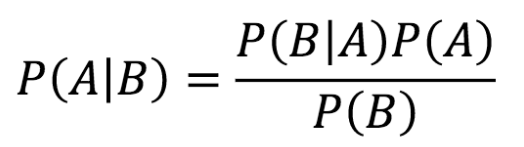
Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

### Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

## iii. Random Forest
Random forest Classifier or Regressor is a Bagging Technique, where we use multiple decision trees and each decision tree will have high variance.But when we combine all the decision trees with respect to the majority node, the high variance gets converted into low variance because of using Row Sampling and Feature sampling and giving the records to the decision tree.


In [59]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

# MODELS
# for Logistic Regression
from sklearn.linear_model import LogisticRegression

# for Naive Bayes : Multinomial
from sklearn.naive_bayes import MultinomialNB

# for Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# 1. Models using Tf-Idf vectorizer for Bigrams

### Splitting the dataset into 70:30 ratio

In [19]:
# Splitting 
x_train_ti2, x_test_ti2, y_train_ti2, y_test_ti2 = train_test_split(X_balanced_tfidf2, Y_balanced_tfidf2,test_size=0.30,random_state=5)

## 1.1.Logistic Regression : Tf-Idf (Bigrams)

In [24]:
# Logistic regression model
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train_ti2,y_train_ti2)

# predictions
predictions_ti2 = logreg.predict(x_test_ti2)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_ti2, predictions_ti2)
print('Accuracy: %f' % accuracy)

Accuracy: 0.768296


In [25]:
# confusion matrix
print(confusion_matrix(y_test_ti2,predictions_ti2))
print('\n')
print(classification_report(y_test_ti2,predictions_ti2))

[[ 877  222   35]
 [  24 1089   22]
 [ 112  367  627]]


              precision    recall  f1-score   support

    Negative       0.87      0.77      0.82      1134
     Neutral       0.65      0.96      0.77      1135
    Positive       0.92      0.57      0.70      1106

    accuracy                           0.77      3375
   macro avg       0.81      0.77      0.76      3375
weighted avg       0.81      0.77      0.76      3375



### Understanding the Confusion matrix for 3 x 3 matrix

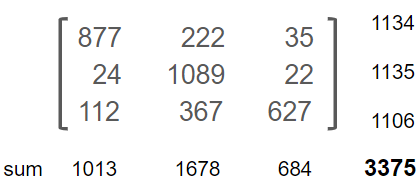

#### Obtaining the Precision and Recall
We have three classes Positive, Negative and Neutral. Let's assume the Precision of Negative, Neutral, Positive be Pa, Pb, Pc respectively; and Recall being Ra, Rb, Rc.

Precision = TP/(TP+FP), so for Pa true positive will be actual Negative predicted as Negative, i.e., 877, rest of the two cells in that column, whether it is Neutral or Positive, make False Positive. Recall is calculated as the number of true positives divided by the total number of true positives and false negatives. (Recall = TP/(TP+FN))

Pa = 877/1013 = 0.87; Ra = 877/1134 = 0.77

Pb = 1089/1678 = 0.65; Rb = 1089/1135 = 0.96

Pc = 627/684 = 0.92; Rc = 627/1106 = 0.57

The overall performance of the classifier is determined by average Precision and average Recall. 

##### Average Precision = (0.87)(1134) + (0.65)(1135) + (0.92)(1106) = 0.81

##### Average Recall = (0.77)(1134) + (0.96)(1135) + (0.57)(1106) = 0.77

#### f1-score = 2 [ (precision)(recall) / (precision+recall) ]

## 1.2. Naive Bayes : Multinomial : Tf-Idf (Bigrams)

In [26]:
# Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_ti2, y_train_ti2)

# predictions
predictions_ti2 = naive_bayes.predict(x_test_ti2)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_ti2, predictions_ti2)
print('Accuracy: %f' % accuracy)

Accuracy: 0.770667


In [27]:
# confusion matrix
print(confusion_matrix(y_test_ti2,predictions_ti2))
print('\n')
print(classification_report(y_test_ti2,predictions_ti2))

[[888  63 183]
 [ 58 870 207]
 [120 143 843]]


              precision    recall  f1-score   support

    Negative       0.83      0.78      0.81      1134
     Neutral       0.81      0.77      0.79      1135
    Positive       0.68      0.76      0.72      1106

    accuracy                           0.77      3375
   macro avg       0.78      0.77      0.77      3375
weighted avg       0.78      0.77      0.77      3375



## 1.3. Random Forest : Tf-Idf (Bigrams)

In [44]:
# Random forest model
Random_forest=RandomForestClassifier(n_estimators = 100)
Random_forest.fit(x_train_ti2, y_train_ti2)
        
# predictions        
y_pred = Random_forest.predict(x_test_ti2)
# accuracy
print(' accuracy= ',accuracy_score(y_test_ti2,y_pred))

# confusion matrix
print(confusion_matrix(y_test_ti2,y_pred))
print('\n')
print(classification_report(y_test_ti2,y_pred))

 accuracy=  0.8
[[872  47 215]
 [ 17 901 217]
 [ 98  81 927]]


              precision    recall  f1-score   support

    Negative       0.88      0.77      0.82      1134
     Neutral       0.88      0.79      0.83      1135
    Positive       0.68      0.84      0.75      1106

    accuracy                           0.80      3375
   macro avg       0.81      0.80      0.80      3375
weighted avg       0.81      0.80      0.80      3375



# 2. Models using Tf-Idf vectorizer for Trigrams

### Splitting the dataset into 70:30 ratio

In [20]:
# Splitting
X_train_ti3, X_test_ti3, Y_train_ti3, Y_test_ti3 = train_test_split(X_balanced_tfidf3, Y_balanced_tfidf3,test_size=0.30,random_state=5)

## 2.1. Logistic Regression : Tf-Idf (Trigrams)

In [28]:
# Logistic regression model
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_ti3,Y_train_ti3)

# predictions
Predictions_ti3 = logreg.predict(X_test_ti3)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test_ti3, Predictions_ti3)
print('Accuracy: %f' % accuracy)

Accuracy: 0.527704


In [29]:
# confusion matrix
print(confusion_matrix(Y_test_ti3,Predictions_ti3))
print('\n')
print(classification_report(Y_test_ti3,Predictions_ti3))

[[ 375   49  710]
 [  15  393  727]
 [  54   39 1013]]


              precision    recall  f1-score   support

    Negative       0.84      0.33      0.48      1134
     Neutral       0.82      0.35      0.49      1135
    Positive       0.41      0.92      0.57      1106

    accuracy                           0.53      3375
   macro avg       0.69      0.53      0.51      3375
weighted avg       0.69      0.53      0.51      3375



## 2.2. Naive Bayes : Multinomial : Tf-Idf (Trigrams)

In [30]:
# Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_ti3, Y_train_ti3)

# predictions
Predictions_ti3 = naive_bayes.predict(X_test_ti3)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test_ti3, Predictions_ti3)
print('Accuracy: %f' % accuracy)

Accuracy: 0.502815


In [31]:
# confusion matrix
print(confusion_matrix(Y_test_ti3,Predictions_ti3))
print('\n')
print(classification_report(Y_test_ti3,Predictions_ti3))

[[373  55 706]
 [ 18 387 730]
 [ 56 113 937]]


              precision    recall  f1-score   support

    Negative       0.83      0.33      0.47      1134
     Neutral       0.70      0.34      0.46      1135
    Positive       0.39      0.85      0.54      1106

    accuracy                           0.50      3375
   macro avg       0.64      0.51      0.49      3375
weighted avg       0.64      0.50      0.49      3375



## 2.3. Random forest : Tf-Idf (Trigrams)

In [47]:
# Random forest model
Random_forest=RandomForestClassifier(n_estimators = 100)
Random_forest.fit(X_train_ti3, Y_train_ti3)
        
# predictions        
y_pred = Random_forest.predict(X_test_ti3)

# accuracy
print(' accuracy= ',accuracy_score(Y_test_ti3,y_pred))

# confusion matrix
print(confusion_matrix(Y_test_ti3,y_pred))
print('\n')
print(classification_report(Y_test_ti3,y_pred))

 accuracy=  0.52
[[ 370   29  735]
 [  17  372  746]
 [  54   39 1013]]


              precision    recall  f1-score   support

    Negative       0.84      0.33      0.47      1134
     Neutral       0.85      0.33      0.47      1135
    Positive       0.41      0.92      0.56      1106

    accuracy                           0.52      3375
   macro avg       0.70      0.52      0.50      3375
weighted avg       0.70      0.52      0.50      3375



# 3. Models using Bag-of-words for Bigrams

### Splitting the dataset into 70:30 ratio

In [21]:
# Splitting
X_train_bow2, X_test_bow2, Y_train_bow2, Y_test_bow2 = train_test_split(X_balanced_bow2, Y_balanced_bow2,test_size=0.30,random_state=5)

## 3.1. Logistic Regression : Bag-of-words (Bigrams)

In [33]:
# Logistic regression model
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_bow2,Y_train_bow2)

# predictions
Predictions = logreg.predict(X_test_bow2)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test_bow2, Predictions)
print('Accuracy: %f' % accuracy)

# confusion matrix
print(confusion_matrix(Y_test_bow2,Predictions))
print('\n')
print(classification_report(Y_test_bow2,Predictions))

Accuracy: 0.527407
[[ 202  876   56]
 [  36 1067   32]
 [  87  508  511]]


              precision    recall  f1-score   support

    Negative       0.62      0.18      0.28      1134
     Neutral       0.44      0.94      0.60      1135
    Positive       0.85      0.46      0.60      1106

    accuracy                           0.53      3375
   macro avg       0.64      0.53      0.49      3375
weighted avg       0.63      0.53      0.49      3375



## 3.2. Naive Bayes : Multinomial : Bag-of-words (Bigrams)

In [34]:
# Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bow2, Y_train_bow2)

# predictions
Predictions = naive_bayes.predict(X_test_bow2)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test_bow2, Predictions)
print('Accuracy: %f' % accuracy)

# confusion matrix
print(confusion_matrix(Y_test_bow2,Predictions))
print('\n')
print(classification_report(Y_test_bow2,Predictions))

Accuracy: 0.266370
[[194 139 801]
 [ 43 162 930]
 [ 93 470 543]]


              precision    recall  f1-score   support

    Negative       0.59      0.17      0.27      1134
     Neutral       0.21      0.14      0.17      1135
    Positive       0.24      0.49      0.32      1106

    accuracy                           0.27      3375
   macro avg       0.35      0.27      0.25      3375
weighted avg       0.35      0.27      0.25      3375



## 3.3. Random forest : Bag-of-words (Bigrams)

In [48]:
# Random forest model
Random_forest=RandomForestClassifier(n_estimators = 100)
Random_forest.fit(X_train_bow2, Y_train_bow2)
        
# predictions        
y_pred = Random_forest.predict(X_test_bow2)

# accuracy
print(' accuracy= ',accuracy_score(Y_test_bow2,y_pred))

# confusion matrix
print(confusion_matrix(Y_test_bow2,y_pred))
print('\n')
print(classification_report(Y_test_bow2,y_pred))

 accuracy=  0.5170370370370371
[[ 174  906   54]
 [  33 1065   37]
 [  70  530  506]]


              precision    recall  f1-score   support

    Negative       0.63      0.15      0.25      1134
     Neutral       0.43      0.94      0.59      1135
    Positive       0.85      0.46      0.59      1106

    accuracy                           0.52      3375
   macro avg       0.63      0.52      0.48      3375
weighted avg       0.63      0.52      0.47      3375



# 4. Models using Bag-of-words for Trigrams

### Splitting the dataset into 70:30 ratio

In [22]:
# Splitting
X_train_bow3, X_test_bow3, Y_train_bow3, Y_test_bow3 = train_test_split(X_balanced_bow3, Y_balanced_bow3,test_size=0.30,random_state=5)

## 4.1. Logistic Regression : Bag-of-words (Trigrams)

In [35]:
# Logistic regression model
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_bow3,Y_train_bow3)

# predictions
Predictions = logreg.predict(X_test_bow3)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test_bow3, Predictions)
print('Accuracy: %f' % accuracy)

# confusion matrix
print(confusion_matrix(Y_test_bow3,Predictions))
print('\n')
print(classification_report(Y_test_bow3,Predictions))

Accuracy: 0.376889
[[  43 1083    8]
 [   4 1125    6]
 [  26  976  104]]


              precision    recall  f1-score   support

    Negative       0.59      0.04      0.07      1134
     Neutral       0.35      0.99      0.52      1135
    Positive       0.88      0.09      0.17      1106

    accuracy                           0.38      3375
   macro avg       0.61      0.37      0.25      3375
weighted avg       0.61      0.38      0.25      3375



## 4.2. Naive Bayes : Multinomial : Bag-of-words (Trigrams)

In [36]:
# Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bow3, Y_train_bow3)

# predictions
Predictions = naive_bayes.predict(X_test_bow3)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test_bow3, Predictions)
print('Accuracy: %f' % accuracy)

# confusion matrix
print(confusion_matrix(Y_test_bow3,Predictions))
print('\n')
print(classification_report(Y_test_bow3,Predictions))

Accuracy: 0.134222
[[ 25 246 863]
 [  2 135 998]
 [ 19 794 293]]


              precision    recall  f1-score   support

    Negative       0.54      0.02      0.04      1134
     Neutral       0.11      0.12      0.12      1135
    Positive       0.14      0.26      0.18      1106

    accuracy                           0.13      3375
   macro avg       0.26      0.14      0.11      3375
weighted avg       0.27      0.13      0.11      3375



## 4.3. Random forest : Bag-of-words (Trigrams)

In [49]:
# Random forest model
Random_forest=RandomForestClassifier(n_estimators = 100)
Random_forest.fit(X_train_bow3, Y_train_bow3)
        
# predictions        
y_pred = Random_forest.predict(X_test_bow3)

# accuracy
print(' accuracy= ',accuracy_score(Y_test_bow3,y_pred))

# confusion matrix
print(confusion_matrix(Y_test_bow3,y_pred))
print('\n')
print(classification_report(Y_test_bow3,y_pred))

 accuracy=  0.37777777777777777
[[  35 1088   11]
 [   4 1123    8]
 [  20  969  117]]


              precision    recall  f1-score   support

    Negative       0.59      0.03      0.06      1134
     Neutral       0.35      0.99      0.52      1135
    Positive       0.86      0.11      0.19      1106

    accuracy                           0.38      3375
   macro avg       0.60      0.38      0.26      3375
weighted avg       0.60      0.38      0.26      3375



# Comparison of the models
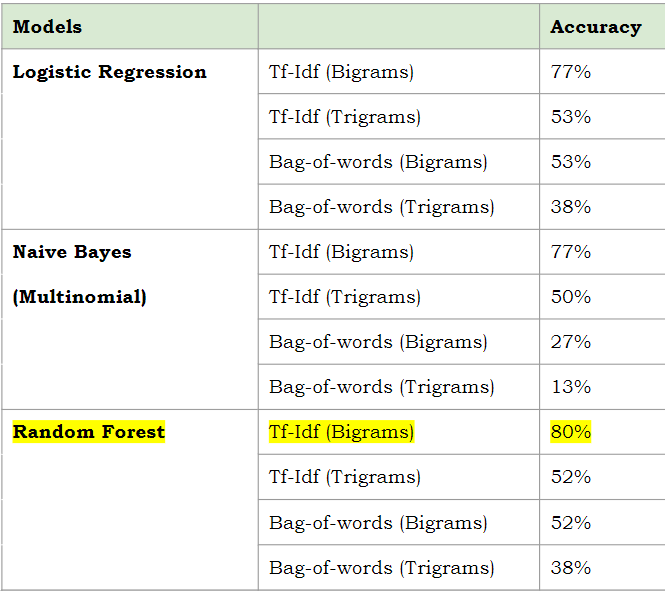

#### As  seen  from  the  above  chart,  
### Random  Forest  Classifier  with  Tf-Idf (Bigrams)  vectorizer  gives  us the  highest  accuracy  of  80%.

#### Other  values  of  model  evaluation  parameters  obtained  for the same were: 

### Precision  :  81%

### Recall       :   80%

### f1 - score  :   80%


### Considering the high accuracy of Random Forest Classifier, we can select this particular supervised machine learning model for our further predictions on unseen data.